In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(magrittr)
library(ggplot2)
library(ggiraph)
library(dplyr)

OUT_DIR <- "/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/output/"
OUT_DIR2 <- "/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/output_ARI/"


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
%%R
rxn2ensembls.nls <- readRDS(paste(OUT_DIR, "rxn2ensembls_nls.Rds", sep = ""))
rxn_knn_misclass_rate.nls <- readRDS(paste(OUT_DIR, "toi_rxn_knn_misclass_rate_nls.Rds", sep = ""))
rxn_knn_ari.nls <- readRDS(paste(OUT_DIR, "toi_rxn_knn_ari_nls.Rds", sep = ""))
rxn_knn_ecount.nls <- readRDS(paste(OUT_DIR, "toi_rxn_knn_ecount_nls.Rds", sep = ""))
gtex_tissue_detail.vec.train <- readRDS(paste(OUT_DIR,"gtex_tissue_detail_vec_train.Rds",sep=""))
vst.count.mtx.train <- readRDS(paste(OUT_DIR,"vst_count_mtx_train.Rds",sep=""))
rxn_pca.nls <- readRDS(paste(OUT_DIR,"rxn_pca_nls.Rds",sep=""))

In [4]:
%%R
print(rxn2ensembls.nls)

$`R-MMU-450466`
 [1] "ENSMUSG00000000568" "ENSMUSG00000002102" "ENSMUSG00000018286"
 [4] "ENSMUSG00000021024" "ENSMUSG00000021178" "ENSMUSG00000021737"
 [7] "ENSMUSG00000021832" "ENSMUSG00000029440" "ENSMUSG00000030591"
[10] "ENSMUSG00000030603" "ENSMUSG00000030751" "ENSMUSG00000032869"
[13] "ENSMUSG00000040850" "ENSMUSG00000068749" "ENSMUSG00000069744"
[16] "ENSMUSG00000078652" "ENSMUSG00000079197"

$`R-MMU-450551`
[1] "ENSMUSG00000000568" "ENSMUSG00000022283" "ENSMUSG00000090877"
[4] "ENSMUSG00000091971"

$`R-MMU-450580`
[1] "ENSMUSG00000000568" "ENSMUSG00000022283" "ENSMUSG00000090877"
[4] "ENSMUSG00000091971"

$`R-MMU-72103`
 [1] "ENSMUSG00000000568" "ENSMUSG00000002658" "ENSMUSG00000006498"
 [4] "ENSMUSG00000007850" "ENSMUSG00000018379" "ENSMUSG00000019738"
 [7] "ENSMUSG00000021018" "ENSMUSG00000021546" "ENSMUSG00000024097"
[10] "ENSMUSG00000028330" "ENSMUSG00000029250" "ENSMUSG00000029538"
[13] "ENSMUSG00000030795" "ENSMUSG00000031060" "ENSMUSG00000031134"
[16] "ENSMUSG0000003178

[10] "ENSMUSG00000021069" "ENSMUSG00000021218" "ENSMUSG00000021270"
[13] "ENSMUSG00000021737" "ENSMUSG00000021823" "ENSMUSG00000022471"
[16] "ENSMUSG00000023944" "ENSMUSG00000024290" "ENSMUSG00000024387"
[19] "ENSMUSG00000025261" "ENSMUSG00000025289" "ENSMUSG00000027907"
[22] "ENSMUSG00000028163" "ENSMUSG00000028452" "ENSMUSG00000029171"
[25] "ENSMUSG00000030225" "ENSMUSG00000030314" "ENSMUSG00000030447"
[28] "ENSMUSG00000030681" "ENSMUSG00000030695" "ENSMUSG00000030793"
[31] "ENSMUSG00000031626" "ENSMUSG00000031825" "ENSMUSG00000031827"
[34] "ENSMUSG00000033307" "ENSMUSG00000033400" "ENSMUSG00000034994"
[37] "ENSMUSG00000035697" "ENSMUSG00000036427" "ENSMUSG00000037351"
[40] "ENSMUSG00000039224" "ENSMUSG00000044734" "ENSMUSG00000052234"
[43] "ENSMUSG00000053436" "ENSMUSG00000060791" "ENSMUSG00000060803"
[46] "ENSMUSG00000061780" "ENSMUSG00000062867" "ENSMUSG00000068417"
[49] "ENSMUSG00000068749" "ENSMUSG00000092074" "ENSMUSG00000095677"
[52] "ENSMUSG00000096255" "ENSMUSG00000098112" "

[82] "ENSMUSG00000094686" "ENSMUSG00000095675" "ENSMUSG00000096596"
[85] "ENSMUSG00000096826" "ENSMUSG00000114755"

$`R-MMU-749454`
 [1] "ENSMUSG00000000617" "ENSMUSG00000000766" "ENSMUSG00000003974"
 [4] "ENSMUSG00000004207" "ENSMUSG00000004366" "ENSMUSG00000018920"
 [7] "ENSMUSG00000018927" "ENSMUSG00000018930" "ENSMUSG00000019122"
[10] "ENSMUSG00000020660" "ENSMUSG00000020676" "ENSMUSG00000020793"
[13] "ENSMUSG00000021070" "ENSMUSG00000021303" "ENSMUSG00000024462"
[16] "ENSMUSG00000024553" "ENSMUSG00000024907" "ENSMUSG00000025804"
[19] "ENSMUSG00000026237" "ENSMUSG00000028971" "ENSMUSG00000029064"
[22] "ENSMUSG00000029236" "ENSMUSG00000029417" "ENSMUSG00000029530"
[25] "ENSMUSG00000029663" "ENSMUSG00000029713" "ENSMUSG00000029819"
[28] "ENSMUSG00000031778" "ENSMUSG00000031861" "ENSMUSG00000031980"
[31] "ENSMUSG00000033774" "ENSMUSG00000034117" "ENSMUSG00000034855"
[34] "ENSMUSG00000035042" "ENSMUSG00000036353" "ENSMUSG00000036362"
[37] "ENSMUSG00000036381" "ENSMUSG00000036402" "ENSM

[28] "ENSMUSG00000069302" "ENSMUSG00000069303" "ENSMUSG00000069305"
[31] "ENSMUSG00000069306" "ENSMUSG00000069307" "ENSMUSG00000069308"
[34] "ENSMUSG00000069309" "ENSMUSG00000069310" "ENSMUSG00000074403"
[37] "ENSMUSG00000091405" "ENSMUSG00000093769" "ENSMUSG00000094248"
[40] "ENSMUSG00000094338" "ENSMUSG00000094777" "ENSMUSG00000095217"
[43] "ENSMUSG00000096010" "ENSMUSG00000099517" "ENSMUSG00000099583"
[46] "ENSMUSG00000100210" "ENSMUSG00000101355" "ENSMUSG00000101972"
[49] "ENSMUSG00000114279" "ENSMUSG00000114456"

$`R-MMU-8936621`
 [1] "ENSMUSG00000000708" "ENSMUSG00000002028" "ENSMUSG00000006307"
 [4] "ENSMUSG00000018102" "ENSMUSG00000031162" "ENSMUSG00000031575"
 [7] "ENSMUSG00000038384" "ENSMUSG00000060639" "ENSMUSG00000060678"
[10] "ENSMUSG00000060743" "ENSMUSG00000060981" "ENSMUSG00000061615"
[13] "ENSMUSG00000061991" "ENSMUSG00000062727" "ENSMUSG00000063021"
[16] "ENSMUSG00000068854" "ENSMUSG00000068855" "ENSMUSG00000069265"
[19] "ENSMUSG00000069266" "ENSMUSG00000069267" "ENS

[55] "ENSMUSG00000040855" "ENSMUSG00000040990" "ENSMUSG00000047126"
[58] "ENSMUSG00000062234" "ENSMUSG00000062542" "ENSMUSG00000062825"
[61] "ENSMUSG00000068240" "ENSMUSG00000068923" "ENSMUSG00000079426"
[64] "ENSMUSG00000090137" "ENSMUSG00000100241"

$`R-MMU-8871194`
 [1] "ENSMUSG00000000711" "ENSMUSG00000000915" "ENSMUSG00000002033"
 [4] "ENSMUSG00000002365" "ENSMUSG00000002957" "ENSMUSG00000003200"
 [7] "ENSMUSG00000003882" "ENSMUSG00000006276" "ENSMUSG00000006304"
[10] "ENSMUSG00000008036" "ENSMUSG00000008348" "ENSMUSG00000008475"
[13] "ENSMUSG00000017831" "ENSMUSG00000018909" "ENSMUSG00000019173"
[16] "ENSMUSG00000019505" "ENSMUSG00000020460" "ENSMUSG00000020609"
[19] "ENSMUSG00000020640" "ENSMUSG00000020888" "ENSMUSG00000020894"
[22] "ENSMUSG00000020961" "ENSMUSG00000021314" "ENSMUSG00000022797"
[25] "ENSMUSG00000023805" "ENSMUSG00000023830" "ENSMUSG00000024486"
[28] "ENSMUSG00000025793" "ENSMUSG00000026341" "ENSMUSG00000027257"
[31] "ENSMUSG00000028017" "ENSMUSG00000028478" "ENS

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "ENSMUSG00000057897" "ENSMUSG00000057967" "ENSMUSG00000062209"
[52] "ENSMUSG00000062232" "ENSMUSG00000062312" "ENSMUSG00000062991"
[55] "ENSMUSG00000071042" "ENSMUSG00000110206" "ENSMUSG00000118541"

$`R-MMU-6797554`
[1] "ENSMUSG00000000881" "ENSMUSG00000020886" "ENSMUSG00000031302"
[4] "ENSMUSG00000031626" "ENSMUSG00000051790" "ENSMUSG00000052572"
[7] "ENSMUSG00000061689"

$`R-MMU-8849891`
[1] "ENSMUSG00000000881" "ENSMUSG00000020886" "ENSMUSG00000030600"
[4] "ENSMUSG00000040490"

$`R-MMU-9668214`
[1] "ENSMUSG00000000881"

$`R-MMU-209891`
[1] "ENSMUSG00000000889"

$`R-MMU-1454781`
[1] "ENSMUSG00000000901" "ENSMUSG00000018620" "ENSMUSG00000025355"
[4] "ENSMUSG00000030111" "ENSMUSG00000031740"

$`R-MMU-1564112`
[1] "ENSMUSG00000000901" "ENSMUSG00000031740" "ENSMUSG00000091345"

$`R-MMU-1592297`
[1] "ENSMUSG00000000901" "ENSMUSG00000031740"

$`R-MMU-1602484`
[1] "ENSMUSG00000000901" "ENSMUSG00000030530"

$`R-MMU-3215448`
[1] "ENSMUSG00000000902" "ENSMUSG00000007880" "ENSMUSG00000024921"

[31] "ENSMUSG00000028955" "ENSMUSG00000029426" "ENSMUSG00000029465"
[34] "ENSMUSG00000029580" "ENSMUSG00000029621" "ENSMUSG00000029999"
[37] "ENSMUSG00000030043" "ENSMUSG00000030327" "ENSMUSG00000030638"
[40] "ENSMUSG00000031098" "ENSMUSG00000032094" "ENSMUSG00000033335"
[43] "ENSMUSG00000033419" "ENSMUSG00000033855" "ENSMUSG00000035020"
[46] "ENSMUSG00000035152" "ENSMUSG00000035864" "ENSMUSG00000039361"
[49] "ENSMUSG00000039735" "ENSMUSG00000039959" "ENSMUSG00000040855"
[52] "ENSMUSG00000040990" "ENSMUSG00000047126" "ENSMUSG00000062542"
[55] "ENSMUSG00000062825" "ENSMUSG00000068240" "ENSMUSG00000068923"
[58] "ENSMUSG00000079426" "ENSMUSG00000090137" "ENSMUSG00000100241"

$`R-MMU-8868658`
 [1] "ENSMUSG00000000915" "ENSMUSG00000002033" "ENSMUSG00000002365"
 [4] "ENSMUSG00000002957" "ENSMUSG00000003200" "ENSMUSG00000003882"
 [7] "ENSMUSG00000006276" "ENSMUSG00000006304" "ENSMUSG00000008036"
[10] "ENSMUSG00000008348" "ENSMUSG00000008475" "ENSMUSG00000018909"
[13] "ENSMUSG00000019505" "ENS

[25] "ENSMUSG00000069267" "ENSMUSG00000069268" "ENSMUSG00000069270"
[28] "ENSMUSG00000069272" "ENSMUSG00000069273" "ENSMUSG00000069274"
[31] "ENSMUSG00000069300" "ENSMUSG00000069301" "ENSMUSG00000069302"
[34] "ENSMUSG00000069303" "ENSMUSG00000069305" "ENSMUSG00000069306"
[37] "ENSMUSG00000069307" "ENSMUSG00000069308" "ENSMUSG00000069309"
[40] "ENSMUSG00000069310" "ENSMUSG00000074403" "ENSMUSG00000078851"
[43] "ENSMUSG00000091405" "ENSMUSG00000093769" "ENSMUSG00000094248"
[46] "ENSMUSG00000094338" "ENSMUSG00000094777" "ENSMUSG00000095217"
[49] "ENSMUSG00000096010" "ENSMUSG00000099517" "ENSMUSG00000099583"
[52] "ENSMUSG00000100210" "ENSMUSG00000101355" "ENSMUSG00000101972"
[55] "ENSMUSG00000114279" "ENSMUSG00000114456"

$`R-MMU-1474210`
[1] "ENSMUSG00000000957"

$`R-MMU-1592349`
[1] "ENSMUSG00000000957"

$`R-MMU-1602466`
[1] "ENSMUSG00000000957" "ENSMUSG00000023903" "ENSMUSG00000029436"
[4] "ENSMUSG00000030530" "ENSMUSG00000031790"

$`R-MMU-1604350`
[1] "ENSMUSG00000000957" "ENSMUSG00000

[10] "ENSMUSG00000031591" "ENSMUSG00000031626" "ENSMUSG00000031722"
[13] "ENSMUSG00000032468" "ENSMUSG00000039770" "ENSMUSG00000052305"
[16] "ENSMUSG00000054106" "ENSMUSG00000058119" "ENSMUSG00000060802"
[19] "ENSMUSG00000062751" "ENSMUSG00000069516" "ENSMUSG00000114515"

$`R-MMU-6798749`
 [1] "ENSMUSG00000001016" "ENSMUSG00000001440" "ENSMUSG00000001552"
 [4] "ENSMUSG00000004266" "ENSMUSG00000007891" "ENSMUSG00000010651"
 [7] "ENSMUSG00000019088" "ENSMUSG00000019779" "ENSMUSG00000021823"
[10] "ENSMUSG00000022575" "ENSMUSG00000024084" "ENSMUSG00000025139"
[13] "ENSMUSG00000025575" "ENSMUSG00000028163" "ENSMUSG00000028176"
[16] "ENSMUSG00000029811" "ENSMUSG00000030447" "ENSMUSG00000031722"
[19] "ENSMUSG00000032468" "ENSMUSG00000052922" "ENSMUSG00000060802"
[22] "ENSMUSG00000061414" "ENSMUSG00000061845" "ENSMUSG00000061958"
[25] "ENSMUSG00000063206" "ENSMUSG00000069516" "ENSMUSG00000074434"
[28] "ENSMUSG00000074437" "ENSMUSG00000074439" "ENSMUSG00000074440"
[31] "ENSMUSG00000074441" "ENS

[46] "ENSMUSG00000094777" "ENSMUSG00000095217" "ENSMUSG00000096010"
[49] "ENSMUSG00000099517" "ENSMUSG00000099583" "ENSMUSG00000100210"
[52] "ENSMUSG00000101355" "ENSMUSG00000101972" "ENSMUSG00000114279"
[55] "ENSMUSG00000114456"

$`R-MMU-5617990`
 [1] "ENSMUSG00000001288" "ENSMUSG00000002221" "ENSMUSG00000004667"
 [4] "ENSMUSG00000005198" "ENSMUSG00000018102" "ENSMUSG00000024258"
 [7] "ENSMUSG00000024454" "ENSMUSG00000029687" "ENSMUSG00000029844"
[10] "ENSMUSG00000030619" "ENSMUSG00000030680" "ENSMUSG00000031575"
[13] "ENSMUSG00000045996" "ENSMUSG00000060639" "ENSMUSG00000060678"
[16] "ENSMUSG00000060743" "ENSMUSG00000060981" "ENSMUSG00000061615"
[19] "ENSMUSG00000061991" "ENSMUSG00000062727" "ENSMUSG00000063021"
[22] "ENSMUSG00000063689" "ENSMUSG00000068854" "ENSMUSG00000068855"
[25] "ENSMUSG00000069265" "ENSMUSG00000069266" "ENSMUSG00000069267"
[28] "ENSMUSG00000069268" "ENSMUSG00000069270" "ENSMUSG00000069272"
[31] "ENSMUSG00000069273" "ENSMUSG00000069274" "ENSMUSG00000069300"
[34]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "ENSMUSG00000028447"
[16] "ENSMUSG00000029757" "ENSMUSG00000030137" "ENSMUSG00000030677"
[19] "ENSMUSG00000030868" "ENSMUSG00000031516" "ENSMUSG00000032254"
[22] "ENSMUSG00000032435" "ENSMUSG00000035770" "ENSMUSG00000036322"
[25] "ENSMUSG00000036594" "ENSMUSG00000037351" "ENSMUSG00000041791"
[28] "ENSMUSG00000044252" "ENSMUSG00000060586" "ENSMUSG00000062380"
[31] "ENSMUSG00000062591" "ENSMUSG00000074657"

$`R-MMU-2316350`
[1] "ENSMUSG00000001473" "ENSMUSG00000021216" "ENSMUSG00000030137"
[4] "ENSMUSG00000062380" "ENSMUSG00000062591"

$`R-MMU-2467809`
 [1] "ENSMUSG00000001473" "ENSMUSG00000004455" "ENSMUSG00000009630"
 [4] "ENSMUSG00000017843" "ENSMUSG00000018707" "ENSMUSG00000018736"
 [7] "ENSMUSG00000020483" "ENSMUSG00000020492" "ENSMUSG00000020652"
[10] "ENSMUSG00000020739" "ENSMUSG00000020745" "ENSMUSG00000020897"
[13] "ENSMUSG00000021051" "ENSMUSG00000021216" "ENSMUSG00000021391"
[16] "ENSMUSG00000021693" "ENSMUSG00000021714" "ENSMUSG00000023919"
[19] "ENSMUSG00000023940" "ENSMUSG

 [7] "ENSMUSG00000040586" "ENSMUSG00000060798" "ENSMUSG00000062380"
[10] "ENSMUSG00000062591"

$`R-MMU-5618080`
 [1] "ENSMUSG00000001473" "ENSMUSG00000018707" "ENSMUSG00000020483"
 [4] "ENSMUSG00000021076" "ENSMUSG00000021216" "ENSMUSG00000021270"
 [7] "ENSMUSG00000023944" "ENSMUSG00000024431" "ENSMUSG00000024603"
[10] "ENSMUSG00000025228" "ENSMUSG00000028447" "ENSMUSG00000029757"
[13] "ENSMUSG00000030137" "ENSMUSG00000030357" "ENSMUSG00000030868"
[16] "ENSMUSG00000031516" "ENSMUSG00000031618" "ENSMUSG00000032435"
[19] "ENSMUSG00000035770" "ENSMUSG00000041791" "ENSMUSG00000062380"
[22] "ENSMUSG00000062591" "ENSMUSG00000071072"

$`R-MMU-5618328`
[1] "ENSMUSG00000001473" "ENSMUSG00000021216" "ENSMUSG00000024426"
[4] "ENSMUSG00000030137" "ENSMUSG00000062380" "ENSMUSG00000062591"

$`R-MMU-5618331`
[1] "ENSMUSG00000001473" "ENSMUSG00000021216" "ENSMUSG00000030137"
[4] "ENSMUSG00000031161" "ENSMUSG00000062380" "ENSMUSG00000062591"

$`R-MMU-5624949`
 [1] "ENSMUSG00000001473" "ENSMUSG000000020

 [1] "ENSMUSG00000001473" "ENSMUSG00000002778" "ENSMUSG00000003546"
 [4] "ENSMUSG00000003779" "ENSMUSG00000004187" "ENSMUSG00000010021"
 [7] "ENSMUSG00000018672" "ENSMUSG00000020668" "ENSMUSG00000020821"
[10] "ENSMUSG00000021216" "ENSMUSG00000021288" "ENSMUSG00000021294"
[13] "ENSMUSG00000021693" "ENSMUSG00000023999" "ENSMUSG00000024301"
[16] "ENSMUSG00000024795" "ENSMUSG00000024862" "ENSMUSG00000024870"
[19] "ENSMUSG00000026553" "ENSMUSG00000027879" "ENSMUSG00000029390"
[22] "ENSMUSG00000030058" "ENSMUSG00000030137" "ENSMUSG00000030677"
[25] "ENSMUSG00000030754" "ENSMUSG00000032096" "ENSMUSG00000032254"
[28] "ENSMUSG00000032458" "ENSMUSG00000033184" "ENSMUSG00000051378"
[31] "ENSMUSG00000060992" "ENSMUSG00000062380" "ENSMUSG00000062591"
[34] "ENSMUSG00000063077" "ENSMUSG00000074657" "ENSMUSG00000079111"

$`R-MMU-8849350`
 [1] "ENSMUSG00000001473" "ENSMUSG00000003452" "ENSMUSG00000018707"
 [4] "ENSMUSG00000020483" "ENSMUSG00000020745" "ENSMUSG00000021076"
 [7] "ENSMUSG00000021216" "ENS

[1] "ENSMUSG00000001506" "ENSMUSG00000004098" "ENSMUSG00000022483"
[4] "ENSMUSG00000025013" "ENSMUSG00000029661" "ENSMUSG00000029718"

$`R-MMU-216045`
[1] "ENSMUSG00000001506" "ENSMUSG00000025809" "ENSMUSG00000029661"
[4] "ENSMUSG00000032243"

$`R-MMU-2213201`
[1] "ENSMUSG00000001506" "ENSMUSG00000004098" "ENSMUSG00000022483"
[4] "ENSMUSG00000029661"

$`R-MMU-2213205`
[1] "ENSMUSG00000001506" "ENSMUSG00000022483" "ENSMUSG00000029661"

$`R-MMU-2243926`
[1] "ENSMUSG00000001506" "ENSMUSG00000029661"

$`R-MMU-2243931`
[1] "ENSMUSG00000001506" "ENSMUSG00000029661"

$`R-MMU-2250301`
[1] "ENSMUSG00000001506" "ENSMUSG00000029661"

$`R-MMU-2327733`
[1] "ENSMUSG00000001506" "ENSMUSG00000004098" "ENSMUSG00000022483"
[4] "ENSMUSG00000029661" "ENSMUSG00000031273" "ENSMUSG00000031274"
[7] "ENSMUSG00000031502" "ENSMUSG00000031503" "ENSMUSG00000079465"

$`R-MMU-2327738`
 [1] "ENSMUSG00000001506" "ENSMUSG00000003534" "ENSMUSG00000004098"
 [4] "ENSMUSG00000022483" "ENSMUSG00000029661" "ENSMUSG0000003127

 [7] "ENSMUSG00000019738" "ENSMUSG00000020485" "ENSMUSG00000021018"
[10] "ENSMUSG00000021103" "ENSMUSG00000021548" "ENSMUSG00000021890"
[13] "ENSMUSG00000024384" "ENSMUSG00000026349" "ENSMUSG00000028496"
[16] "ENSMUSG00000029111" "ENSMUSG00000029250" "ENSMUSG00000030400"
[19] "ENSMUSG00000031783" "ENSMUSG00000033020" "ENSMUSG00000033323"
[22] "ENSMUSG00000033813" "ENSMUSG00000035726" "ENSMUSG00000069089"
[25] "ENSMUSG00000070002" "ENSMUSG00000071662"

$`R-MMU-113430`
 [1] "ENSMUSG00000001524" "ENSMUSG00000002658" "ENSMUSG00000006599"
 [4] "ENSMUSG00000019738" "ENSMUSG00000021018" "ENSMUSG00000021103"
 [7] "ENSMUSG00000021548" "ENSMUSG00000029250" "ENSMUSG00000030400"
[10] "ENSMUSG00000031783" "ENSMUSG00000033020" "ENSMUSG00000069089"
[13] "ENSMUSG00000071662"

$`R-MMU-5690990`
[1] "ENSMUSG00000001524" "ENSMUSG00000006599" "ENSMUSG00000012483"
[4] "ENSMUSG00000022400" "ENSMUSG00000024740" "ENSMUSG00000026048"
[7] "ENSMUSG00000028089" "ENSMUSG00000030400" "ENSMUSG00000036023"

$`R-MMU-67

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "ENSMUSG00000039509"
[13] "ENSMUSG00000040034" "ENSMUSG00000040667" "ENSMUSG00000051329"
[16] "ENSMUSG00000052533" "ENSMUSG00000052798" "ENSMUSG00000053293"
[19] "ENSMUSG00000063550" "ENSMUSG00000109511" "ENSMUSG00000114797"

$`R-MMU-158441`
 [1] "ENSMUSG00000001855" "ENSMUSG00000006005" "ENSMUSG00000010097"
 [4] "ENSMUSG00000020739" "ENSMUSG00000021374" "ENSMUSG00000030091"
 [7] "ENSMUSG00000030298" "ENSMUSG00000032939" "ENSMUSG00000034826"
[10] "ENSMUSG00000036678" "ENSMUSG00000039509" "ENSMUSG00000040034"
[13] "ENSMUSG00000040667" "ENSMUSG00000051329" "ENSMUSG00000052533"
[16] "ENSMUSG00000052798" "ENSMUSG00000053293" "ENSMUSG00000063550"
[19] "ENSMUSG00000109511" "ENSMUSG00000114797"

$`R-MMU-158447`
 [1] "ENSMUSG00000001855" "ENSMUSG00000006005" "ENSMUSG00000010097"
 [4] "ENSMUSG00000020739" "ENSMUSG00000021374" "ENSMUSG00000028156"
 [7] "ENSMUSG00000030091" "ENSMUSG00000030298" "ENSMUSG00000032939"
[10] "ENSMUSG00000034826" "ENSMUSG00000036678" "ENSMUSG00000039509"
[13] "ENSMUSG

 [1] "ENSMUSG00000001855" "ENSMUSG00000006005" "ENSMUSG00000020738"
 [4] "ENSMUSG00000020739" "ENSMUSG00000021374" "ENSMUSG00000026313"
 [7] "ENSMUSG00000030091" "ENSMUSG00000030298" "ENSMUSG00000032939"
[10] "ENSMUSG00000034826" "ENSMUSG00000036678" "ENSMUSG00000039509"
[13] "ENSMUSG00000040034" "ENSMUSG00000040667" "ENSMUSG00000051329"
[16] "ENSMUSG00000052533" "ENSMUSG00000052798" "ENSMUSG00000053293"
[19] "ENSMUSG00000063550" "ENSMUSG00000109511" "ENSMUSG00000114797"

$`R-MMU-4655355`
 [1] "ENSMUSG00000001855" "ENSMUSG00000006005" "ENSMUSG00000020738"
 [4] "ENSMUSG00000020739" "ENSMUSG00000020897" "ENSMUSG00000021374"
 [7] "ENSMUSG00000030091" "ENSMUSG00000032939" "ENSMUSG00000034826"
[10] "ENSMUSG00000036678" "ENSMUSG00000039509" "ENSMUSG00000040034"
[13] "ENSMUSG00000040667" "ENSMUSG00000051329" "ENSMUSG00000052533"
[16] "ENSMUSG00000052798" "ENSMUSG00000053293" "ENSMUSG00000063550"
[19] "ENSMUSG00000109511" "ENSMUSG00000114797"

$`R-MMU-5228508`
 [1] "ENSMUSG00000001855" "ENSMUS

[4] "ENSMUSG00000020460" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-8852131`
[1] "ENSMUSG00000001924" "ENSMUSG00000008348" "ENSMUSG00000019505"
[4] "ENSMUSG00000020460" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-8852132`
[1] "ENSMUSG00000001924" "ENSMUSG00000008348" "ENSMUSG00000019505"
[4] "ENSMUSG00000020460" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-8852133`
[1] "ENSMUSG00000001924" "ENSMUSG00000008348" "ENSMUSG00000019505"
[4] "ENSMUSG00000020460" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-8852134`
[1] "ENSMUSG00000001924" "ENSMUSG00000008348" "ENSMUSG00000019505"
[4] "ENSMUSG00000020460" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-8852136`
[1] "ENSMUSG00000001924" "ENSMUSG00000008348" "ENSMUSG00000019505"
[4] "ENSMUSG00000020460" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-983153`
[1] "ENSMUSG00000001924" "ENSMUSG00000008348" "ENSMUSG00000019505"
[4] "ENSMUSG00000020460" "ENSMUSG00000030061" "ENSMUSG00000030314"
[7] "ENSMUSG0000003589

[1] "ENSMUSG00000001964" "ENSMUSG00000024590" "ENSMUSG00000024844"
[4] "ENSMUSG00000028063"

$`R-MMU-5229194`
[1] "ENSMUSG00000001964" "ENSMUSG00000024590" "ENSMUSG00000028063"
[4] "ENSMUSG00000052889"

$`R-MMU-9013438`
[1] "ENSMUSG00000001964" "ENSMUSG00000020790" "ENSMUSG00000034480"
[4] "ENSMUSG00000061778"

$`R-MMU-9014467`
[1] "ENSMUSG00000001964" "ENSMUSG00000002741" "ENSMUSG00000010110"
[4] "ENSMUSG00000021843" "ENSMUSG00000025366" "ENSMUSG00000029501"

$`R-MMU-9609921`
[1] "ENSMUSG00000001964" "ENSMUSG00000010025" "ENSMUSG00000010110"
[4] "ENSMUSG00000020894" "ENSMUSG00000024091" "ENSMUSG00000053317"
[7] "ENSMUSG00000078974" "ENSMUSG00000092116"

$`R-MMU-9714481`
[1] "ENSMUSG00000001964" "ENSMUSG00000025366" "ENSMUSG00000029501"
[4] "ENSMUSG00000033220"

$`R-MMU-9714691`
[1] "ENSMUSG00000001964" "ENSMUSG00000002741" "ENSMUSG00000018012"
[4] "ENSMUSG00000025366"

$`R-MMU-163214`
 [1] "ENSMUSG00000001983" "ENSMUSG00000017778" "ENSMUSG00000020544"
 [4] "ENSMUSG00000026500" "ENSMUS

[1] "ENSMUSG00000002033" "ENSMUSG00000032093" "ENSMUSG00000032094"
[4] "ENSMUSG00000036322" "ENSMUSG00000036594" "ENSMUSG00000060586"

$`R-MMU-202307`
[1] "ENSMUSG00000002033" "ENSMUSG00000032093" "ENSMUSG00000032094"
[4] "ENSMUSG00000036322" "ENSMUSG00000036594" "ENSMUSG00000060586"

$`R-MMU-202344`
[1] "ENSMUSG00000002033" "ENSMUSG00000026117" "ENSMUSG00000032093"
[4] "ENSMUSG00000032094" "ENSMUSG00000036322" "ENSMUSG00000036594"
[7] "ENSMUSG00000060586"

$`R-MMU-2029268`
 [1] "ENSMUSG00000002033" "ENSMUSG00000021457" "ENSMUSG00000093838"
 [4] "ENSMUSG00000093861" "ENSMUSG00000094029" "ENSMUSG00000094134"
 [7] "ENSMUSG00000094174" "ENSMUSG00000094194" "ENSMUSG00000094335"
[10] "ENSMUSG00000094491" "ENSMUSG00000094505" "ENSMUSG00000094951"
[13] "ENSMUSG00000095117" "ENSMUSG00000095170" "ENSMUSG00000095210"
[16] "ENSMUSG00000095285" "ENSMUSG00000095429" "ENSMUSG00000095497"
[19] "ENSMUSG00000095571" "ENSMUSG00000095612" "ENSMUSG00000095737"
[22] "ENSMUSG00000096336" "ENSMUSG00000096355

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "ENSMUSG00000069270"
[19] "ENSMUSG00000069272" "ENSMUSG00000069273" "ENSMUSG00000069274"
[22] "ENSMUSG00000069300" "ENSMUSG00000069301" "ENSMUSG00000069302"
[25] "ENSMUSG00000069303" "ENSMUSG00000069305" "ENSMUSG00000069306"
[28] "ENSMUSG00000069307" "ENSMUSG00000069308" "ENSMUSG00000069309"
[31] "ENSMUSG00000069310" "ENSMUSG00000074403" "ENSMUSG00000078851"
[34] "ENSMUSG00000091405" "ENSMUSG00000093769" "ENSMUSG00000094248"
[37] "ENSMUSG00000094338" "ENSMUSG00000094777" "ENSMUSG00000095217"
[40] "ENSMUSG00000096010" "ENSMUSG00000099517" "ENSMUSG00000099583"
[43] "ENSMUSG00000100210" "ENSMUSG00000101355" "ENSMUSG00000101972"
[46] "ENSMUSG00000114279" "ENSMUSG00000114456"

$`R-NUL-8865529`
 [1] "ENSMUSG00000002111" "ENSMUSG00000018102" "ENSMUSG00000060639"
 [4] "ENSMUSG00000060678" "ENSMUSG00000060743" "ENSMUSG00000060981"
 [7] "ENSMUSG00000061615" "ENSMUSG00000061991" "ENSMUSG00000062727"
[10] "ENSMUSG00000063021" "ENSMUSG00000063689" "ENSMUSG00000068854"
[13] "ENSMUSG00000068855" "EN

 [4] "ENSMUSG00000018102" "ENSMUSG00000024258" "ENSMUSG00000030680"
 [7] "ENSMUSG00000031575" "ENSMUSG00000045996" "ENSMUSG00000060639"
[10] "ENSMUSG00000060678" "ENSMUSG00000060743" "ENSMUSG00000060981"
[13] "ENSMUSG00000061615" "ENSMUSG00000061991" "ENSMUSG00000062727"
[16] "ENSMUSG00000063021" "ENSMUSG00000063689" "ENSMUSG00000068854"
[19] "ENSMUSG00000068855" "ENSMUSG00000069265" "ENSMUSG00000069266"
[22] "ENSMUSG00000069267" "ENSMUSG00000069268" "ENSMUSG00000069270"
[25] "ENSMUSG00000069272" "ENSMUSG00000069273" "ENSMUSG00000069274"
[28] "ENSMUSG00000069300" "ENSMUSG00000069301" "ENSMUSG00000069302"
[31] "ENSMUSG00000069303" "ENSMUSG00000069305" "ENSMUSG00000069306"
[34] "ENSMUSG00000069307" "ENSMUSG00000069308" "ENSMUSG00000069309"
[37] "ENSMUSG00000069310" "ENSMUSG00000074403" "ENSMUSG00000078851"
[40] "ENSMUSG00000079277" "ENSMUSG00000091405" "ENSMUSG00000093769"
[43] "ENSMUSG00000094248" "ENSMUSG00000094338" "ENSMUSG00000094777"
[46] "ENSMUSG00000095217" "ENSMUSG00000096010" "

[31] "ENSMUSG00000069302" "ENSMUSG00000069303" "ENSMUSG00000069305"
[34] "ENSMUSG00000069306" "ENSMUSG00000069307" "ENSMUSG00000069308"
[37] "ENSMUSG00000069309" "ENSMUSG00000069310" "ENSMUSG00000074403"
[40] "ENSMUSG00000074622" "ENSMUSG00000078851" "ENSMUSG00000091405"
[43] "ENSMUSG00000093769" "ENSMUSG00000094248" "ENSMUSG00000094338"
[46] "ENSMUSG00000094777" "ENSMUSG00000095217" "ENSMUSG00000096010"
[49] "ENSMUSG00000099517" "ENSMUSG00000099583" "ENSMUSG00000100210"
[52] "ENSMUSG00000101355" "ENSMUSG00000101972" "ENSMUSG00000114279"
[55] "ENSMUSG00000114456"

$`R-MMU-5619436`
 [1] "ENSMUSG00000002221" "ENSMUSG00000004667" "ENSMUSG00000005198"
 [4] "ENSMUSG00000018102" "ENSMUSG00000024258" "ENSMUSG00000029687"
 [7] "ENSMUSG00000030619" "ENSMUSG00000030680" "ENSMUSG00000031575"
[10] "ENSMUSG00000045996" "ENSMUSG00000060639" "ENSMUSG00000060678"
[13] "ENSMUSG00000060743" "ENSMUSG00000060981" "ENSMUSG00000061615"
[16] "ENSMUSG00000061991" "ENSMUSG00000062727" "ENSMUSG00000063021"
[19]

[52] "ENSMUSG00000101355" "ENSMUSG00000101972" "ENSMUSG00000114279"
[55] "ENSMUSG00000114456"

$`R-MMU-5686685`
 [1] "ENSMUSG00000002221" "ENSMUSG00000018102" "ENSMUSG00000024926"
 [4] "ENSMUSG00000028224" "ENSMUSG00000030451" "ENSMUSG00000031201"
 [7] "ENSMUSG00000031820" "ENSMUSG00000034218" "ENSMUSG00000043909"
[10] "ENSMUSG00000052139" "ENSMUSG00000060639" "ENSMUSG00000060678"
[13] "ENSMUSG00000060981" "ENSMUSG00000062727" "ENSMUSG00000068854"
[16] "ENSMUSG00000069266" "ENSMUSG00000069268" "ENSMUSG00000069274"
[19] "ENSMUSG00000069300" "ENSMUSG00000069303" "ENSMUSG00000069305"
[22] "ENSMUSG00000069306" "ENSMUSG00000069307" "ENSMUSG00000069308"
[25] "ENSMUSG00000091405" "ENSMUSG00000094338" "ENSMUSG00000095217"
[28] "ENSMUSG00000096010" "ENSMUSG00000114279" "ENSMUSG00000114456"

$`R-MMU-5686704`
 [1] "ENSMUSG00000002221" "ENSMUSG00000018102" "ENSMUSG00000024926"
 [4] "ENSMUSG00000028224" "ENSMUSG00000030451" "ENSMUSG00000034218"
 [7] "ENSMUSG00000043909" "ENSMUSG00000060639" "ENSMUS

 [1] "ENSMUSG00000002233" "ENSMUSG00000009681" "ENSMUSG00000016128"
 [4] "ENSMUSG00000021697" "ENSMUSG00000027247" "ENSMUSG00000031214"
 [7] "ENSMUSG00000031523" "ENSMUSG00000035133" "ENSMUSG00000036452"
[10] "ENSMUSG00000036591" "ENSMUSG00000041444" "ENSMUSG00000058230"
[13] "ENSMUSG00000118193"

$`R-MMU-9714361`
[1] "ENSMUSG00000002233" "ENSMUSG00000010110"

$`R-MMU-9714363`
[1] "ENSMUSG00000002233"

$`R-MMU-2032781`
[1] "ENSMUSG00000002249" "ENSMUSG00000030353" "ENSMUSG00000030796"

$`R-MMU-8871266`
[1] "ENSMUSG00000002249" "ENSMUSG00000053110"

$`R-MMU-8951676`
[1] "ENSMUSG00000002249" "ENSMUSG00000030353" "ENSMUSG00000030796"
[4] "ENSMUSG00000053110"

$`R-MMU-200406`
[1] "ENSMUSG00000002250" "ENSMUSG00000024900" "ENSMUSG00000078937"

$`R-MMU-203946`
[1] "ENSMUSG00000002250" "ENSMUSG00000006494" "ENSMUSG00000019577"
[4] "ENSMUSG00000020664" "ENSMUSG00000021748" "ENSMUSG00000031299"

$`R-MMU-5422942`
[1] "ENSMUSG00000002250"

$`R-MMU-5634100`
[1] "ENSMUSG00000002250"

$`R-MMU-898069

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "ENSMUSG00000031583" "ENSMUSG00000034218"
[7] "ENSMUSG00000039748" "ENSMUSG00000041238"

$`R-MMU-5686398`
[1] "ENSMUSG00000002814" "ENSMUSG00000030528"

$`R-MMU-5686440`
 [1] "ENSMUSG00000002814" "ENSMUSG00000018841" "ENSMUSG00000021287"
 [4] "ENSMUSG00000024906" "ENSMUSG00000024926" "ENSMUSG00000027323"
 [7] "ENSMUSG00000028224" "ENSMUSG00000030346" "ENSMUSG00000030528"
[10] "ENSMUSG00000031583" "ENSMUSG00000034218" "ENSMUSG00000039748"
[13] "ENSMUSG00000041238" "ENSMUSG00000044702"

$`R-MMU-5693539`
 [1] "ENSMUSG00000002814" "ENSMUSG00000018841" "ENSMUSG00000020380"
 [4] "ENSMUSG00000021287" "ENSMUSG00000024926" "ENSMUSG00000027323"
 [7] "ENSMUSG00000030346" "ENSMUSG00000030528" "ENSMUSG00000031583"
[10] "ENSMUSG00000031928" "ENSMUSG00000034218" "ENSMUSG00000039748"
[13] "ENSMUSG00000041147" "ENSMUSG00000044702"

$`R-MMU-5693584`
 [1] "ENSMUSG00000002814" "ENSMUSG00000018841" "ENSMUSG00000020380"
 [4] "ENSMUSG00000021287" "ENSMUSG00000024906" "ENSMUSG00000024926"
 [7] "ENSMUSG000000

[10] "ENSMUSG00000028017" "ENSMUSG00000028478" "ENSMUSG00000028552"
[13] "ENSMUSG00000029999" "ENSMUSG00000030638" "ENSMUSG00000035020"
[16] "ENSMUSG00000035152" "ENSMUSG00000040855" "ENSMUSG00000040990"
[19] "ENSMUSG00000047126" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-8866283`
 [1] "ENSMUSG00000002957" "ENSMUSG00000008036" "ENSMUSG00000018909"
 [4] "ENSMUSG00000020640" "ENSMUSG00000020888" "ENSMUSG00000028478"
 [7] "ENSMUSG00000028552" "ENSMUSG00000030043" "ENSMUSG00000030327"
[10] "ENSMUSG00000035152" "ENSMUSG00000047126" "ENSMUSG00000070000"

$`R-MMU-8871196`
[1] "ENSMUSG00000002957" "ENSMUSG00000008036" "ENSMUSG00000028478"
[4] "ENSMUSG00000035152" "ENSMUSG00000047126"

$`R-MMU-9681616`
[1] "ENSMUSG00000002957" "ENSMUSG00000008036" "ENSMUSG00000035152"

$`R-MMU-5649705`
[1] "ENSMUSG00000002963" "ENSMUSG00000035121" "ENSMUSG00000051768"

$`R-MMU-5649734`
[1] "ENSMUSG00000002963" "ENSMUSG00000031536" "ENSMUSG00000035121"
[4] "ENSMUSG00000051768"

$`R-MMU-5607720`
[1] "ENSM

[1] "ENSMUSG00000003037" "ENSMUSG00000030324" "ENSMUSG00000030897"
[4] "ENSMUSG00000031789" "ENSMUSG00000032855" "ENSMUSG00000034462"

$`R-MMU-5623527`
 [1] "ENSMUSG00000003037" "ENSMUSG00000020792" "ENSMUSG00000021357"
 [4] "ENSMUSG00000029763" "ENSMUSG00000030324" "ENSMUSG00000030897"
 [7] "ENSMUSG00000031789" "ENSMUSG00000032855" "ENSMUSG00000034462"
[10] "ENSMUSG00000036435" "ENSMUSG00000061244"

$`R-MMU-8854182`
[1] "ENSMUSG00000003037"

$`R-MMU-9021357`
[1] "ENSMUSG00000003051"

$`R-MMU-211910`
[1] "ENSMUSG00000003053" "ENSMUSG00000040650" "ENSMUSG00000052974"
[4] "ENSMUSG00000061740" "ENSMUSG00000074254" "ENSMUSG00000091867"

$`R-MMU-211929`
[1] "ENSMUSG00000003053" "ENSMUSG00000040650" "ENSMUSG00000052974"
[4] "ENSMUSG00000061740" "ENSMUSG00000074254" "ENSMUSG00000091867"

$`R-MMU-211988`
[1] "ENSMUSG00000003053" "ENSMUSG00000040650" "ENSMUSG00000052974"
[4] "ENSMUSG00000061740" "ENSMUSG00000074254" "ENSMUSG00000091867"

$`R-MMU-212004`
[1] "ENSMUSG00000003053"

$`R-MMU-196126`

[1] "ENSMUSG00000003184"

$`R-MMU-2032396`
[1] "ENSMUSG00000003184"

$`R-MMU-2395992`
[1] "ENSMUSG00000003184"

$`R-MMU-2396002`
[1] "ENSMUSG00000003184"

$`R-MMU-2396007`
[1] "ENSMUSG00000003184" "ENSMUSG00000034690" "ENSMUSG00000039982"

$`R-MMU-3134883`
[1] "ENSMUSG00000003184"

$`R-MMU-3249392`
[1] "ENSMUSG00000003184" "ENSMUSG00000034690" "ENSMUSG00000039982"

$`R-MMU-8948709`
[1] "ENSMUSG00000003184" "ENSMUSG00000008348" "ENSMUSG00000019505"
[4] "ENSMUSG00000020460" "ENSMUSG00000034690" "ENSMUSG00000039982"
[7] "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-936380`
[1] "ENSMUSG00000003184" "ENSMUSG00000032171"

$`R-MMU-9709831`
[1] "ENSMUSG00000003184" "ENSMUSG00000021270" "ENSMUSG00000023944"

$`R-MMU-182986`
 [1] "ENSMUSG00000003200" "ENSMUSG00000006276" "ENSMUSG00000024486"
 [4] "ENSMUSG00000025793" "ENSMUSG00000028017" "ENSMUSG00000028552"
 [7] "ENSMUSG00000029999" "ENSMUSG00000030638" "ENSMUSG00000035020"
[10] "ENSMUSG00000040990"

$`R-MMU-182990`
 [1] "ENSMUSG0000000320

[1] "ENSMUSG00000003500" "ENSMUSG00000062867"

$`R-MMU-9748945`
[1] "ENSMUSG00000003500" "ENSMUSG00000062867"

$`R-MMU-70670`
[1] "ENSMUSG00000003526"

$`R-MMU-372449`
[1] "ENSMUSG00000003528"

$`R-MMU-75849`
[1] "ENSMUSG00000003528"

$`R-MMU-6811454`
[1] "ENSMUSG00000003541" "ENSMUSG00000009630" "ENSMUSG00000017843"
[4] "ENSMUSG00000024777" "ENSMUSG00000032058" "ENSMUSG00000063065"

$`R-MMU-6811472`
[1] "ENSMUSG00000003541" "ENSMUSG00000009630" "ENSMUSG00000017843"
[4] "ENSMUSG00000024777" "ENSMUSG00000032058" "ENSMUSG00000063065"

$`R-MMU-983194`
[1] "ENSMUSG00000003546" "ENSMUSG00000021288" "ENSMUSG00000024862"
[4] "ENSMUSG00000074657"

$`R-MMU-109955`
[1] "ENSMUSG00000003549" "ENSMUSG00000022545"

$`R-MMU-5696465`
[1] "ENSMUSG00000003549" "ENSMUSG00000008348" "ENSMUSG00000019505"
[4] "ENSMUSG00000020460" "ENSMUSG00000040455" "ENSMUSG00000068240"
[7] "ENSMUSG00000090137"

$`R-MMU-6785732`
 [1] "ENSMUSG00000003549" "ENSMUSG00000004018" "ENSMUSG00000008348"
 [4] "ENSMUSG00000019505" "

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[13] "ENSMUSG00000021391" "ENSMUSG00000021693" "ENSMUSG00000021714"
[16] "ENSMUSG00000023919" "ENSMUSG00000023940" "ENSMUSG00000024056"
[19] "ENSMUSG00000024777" "ENSMUSG00000027379" "ENSMUSG00000028066"
[22] "ENSMUSG00000028549" "ENSMUSG00000029177" "ENSMUSG00000029253"
[25] "ENSMUSG00000029414" "ENSMUSG00000029554" "ENSMUSG00000029757"
[28] "ENSMUSG00000029910" "ENSMUSG00000030298" "ENSMUSG00000030867"
[31] "ENSMUSG00000031262" "ENSMUSG00000031629" "ENSMUSG00000031756"
[34] "ENSMUSG00000032058" "ENSMUSG00000032264" "ENSMUSG00000032400"
[37] "ENSMUSG00000032435" "ENSMUSG00000033392" "ENSMUSG00000035770"
[40] "ENSMUSG00000036672" "ENSMUSG00000039509" "ENSMUSG00000040034"
[43] "ENSMUSG00000040084" "ENSMUSG00000040549" "ENSMUSG00000040599"
[46] "ENSMUSG00000040945" "ENSMUSG00000051329" "ENSMUSG00000052798"
[49] "ENSMUSG00000062510" "ENSMUSG00000063550" "ENSMUSG00000069910"
[52] "ENSMUSG00000074476" "ENSMUSG00000090733"

$`R-MMU-141422`
 [1] "ENSMUSG00000004455" "ENSMUSG00000009630" "ENSM

 [46] "ENSMUSG00000062794" "ENSMUSG00000062861" "ENSMUSG00000062931"
 [49] "ENSMUSG00000062944" "ENSMUSG00000063047" "ENSMUSG00000063108"
 [52] "ENSMUSG00000063245" "ENSMUSG00000063281" "ENSMUSG00000063488"
 [55] "ENSMUSG00000063535" "ENSMUSG00000068959" "ENSMUSG00000069206"
 [58] "ENSMUSG00000069727" "ENSMUSG00000070709" "ENSMUSG00000074220"
 [61] "ENSMUSG00000074282" "ENSMUSG00000074472" "ENSMUSG00000074500"
 [64] "ENSMUSG00000074731" "ENSMUSG00000074733" "ENSMUSG00000078497"
 [67] "ENSMUSG00000078502" "ENSMUSG00000078580" "ENSMUSG00000078768"
 [70] "ENSMUSG00000078861" "ENSMUSG00000078866" "ENSMUSG00000078868"
 [73] "ENSMUSG00000078906" "ENSMUSG00000078994" "ENSMUSG00000078995"
 [76] "ENSMUSG00000079008" "ENSMUSG00000079009" "ENSMUSG00000079215"
 [79] "ENSMUSG00000090641" "ENSMUSG00000090744" "ENSMUSG00000091183"
 [82] "ENSMUSG00000091474" "ENSMUSG00000091764" "ENSMUSG00000092094"
 [85] "ENSMUSG00000092260" "ENSMUSG00000092416" "ENSMUSG00000094076"
 [88] "ENSMUSG00000094429" "ENSMUS

 [4] "ENSMUSG00000021639" "ENSMUSG00000021694" "ENSMUSG00000024258"
 [7] "ENSMUSG00000024382" "ENSMUSG00000025156" "ENSMUSG00000026240"
[10] "ENSMUSG00000029387" "ENSMUSG00000030127" "ENSMUSG00000031095"
[13] "ENSMUSG00000031446" "ENSMUSG00000034345" "ENSMUSG00000034432"
[16] "ENSMUSG00000038489" "ENSMUSG00000045996"

$`R-MMU-6781840`
[1] "ENSMUSG00000004667" "ENSMUSG00000005198" "ENSMUSG00000021639"
[4] "ENSMUSG00000024258" "ENSMUSG00000024382" "ENSMUSG00000029387"
[7] "ENSMUSG00000034345" "ENSMUSG00000038489" "ENSMUSG00000045996"

$`R-MMU-6781867`
 [1] "ENSMUSG00000004667" "ENSMUSG00000005198" "ENSMUSG00000008348"
 [4] "ENSMUSG00000019505" "ENSMUSG00000020460" "ENSMUSG00000021639"
 [7] "ENSMUSG00000021694" "ENSMUSG00000024258" "ENSMUSG00000024382"
[10] "ENSMUSG00000029387" "ENSMUSG00000031095" "ENSMUSG00000031446"
[13] "ENSMUSG00000034345" "ENSMUSG00000038489" "ENSMUSG00000045996"
[16] "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-6782004`
 [1] "ENSMUSG00000004667" "ENSMUSG00000

[25] "ENSMUSG00000051391" "ENSMUSG00000062591" "ENSMUSG00000068394"
[28] "ENSMUSG00000069135"

$`R-MMU-3000319`
 [1] "ENSMUSG00000005469" "ENSMUSG00000018707" "ENSMUSG00000020745"
 [4] "ENSMUSG00000020849" "ENSMUSG00000021270" "ENSMUSG00000022433"
 [7] "ENSMUSG00000023764" "ENSMUSG00000024542" "ENSMUSG00000025162"
[10] "ENSMUSG00000025228" "ENSMUSG00000026504" "ENSMUSG00000027285"
[13] "ENSMUSG00000028447" "ENSMUSG00000029790" "ENSMUSG00000030867"
[16] "ENSMUSG00000031592" "ENSMUSG00000033904" "ENSMUSG00000036403"
[19] "ENSMUSG00000039298" "ENSMUSG00000039781" "ENSMUSG00000040549"
[22] "ENSMUSG00000040586" "ENSMUSG00000041491" "ENSMUSG00000043987"
[25] "ENSMUSG00000051391" "ENSMUSG00000062591" "ENSMUSG00000068394"
[28] "ENSMUSG00000069135"

$`R-MMU-380272`
 [1] "ENSMUSG00000005469" "ENSMUSG00000018707" "ENSMUSG00000020745"
 [4] "ENSMUSG00000020849" "ENSMUSG00000021270" "ENSMUSG00000022433"
 [7] "ENSMUSG00000023764" "ENSMUSG00000024542" "ENSMUSG00000025162"
[10] "ENSMUSG00000025228" "EN

[22] "ENSMUSG00000031592" "ENSMUSG00000033282" "ENSMUSG00000036403"
[25] "ENSMUSG00000039298" "ENSMUSG00000039577" "ENSMUSG00000039765"
[28] "ENSMUSG00000039781" "ENSMUSG00000040549" "ENSMUSG00000040586"
[31] "ENSMUSG00000041491" "ENSMUSG00000043987" "ENSMUSG00000051391"
[34] "ENSMUSG00000062591" "ENSMUSG00000068394" "ENSMUSG00000069135"
[37] "ENSMUSG00000116048"

$`R-MMU-5626699`
 [1] "ENSMUSG00000005469" "ENSMUSG00000018707" "ENSMUSG00000020745"
 [4] "ENSMUSG00000020776" "ENSMUSG00000020849" "ENSMUSG00000021270"
 [7] "ENSMUSG00000022433" "ENSMUSG00000022604" "ENSMUSG00000023764"
[10] "ENSMUSG00000024542" "ENSMUSG00000025162" "ENSMUSG00000025228"
[13] "ENSMUSG00000026504" "ENSMUSG00000027285" "ENSMUSG00000028438"
[16] "ENSMUSG00000028447" "ENSMUSG00000029790" "ENSMUSG00000030397"
[19] "ENSMUSG00000030867" "ENSMUSG00000031592" "ENSMUSG00000033904"
[22] "ENSMUSG00000036403" "ENSMUSG00000039298" "ENSMUSG00000039781"
[25] "ENSMUSG00000040549" "ENSMUSG00000040586" "ENSMUSG00000041491"
[28]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[7] "ENSMUSG00000090137"

$`R-MMU-936986`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-936991`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000022414" "ENSMUSG00000028284" "ENSMUSG00000068240"
[7] "ENSMUSG00000090137"

$`R-MMU-937050`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000021846" "ENSMUSG00000024901" "ENSMUSG00000068240"
[7] "ENSMUSG00000078923" "ENSMUSG00000090137"

$`R-MMU-937075`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000022414" "ENSMUSG00000028284" "ENSMUSG00000047123"
[7] "ENSMUSG00000051439" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-9641089`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000023826" "ENSMUSG00000068240" "ENSMUSG00000078923"
[7] "ENSMUSG00000090137"

$`R-MMU-9641096`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000

[7] "ENSMUSG00000030341" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-9796368`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000021408" "ENSMUSG00000039615" "ENSMUSG00000068240"
[7] "ENSMUSG00000078578" "ENSMUSG00000090137"

$`R-MMU-9796387`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000021408" "ENSMUSG00000039615" "ENSMUSG00000068240"
[7] "ENSMUSG00000078578" "ENSMUSG00000090137"

$`R-MMU-9796617`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000029060" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-9796626`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000029060" "ENSMUSG00000068240" "ENSMUSG00000090137"

$`R-MMU-9815507`
[1] "ENSMUSG00000008348" "ENSMUSG00000019505" "ENSMUSG00000020460"
[4] "ENSMUSG00000029060" "ENSMUSG00000068240" "ENSMUSG00000090137"
[7] "ENSMUSG00000091896"

$`R-MMU-9815510`
[1] "ENSMUSG00000008348" "ENSMUSG00000

[1] "ENSMUSG00000009630" "ENSMUSG00000017843" "ENSMUSG00000021051"
[4] "ENSMUSG00000024777" "ENSMUSG00000026011" "ENSMUSG00000032058"

$`R-MMU-432143`
[1] "ENSMUSG00000009630" "ENSMUSG00000017843" "ENSMUSG00000021051"
[4] "ENSMUSG00000024777" "ENSMUSG00000032058"

$`R-MMU-5229343`
[1] "ENSMUSG00000009630" "ENSMUSG00000017843" "ENSMUSG00000021051"
[4] "ENSMUSG00000024576" "ENSMUSG00000024777" "ENSMUSG00000032058"

$`R-MMU-5672957`
[1] "ENSMUSG00000009630" "ENSMUSG00000017843" "ENSMUSG00000018326"
[4] "ENSMUSG00000018334" "ENSMUSG00000021051" "ENSMUSG00000024777"
[7] "ENSMUSG00000032058"

$`R-MMU-6792863`
[1] "ENSMUSG00000009630" "ENSMUSG00000017843" "ENSMUSG00000032058"

$`R-MMU-6792871`
[1] "ENSMUSG00000009630" "ENSMUSG00000017843" "ENSMUSG00000032058"

$`R-MMU-8856945`
[1] "ENSMUSG00000009630" "ENSMUSG00000030763" "ENSMUSG00000032058"
[4] "ENSMUSG00000093803"

$`R-MMU-8856951`
[1] "ENSMUSG00000009630" "ENSMUSG00000030718" "ENSMUSG00000032058"
[4] "ENSMUSG00000093803"

$`R-MMU-8857925`

[1] "ENSMUSG00000010051"

$`R-MMU-2160874`
[1] "ENSMUSG00000010051"

$`R-MMU-352174`
[1] "ENSMUSG00000010064"

$`R-MMU-5577213`
[1] "ENSMUSG00000010066" "ENSMUSG00000020882" "ENSMUSG00000051331"
[4] "ENSMUSG00000053395" "ENSMUSG00000057914" "ENSMUSG00000069806"
[7] "ENSMUSG00000078815"

$`R-MMU-9614031`
[1] "ENSMUSG00000010066" "ENSMUSG00000020882" "ENSMUSG00000051331"
[4] "ENSMUSG00000053395" "ENSMUSG00000057914" "ENSMUSG00000069806"
[7] "ENSMUSG00000078815"

$`R-MMU-9659489`
[1] "ENSMUSG00000010066" "ENSMUSG00000057914"

$`R-MMU-352191`
[1] "ENSMUSG00000010095"

$`R-MMU-352232`
[1] "ENSMUSG00000010095" "ENSMUSG00000040010"

$`R-MMU-376200`
[1] "ENSMUSG00000010095"

$`R-MMU-378513`
[1] "ENSMUSG00000010095"

$`R-MMU-379426`
[1] "ENSMUSG00000010095"

$`R-MMU-5694413`
[1] "ENSMUSG00000010110" "ENSMUSG00000020946" "ENSMUSG00000020986"
[4] "ENSMUSG00000039234" "ENSMUSG00000039367"

$`R-MMU-6811433`
 [1] "ENSMUSG00000010110" "ENSMUSG00000010392" "ENSMUSG00000018661"
 [4] "ENSMUSG00000020946

 [1] "ENSMUSG00000014767" "ENSMUSG00000020561" "ENSMUSG00000020923"
 [4] "ENSMUSG00000021018" "ENSMUSG00000021639" "ENSMUSG00000024382"
 [7] "ENSMUSG00000028318" "ENSMUSG00000029387" "ENSMUSG00000031832"
[10] "ENSMUSG00000031939" "ENSMUSG00000033020" "ENSMUSG00000034345"
[13] "ENSMUSG00000036315" "ENSMUSG00000069089"

$`R-MMU-166015`
[1] "ENSMUSG00000016024" "ENSMUSG00000052922"

$`R-MMU-166038`
[1] "ENSMUSG00000016024" "ENSMUSG00000051439"

$`R-MMU-169719`
[1] "ENSMUSG00000016024" "ENSMUSG00000051439"

$`R-MMU-8869683`
[1] "ENSMUSG00000016024"

$`R-MMU-169904`
[1] "ENSMUSG00000017776" "ENSMUSG00000027859" "ENSMUSG00000068798"

$`R-MMU-169905`
[1] "ENSMUSG00000017776" "ENSMUSG00000027859"

$`R-MMU-5218811`
[1] "ENSMUSG00000017776" "ENSMUSG00000021270" "ENSMUSG00000023951"
[4] "ENSMUSG00000027646" "ENSMUSG00000029528" "ENSMUSG00000031955"
[7] "ENSMUSG00000062960"

$`R-MMU-5218822`
[1] "ENSMUSG00000017776" "ENSMUSG00000021270" "ENSMUSG00000023951"
[4] "ENSMUSG00000027646" "ENSMUSG0000002

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[22] "ENSMUSG00000114456"

$`R-MMU-9822631`
 [1] "ENSMUSG00000018102" "ENSMUSG00000034832" "ENSMUSG00000036557"
 [4] "ENSMUSG00000060639" "ENSMUSG00000060678" "ENSMUSG00000060743"
 [7] "ENSMUSG00000060981" "ENSMUSG00000062727" "ENSMUSG00000068854"
[10] "ENSMUSG00000069266" "ENSMUSG00000069268" "ENSMUSG00000069274"
[13] "ENSMUSG00000069300" "ENSMUSG00000069303" "ENSMUSG00000069305"
[16] "ENSMUSG00000069306" "ENSMUSG00000069307" "ENSMUSG00000069308"
[19] "ENSMUSG00000090266" "ENSMUSG00000091405" "ENSMUSG00000094338"
[22] "ENSMUSG00000095217" "ENSMUSG00000096010" "ENSMUSG00000114279"
[25] "ENSMUSG00000114456"

$`R-MMU-9822637`
 [1] "ENSMUSG00000018102" "ENSMUSG00000036557" "ENSMUSG00000060639"
 [4] "ENSMUSG00000060678" "ENSMUSG00000060743" "ENSMUSG00000060981"
 [7] "ENSMUSG00000062727" "ENSMUSG00000068854" "ENSMUSG00000069266"
[10] "ENSMUSG00000069268" "ENSMUSG00000069274" "ENSMUSG00000069300"
[13] "ENSMUSG00000069303" "ENSMUSG00000069305" "ENSMUSG00000069306"
[16] "ENSMUSG00000069307" "E

 [1] "ENSMUSG00000018326" "ENSMUSG00000028062" "ENSMUSG00000028156"
 [4] "ENSMUSG00000028278" "ENSMUSG00000028991" "ENSMUSG00000030842"
 [7] "ENSMUSG00000031490" "ENSMUSG00000032966" "ENSMUSG00000070934"
[10] "ENSMUSG00000091512"

$`R-MMU-165718`
[1] "ENSMUSG00000018326" "ENSMUSG00000020516" "ENSMUSG00000028062"
[4] "ENSMUSG00000028278" "ENSMUSG00000028991" "ENSMUSG00000030842"
[7] "ENSMUSG00000032966" "ENSMUSG00000070934" "ENSMUSG00000091512"

$`R-MMU-2028644`
[1] "ENSMUSG00000018326" "ENSMUSG00000053110"

$`R-MMU-392513`
[1] "ENSMUSG00000018326" "ENSMUSG00000022285" "ENSMUSG00000052681"
[4] "ENSMUSG00000068798"

$`R-MMU-450394`
[1] "ENSMUSG00000018326" "ENSMUSG00000044786"

$`R-MMU-450406`
[1] "ENSMUSG00000018326" "ENSMUSG00000021127"

$`R-MMU-482788`
[1] "ENSMUSG00000018326"

$`R-MMU-5632738`
[1] "ENSMUSG00000018326" "ENSMUSG00000018965" "ENSMUSG00000020849"
[4] "ENSMUSG00000022285" "ENSMUSG00000051391"

$`R-MMU-5672824`
[1] "ENSMUSG00000018326" "ENSMUSG00000028062" "ENSMUSG00000028

[4] "ENSMUSG00000031812" "ENSMUSG00000031950" "ENSMUSG00000033628"
[7] "ENSMUSG00000033916" "ENSMUSG00000035086" "ENSMUSG00000053119"

$`R-MMU-8854588`
[1] "ENSMUSG00000018567" "ENSMUSG00000031812" "ENSMUSG00000031950"
[4] "ENSMUSG00000039201"

$`R-MMU-9759753`
[1] "ENSMUSG00000018569"

$`R-MMU-77299`
[1] "ENSMUSG00000018574"

$`R-MMU-3697899`
[1] "ENSMUSG00000018585"

$`R-MMU-6803545`
[1] "ENSMUSG00000018585" "ENSMUSG00000033792"

$`R-MMU-975389`
[1] "ENSMUSG00000018589" "ENSMUSG00000028020"

$`R-MMU-2197770`
[1] "ENSMUSG00000018593" "ENSMUSG00000020609"

$`R-MMU-2247513`
[1] "ENSMUSG00000018593" "ENSMUSG00000020609"

$`R-MMU-9677050`
[1] "ENSMUSG00000018651" "ENSMUSG00000020918" "ENSMUSG00000021028"
[4] "ENSMUSG00000027425" "ENSMUSG00000029265" "ENSMUSG00000030714"
[7] "ENSMUSG00000041215"

$`R-MMU-965019`
[1] "ENSMUSG00000018659"

$`R-MMU-965079`
[1] "ENSMUSG00000018659"

$`R-MMU-6811431`
 [1] "ENSMUSG00000018661" "ENSMUSG00000024797" "ENSMUSG00000024983"
 [4] "ENSMUSG00000028468" "

[1] "ENSMUSG00000019214" "ENSMUSG00000022422" "ENSMUSG00000027342"
[4] "ENSMUSG00000029191" "ENSMUSG00000029363" "ENSMUSG00000029676"
[7] "ENSMUSG00000033430" "ENSMUSG00000033970"

$`R-MMU-174447`
[1] "ENSMUSG00000019214" "ENSMUSG00000022422" "ENSMUSG00000027342"
[4] "ENSMUSG00000029191" "ENSMUSG00000029363" "ENSMUSG00000029676"
[7] "ENSMUSG00000033430" "ENSMUSG00000033970"

$`R-MMU-174452`
 [1] "ENSMUSG00000019214" "ENSMUSG00000020778" "ENSMUSG00000020898"
 [4] "ENSMUSG00000022422" "ENSMUSG00000024833" "ENSMUSG00000029191"
 [7] "ENSMUSG00000029363" "ENSMUSG00000029676" "ENSMUSG00000033430"
[10] "ENSMUSG00000033970"

$`R-MMU-9668902`
[1] "ENSMUSG00000019214" "ENSMUSG00000022422" "ENSMUSG00000029363"
[4] "ENSMUSG00000033970"

$`R-MMU-9668904`
[1] "ENSMUSG00000019214" "ENSMUSG00000022422"

$`R-MMU-9011144`
[1] "ENSMUSG00000019230" "ENSMUSG00000032128"

$`R-MMU-9011146`
[1] "ENSMUSG00000019230" "ENSMUSG00000032128"

$`R-MMU-5696415`
[1] "ENSMUSG00000019232"

$`R-MMU-211951`
[1] "ENSMUSG00

 [7] "ENSMUSG00000035775" "ENSMUSG00000035831" "ENSMUSG00000043982"
[10] "ENSMUSG00000044041" "ENSMUSG00000044227" "ENSMUSG00000044294"
[13] "ENSMUSG00000051481" "ENSMUSG00000051617" "ENSMUSG00000051802"
[16] "ENSMUSG00000051879" "ENSMUSG00000054146" "ENSMUSG00000057855"
[19] "ENSMUSG00000058172" "ENSMUSG00000060691" "ENSMUSG00000060756"
[22] "ENSMUSG00000061397" "ENSMUSG00000062278" "ENSMUSG00000062400"
[25] "ENSMUSG00000063251" "ENSMUSG00000063661" "ENSMUSG00000069582"
[28] "ENSMUSG00000069583" "ENSMUSG00000069717" "ENSMUSG00000069718"
[31] "ENSMUSG00000069721" "ENSMUSG00000069722" "ENSMUSG00000078668"
[34] "ENSMUSG00000090225" "ENSMUSG00000090471" "ENSMUSG00000091039"
[37] "ENSMUSG00000091212" "ENSMUSG00000094012" "ENSMUSG00000094120"
[40] "ENSMUSG00000094146" "ENSMUSG00000094913" "ENSMUSG00000095241"
[43] "ENSMUSG00000095593" "ENSMUSG00000095721" "ENSMUSG00000095817"
[46] "ENSMUSG00000095970" "ENSMUSG00000096131" "ENSMUSG00000096380"
[49] "ENSMUSG00000096421" "ENSMUSG00000096481" "

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[4] "ENSMUSG00000068742"

$`R-MMU-5663158`
[1] "ENSMUSG00000020893" "ENSMUSG00000029238"

$`R-MMU-210444`
[1] "ENSMUSG00000020894" "ENSMUSG00000031840" "ENSMUSG00000035864"

$`R-MMU-216883`
[1] "ENSMUSG00000020894" "ENSMUSG00000027273" "ENSMUSG00000035804"

$`R-MMU-264615`
[1] "ENSMUSG00000020894" "ENSMUSG00000031840" "ENSMUSG00000035864"
[4] "ENSMUSG00000100241"

$`R-MMU-376369`
[1] "ENSMUSG00000020894" "ENSMUSG00000027287" "ENSMUSG00000030805"

$`R-MMU-8867613`
[1] "ENSMUSG00000020894" "ENSMUSG00000028955" "ENSMUSG00000033419"
[4] "ENSMUSG00000039361"

$`R-MMU-9617595`
[1] "ENSMUSG00000020894" "ENSMUSG00000079037"

$`R-MMU-6805122`
[1] "ENSMUSG00000020897" "ENSMUSG00000095567"

$`R-MMU-6805126`
[1] "ENSMUSG00000020897" "ENSMUSG00000095567"

$`R-MMU-9023138`
[1] "ENSMUSG00000020897"

$`R-MMU-73812`
[1] "ENSMUSG00000020899"

$`R-MMU-593680`
[1] "ENSMUSG00000020900" "ENSMUSG00000060534"

$`R-MMU-418862`
[1] "ENSMUSG00000020902" "ENSMUSG00000060534"

$`R-MMU-418870`
[1] "ENSMUSG000000209

[1] "ENSMUSG00000021095" "ENSMUSG00000024515" "ENSMUSG00000024563"
[4] "ENSMUSG00000032402" "ENSMUSG00000033837"

$`R-MMU-9823980`
[1] "ENSMUSG00000021095" "ENSMUSG00000026497"

$`R-MMU-9823983`
[1] "ENSMUSG00000021095" "ENSMUSG00000026497"

$`R-MMU-209055`
[1] "ENSMUSG00000021096" "ENSMUSG00000024515" "ENSMUSG00000024563"
[4] "ENSMUSG00000032402"

$`R-MMU-2187388`
[1] "ENSMUSG00000021096" "ENSMUSG00000024515" "ENSMUSG00000024563"
[4] "ENSMUSG00000032402"

$`R-MMU-8878815`
[1] "ENSMUSG00000021102" "ENSMUSG00000021241"

$`R-MMU-72185`
 [1] "ENSMUSG00000021111" "ENSMUSG00000021134" "ENSMUSG00000022194"
 [4] "ENSMUSG00000022774" "ENSMUSG00000023118" "ENSMUSG00000024287"
 [7] "ENSMUSG00000025134" "ENSMUSG00000030435" "ENSMUSG00000034681"
[10] "ENSMUSG00000037993" "ENSMUSG00000038374" "ENSMUSG00000041319"
[13] "ENSMUSG00000055436" "ENSMUSG00000061613" "ENSMUSG00000078427"
[16] "ENSMUSG00000078765" "ENSMUSG00000109378"

$`R-MMU-72231`
[1] "ENSMUSG00000021111" "ENSMUSG00000022194" "ENSMUSG000

[1] "ENSMUSG00000021259"

$`R-MMU-428260`
[1] "ENSMUSG00000021263"

$`R-MMU-5689630`
[1] "ENSMUSG00000021264" "ENSMUSG00000021901" "ENSMUSG00000039275"

$`R-MMU-8959781`
[1] "ENSMUSG00000021265"

$`R-MMU-1918092`
[1] "ENSMUSG00000021270" "ENSMUSG00000021709" "ENSMUSG00000039615"
[4] "ENSMUSG00000062312"

$`R-MMU-1918095`
[1] "ENSMUSG00000021270" "ENSMUSG00000021709" "ENSMUSG00000062312"

$`R-MMU-3371503`
[1] "ENSMUSG00000021270" "ENSMUSG00000023944" "ENSMUSG00000024966"
[4] "ENSMUSG00000031701" "ENSMUSG00000032285" "ENSMUSG00000090877"
[7] "ENSMUSG00000091971"

$`R-MMU-3371586`
[1] "ENSMUSG00000021270" "ENSMUSG00000022556" "ENSMUSG00000023944"
[4] "ENSMUSG00000071072"

$`R-MMU-419644`
[1] "ENSMUSG00000021270" "ENSMUSG00000023944" "ENSMUSG00000029674"

$`R-MMU-419645`
[1] "ENSMUSG00000021270" "ENSMUSG00000023944" "ENSMUSG00000029674"

$`R-MMU-5082356`
[1] "ENSMUSG00000021270" "ENSMUSG00000022556" "ENSMUSG00000023944"
[4] "ENSMUSG00000031839" "ENSMUSG00000032060" "ENSMUSG00000090877"
[7]

 [1] "ENSMUSG00000021303" "ENSMUSG00000021675" "ENSMUSG00000029064"
 [4] "ENSMUSG00000029663" "ENSMUSG00000029713" "ENSMUSG00000034781"
 [7] "ENSMUSG00000034792" "ENSMUSG00000036402" "ENSMUSG00000063594"
[10] "ENSMUSG00000068523" "ENSMUSG00000071658"

$`R-MMU-397835`
 [1] "ENSMUSG00000021303" "ENSMUSG00000021675" "ENSMUSG00000029064"
 [4] "ENSMUSG00000029663" "ENSMUSG00000029713" "ENSMUSG00000034781"
 [7] "ENSMUSG00000034792" "ENSMUSG00000036402" "ENSMUSG00000063594"
[10] "ENSMUSG00000068523" "ENSMUSG00000071658"

$`R-MMU-398040`
 [1] "ENSMUSG00000021303" "ENSMUSG00000024960" "ENSMUSG00000029064"
 [4] "ENSMUSG00000029663" "ENSMUSG00000029713" "ENSMUSG00000036402"
 [7] "ENSMUSG00000040061" "ENSMUSG00000063594" "ENSMUSG00000068523"
[10] "ENSMUSG00000071658"

$`R-MMU-398193`
 [1] "ENSMUSG00000021303" "ENSMUSG00000024960" "ENSMUSG00000029064"
 [4] "ENSMUSG00000029663" "ENSMUSG00000029713" "ENSMUSG00000036402"
 [7] "ENSMUSG00000040061" "ENSMUSG00000063594" "ENSMUSG00000068523"
[10] "ENSMUSG

 [4] "ENSMUSG00000029663" "ENSMUSG00000029713" "ENSMUSG00000031748"
 [7] "ENSMUSG00000036402" "ENSMUSG00000063594" "ENSMUSG00000068523"
[10] "ENSMUSG00000071658"

$`R-MMU-174374`
[1] "ENSMUSG00000021311"

$`R-MMU-3149518`
[1] "ENSMUSG00000021311"

$`R-MMU-3149539`
[1] "ENSMUSG00000021311"

$`R-MMU-3204318`
[1] "ENSMUSG00000021311"

$`R-MMU-5610722`
[1] "ENSMUSG00000021318" "ENSMUSG00000024576" "ENSMUSG00000025231"

$`R-MMU-5610723`
[1] "ENSMUSG00000021318" "ENSMUSG00000025231"

$`R-MMU-5610732`
[1] "ENSMUSG00000021318" "ENSMUSG00000025231"

$`R-MMU-5610746`
[1] "ENSMUSG00000021318" "ENSMUSG00000025231" "ENSMUSG00000029686"
[4] "ENSMUSG00000036309"

$`R-MMU-5610752`
[1] "ENSMUSG00000021318"

$`R-MMU-5610766`
[1] "ENSMUSG00000021318" "ENSMUSG00000025231" "ENSMUSG00000030323"
[4] "ENSMUSG00000033282" "ENSMUSG00000034848" "ENSMUSG00000040586"
[7] "ENSMUSG00000047193" "ENSMUSG00000060798"

$`R-MMU-5635842`
[1] "ENSMUSG00000021318"

$`R-MMU-5635843`
[1] "ENSMUSG00000021318"

$`R-MMU-5635845`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "ENSMUSG00000069270" "ENSMUSG00000069272"
[10] "ENSMUSG00000069301" "ENSMUSG00000069302" "ENSMUSG00000069309"
[13] "ENSMUSG00000078851" "ENSMUSG00000094248" "ENSMUSG00000094777"

$`R-MMU-9700998`
[1] "ENSMUSG00000021901"

$`R-MMU-9701003`
[1] "ENSMUSG00000021901"

$`R-MMU-5358494`
[1] "ENSMUSG00000021905" "ENSMUSG00000028540" "ENSMUSG00000034994"
[4] "ENSMUSG00000078789"

$`R-MMU-5649873`
[1] "ENSMUSG00000021911" "ENSMUSG00000031536" "ENSMUSG00000035960"
[4] "ENSMUSG00000036023"

$`R-MMU-5651828`
[1] "ENSMUSG00000021911" "ENSMUSG00000036023"

$`R-MMU-422051`
[1] "ENSMUSG00000021917" "ENSMUSG00000024516"

$`R-MMU-264622`
[1] "ENSMUSG00000021919"

$`R-MMU-9620456`
[1] "ENSMUSG00000021933" "ENSMUSG00000033910"

$`R-MMU-9621179`
[1] "ENSMUSG00000021933" "ENSMUSG00000033910"

$`R-MMU-139918`
[1] "ENSMUSG00000021936" "ENSMUSG00000027381"

$`R-MMU-168053`
[1] "ENSMUSG00000021936" "ENSMUSG00000053137" "ENSMUSG00000053436"
[4] "ENSMUSG00000063065"

$`R-MMU-168136`
[1] "ENSMUSG00000021936" "ENS

[4] "ENSMUSG00000031073" "ENSMUSG00000031230" "ENSMUSG00000031603"
[7] "ENSMUSG00000036585" "ENSMUSG00000057967"

$`R-MMU-5654422`
[1] "ENSMUSG00000021974" "ENSMUSG00000025219" "ENSMUSG00000029195"
[4] "ENSMUSG00000031073" "ENSMUSG00000031230" "ENSMUSG00000031603"
[7] "ENSMUSG00000036585" "ENSMUSG00000057967"

$`R-MMU-5654423`
[1] "ENSMUSG00000021974" "ENSMUSG00000025219" "ENSMUSG00000029195"
[4] "ENSMUSG00000031073" "ENSMUSG00000031230" "ENSMUSG00000031603"
[7] "ENSMUSG00000036585" "ENSMUSG00000057967"

$`R-MMU-5654425`
[1] "ENSMUSG00000021974" "ENSMUSG00000025219" "ENSMUSG00000029195"
[4] "ENSMUSG00000031073" "ENSMUSG00000031230" "ENSMUSG00000031603"
[7] "ENSMUSG00000036585" "ENSMUSG00000057967"

$`R-MMU-5654426`
[1] "ENSMUSG00000021974" "ENSMUSG00000025219" "ENSMUSG00000029195"
[4] "ENSMUSG00000030265" "ENSMUSG00000031073" "ENSMUSG00000031230"
[7] "ENSMUSG00000031603" "ENSMUSG00000036585" "ENSMUSG00000057967"

$`R-MMU-5654428`
[1] "ENSMUSG00000021974" "ENSMUSG00000025219" "ENSMUSG00

[7] "ENSMUSG00000036585" "ENSMUSG00000054252" "ENSMUSG00000057967"

$`R-MMU-9690416`
[1] "ENSMUSG00000021974" "ENSMUSG00000024837" "ENSMUSG00000069036"

$`R-MMU-9692136`
[1] "ENSMUSG00000021974"

$`R-MMU-9692145`
[1] "ENSMUSG00000021974"

$`R-MMU-9017491`
[1] "ENSMUSG00000022263" "ENSMUSG00000039621" "ENSMUSG00000052085"

$`R-MMU-5226964`
[1] "ENSMUSG00000022265"

$`R-MMU-429992`
[1] "ENSMUSG00000022283" "ENSMUSG00000025580" "ENSMUSG00000028156"

$`R-MMU-430021`
[1] "ENSMUSG00000022283" "ENSMUSG00000025580" "ENSMUSG00000028156"
[4] "ENSMUSG00000029647"

$`R-MMU-9820839`
[1] "ENSMUSG00000022283" "ENSMUSG00000028156" "ENSMUSG00000053333"

$`R-MMU-9820880`
[1] "ENSMUSG00000022283" "ENSMUSG00000028156"

$`R-MMU-9820884`
[1] "ENSMUSG00000022283" "ENSMUSG00000028156"

$`R-MMU-9822432`
[1] "ENSMUSG00000022283" "ENSMUSG00000028156" "ENSMUSG00000053333"

$`R-MMU-3769391`
[1] "ENSMUSG00000022285" "ENSMUSG00000022428"

$`R-MMU-3769392`
[1] "ENSMUSG00000022285" "ENSMUSG00000022428"

$`R-MMU-376939

[1] "ENSMUSG00000022556" "ENSMUSG00000090877" "ENSMUSG00000091971"

$`R-MMU-3371582`
[1] "ENSMUSG00000022556" "ENSMUSG00000031839"

$`R-MMU-3371591`
[1] "ENSMUSG00000022556"

$`R-MMU-4793911`
[1] "ENSMUSG00000022556"

$`R-MMU-5082384`
[1] "ENSMUSG00000022556" "ENSMUSG00000090877" "ENSMUSG00000091971"

$`R-MMU-5082391`
[1] "ENSMUSG00000022556"

$`R-MMU-5082405`
[1] "ENSMUSG00000022556" "ENSMUSG00000028991"

$`R-MMU-3165230`
[1] "ENSMUSG00000022560"

$`R-MMU-162836`
[1] "ENSMUSG00000022561" "ENSMUSG00000038383"

$`R-MMU-1247935`
[1] "ENSMUSG00000022562"

$`R-MMU-201637`
[1] "ENSMUSG00000022565"

$`R-MMU-4608838`
[1] "ENSMUSG00000022568" "ENSMUSG00000026556"

$`R-MMU-6787623`
[1] "ENSMUSG00000022570"

$`R-MMU-6787642`
[1] "ENSMUSG00000022570"

$`R-MMU-6783955`
[1] "ENSMUSG00000022571"

$`R-MMU-197186`
[1] "ENSMUSG00000022574"

$`R-MMU-449058`
[1] "ENSMUSG00000022575" "ENSMUSG00000039217"

$`R-MMU-6805981`
[1] "ENSMUSG00000022575" "ENSMUSG00000029821"

$`R-MMU-9647619`
[1] "ENSMUSG00000022

[4] "ENSMUSG00000062960"

$`R-MMU-4420143`
[1] "ENSMUSG00000023951" "ENSMUSG00000028071" "ENSMUSG00000062960"

$`R-MMU-4420153`
[1] "ENSMUSG00000023951" "ENSMUSG00000062960"

$`R-MMU-4420202`
[1] "ENSMUSG00000023951" "ENSMUSG00000062960"

$`R-MMU-4420206`
[1] "ENSMUSG00000023951" "ENSMUSG00000027646" "ENSMUSG00000028071"
[4] "ENSMUSG00000062960"

$`R-MMU-5218640`
[1] "ENSMUSG00000023951" "ENSMUSG00000027646" "ENSMUSG00000062960"

$`R-MMU-5218642`
[1] "ENSMUSG00000023951" "ENSMUSG00000062960"

$`R-MMU-5218645`
[1] "ENSMUSG00000023951" "ENSMUSG00000027646" "ENSMUSG00000062960"

$`R-MMU-5218806`
[1] "ENSMUSG00000023951" "ENSMUSG00000062960"

$`R-MMU-5218815`


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-111879`
[1] "ENSMUSG00000024960" "ENSMUSG00000034781" "ENSMUSG00000034792"
[4] "ENSMUSG00000039943" "ENSMUSG00000040061"

$`R-MMU-112037`
[1] "ENSMUSG00000024960" "ENSMUSG00000034781" "ENSMUSG00000034792"
[4] "ENSMUSG00000039943" "ENSMUSG00000040061"

$`R-MMU-114688`
[1] "ENSMUSG00000024960" "ENSMUSG00000034781" "ENSMUSG00000034792"
[4] "ENSMUSG00000039943" "ENSMUSG00000040061"

$`R-MMU-1855177`
[1] "ENSMUSG00000024960" "ENSMUSG00000030230" "ENSMUSG00000039943"
[4] "ENSMUSG00000040061"

$`R-MMU-399998`
[1] "ENSMUSG00000024960" "ENSMUSG00000034781" "ENSMUSG00000034792"
[4] "ENSMUSG00000040061"

$`R-MMU-445075`
[1] "ENSMUSG00000024966" "ENSMUSG00000030077"

$`R-MMU-2468040`
[1] "ENSMUSG00000024974" "ENSMUSG00000025862" "ENSMUSG00000029202"
[4] "ENSMUSG00000034021"

$`R-MMU-2470935`
[1] "ENSMUSG00000024974" "ENSMUSG00000025862" "ENSMUSG00000029202"
[4] "ENSMUSG00000031858" "ENSMUSG00000034021"

$`R-MMU-2545203`
[1] "ENSMUSG00000024974" "ENSMUSG00000025862" "ENSMUSG00000029202"
[4]

[1] "ENSMUSG00000025239" "ENSMUSG00000031987" "ENSMUSG00000033933"
[4] "ENSMUSG00000035105" "ENSMUSG00000036459"

$`R-MMU-1234183`
[1] "ENSMUSG00000025239" "ENSMUSG00000031987" "ENSMUSG00000033933"
[4] "ENSMUSG00000035105" "ENSMUSG00000036459"

$`R-MMU-1676114`
[1] "ENSMUSG00000025240"

$`R-MMU-1676124`
[1] "ENSMUSG00000025240"

$`R-MMU-1676133`
[1] "ENSMUSG00000025240"

$`R-NUL-2064264`
[1] "ENSMUSG00000025246"

$`R-MMU-508369`
[1] "ENSMUSG00000025260"

$`R-MMU-70837`
[1] "ENSMUSG00000025260"

$`R-MMU-189442`
[1] "ENSMUSG00000025270"

$`R-MMU-70262`
[1] "ENSMUSG00000025271"

$`R-MMU-71802`
[1] "ENSMUSG00000025271"

$`R-MMU-5694462`
[1] "ENSMUSG00000025277" "ENSMUSG00000032046"

$`R-MMU-351207`
[1] "ENSMUSG00000025283"

$`R-MMU-351208`
[1] "ENSMUSG00000025283"

$`R-MMU-6807008`
[1] "ENSMUSG00000025314"

$`R-MMU-9698408`
[1] "ENSMUSG00000025314" "ENSMUSG00000110206"

$`R-MMU-3221982`
[1] "ENSMUSG00000025316"

$`R-MMU-1475028`
[1] "ENSMUSG00000025317"

$`R-MMU-1475032`
[1] "ENSMUSG000000

[1] "ENSMUSG00000025856" "ENSMUSG00000029231"

$`R-MMU-389086`
[1] "ENSMUSG00000025856" "ENSMUSG00000029231"

$`R-MMU-8864036`
[1] "ENSMUSG00000025856" "ENSMUSG00000029231"

$`R-MMU-8865276`
[1] "ENSMUSG00000025856" "ENSMUSG00000030530"

$`R-MMU-9674093`
[1] "ENSMUSG00000025856" "ENSMUSG00000029231"

$`R-MMU-114252`
[1] "ENSMUSG00000025860" "ENSMUSG00000031628" "ENSMUSG00000063694"

$`R-MMU-114261`
[1] "ENSMUSG00000025860" "ENSMUSG00000063694"

$`R-MMU-114354`
[1] "ENSMUSG00000025860" "ENSMUSG00000029433"

$`R-MMU-114392`
[1] "ENSMUSG00000025860" "ENSMUSG00000029433"

$`R-MMU-3322429`
[1] "ENSMUSG00000025860" "ENSMUSG00000032280" "ENSMUSG00000034771"

$`R-MMU-3322431`
[1] "ENSMUSG00000025860" "ENSMUSG00000032280" "ENSMUSG00000034771"

$`R-MMU-3322434`
[1] "ENSMUSG00000025860" "ENSMUSG00000032280" "ENSMUSG00000034771"

$`R-MMU-5675470`
[1] "ENSMUSG00000025860" "ENSMUSG00000032000"

$`R-MMU-9627078`
[1] "ENSMUSG00000025860" "ENSMUSG00000029433" "ENSMUSG00000063694"

$`R-MMU-9627104`
[1] 

[1] "ENSMUSG00000027359"

$`R-MMU-977301`
[1] "ENSMUSG00000027360"

$`R-MMU-1592240`
[1] "ENSMUSG00000027361"

$`R-MMU-8877153`
[1] "ENSMUSG00000027367"

$`R-MMU-5675373`
[1] "ENSMUSG00000027368" "ENSMUSG00000031530" "ENSMUSG00000034765"
[4] "ENSMUSG00000039384" "ENSMUSG00000063065"

$`R-MMU-139919`
[1] "ENSMUSG00000027381"

$`R-MMU-181788`
[1] "ENSMUSG00000027419" "ENSMUSG00000027859" "ENSMUSG00000030530"
[4] "ENSMUSG00000044254"

$`R-MMU-216806`
[1] "ENSMUSG00000027419" "ENSMUSG00000035804"

$`R-MMU-420382`
[1] "ENSMUSG00000027646"

$`R-MMU-432096`
[1] "ENSMUSG00000027646" "ENSMUSG00000028465" "ENSMUSG00000052681"
[4] "ENSMUSG00000068798"

$`R-MMU-443439`
[1] "ENSMUSG00000027646"

$`R-MMU-443905`
[1] "ENSMUSG00000027646" "ENSMUSG00000028465" "ENSMUSG00000052681"
[4] "ENSMUSG00000068798"

$`R-MMU-443910`
[1] "ENSMUSG00000027646" "ENSMUSG00000028465" "ENSMUSG00000052681"
[4] "ENSMUSG00000068798"

$`R-MMU-445084`
[1] "ENSMUSG00000027646"

$`R-MMU-5218834`
[1] "ENSMUSG00000027646" "ENSMU

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] "ENSMUSG00000029925"

$`R-MMU-449715`
[1] "ENSMUSG00000029992"

$`R-MMU-5694445`
[1] "ENSMUSG00000029999"

$`R-MMU-6801762`
[1] "ENSMUSG00000030017" "ENSMUSG00000068341"

$`R-MMU-6801766`
[1] "ENSMUSG00000030017" "ENSMUSG00000054106" "ENSMUSG00000058119"
[4] "ENSMUSG00000062751" "ENSMUSG00000068341"

$`R-MMU-6801776`
[1] "ENSMUSG00000030017" "ENSMUSG00000068341"

$`R-MMU-6801808`
[1] "ENSMUSG00000030017" "ENSMUSG00000068341"

$`R-MMU-8875374`
[1] "ENSMUSG00000030029"

$`R-MMU-380076`
[1] "ENSMUSG00000030043" "ENSMUSG00000061762"

$`R-MMU-8858369`
[1] "ENSMUSG00000030046"

$`R-MMU-158145`
[1] "ENSMUSG00000030054" "ENSMUSG00000031645"

$`R-MMU-158333`
[1] "ENSMUSG00000030054" "ENSMUSG00000031138" "ENSMUSG00000031645"

$`R-MMU-8847534`
[1] "ENSMUSG00000030055"

$`R-MMU-8847537`
[1] "ENSMUSG00000030055"

$`R-MMU-444691`
[1] "ENSMUSG00000030069"

$`R-MMU-443777`
[1] "ENSMUSG00000030077" "ENSMUSG00000030092"

$`R-NUL-447026`
[1] "ENSMUSG00000030077"

$`R-NUL-1236959`
[1] "ENSMUSG00000030

[1] "ENSMUSG00000030382"

$`R-MMU-200318`
[1] "ENSMUSG00000030399"

$`R-MMU-9630022`
[1] "ENSMUSG00000030435"

$`R-MMU-5662662`
[1] "ENSMUSG00000030450"

$`R-MMU-4551724`
[1] "ENSMUSG00000030451"

$`R-MMU-2172123`
[1] "ENSMUSG00000030468" "ENSMUSG00000030579" "ENSMUSG00000091055"

$`R-MMU-1181148`
[1] "ENSMUSG00000030530"

$`R-MMU-159733`
[1] "ENSMUSG00000030530" "ENSMUSG00000031444"

$`R-MMU-159773`
[1] "ENSMUSG00000030530"

$`R-MMU-159796`
[1] "ENSMUSG00000030530" "ENSMUSG00000031138"

$`R-MMU-159868`
[1] "ENSMUSG00000030530" "ENSMUSG00000031443"

$`R-MMU-163798`
[1] "ENSMUSG00000030530" "ENSMUSG00000031445"

$`R-MMU-163843`
[1] "ENSMUSG00000030530" "ENSMUSG00000031451"

$`R-MMU-1912369`
[1] "ENSMUSG00000030530"

$`R-MMU-1912372`
[1] "ENSMUSG00000030530"

$`R-MMU-2484926`
[1] "ENSMUSG00000030530" "ENSMUSG00000063564"

$`R-MMU-6807224`
[1] "ENSMUSG00000030530" "ENSMUSG00000074486"

$`R-MMU-8865275`
[1] "ENSMUSG00000030530"

$`R-MMU-9736953`
[1] "ENSMUSG00000030530"

$`R-MMU-451377`
[1

[1] "ENSMUSG00000030869"

$`R-MMU-6814094`
[1] "ENSMUSG00000030881" "ENSMUSG00000060904"

$`R-MMU-2168884`
[1] "ENSMUSG00000030895" "ENSMUSG00000052305" "ENSMUSG00000069919"

$`R-MMU-2168886`
[1] "ENSMUSG00000030895"

$`R-MMU-2168887`
[1] "ENSMUSG00000030895"

$`R-MMU-2168897`
[1] "ENSMUSG00000030895" "ENSMUSG00000040249"

$`R-MMU-2230983`
[1] "ENSMUSG00000030895" "ENSMUSG00000040249"

$`R-MMU-9713672`
[1] "ENSMUSG00000030897"

$`R-MMU-870269`
[1] "ENSMUSG00000030898"

$`R-MMU-5693347`
[1] "ENSMUSG00000030905"

$`R-MMU-2018659`
[1] "ENSMUSG00000030930" "ENSMUSG00000032911"

$`R-MMU-70654`
[1] "ENSMUSG00000030934"

$`R-MMU-70666`
[1] "ENSMUSG00000030934"

$`R-MMU-8875039`
[1] "ENSMUSG00000030935"

$`R-MMU-159443`
[1] "ENSMUSG00000030945" "ENSMUSG00000033533"

$`R-MMU-159567`
[1] "ENSMUSG00000030945" "ENSMUSG00000030972" "ENSMUSG00000047026"

$`R-MMU-177157`
[1] "ENSMUSG00000030945" "ENSMUSG00000033533"

$`R-MMU-9749971`
[1] "ENSMUSG00000030945" "ENSMUSG00000030972" "ENSMUSG00000047026"


[1] "ENSMUSG00000031502" "ENSMUSG00000031503"

$`R-MMU-4085087`
[1] "ENSMUSG00000031503"

$`R-MMU-6806967`
[1] "ENSMUSG00000031505"

$`R-MMU-9635739`
[1] "ENSMUSG00000031506" "ENSMUSG00000063065"

$`R-MMU-9635743`
[1] "ENSMUSG00000031506" "ENSMUSG00000063065"

$`R-MMU-183094`
[1] "ENSMUSG00000031511"

$`R-MMU-194308`
[1] "ENSMUSG00000031520"

$`R-MMU-110360`
[1] "ENSMUSG00000031536"

$`R-MMU-110375`
[1] "ENSMUSG00000031536"

$`R-MMU-5649708`
[1] "ENSMUSG00000031536" "ENSMUSG00000032298"

$`R-MMU-5649725`
[1] "ENSMUSG00000031536" "ENSMUSG00000035121"

$`R-MMU-5649854`
[1] "ENSMUSG00000031536" "ENSMUSG00000035960"

$`R-MMU-5649883`
[1] "ENSMUSG00000031536" "ENSMUSG00000036023"

$`R-MMU-5651723`
[1] "ENSMUSG00000031536" "ENSMUSG00000036023"

$`R-MMU-5651739`
[1] "ENSMUSG00000031536" "ENSMUSG00000036023"

$`R-MMU-5651773`
[1] "ENSMUSG00000031536"

$`R-MMU-5651789`
[1] "ENSMUSG00000031536"

$`R-MMU-73931`
[1] "ENSMUSG00000031536" "ENSMUSG00000051768"

$`R-MMU-73932`
[1] "ENSMUSG00000031536"

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-9009309`
[1] "ENSMUSG00000039615"

$`R-MMU-9688838`
[1] "ENSMUSG00000039615"

$`R-MMU-947499`
[1] "ENSMUSG00000039616"

$`R-MMU-9018747`
[1] "ENSMUSG00000039621" "ENSMUSG00000061462"

$`R-MMU-893593`
[1] "ENSMUSG00000039648"

$`R-MMU-893596`
[1] "ENSMUSG00000039648"

$`R-MMU-893616`
[1] "ENSMUSG00000039648"

$`R-MMU-159431`
[1] "ENSMUSG00000039653"

$`R-MMU-192312`
[1] "ENSMUSG00000039653"

$`R-MMU-193491`
[1] "ENSMUSG00000039653"

$`R-MMU-6788650`
[1] "ENSMUSG00000039662"

$`R-MMU-5577050`
[1] "ENSMUSG00000039672"

$`R-MMU-5577237`
[1] "ENSMUSG00000039672"

$`R-MMU-9613264`
[1] "ENSMUSG00000039672"

$`R-MMU-373745`
[1] "ENSMUSG00000039683"

$`R-MMU-446208`
[1] "ENSMUSG00000039740"

$`R-MMU-448480`
[1] "ENSMUSG00000039760" "ENSMUSG00000074695"

$`R-MMU-448741`
[1] "ENSMUSG00000039760" "ENSMUSG00000074695"

$`R-MMU-71200`
[1] "ENSMUSG00000039783"

$`R-MMU-8854255`
[1] "ENSMUSG00000039813"

$`R-MMU-444433`
[1] "ENSMUSG00000039865"

$`R-MMU-442319`
[1] "ENSMUSG00000039878"

$`R-M

[1] "ENSMUSG00000040650" "ENSMUSG00000052974" "ENSMUSG00000061740"
[4] "ENSMUSG00000074254" "ENSMUSG00000091867"

$`R-MMU-8953339`
[1] "ENSMUSG00000040658"

$`R-MMU-5696839`
[1] "ENSMUSG00000040675"

$`R-MMU-6801456`
[1] "ENSMUSG00000040675"

$`R-MMU-2730837`
[1] "ENSMUSG00000040751"

$`R-MMU-373700`
[1] "ENSMUSG00000040760"

$`R-MMU-373717`
[1] "ENSMUSG00000040760"

$`R-MMU-1482961`
[1] "ENSMUSG00000040774"

$`R-MMU-1482962`
[1] "ENSMUSG00000040774"

$`R-MMU-264418`
[1] "ENSMUSG00000040782"

$`R-MMU-264435`
[1] "ENSMUSG00000040782"

$`R-MMU-264444`
[1] "ENSMUSG00000040782"

$`R-MMU-9770008`
[1] "ENSMUSG00000040797"

$`R-MMU-9770014`
[1] "ENSMUSG00000040797"

$`R-MMU-2993447`
[1] "ENSMUSG00000040820"

$`R-MMU-4167511`
[1] "ENSMUSG00000040820"

$`R-MMU-5635102`
[1] "ENSMUSG00000040836"

$`R-MMU-3209159`
[1] "ENSMUSG00000040857"

$`R-MMU-8867876`
[1] "ENSMUSG00000040875"

$`R-MMU-1471338`
[1] "ENSMUSG00000040899" "ENSMUSG00000044748"

$`R-MMU-373087`
[1] "ENSMUSG00000040899"

$`R-MMU-129

[1] "ENSMUSG00000051457"

$`R-MMU-2870221`
[1] "ENSMUSG00000051457"

$`R-MMU-2161651`
[1] "ENSMUSG00000051483"

$`R-MMU-9729538`
[1] "ENSMUSG00000051596"

$`R-MMU-1964496`
[1] "ENSMUSG00000051675"

$`R-MMU-3134804`
[1] "ENSMUSG00000051675"

$`R-MMU-110376`
[1] "ENSMUSG00000051768"

$`R-MMU-1675883`
[1] "ENSMUSG00000051853"

$`R-MMU-1676152`
[1] "ENSMUSG00000051853"

$`R-MMU-5626938`
[1] "ENSMUSG00000051910" "ENSMUSG00000063060"

$`R-MMU-912383`
[1] "ENSMUSG00000051977"

$`R-NUL-1214205`
[1] "ENSMUSG00000051977"

$`R-MMU-420724`
[1] "ENSMUSG00000051980"

$`R-MMU-9703895`
[1] "ENSMUSG00000051980"

$`R-MMU-444100`
[1] "ENSMUSG00000052026"

$`R-NUL-9622751`
[1] "ENSMUSG00000052135"

$`R-NUL-9622814`
[1] "ENSMUSG00000052135"

$`R-MMU-1855214`
[1] "ENSMUSG00000052160"

$`R-MMU-202702`
[1] "ENSMUSG00000052212"

$`R-MMU-5607004`
[1] "ENSMUSG00000052212"

$`R-MMU-391937`
[1] "ENSMUSG00000052229"

$`R-MMU-418918`
[1] "ENSMUSG00000052229"

$`R-MMU-444476`
[1] "ENSMUSG00000052270" "ENSMUSG00000060

[7] "ENSMUSG00000069306" "ENSMUSG00000091405" "ENSMUSG00000096010"

$`R-MMU-5205798`
[1] "ENSMUSG00000060639" "ENSMUSG00000060678" "ENSMUSG00000060981"
[4] "ENSMUSG00000069266" "ENSMUSG00000069274" "ENSMUSG00000069305"
[7] "ENSMUSG00000069306" "ENSMUSG00000091405" "ENSMUSG00000096010"

$`R-MMU-5423038`
[1] "ENSMUSG00000060639" "ENSMUSG00000060678" "ENSMUSG00000060981"
[4] "ENSMUSG00000069266" "ENSMUSG00000069274" "ENSMUSG00000069305"
[7] "ENSMUSG00000069306" "ENSMUSG00000091405" "ENSMUSG00000096010"

$`R-MMU-5651654`
[1] "ENSMUSG00000060639" "ENSMUSG00000060678" "ENSMUSG00000060981"
[4] "ENSMUSG00000069266" "ENSMUSG00000069274" "ENSMUSG00000069305"
[7] "ENSMUSG00000069306" "ENSMUSG00000091405" "ENSMUSG00000096010"

$`R-MMU-5651657`
[1] "ENSMUSG00000060639" "ENSMUSG00000060678" "ENSMUSG00000060981"
[4] "ENSMUSG00000069266" "ENSMUSG00000069274" "ENSMUSG00000069305"
[7] "ENSMUSG00000069306" "ENSMUSG00000091405" "ENSMUSG00000096010"

$`R-MMU-5661124`
[1] "ENSMUSG00000060639" "ENSMUSG000000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
%%R
print(rxn_knn_misclass_rate.nls)

$`R-MMU-450466`
$`R-MMU-450466`$Liver
[1] 0.02114856

$`R-MMU-450466`$Brain
[1] 0.02878659

$`R-MMU-450466`$Intestine
[1] 0.007479561

$`R-MMU-450466`$Lung
[1] 0.005568713

$`R-MMU-450466`$Muscle
[1] 0.005883894

$`R-MMU-450466`$Testes
[1] 0.003341943

$`R-MMU-450466`$Heart
[1] 0.00874838

$`R-MMU-450466`$Skin
[1] 0.007793466

$`R-MMU-450466`$Kidney
[1] 0.01240523

$`R-MMU-450466`$Uterus
[1] 0.0007959276

$`R-MMU-450466`$Sperm
[1] 0.003342954

$`R-MMU-450466`$Eye
[1] 0.006364132

$`R-MMU-450466`$Adipose
[1] 0.009065592

$`R-MMU-450466`$Adrenal
[1] 0.0004764428

$`R-MMU-450466`$Ovary
[1] 0.005884658

$`R-MMU-450466`$Olfactory
[1] 0.000317965

$`R-MMU-450466`$Pancreas
[1] 0.01002379

$`R-MMU-450466`$Bone
[1] 0.003020683

$`R-MMU-450466`$Nerve
[1] 0.0007946618

$`R-MMU-450466`$Stomach
[1] 0.002864485

$`R-MMU-450466`$MOE
[1] 0

$`R-MMU-450466`$`Spinal cord`
[1] 0.004292803

$`R-MMU-450466`$Aorta
[1] 0.001907039

$`R-MMU-450466`$`Mammary gland`
[1] 0.00174831

$`R-MMU-450466`$Tendon
[1] 0.

[1] 0.001747552

$`R-MMU-9770145`$MOE
[1] 0

$`R-MMU-9770145`$`Spinal cord`
[1] 0.004294064

$`R-MMU-9770145`$Aorta
[1] 0.002065011

$`R-MMU-9770145`$`Mammary gland`
[1] 0.001591604

$`R-MMU-9770145`$Tendon
[1] 0.00127212

$`R-MMU-9770145`$VNO
[1] 0.0001589825


$`R-MMU-9770236`
$`R-MMU-9770236`$Liver
[1] 0.02640716

$`R-MMU-9770236`$Brain
[1] 0.03690133

$`R-MMU-9770236`$Intestine
[1] 0.007317276

$`R-MMU-9770236`$Lung
[1] 0.004453808

$`R-MMU-9770236`$Muscle
[1] 0.008426114

$`R-MMU-9770236`$Testes
[1] 0.002705251

$`R-MMU-9770236`$Heart
[1] 0.01081592

$`R-MMU-9770236`$Skin
[1] 0.004134324

$`R-MMU-9770236`$Kidney
[1] 0.009062802

$`R-MMU-9770236`$Uterus
[1] 0.0006374522

$`R-MMU-9770236`$Sperm
[1] 0.002068305

$`R-MMU-9770236`$Eye
[1] 0.005245686

$`R-MMU-9770236`$Adipose
[1] 0.008266125

$`R-MMU-9770236`$Adrenal
[1] 0.0003184721

$`R-MMU-9770236`$Ovary
[1] 0.005091771

$`R-MMU-9770236`$Olfactory
[1] 0.0003177127

$`R-MMU-9770236`$Pancreas
[1] 0.005882131

$`R-MMU-9770236`$Bone
[1]

$`R-MMU-1605717`$Uterus
[1] 0.01351915

$`R-MMU-1605717`$Sperm
[1] 0.01399762

$`R-MMU-1605717`$Eye
[1] 0.03498974

$`R-MMU-1605717`$Adipose
[1] 0.1335826

$`R-MMU-1605717`$Adrenal
[1] 0.007316013

$`R-MMU-1605717`$Ovary
[1] 0.01908456

$`R-MMU-1605717`$Olfactory
[1] 0.009066857

$`R-MMU-1605717`$Pancreas
[1] 0.05184903

$`R-MMU-1605717`$Bone
[1] 0.009702276

$`R-MMU-1605717`$Nerve
[1] 0.0114506

$`R-MMU-1605717`$Stomach
[1] 0.009226851

$`R-MMU-1605717`$MOE
[1] 0.0302111

$`R-MMU-1605717`$`Spinal cord`
[1] 0.02162424

$`R-MMU-1605717`$Aorta
[1] 0.01002075

$`R-MMU-1605717`$`Mammary gland`
[1] 0.005405942

$`R-MMU-1605717`$Tendon
[1] 0.007471199

$`R-MMU-1605717`$VNO
[1] 0.01558313


$`R-MMU-6798751`
$`R-MMU-6798751`$Liver
[1] 0.007002873

$`R-MMU-6798751`$Brain
[1] 0.01288246

$`R-MMU-6798751`$Intestine
[1] 0.003182453

$`R-MMU-6798751`$Lung
[1] 0.002069567

$`R-MMU-6798751`$Muscle
[1] 0.006835771

$`R-MMU-6798751`$Testes
[1] 0.003498386

$`R-MMU-6798751`$Heart
[1] 0.004612791

$`R-MM

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.1778053

$`R-MMU-9016859`$Intestine
[1] 0.1195845

$`R-MMU-9016859`$Lung
[1] 0.07220169

$`R-MMU-9016859`$Muscle
[1] 0.08285255

$`R-MMU-9016859`$Testes
[1] 0.05343558

$`R-MMU-9016859`$Heart
[1] 0.04881951

$`R-MMU-9016859`$Skin
[1] 0.03562566

$`R-MMU-9016859`$Kidney
[1] 0.09541855

$`R-MMU-9016859`$Uterus
[1] 0.01447457

$`R-MMU-9016859`$Sperm
[1] 0.01557909

$`R-MMU-9016859`$Eye
[1] 0.03435582

$`R-MMU-9016859`$Adipose
[1] 0.1234264

$`R-MMU-9016859`$Adrenal
[1] 0.006521349

$`R-MMU-9016859`$Ovary
[1] 0.01717476

$`R-MMU-9016859`$Olfactory
[1] 0.007792963

$`R-MMU-9016859`$Pancreas
[1] 0.0540687

$`R-MMU-9016859`$Bone
[1] 0.008904825

$`R-MMU-9016859`$Nerve
[1] 0.01002101

$`R-MMU-9016859`$Stomach
[1] 0.009699503

$`R-MMU-9016859`$MOE
[1] 0.02893874

$`R-MMU-9016859`$`Spinal cord`
[1] 0.02258119

$`R-MMU-9016859`$Aorta
[1] 0.009224326

$`R-MMU-9016859`$`Mammary gland`
[1] 0.007158802

$`R-MMU-9016859`$Tendon
[1] 0.006680583

$`R-MMU-9016859`$VNO
[1] 0.0146257


$`R-MMU-901691

[1] 0.0003174611

$`R-MMU-8870466`$Stomach
[1] 0.001748814

$`R-MMU-8870466`$MOE
[1] 0

$`R-MMU-8870466`$`Spinal cord`
[1] 0.001907542

$`R-MMU-8870466`$Aorta
[1] 0.0004764428

$`R-MMU-8870466`$`Mammary gland`
[1] 0.0007964396

$`R-MMU-8870466`$Tendon
[1] 0.0007954205

$`R-MMU-8870466`$VNO
[1] 0


$`R-MMU-8870469`
$`R-MMU-8870469`$Liver
[1] 0.006205407

$`R-MMU-8870469`$Brain
[1] 0.01177362

$`R-MMU-8870469`$Intestine
[1] 0.001589324

$`R-MMU-8870469`$Lung
[1] 0.002386519

$`R-MMU-8870469`$Muscle
[1] 0.006675016

$`R-MMU-8870469`$Testes
[1] 0.004931269

$`R-MMU-8870469`$Heart
[1] 0.006361608

$`R-MMU-8870469`$Skin
[1] 0.001589074

$`R-MMU-8870469`$Kidney
[1] 0.004292288

$`R-MMU-8870469`$Uterus
[1] 0.0001589825

$`R-MMU-8870469`$Sperm
[1] 0.002227031

$`R-MMU-8870469`$Eye
[1] 0.003497374

$`R-MMU-8870469`$Adipose
[1] 0.007156016

$`R-MMU-8870469`$Adrenal
[1] 0.0001589825

$`R-MMU-8870469`$Ovary
[1] 0.003338396

$`R-MMU-8870469`$Olfactory
[1] 0.0001589825

$`R-MMU-8870469`$Pancreas
[1] 

[1] 0.001112629

$`R-MMU-5336403`$Sperm
[1] 0.001905521

$`R-MMU-5336403`$Eye
[1] 0.005089988

$`R-MMU-5336403`$Adipose
[1] 0.01542491

$`R-MMU-5336403`$Adrenal
[1] 0.0006361848

$`R-MMU-5336403`$Ovary
[1] 0.003022463

$`R-MMU-5336403`$Olfactory
[1] 0.000317965

$`R-MMU-5336403`$Pancreas
[1] 0.009859992

$`R-MMU-5336403`$Bone
[1] 0.00238703

$`R-MMU-5336403`$Nerve
[1] 0.003180173

$`R-MMU-5336403`$Stomach
[1] 0.003655597

$`R-MMU-5336403`$MOE
[1] 0

$`R-MMU-5336403`$`Spinal cord`
[1] 0.006520851

$`R-MMU-5336403`$Aorta
[1] 0.002227281

$`R-MMU-5336403`$`Mammary gland`
[1] 0.003658635

$`R-MMU-5336403`$Tendon
[1] 0.0004782149

$`R-MMU-5336403`$VNO
[1] 0


$`R-MMU-388817`
$`R-MMU-388817`$Liver
[1] 0.08683017

$`R-MMU-388817`$Brain
[1] 0.2054666

$`R-MMU-388817`$Intestine
[1] 0.09764332

$`R-MMU-388817`$Lung
[1] 0.04787269

$`R-MMU-388817`$Muscle
[1] 0.07394467

$`R-MMU-388817`$Testes
[1] 0.0485033

$`R-MMU-388817`$Heart
[1] 0.04309763

$`R-MMU-388817`$Skin
[1] 0.02958331

$`R-MMU-388817`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.01352142

$`R-MMU-176101`$Olfactory
[1] 0.007472963

$`R-MMU-176101`$Pancreas
[1] 0.03800561

$`R-MMU-176101`$Bone
[1] 0.009064325

$`R-MMU-176101`$Nerve
[1] 0.008271945

$`R-MMU-176101`$Stomach
[1] 0.007791696

$`R-MMU-176101`$MOE
[1] 0.0233766

$`R-MMU-176101`$`Spinal cord`
[1] 0.0165378

$`R-MMU-176101`$Aorta
[1] 0.008109154

$`R-MMU-176101`$`Mammary gland`
[1] 0.005726192

$`R-MMU-176101`$Tendon
[1] 0.004610507

$`R-MMU-176101`$VNO
[1] 0.01367459


$`R-MMU-176175`
$`R-MMU-176175`$Liver
[1] 0.354645

$`R-MMU-176175`$Brain
[1] 0.2819976

$`R-MMU-176175`$Intestine
[1] 0.1071919

$`R-MMU-176175`$Lung
[1] 0.06886228

$`R-MMU-176175`$Muscle
[1] 0.07395026

$`R-MMU-176175`$Testes
[1] 0.04818585

$`R-MMU-176175`$Heart
[1] 0.04517378

$`R-MMU-176175`$Skin
[1] 0.03466088

$`R-MMU-176175`$Kidney
[1] 0.1035406

$`R-MMU-176175`$Uterus
[1] 0.01527101

$`R-MMU-176175`$Sperm
[1] 0.01653831

$`R-MMU-176175`$Eye
[1] 0.03419936

$`R-MMU-176175`$Adipose
[1] 0.1421768

$`R-MMU-176175`$Adrenal
[1]

[1] 0.01351686

$`R-MMU-5651805`$Uterus
[1] 0.002067535

$`R-MMU-5651805`$Sperm
[1] 0.003181442

$`R-MMU-5651805`$Eye
[1] 0.007790936

$`R-MMU-5651805`$Adipose
[1] 0.01128932

$`R-MMU-5651805`$Adrenal
[1] 0.0009536459

$`R-MMU-5651805`$Ovary
[1] 0.005885168

$`R-MMU-5651805`$Olfactory
[1] 0.001749576

$`R-MMU-5651805`$Pancreas
[1] 0.01336244

$`R-MMU-5651805`$Bone
[1] 0.00270474

$`R-MMU-5651805`$Nerve
[1] 0.0007941555

$`R-MMU-5651805`$Stomach
[1] 0.002543478

$`R-MMU-5651805`$MOE
[1] 0.0009533912

$`R-MMU-5651805`$`Spinal cord`
[1] 0.004768473

$`R-MMU-5651805`$Aorta
[1] 0.002862959

$`R-MMU-5651805`$`Mammary gland`
[1] 0.001588317

$`R-MMU-5651805`$Tendon
[1] 0.001909316

$`R-MMU-5651805`$VNO
[1] 0.0003177127


$`R-MMU-5652005`
$`R-MMU-5652005`$Liver
[1] 0.03435024

$`R-MMU-5652005`$Brain
[1] 0.03594262

$`R-MMU-5652005`$Intestine
[1] 0.01065542

$`R-MMU-5652005`$Lung
[1] 0.008587609

$`R-MMU-5652005`$Muscle
[1] 0.007472967

$`R-MMU-5652005`$Testes
[1] 0.00365864

$`R-MMU-5652005`$H

[1] 0.001589327

$`R-MMU-5653770`$Tendon
[1] 0.002068308

$`R-MMU-5653770`$VNO
[1] 0.0006364372


$`R-MMU-5653780`
$`R-MMU-5653780`$Liver
[1] 0.04992986

$`R-MMU-5653780`$Brain
[1] 0.07268269

$`R-MMU-5653780`$Intestine
[1] 0.005088226

$`R-MMU-5653780`$Lung
[1] 0.01526719

$`R-MMU-5653780`$Muscle
[1] 0.01749652

$`R-MMU-5653780`$Testes
[1] 0.005249226

$`R-MMU-5653780`$Heart
[1] 0.01669804

$`R-MMU-5653780`$Skin
[1] 0.01351814

$`R-MMU-5653780`$Kidney
[1] 0.02846053

$`R-MMU-5653780`$Uterus
[1] 0.003655852

$`R-MMU-5653780`$Sperm
[1] 0.005723908

$`R-MMU-5653780`$Eye
[1] 0.009219242

$`R-MMU-5653780`$Adipose
[1] 0.03005694

$`R-MMU-5653780`$Adrenal
[1] 0.002543476

$`R-MMU-5653780`$Ovary
[1] 0.007795241

$`R-MMU-5653780`$Olfactory
[1] 0.001906785

$`R-MMU-5653780`$Pancreas
[1] 0.01813345

$`R-MMU-5653780`$Bone
[1] 0.003655352

$`R-MMU-5653780`$Nerve
[1] 0.005567204

$`R-MMU-5653780`$Stomach
[1] 0.005405688

$`R-MMU-5653780`$MOE
[1] 0.003021441

$`R-MMU-5653780`$`Spinal cord`
[1] 0.009

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-5693593`$Testes
[1] 0.003658639

$`R-MMU-5693593`$Heart
[1] 0.01033923

$`R-MMU-5693593`$Skin
[1] 0.004611524

$`R-MMU-5693593`$Kidney
[1] 0.01128678

$`R-MMU-5693593`$Uterus
[1] 0.001114652

$`R-MMU-5693593`$Sperm
[1] 0.00159034

$`R-MMU-5693593`$Eye
[1] 0.004927971

$`R-MMU-5693593`$Adipose
[1] 0.009222542

$`R-MMU-5693593`$Adrenal
[1] 0.0004761913

$`R-MMU-5693593`$Ovary
[1] 0.004930506

$`R-MMU-5693593`$Olfactory
[1] 0.0001589825

$`R-MMU-5693593`$Pancreas
[1] 0.00715526

$`R-MMU-5693593`$Bone
[1] 0.002861694

$`R-MMU-5693593`$Nerve
[1] 0.0004769475

$`R-MMU-5693593`$Stomach
[1] 0.002545502

$`R-MMU-5693593`$MOE
[1] 0.0001589825

$`R-MMU-5693593`$`Spinal cord`
[1] 0.002859672

$`R-MMU-5693593`$Aorta
[1] 0.001111868

$`R-MMU-5693593`$`Mammary gland`
[1] 0.001432365

$`R-MMU-5693593`$Tendon
[1] 0.001431099

$`R-MMU-5693593`$VNO
[1] 0


$`R-MMU-6782138`
$`R-MMU-6782138`$Liver
[1] 0.02497001

$`R-MMU-6782138`$Brain
[1] 0.03021694

$`R-MMU-6782138`$Intestine
[1] 0.00970303

$`R-

[1] 0.004929225

$`R-MMU-6799332`$Aorta
[1] 0.003020427

$`R-MMU-6799332`$`Mammary gland`
[1] 0.002228303

$`R-MMU-6799332`$Tendon
[1] 0.001748055

$`R-MMU-6799332`$VNO
[1] 0.0004766952


$`R-MMU-68914`
$`R-MMU-68914`$Liver
[1] 0.0353087

$`R-MMU-68914`$Brain
[1] 0.03085972

$`R-MMU-68914`$Intestine
[1] 0.01288346

$`R-MMU-68914`$Lung
[1] 0.009698227

$`R-MMU-68914`$Muscle
[1] 0.0112873

$`R-MMU-68914`$Testes
[1] 0.003976351

$`R-MMU-68914`$Heart
[1] 0.01272498

$`R-MMU-68914`$Skin
[1] 0.006202625

$`R-MMU-68914`$Kidney
[1] 0.01669754

$`R-MMU-68914`$Uterus
[1] 0.0009536427

$`R-MMU-68914`$Sperm
[1] 0.0039761

$`R-MMU-68914`$Eye
[1] 0.006519324

$`R-MMU-68914`$Adipose
[1] 0.01001568

$`R-MMU-68914`$Adrenal
[1] 0.0009541523

$`R-MMU-68914`$Ovary
[1] 0.005565679

$`R-MMU-68914`$Olfactory
[1] 0.0009549093

$`R-MMU-68914`$Pancreas
[1] 0.0103377

$`R-MMU-68914`$Bone
[1] 0.002066023

$`R-MMU-68914`$Nerve
[1] 0.000794915

$`R-MMU-68914`$Stomach
[1] 0.002863981

$`R-MMU-68914`$MOE
[1] 0.001273

[1] 0.005089234

$`R-MMU-912431`$`Spinal cord`
[1] 0.01224778

$`R-MMU-912431`$Aorta
[1] 0.002863218

$`R-MMU-912431`$`Mammary gland`
[1] 0.003180421

$`R-MMU-912431`$Tendon
[1] 0.004771267

$`R-MMU-912431`$VNO
[1] 0.006201363


$`R-MMU-912462`
$`R-MMU-912462`$Liver
[1] 0.06648312

$`R-MMU-912462`$Brain
[1] 0.05709598

$`R-MMU-912462`$Intestine
[1] 0.03116882

$`R-MMU-912462`$Lung
[1] 0.02051442

$`R-MMU-912462`$Muscle
[1] 0.01446772

$`R-MMU-912462`$Testes
[1] 0.004292795

$`R-MMU-912462`$Heart
[1] 0.01892408

$`R-MMU-912462`$Skin
[1] 0.02019976

$`R-MMU-912462`$Kidney
[1] 0.03292166

$`R-MMU-912462`$Uterus
[1] 0.003496615

$`R-MMU-912462`$Sperm
[1] 0.003814582

$`R-MMU-912462`$Eye
[1] 0.01033618

$`R-MMU-912462`$Adipose
[1] 0.04881975

$`R-MMU-912462`$Adrenal
[1] 0.003180929

$`R-MMU-912462`$Ovary
[1] 0.00795068

$`R-MMU-912462`$Olfactory
[1] 0.001590087

$`R-MMU-912462`$Pancreas
[1] 0.0203582

$`R-MMU-912462`$Bone
[1] 0.004612282

$`R-MMU-912462`$Nerve
[1] 0.00286651

$`R-MMU-912462

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.002864479

$`R-MMU-3928592`$Nerve
[1] 0.00063593

$`R-MMU-3928592`$Stomach
[1] 0.002225005

$`R-MMU-3928592`$MOE
[1] 0.0001587302

$`R-MMU-3928592`$`Spinal cord`
[1] 0.004609496

$`R-MMU-3928592`$Aorta
[1] 0.001112122

$`R-MMU-3928592`$`Mammary gland`
[1] 0.0009544062

$`R-MMU-3928592`$Tendon
[1] 0.001432366

$`R-MMU-3928592`$VNO
[1] 0


$`R-MMU-3928595`
$`R-MMU-3928595`$Liver
[1] 0.01399711

$`R-MMU-3928595`$Brain
[1] 0.02179209

$`R-MMU-3928595`$Intestine
[1] 0.007155769

$`R-MMU-3928595`$Lung
[1] 0.003657876

$`R-MMU-3928595`$Muscle
[1] 0.006040847

$`R-MMU-3928595`$Testes
[1] 0.004934299

$`R-MMU-3928595`$Heart
[1] 0.008430666

$`R-MMU-3928595`$Skin
[1] 0.002225761

$`R-MMU-3928595`$Kidney
[1] 0.006839809

$`R-MMU-3928595`$Uterus
[1] 0.000317965

$`R-MMU-3928595`$Sperm
[1] 0.002225762

$`R-MMU-3928595`$Eye
[1] 0.003976346

$`R-MMU-3928595`$Adipose
[1] 0.007316775

$`R-MMU-3928595`$Adrenal
[1] 0.000317965

$`R-MMU-3928595`$Ovary
[1] 0.004931011

$`R-MMU-3928595`$Olfactory
[1] 0.0

[1] 0.009702779

$`R-MMU-3928612`$Skin
[1] 0.002226772

$`R-MMU-3928612`$Kidney
[1] 0.01192804

$`R-MMU-3928612`$Uterus
[1] 0.0003174611

$`R-MMU-3928612`$Sperm
[1] 0.004613799

$`R-MMU-3928612`$Eye
[1] 0.004450768

$`R-MMU-3928612`$Adipose
[1] 0.01049846

$`R-MMU-3928612`$Adrenal
[1] 0.0007956753

$`R-MMU-3928612`$Ovary
[1] 0.005726948

$`R-MMU-3928612`$Olfactory
[1] 0.0006354253

$`R-MMU-3928612`$Pancreas
[1] 0.009703809

$`R-MMU-3928612`$Bone
[1] 0.002545246

$`R-MMU-3928612`$Nerve
[1] 0.0004769475

$`R-MMU-3928612`$Stomach
[1] 0.002067287

$`R-MMU-3928612`$MOE
[1] 0.0001587302

$`R-MMU-3928612`$`Spinal cord`
[1] 0.002862962

$`R-MMU-3928612`$Aorta
[1] 0.002066278

$`R-MMU-3928612`$`Mammary gland`
[1] 0.00270626

$`R-MMU-3928612`$Tendon
[1] 0.001906531

$`R-MMU-3928612`$VNO
[1] 0.0001587302


$`R-MMU-3928613`
$`R-MMU-3928613`$Liver
[1] 0.0923923

$`R-MMU-3928613`$Brain
[1] 0.08459882

$`R-MMU-3928613`$Intestine
[1] 0.03324167

$`R-MMU-3928613`$Lung
[1] 0.03371407

$`R-MMU-3928613`$M

[1] 0.004610255

$`R-MMU-3928627`$Aorta
[1] 0.001430342

$`R-MMU-3928627`$`Mammary gland`
[1] 0.001909823

$`R-MMU-3928627`$Tendon
[1] 0.002225508

$`R-MMU-3928627`$VNO
[1] 0.0004774538


$`R-MMU-3928628`
$`R-MMU-3928628`$Liver
[1] 0.01097618

$`R-MMU-3928628`$Brain
[1] 0.01574819

$`R-MMU-3928628`$Intestine
[1] 0.005883387

$`R-MMU-3928628`$Lung
[1] 0.003974572

$`R-MMU-3928628`$Muscle
[1] 0.007313478

$`R-MMU-3928628`$Testes
[1] 0.004774059

$`R-MMU-3928628`$Heart
[1] 0.008748374

$`R-MMU-3928628`$Skin
[1] 0.0006359333

$`R-MMU-3928628`$Kidney
[1] 0.00795194

$`R-MMU-3928628`$Uterus
[1] 0.0004769475

$`R-MMU-3928628`$Sperm
[1] 0.002863215

$`R-MMU-3928628`$Eye
[1] 0.004133051

$`R-MMU-3928628`$Adipose
[1] 0.00889952

$`R-MMU-3928628`$Adrenal
[1] 0.00063593

$`R-MMU-3928628`$Ovary
[1] 0.003818125

$`R-MMU-3928628`$Olfactory
[1] 0.0004769483

$`R-MMU-3928628`$Pancreas
[1] 0.004612536

$`R-MMU-3928628`$Bone
[1] 0.001908301

$`R-MMU-3928628`$Nerve
[1] 0.0001589825

$`R-MMU-3928628`$Stoma

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-174104`$Skin
[1] 0.006678056

$`R-MMU-174104`$Kidney
[1] 0.02433176

$`R-MMU-174104`$Uterus
[1] 0.002227285

$`R-MMU-174104`$Sperm
[1] 0.002706007

$`R-MMU-174104`$Eye
[1] 0.008424078

$`R-MMU-174104`$Adipose
[1] 0.02019264

$`R-MMU-174104`$Adrenal
[1] 0.001431099

$`R-MMU-174104`$Ovary
[1] 0.007475754

$`R-MMU-174104`$Olfactory
[1] 0.0001589825

$`R-MMU-174104`$Pancreas
[1] 0.01622007

$`R-MMU-174104`$Bone
[1] 0.003018651

$`R-MMU-174104`$Nerve
[1] 0.001748812

$`R-MMU-174104`$Stomach
[1] 0.003497635

$`R-MMU-174104`$MOE
[1] 0.0001587302

$`R-MMU-174104`$`Spinal cord`
[1] 0.005246946

$`R-MMU-174104`$Aorta
[1] 0.001907035

$`R-MMU-174104`$`Mammary gland`
[1] 0.003021954

$`R-MMU-174104`$Tendon
[1] 0.002703216

$`R-MMU-174104`$VNO
[1] 0.0004766952


$`R-MMU-174105`
$`R-MMU-174105`$Liver
[1] 0.02242701

$`R-MMU-174105`$Brain
[1] 0.02958403

$`R-MMU-174105`$Intestine
[1] 0.003816858

$`R-MMU-174105`$Lung
[1] 0.004454314

$`R-MMU-174105`$Muscle
[1] 0.006518814

$`R-MMU-174105`$Tes

[1] 0.01431556

$`R-MMU-174157`$Lung
[1] 0.008908618

$`R-MMU-174157`$Muscle
[1] 0.008589399

$`R-MMU-174157`$Testes
[1] 0.005251005

$`R-MMU-174157`$Heart
[1] 0.01193312

$`R-MMU-174157`$Skin
[1] 0.01113415

$`R-MMU-174157`$Kidney
[1] 0.02624311

$`R-MMU-174157`$Uterus
[1] 0.00175135

$`R-MMU-174157`$Sperm
[1] 0.003181186

$`R-MMU-174157`$Eye
[1] 0.01080707

$`R-MMU-174157`$Adipose
[1] 0.02719498

$`R-MMU-174157`$Adrenal
[1] 0.00190906

$`R-MMU-174157`$Ovary
[1] 0.009226088

$`R-MMU-174157`$Olfactory
[1] 0.0003184721

$`R-MMU-174157`$Pancreas
[1] 0.01558314

$`R-MMU-174157`$Bone
[1] 0.003974832

$`R-MMU-174157`$Nerve
[1] 0.00254398

$`R-MMU-174157`$Stomach
[1] 0.003341688

$`R-MMU-174157`$MOE
[1] 0

$`R-MMU-174157`$`Spinal cord`
[1] 0.006198826

$`R-MMU-174157`$Aorta
[1] 0.001907288

$`R-MMU-174157`$`Mammary gland`
[1] 0.003497379

$`R-MMU-174157`$Tendon
[1] 0.0030222

$`R-MMU-174157`$VNO
[1] 0.0001589825


$`R-MMU-174171`
$`R-MMU-174171`$Liver
[1] 0.05741496

$`R-MMU-174171`$Brain
[1

[1] 0.003180168

$`R-MMU-174255`$VNO
[1] 0.0003174603


$`R-MMU-179410`
$`R-MMU-179410`$Liver
[1] 0.0570975

$`R-MMU-179410`$Brain
[1] 0.05279737

$`R-MMU-179410`$Intestine
[1] 0.01240701

$`R-MMU-179410`$Lung
[1] 0.008586354

$`R-MMU-179410`$Muscle
[1] 0.007950163

$`R-MMU-179410`$Testes
[1] 0.003184229

$`R-MMU-179410`$Heart
[1] 0.01288069

$`R-MMU-179410`$Skin
[1] 0.006678056

$`R-MMU-179410`$Kidney
[1] 0.02433176

$`R-MMU-179410`$Uterus
[1] 0.002227285

$`R-MMU-179410`$Sperm
[1] 0.002706007

$`R-MMU-179410`$Eye
[1] 0.008424078

$`R-MMU-179410`$Adipose
[1] 0.02019264

$`R-MMU-179410`$Adrenal
[1] 0.001431099

$`R-MMU-179410`$Ovary
[1] 0.007475754

$`R-MMU-179410`$Olfactory
[1] 0.0001589825

$`R-MMU-179410`$Pancreas
[1] 0.01622007

$`R-MMU-179410`$Bone
[1] 0.003018651

$`R-MMU-179410`$Nerve
[1] 0.001748812

$`R-MMU-179410`$Stomach
[1] 0.003497635

$`R-MMU-179410`$MOE
[1] 0.0001587302

$`R-MMU-179410`$`Spinal cord`
[1] 0.005246946

$`R-MMU-179410`$Aorta
[1] 0.001907035

$`R-MMU-179410`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-1981104`$Olfactory
[1] 0.0001589825

$`R-MMU-1981104`$Pancreas
[1] 0.00524999

$`R-MMU-1981104`$Bone
[1] 0.001748306

$`R-MMU-1981104`$Nerve
[1] 0.0001589825

$`R-MMU-1981104`$Stomach
[1] 0.0038156

$`R-MMU-1981104`$MOE
[1] 0.0003177127

$`R-MMU-1981104`$`Spinal cord`
[1] 0.002545753

$`R-MMU-1981104`$Aorta
[1] 0.0003177127

$`R-MMU-1981104`$`Mammary gland`
[1] 0.001432115

$`R-MMU-1981104`$Tendon
[1] 0.0007944079

$`R-MMU-1981104`$VNO
[1] 0.0007954189


$`R-MMU-1981120`
$`R-MMU-1981120`$Liver
[1] 0.004137869

$`R-MMU-1981120`$Brain
[1] 0.02258852

$`R-MMU-1981120`$Intestine
[1] 0.0076317

$`R-MMU-1981120`$Lung
[1] 0.00334168

$`R-MMU-1981120`$Muscle
[1] 0.007791185

$`R-MMU-1981120`$Testes
[1] 0.004294063

$`R-MMU-1981120`$Heart
[1] 0.007472459

$`R-MMU-1981120`$Skin
[1] 0.004295587

$`R-MMU-1981120`$Kidney
[1] 0.004771775

$`R-MMU-1981120`$Uterus
[1] 0.0006359325

$`R-MMU-1981120`$Sperm
[1] 0.002227796

$`R-MMU-1981120`$Eye
[1] 0.003659391

$`R-MMU-1981120`$Adipose
[1] 0.01

[1] 0.03514693

$`R-MMU-2471621`$Lung
[1] 0.01463354

$`R-MMU-2471621`$Muscle
[1] 0.02830737

$`R-MMU-2471621`$Testes
[1] 0.007952702

$`R-MMU-2471621`$Heart
[1] 0.02306193

$`R-MMU-2471621`$Skin
[1] 0.0154277

$`R-MMU-2471621`$Kidney
[1] 0.022586

$`R-MMU-2471621`$Uterus
[1] 0.002382975

$`R-MMU-2471621`$Sperm
[1] 0.006521346

$`R-MMU-2471621`$Eye
[1] 0.02130577

$`R-MMU-2471621`$Adipose
[1] 0.01749576

$`R-MMU-2471621`$Adrenal
[1] 0.002864991

$`R-MMU-2471621`$Ovary
[1] 0.01049618

$`R-MMU-2471621`$Olfactory
[1] 0.0009541482

$`R-MMU-2471621`$Pancreas
[1] 0.02179132

$`R-MMU-2471621`$Bone
[1] 0.004134575

$`R-MMU-2471621`$Nerve
[1] 0.004773801

$`R-MMU-2471621`$Stomach
[1] 0.005406191

$`R-MMU-2471621`$MOE
[1] 0.001272123

$`R-MMU-2471621`$`Spinal cord`
[1] 0.01160426

$`R-MMU-2471621`$Aorta
[1] 0.00334194

$`R-MMU-2471621`$`Mammary gland`
[1] 0.002862206

$`R-MMU-2471621`$Tendon
[1] 0.003660158

$`R-MMU-2471621`$VNO
[1] 0.002227281


$`R-MMU-4088264`
$`R-MMU-4088264`$Liver
[1] 0.011

[1] 0.001748559

$`R-MMU-8948231`$Nerve
[1] 0.0001589825

$`R-MMU-8948231`$Stomach
[1] 0.003657122

$`R-MMU-8948231`$MOE
[1] 0.0003177127

$`R-MMU-8948231`$`Spinal cord`
[1] 0.002863975

$`R-MMU-8948231`$Aorta
[1] 0.0003177127

$`R-MMU-8948231`$`Mammary gland`
[1] 0.001750335

$`R-MMU-8948231`$Tendon
[1] 0.0001587302

$`R-MMU-8948231`$VNO
[1] 0.0007951657


$`R-MMU-8948232`
$`R-MMU-8948232`$Liver
[1] 0.006046175

$`R-MMU-8948232`$Brain
[1] 0.02147385

$`R-MMU-8948232`$Intestine
[1] 0.007793965

$`R-MMU-8948232`$Lung
[1] 0.003661422

$`R-MMU-8948232`$Muscle
[1] 0.008107379

$`R-MMU-8948232`$Testes
[1] 0.004136599

$`R-MMU-8948232`$Heart
[1] 0.007472712

$`R-MMU-8948232`$Skin
[1] 0.00365915

$`R-MMU-8948232`$Kidney
[1] 0.004453053

$`R-MMU-8948232`$Uterus
[1] 0.0009536451

$`R-MMU-8948232`$Sperm
[1] 0.002705505

$`R-MMU-8948232`$Eye
[1] 0.003340919

$`R-MMU-8948232`$Adipose
[1] 0.008431676

$`R-MMU-8948232`$Adrenal
[1] 0.000317965

$`R-MMU-8948232`$Ovary
[1] 0.006044404

$`R-MMU-8948232`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-3318486`$Stomach
[1] 0.00620111

$`R-MMU-3318486`$MOE
[1] 0.002228298

$`R-MMU-3318486`$`Spinal cord`
[1] 0.01208679

$`R-MMU-3318486`$Aorta
[1] 0.005882128

$`R-MMU-3318486`$`Mammary gland`
[1] 0.005087715

$`R-MMU-3318486`$Tendon
[1] 0.001272119

$`R-MMU-3318486`$VNO
[1] 0.005087203


$`R-MMU-6805620`
$`R-MMU-6805620`$Liver
[1] 0.03211869

$`R-MMU-6805620`$Brain
[1] 0.02592362

$`R-MMU-6805620`$Intestine
[1] 0.01669856

$`R-MMU-6805620`$Lung
[1] 0.0133599

$`R-MMU-6805620`$Muscle
[1] 0.01224651

$`R-MMU-6805620`$Testes
[1] 0.006520842

$`R-MMU-6805620`$Heart
[1] 0.0103405

$`R-MMU-6805620`$Skin
[1] 0.01113162

$`R-MMU-6805620`$Kidney
[1] 0.02004051

$`R-MMU-6805620`$Uterus
[1] 0.003021445

$`R-MMU-6805620`$Sperm
[1] 0.003658892

$`R-MMU-6805620`$Eye
[1] 0.007315251

$`R-MMU-6805620`$Adipose
[1] 0.01224299

$`R-MMU-6805620`$Adrenal
[1] 0.002224751

$`R-MMU-6805620`$Ovary
[1] 0.007951198

$`R-MMU-6805620`$Olfactory
[1] 0.0004769475

$`R-MMU-6805620`$Pancreas
[1] 0.01208602

$

[1] 0.01495303

$`R-MMU-9830920`$Eye
[1] 0.0348348

$`R-MMU-9830920`$Adipose
[1] 0.1315161

$`R-MMU-9830920`$Adrenal
[1] 0.006200102

$`R-MMU-9830920`$Ovary
[1] 0.01956077

$`R-MMU-9830920`$Olfactory
[1] 0.009066341

$`R-MMU-9830920`$Pancreas
[1] 0.05359075

$`R-MMU-9830920`$Bone
[1] 0.009064074

$`R-MMU-9830920`$Nerve
[1] 0.009700765

$`R-MMU-9830920`$Stomach
[1] 0.009704819

$`R-MMU-9830920`$MOE
[1] 0.02862028

$`R-MMU-9830920`$`Spinal cord`
[1] 0.02290169

$`R-MMU-9830920`$Aorta
[1] 0.0112916

$`R-MMU-9830920`$`Mammary gland`
[1] 0.0069988

$`R-MMU-9830920`$Tendon
[1] 0.008110673

$`R-MMU-9830920`$VNO
[1] 0.01526947


$`R-MMU-9830938`
$`R-MMU-9830938`$Liver
[1] 0.3304662

$`R-MMU-9830938`$Brain
[1] 0.2798899

$`R-MMU-9830938`$Intestine
[1] 0.1222882

$`R-MMU-9830938`$Lung
[1] 0.06615704

$`R-MMU-9830938`$Muscle
[1] 0.04468971

$`R-MMU-9830938`$Testes
[1] 0.05724233

$`R-MMU-9830938`$Heart
[1] 0.04325128

$`R-MMU-9830938`$Skin
[1] 0.03339434

$`R-MMU-9830938`$Kidney
[1] 0.06807497

$

[1] 0.01876432

$`R-MMU-1358791`$Testes
[1] 0.01033847

$`R-MMU-1358791`$Heart
[1] 0.01542873

$`R-MMU-1358791`$Skin
[1] 0.01653933

$`R-MMU-1358791`$Kidney
[1] 0.01908787

$`R-MMU-1358791`$Uterus
[1] 0.005250241

$`R-MMU-1358791`$Sperm
[1] 0.006042385

$`R-MMU-1358791`$Eye
[1] 0.01049643

$`R-MMU-1358791`$Adipose
[1] 0.0197172

$`R-MMU-1358791`$Adrenal
[1] 0.004133056

$`R-MMU-1358791`$Ovary
[1] 0.009224064

$`R-MMU-1358791`$Olfactory
[1] 0.002066274

$`R-MMU-1358791`$Pancreas
[1] 0.02258777

$`R-MMU-1358791`$Bone
[1] 0.005250745

$`R-MMU-1358791`$Nerve
[1] 0.00684058

$`R-MMU-1358791`$Stomach
[1] 0.00445204

$`R-MMU-1358791`$MOE
[1] 0.001113897

$`R-MMU-1358791`$`Spinal cord`
[1] 0.009222292

$`R-MMU-1358791`$Aorta
[1] 0.00540846

$`R-MMU-1358791`$`Mammary gland`
[1] 0.002543482

$`R-MMU-1358791`$Tendon
[1] 0.002066778

$`R-MMU-1358791`$VNO
[1] 0.001908299


$`R-MMU-1445150`
$`R-MMU-1445150`$Liver
[1] 0.09001518

$`R-MMU-1445150`$Brain
[1] 0.1412199

$`R-MMU-1445150`$Intestine
[1] 0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.01065315

$`R-MMU-8848758`$Stomach
[1] 0.009224826

$`R-MMU-8848758`$MOE
[1] 0.03005746

$`R-MMU-8848758`$`Spinal cord`
[1] 0.02258296

$`R-MMU-8848758`$Aorta
[1] 0.01049416

$`R-MMU-8848758`$`Mammary gland`
[1] 0.00667932

$`R-MMU-8848758`$Tendon
[1] 0.007157542

$`R-MMU-8848758`$VNO
[1] 0.01542592


$`R-MMU-8932309`
$`R-MMU-8932309`$Liver
[1] 0.05074148

$`R-MMU-8932309`$Brain
[1] 0.07109462

$`R-MMU-8932309`$Intestine
[1] 0.02544566

$`R-MMU-8932309`$Lung
[1] 0.0287843

$`R-MMU-8932309`$Muscle
[1] 0.03960126

$`R-MMU-8932309`$Testes
[1] 0.01893065

$`R-MMU-8932309`$Heart
[1] 0.02051542

$`R-MMU-8932309`$Skin
[1] 0.02051669

$`R-MMU-8932309`$Kidney
[1] 0.03547074

$`R-MMU-8932309`$Uterus
[1] 0.007792447

$`R-MMU-8932309`$Sperm
[1] 0.007952456

$`R-MMU-8932309`$Eye
[1] 0.01542719

$`R-MMU-8932309`$Adipose
[1] 0.04326344

$`R-MMU-8932309`$Adrenal
[1] 0.006201862

$`R-MMU-8932309`$Ovary
[1] 0.01001874

$`R-MMU-8932309`$Olfactory
[1] 0.0036594

$`R-MMU-8932309`$Pancreas
[1] 0.03102071

[1] 0.01415102

$`R-MMU-449073`$Eye
[1] 0.02846584

$`R-MMU-449073`$Adipose
[1] 0.09254294

$`R-MMU-449073`$Adrenal
[1] 0.005088979

$`R-MMU-449073`$Ovary
[1] 0.01828636

$`R-MMU-449073`$Olfactory
[1] 0.004133819

$`R-MMU-449073`$Pancreas
[1] 0.041664

$`R-MMU-449073`$Bone
[1] 0.008116001

$`R-MMU-449073`$Nerve
[1] 0.0052472

$`R-MMU-449073`$Stomach
[1] 0.009064062

$`R-MMU-449073`$MOE
[1] 0.01335787

$`R-MMU-449073`$`Spinal cord`
[1] 0.02178273

$`R-MMU-449073`$Aorta
[1] 0.009226857

$`R-MMU-449073`$`Mammary gland`
[1] 0.006680834

$`R-MMU-449073`$Tendon
[1] 0.006997538

$`R-MMU-449073`$VNO
[1] 0.01112833


$`R-MMU-449077`
$`R-MMU-449077`$Liver
[1] 0.3419099

$`R-MMU-449077`$Brain
[1] 0.2953119

$`R-MMU-449077`$Intestine
[1] 0.1343917

$`R-MMU-449077`$Lung
[1] 0.0628199

$`R-MMU-449077`$Muscle
[1] 0.08253711

$`R-MMU-449077`$Testes
[1] 0.05566185

$`R-MMU-449077`$Heart
[1] 0.04786131

$`R-MMU-449077`$Skin
[1] 0.03467076

$`R-MMU-449077`$Kidney
[1] 0.0990835

$`R-MMU-449077`$Uterus
[1]

[1] 0.007311451

$`R-MMU-9639286`$Testes
[1] 0.004453559

$`R-MMU-9639286`$Heart
[1] 0.008906854

$`R-MMU-9639286`$Skin
[1] 0.002861954

$`R-MMU-9639286`$Kidney
[1] 0.004929995

$`R-MMU-9639286`$Uterus
[1] 0.0007949134

$`R-MMU-9639286`$Sperm
[1] 0.002383996

$`R-MMU-9639286`$Eye
[1] 0.003337881

$`R-MMU-9639286`$Adipose
[1] 0.01176325

$`R-MMU-9639286`$Adrenal
[1] 0.0004769475

$`R-MMU-9639286`$Ovary
[1] 0.005566695

$`R-MMU-9639286`$Olfactory
[1] 0.0001589825

$`R-MMU-9639286`$Pancreas
[1] 0.01017695

$`R-MMU-9639286`$Bone
[1] 0.002383985

$`R-MMU-9639286`$Nerve
[1] 0.0006361832

$`R-MMU-9639286`$Stomach
[1] 0.00238399

$`R-MMU-9639286`$MOE
[1] 0

$`R-MMU-9639286`$`Spinal cord`
[1] 0.003818633

$`R-MMU-9639286`$Aorta
[1] 0.002702719

$`R-MMU-9639286`$`Mammary gland`
[1] 0.001431864

$`R-MMU-9639286`$Tendon
[1] 0.003341434

$`R-MMU-9639286`$VNO
[1] 0.0001587302


$`R-MMU-9640167`
$`R-MMU-9640167`$Liver
[1] 0.02068048

$`R-MMU-9640167`$Brain
[1] 0.02798965

$`R-MMU-9640167`$Intestine
[

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.01494974

$`R-MMU-6807875`$Brain
[1] 0.01829016

$`R-MMU-6807875`$Intestine
[1] 0.005885919

$`R-MMU-6807875`$Lung
[1] 0.004138875

$`R-MMU-6807875`$Muscle
[1] 0.005566684

$`R-MMU-6807875`$Testes
[1] 0.003978631

$`R-MMU-6807875`$Heart
[1] 0.005404414

$`R-MMU-6807875`$Skin
[1] 0.003021694

$`R-MMU-6807875`$Kidney
[1] 0.009065838

$`R-MMU-6807875`$Uterus
[1] 0.0007959276

$`R-MMU-6807875`$Sperm
[1] 0.002704746

$`R-MMU-6807875`$Eye
[1] 0.003656612

$`R-MMU-6807875`$Adipose
[1] 0.007471953

$`R-MMU-6807875`$Adrenal
[1] 0.0007941555

$`R-MMU-6807875`$Ovary
[1] 0.004930514

$`R-MMU-6807875`$Olfactory
[1] 0.0006361872

$`R-MMU-6807875`$Pancreas
[1] 0.005727954

$`R-MMU-6807875`$Bone
[1] 0.002543226

$`R-MMU-6807875`$Nerve
[1] 0.0007946602

$`R-MMU-6807875`$Stomach
[1] 0.001748818

$`R-MMU-6807875`$MOE
[1] 0.0003177127

$`R-MMU-6807875`$`Spinal cord`
[1] 0.00365813

$`R-MMU-6807875`$Aorta
[1] 0.0007941563

$`R-MMU-6807875`$`Mammary gland`
[1] 0.001272626

$`R-MMU-6807875`$Tendon
[1] 0.0

[1] 0.03690209

$`R-MMU-114542`$Bone
[1] 0.005564414

$`R-MMU-114542`$Nerve
[1] 0.003500408

$`R-MMU-114542`$Stomach
[1] 0.007792206

$`R-MMU-114542`$MOE
[1] 0.005086703

$`R-MMU-114542`$`Spinal cord`
[1] 0.01987469

$`R-MMU-114542`$Aorta
[1] 0.01080832

$`R-MMU-114542`$`Mammary gland`
[1] 0.005407958

$`R-MMU-114542`$Tendon
[1] 0.006519571

$`R-MMU-114542`$VNO
[1] 0.007474741


$`R-MMU-1433415`
$`R-MMU-1433415`$Liver
[1] 0.2928014

$`R-MMU-1433415`$Brain
[1] 0.2348785

$`R-MMU-1433415`$Intestine
[1] 0.09542592

$`R-MMU-1433415`$Lung
[1] 0.05344572

$`R-MMU-1433415`$Muscle
[1] 0.06806762

$`R-MMU-1433415`$Testes
[1] 0.02989846

$`R-MMU-1433415`$Heart
[1] 0.04483555

$`R-MMU-1433415`$Skin
[1] 0.03355028

$`R-MMU-1433415`$Kidney
[1] 0.08111941

$`R-MMU-1433415`$Uterus
[1] 0.01208526

$`R-MMU-1433415`$Sperm
[1] 0.01415077

$`R-MMU-1433415`$Eye
[1] 0.02211133

$`R-MMU-1433415`$Adipose
[1] 0.10926

$`R-MMU-1433415`$Adrenal
[1] 0.006199331

$`R-MMU-1433415`$Ovary
[1] 0.01622211

$`R-MMU-1433

[1] 0.02210702

$`R-MMU-5672978`$Intestine
[1] 0.006522109

$`R-MMU-5672978`$Lung
[1] 0.00334143

$`R-MMU-5672978`$Muscle
[1] 0.005245179

$`R-MMU-5672978`$Testes
[1] 0.003344477

$`R-MMU-5672978`$Heart
[1] 0.009065341

$`R-MMU-5672978`$Skin
[1] 0.003499915

$`R-MMU-5672978`$Kidney
[1] 0.006999308

$`R-MMU-5672978`$Uterus
[1] 0.001271105

$`R-MMU-5672978`$Sperm
[1] 0.002389311

$`R-MMU-5672978`$Eye
[1] 0.003815085

$`R-MMU-5672978`$Adipose
[1] 0.006041368

$`R-MMU-5672978`$Adrenal
[1] 0.001112628

$`R-MMU-5672978`$Ovary
[1] 0.00508873

$`R-MMU-5672978`$Olfactory
[1] 0.000794915

$`R-MMU-5672978`$Pancreas
[1] 0.005726188

$`R-MMU-5672978`$Bone
[1] 0.002064755

$`R-MMU-5672978`$Nerve
[1] 0.0001589825

$`R-MMU-5672978`$Stomach
[1] 0.002702215

$`R-MMU-5672978`$MOE
[1] 0.0001589825

$`R-MMU-5672978`$`Spinal cord`
[1] 0.003180928

$`R-MMU-5672978`$Aorta
[1] 0.0009533968

$`R-MMU-5672978`$`Mammary gland`
[1] 0.0006371991

$`R-MMU-5672978`$Tendon
[1] 0.003659145

$`R-MMU-5672978`$VNO
[1] 0.00

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-9013004`$Olfactory
[1] 0.0004769483

$`R-MMU-9013004`$Pancreas
[1] 0.01129591

$`R-MMU-9013004`$Bone
[1] 0.00111288

$`R-MMU-9013004`$Nerve
[1] 0.0009544022

$`R-MMU-9013004`$Stomach
[1] 0.002067036

$`R-MMU-9013004`$MOE
[1] 0

$`R-MMU-9013004`$`Spinal cord`
[1] 0.004135841

$`R-MMU-9013004`$Aorta
[1] 0.00158907

$`R-MMU-9013004`$`Mammary gland`
[1] 0.0009554189

$`R-MMU-9013004`$Tendon
[1] 0.003179407

$`R-MMU-9013004`$VNO
[1] 0.0001589825


$`R-MMU-983138`
$`R-MMU-983138`$Liver
[1] 0.04263054

$`R-MMU-983138`$Brain
[1] 0.06091185

$`R-MMU-983138`$Intestine
[1] 0.007318798

$`R-MMU-983138`$Lung
[1] 0.009700503

$`R-MMU-983138`$Muscle
[1] 0.02718538

$`R-MMU-983138`$Testes
[1] 0.009388619

$`R-MMU-983138`$Heart
[1] 0.0221035

$`R-MMU-983138`$Skin
[1] 0.007316516

$`R-MMU-983138`$Kidney
[1] 0.01781472

$`R-MMU-983138`$Uterus
[1] 0.003660668

$`R-MMU-983138`$Sperm
[1] 0.004135335

$`R-MMU-983138`$Eye
[1] 0.009855183

$`R-MMU-983138`$Adipose
[1] 0.01796687

$`R-MMU-983138`$Adren

[1] 0.03084833

$`R-MMU-9675026`$Kidney
[1] 0.09700561

$`R-MMU-9675026`$Uterus
[1] 0.01256195

$`R-MMU-9675026`$Sperm
[1] 0.01431532

$`R-MMU-9675026`$Eye
[1] 0.03117033

$`R-MMU-9675026`$Adipose
[1] 0.1114878

$`R-MMU-9675026`$Adrenal
[1] 0.005721124

$`R-MMU-9675026`$Ovary
[1] 0.01685677

$`R-MMU-9675026`$Olfactory
[1] 0.00795119

$`R-MMU-9675026`$Pancreas
[1] 0.05057692

$`R-MMU-9675026`$Bone
[1] 0.009544815

$`R-MMU-9675026`$Nerve
[1] 0.01145186

$`R-MMU-9675026`$Stomach
[1] 0.01017722

$`R-MMU-9675026`$MOE
[1] 0.02878457

$`R-MMU-9675026`$`Spinal cord`
[1] 0.02274674

$`R-MMU-9675026`$Aorta
[1] 0.01017594

$`R-MMU-9675026`$`Mammary gland`
[1] 0.005728966

$`R-MMU-9675026`$Tendon
[1] 0.006045408

$`R-MMU-9675026`$VNO
[1] 0.01415254


$`R-MMU-9818574`
$`R-MMU-9818574`$Liver
[1] 0.2897586

$`R-MMU-9818574`$Brain
[1] 0.2263215

$`R-MMU-9818574`$Intestine
[1] 0.1272268

$`R-MMU-9818574`$Lung
[1] 0.07028807

$`R-MMU-9818574`$Muscle
[1] 0.0892304

$`R-MMU-9818574`$Testes
[1] 0.0553401



[1] 0.001272625


$`R-MMU-198955`
$`R-MMU-198955`$Liver
[1] 0.04437986

$`R-MMU-198955`$Brain
[1] 0.05901366

$`R-MMU-198955`$Intestine
[1] 0.008274976

$`R-MMU-198955`$Lung
[1] 0.007156019

$`R-MMU-198955`$Muscle
[1] 0.02893572

$`R-MMU-198955`$Testes
[1] 0.008588378

$`R-MMU-198955`$Heart
[1] 0.02099136

$`R-MMU-198955`$Skin
[1] 0.008588643

$`R-MMU-198955`$Kidney
[1] 0.02894886

$`R-MMU-198955`$Uterus
[1] 0.002863981

$`R-MMU-198955`$Sperm
[1] 0.004295331

$`R-MMU-198955`$Eye
[1] 0.01081364

$`R-MMU-198955`$Adipose
[1] 0.0249619

$`R-MMU-198955`$Adrenal
[1] 0.002860431

$`R-MMU-198955`$Ovary
[1] 0.008270678

$`R-MMU-198955`$Olfactory
[1] 0.003023727

$`R-MMU-198955`$Pancreas
[1] 0.01399331

$`R-MMU-198955`$Bone
[1] 0.003659395

$`R-MMU-198955`$Nerve
[1] 0.002226528

$`R-MMU-198955`$Stomach
[1] 0.004770268

$`R-MMU-198955`$MOE
[1] 0.002704739

$`R-MMU-198955`$`Spinal cord`
[1] 0.01001948

$`R-MMU-198955`$Aorta
[1] 0.005246954

$`R-MMU-198955`$`Mammary gland`
[1] 0.002226528

$`R-MMU-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-8877475`$MOE
[1] 0.0003177127

$`R-MMU-8877475`$`Spinal cord`
[1] 0.006356804

$`R-MMU-8877475`$Aorta
[1] 0.00349788

$`R-MMU-8877475`$`Mammary gland`
[1] 0.00111288

$`R-MMU-8877475`$Tendon
[1] 0.004613297

$`R-MMU-8877475`$VNO
[1] 0.0007941555


$`R-MMU-112392`
$`R-MMU-112392`$Liver
[1] 0.01877573

$`R-MMU-112392`$Brain
[1] 0.03133262

$`R-MMU-112392`$Intestine
[1] 0.007003109

$`R-MMU-112392`$Lung
[1] 0.004931772

$`R-MMU-112392`$Muscle
[1] 0.007946135

$`R-MMU-112392`$Testes
[1] 0.002863981

$`R-MMU-112392`$Heart
[1] 0.009861772

$`R-MMU-112392`$Skin
[1] 0.003818388

$`R-MMU-112392`$Kidney
[1] 0.009701013

$`R-MMU-112392`$Uterus
[1] 0.0007964396

$`R-MMU-112392`$Sperm
[1] 0.002388551

$`R-MMU-112392`$Eye
[1] 0.004131789

$`R-MMU-112392`$Adipose
[1] 0.01001571

$`R-MMU-112392`$Adrenal
[1] 0.0003187269

$`R-MMU-112392`$Ovary
[1] 0.006043642

$`R-MMU-112392`$Olfactory
[1] 0.0001589825

$`R-MMU-112392`$Pancreas
[1] 0.007160326

$`R-MMU-112392`$Bone
[1] 0.002067294

$`R-MMU-11

[1] 0.0001589825

$`R-MMU-113429`$Pancreas
[1] 0.007160326

$`R-MMU-113429`$Bone
[1] 0.002067294

$`R-MMU-113429`$Nerve
[1] 0.0004766952

$`R-MMU-113429`$Stomach
[1] 0.001588312

$`R-MMU-113429`$MOE
[1] 0

$`R-MMU-113429`$`Spinal cord`
[1] 0.003813574

$`R-MMU-113429`$Aorta
[1] 0.00127263

$`R-MMU-113429`$`Mammary gland`
[1] 0.001589828

$`R-MMU-113429`$Tendon
[1] 0.001272116

$`R-MMU-113429`$VNO
[1] 0


$`R-MMU-1363303`
$`R-MMU-1363303`$Liver
[1] 0.2016632

$`R-MMU-1363303`$Brain
[1] 0.05455327

$`R-MMU-1363303`$Intestine
[1] 0.06074857

$`R-MMU-1363303`$Lung
[1] 0.04357637

$`R-MMU-1363303`$Muscle
[1] 0.02417608

$`R-MMU-1363303`$Testes
[1] 0.006681093

$`R-MMU-1363303`$Heart
[1] 0.03403836

$`R-MMU-1363303`$Skin
[1] 0.01812789

$`R-MMU-1363303`$Kidney
[1] 0.04230523

$`R-MMU-1363303`$Uterus
[1] 0.007952707

$`R-MMU-1363303`$Sperm
[1] 0.00779169

$`R-MMU-1363303`$Eye
[1] 0.01749322

$`R-MMU-1363303`$Adipose
[1] 0.08046527

$`R-MMU-1363303`$Adrenal
[1] 0.006522117

$`R-MMU-1363303`$Ov

[1] 0.009383545

$`R-MMU-187574`$Uterus
[1] 0.0006366903

$`R-MMU-187574`$Sperm
[1] 0.001751603

$`R-MMU-187574`$Eye
[1] 0.004293805

$`R-MMU-187574`$Adipose
[1] 0.00953672

$`R-MMU-187574`$Adrenal
[1] 0.0001589825

$`R-MMU-187574`$Ovary
[1] 0.004454826

$`R-MMU-187574`$Olfactory
[1] 0.0006356777

$`R-MMU-187574`$Pancreas
[1] 0.007633726

$`R-MMU-187574`$Bone
[1] 0.001748817

$`R-MMU-187574`$Nerve
[1] 0.0009536427

$`R-MMU-187574`$Stomach
[1] 0.00238399

$`R-MMU-187574`$MOE
[1] 0

$`R-MMU-187574`$`Spinal cord`
[1] 0.004133063

$`R-MMU-187574`$Aorta
[1] 0.0007939039

$`R-MMU-187574`$`Mammary gland`
[1] 0.001112628

$`R-MMU-187574`$Tendon
[1] 0.002861698

$`R-MMU-187574`$VNO
[1] 0.0004759397


$`R-MMU-187575`
$`R-MMU-187575`$Liver
[1] 0.05647043

$`R-MMU-187575`$Brain
[1] 0.03148427

$`R-MMU-187575`$Intestine
[1] 0.02147917

$`R-MMU-187575`$Lung
[1] 0.01717475

$`R-MMU-187575`$Muscle
[1] 0.01128754

$`R-MMU-187575`$Testes
[1] 0.003657381

$`R-MMU-187575`$Heart
[1] 0.01510569

$`R-MMU-187

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-9762246`$Tendon
[1] 0.003815095

$`R-MMU-9762246`$VNO
[1] 0.001431101


$`R-MMU-9762282`
$`R-MMU-9762282`$Liver
[1] 0.07746131

$`R-MMU-9762282`$Brain
[1] 0.09575193

$`R-MMU-9762282`$Intestine
[1] 0.02608008

$`R-MMU-9762282`$Lung
[1] 0.02210171

$`R-MMU-9762282`$Muscle
[1] 0.03609351

$`R-MMU-9762282`$Testes
[1] 0.02719525

$`R-MMU-9762282`$Heart
[1] 0.0326065

$`R-MMU-9762282`$Skin
[1] 0.02290523

$`R-MMU-9762282`$Kidney
[1] 0.05216574

$`R-MMU-9762282`$Uterus
[1] 0.005088217

$`R-MMU-9762282`$Sperm
[1] 0.01049643

$`R-MMU-9762282`$Eye
[1] 0.01908685

$`R-MMU-9762282`$Adipose
[1] 0.02941799

$`R-MMU-9762282`$Adrenal
[1] 0.003976614

$`R-MMU-9762282`$Ovary
[1] 0.01367635

$`R-MMU-9762282`$Olfactory
[1] 0.003819137

$`R-MMU-9762282`$Pancreas
[1] 0.031325

$`R-MMU-9762282`$Bone
[1] 0.005882883

$`R-MMU-9762282`$Nerve
[1] 0.006518819

$`R-MMU-9762282`$Stomach
[1] 0.006362871

$`R-MMU-9762282`$MOE
[1] 0.004617094

$`R-MMU-9762282`$`Spinal cord`
[1] 0.01573934

$`R-MMU-9762282`$Ao

[1] 0.005563904

$`R-MMU-9710959`$Ovary
[1] 0.01733475

$`R-MMU-9710959`$Olfactory
[1] 0.006521098

$`R-MMU-9710959`$Pancreas
[1] 0.04898735

$`R-MMU-9710959`$Bone
[1] 0.009066851

$`R-MMU-9710959`$Nerve
[1] 0.01017619

$`R-MMU-9710959`$Stomach
[1] 0.01033266

$`R-MMU-9710959`$MOE
[1] 0.02830687

$`R-MMU-9710959`$`Spinal cord`
[1] 0.02098883

$`R-MMU-9710959`$Aorta
[1] 0.009700764

$`R-MMU-9710959`$`Mammary gland`
[1] 0.007471709

$`R-MMU-9710959`$Tendon
[1] 0.007315763

$`R-MMU-9710959`$VNO
[1] 0.01097237


$`R-MMU-514604`
$`R-MMU-514604`$Liver
[1] 0.3587623

$`R-MMU-514604`$Brain
[1] 0.3139256

$`R-MMU-514604`$Intestine
[1] 0.1262803

$`R-MMU-514604`$Lung
[1] 0.07522868

$`R-MMU-514604`$Muscle
[1] 0.05373884

$`R-MMU-514604`$Testes
[1] 0.0524794

$`R-MMU-514604`$Heart
[1] 0.04373153

$`R-MMU-514604`$Skin
[1] 0.03498418

$`R-MMU-514604`$Kidney
[1] 0.1059221

$`R-MMU-514604`$Uterus
[1] 0.01510847

$`R-MMU-514604`$Sperm
[1] 0.01574845

$`R-MMU-514604`$Eye
[1] 0.0354553

$`R-MMU-514604`$

[1] 0.00604339

$`R-MMU-6799197`$Muscle
[1] 0.006837302

$`R-MMU-6799197`$Testes
[1] 0.003976355

$`R-MMU-6799197`$Heart
[1] 0.007796511

$`R-MMU-6799197`$Skin
[1] 0.004453056

$`R-MMU-6799197`$Kidney
[1] 0.0136766

$`R-MMU-6799197`$Uterus
[1] 0.0007959276

$`R-MMU-6799197`$Sperm
[1] 0.003339151

$`R-MMU-6799197`$Eye
[1] 0.004925695

$`R-MMU-6799197`$Adipose
[1] 0.009381275

$`R-MMU-6799197`$Adrenal
[1] 0.0007951673

$`R-MMU-6799197`$Ovary
[1] 0.005886435

$`R-MMU-6799197`$Olfactory
[1] 0.0009536443

$`R-MMU-6799197`$Pancreas
[1] 0.007473989

$`R-MMU-6799197`$Bone
[1] 0.001592112

$`R-MMU-6799197`$Nerve
[1] 0.001112376

$`R-MMU-6799197`$Stomach
[1] 0.003021185

$`R-MMU-6799197`$MOE
[1] 0.0003182182

$`R-MMU-6799197`$`Spinal cord`
[1] 0.004611023

$`R-MMU-6799197`$Aorta
[1] 0.002226774

$`R-MMU-6799197`$`Mammary gland`
[1] 0.0007944111

$`R-MMU-6799197`$Tendon
[1] 0.002706004

$`R-MMU-6799197`$VNO
[1] 0.0003177127


$`R-MMU-6799202`
$`R-MMU-6799202`$Liver
[1] 0.02322396

$`R-MMU-6799202

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-8982019`$Olfactory
[1] 0.001113136

$`R-MMU-8982019`$Pancreas
[1] 0.004771775

$`R-MMU-8982019`$Bone
[1] 0.005250498

$`R-MMU-8982019`$Nerve
[1] 0.002386775

$`R-MMU-8982019`$Stomach
[1] 0.003021443

$`R-MMU-8982019`$MOE
[1] 0.001271362

$`R-MMU-8982019`$`Spinal cord`
[1] 0.003183461

$`R-MMU-8982019`$Aorta
[1] 0.001589326

$`R-MMU-8982019`$`Mammary gland`
[1] 0.001434141

$`R-MMU-8982019`$Tendon
[1] 0.001590588

$`R-MMU-8982019`$VNO
[1] 0.0003177127


$`R-MMU-8982020`
$`R-MMU-8982020`$Liver
[1] 0.03133133

$`R-MMU-8982020`$Brain
[1] 0.01256929

$`R-MMU-8982020`$Intestine
[1] 0.00636136

$`R-MMU-8982020`$Lung
[1] 0.005245423

$`R-MMU-8982020`$Muscle
[1] 0.02830356

$`R-MMU-8982020`$Testes
[1] 0.006047178

$`R-MMU-8982020`$Heart
[1] 0.005406689

$`R-MMU-8982020`$Skin
[1] 0.002862462

$`R-MMU-8982020`$Kidney
[1] 0.008112705

$`R-MMU-8982020`$Uterus
[1] 0.001910838

$`R-MMU-8982020`$Sperm
[1] 0.00381661

$`R-MMU-8982020`$Eye
[1] 0.005245682

$`R-MMU-8982020`$Adipose
[1] 0.00747525

[1] 0.00302296

$`R-MMU-191763`$Heart
[1] 0.01733804

$`R-MMU-191763`$Skin
[1] 0.01081668

$`R-MMU-191763`$Kidney
[1] 0.02353484

$`R-MMU-191763`$Uterus
[1] 0.001271358

$`R-MMU-191763`$Sperm
[1] 0.0038156

$`R-MMU-191763`$Eye
[1] 0.007792446

$`R-MMU-191763`$Adipose
[1] 0.03212347

$`R-MMU-191763`$Adrenal
[1] 0.0004779626

$`R-MMU-191763`$Ovary
[1] 0.006046179

$`R-MMU-191763`$Olfactory
[1] 0.001271356

$`R-MMU-191763`$Pancreas
[1] 0.01590414

$`R-MMU-191763`$Bone
[1] 0.003816608

$`R-MMU-191763`$Nerve
[1] 0.0007939047

$`R-MMU-191763`$Stomach
[1] 0.00381535

$`R-MMU-191763`$MOE
[1] 0.0004772023

$`R-MMU-191763`$`Spinal cord`
[1] 0.005881869

$`R-MMU-191763`$Aorta
[1] 0.00460899

$`R-MMU-191763`$`Mammary gland`
[1] 0.002068808

$`R-MMU-191763`$Tendon
[1] 0.003335108

$`R-MMU-191763`$VNO
[1] 0.004135846


$`R-MMU-191784`
$`R-MMU-191784`$Liver
[1] 0.06075869

$`R-MMU-191784`$Brain
[1] 0.04771066

$`R-MMU-191784`$Intestine
[1] 0.02116022

$`R-MMU-191784`$Lung
[1] 0.01654488

$`R-MMU-1917

[1] 0.02830283

$`R-MMU-5632732`$Intestine
[1] 0.01288272

$`R-MMU-5632732`$Lung
[1] 0.0090628

$`R-MMU-5632732`$Muscle
[1] 0.008746101

$`R-MMU-5632732`$Testes
[1] 0.006996025

$`R-MMU-5632732`$Heart
[1] 0.0109739

$`R-MMU-5632732`$Skin
[1] 0.009226357

$`R-MMU-5632732`$Kidney
[1] 0.01637856

$`R-MMU-5632732`$Uterus
[1] 0.002386522

$`R-MMU-5632732`$Sperm
[1] 0.004930253

$`R-MMU-5632732`$Eye
[1] 0.006997285

$`R-MMU-5632732`$Adipose
[1] 0.009700762

$`R-MMU-5632732`$Adrenal
[1] 0.001431357

$`R-MMU-5632732`$Ovary
[1] 0.007796005

$`R-MMU-5632732`$Olfactory
[1] 0.002071084

$`R-MMU-5632732`$Pancreas
[1] 0.01653983

$`R-MMU-5632732`$Bone
[1] 0.004133815

$`R-MMU-5632732`$Nerve
[1] 0.00222855

$`R-MMU-5632732`$Stomach
[1] 0.00333916

$`R-MMU-5632732`$MOE
[1] 0.0009544062

$`R-MMU-5632732`$`Spinal cord`
[1] 0.004608488

$`R-MMU-5632732`$Aorta
[1] 0.002065766

$`R-MMU-5632732`$`Mammary gland`
[1] 0.002386014

$`R-MMU-5632732`$Tendon
[1] 0.004931006

$`R-MMU-5632732`$VNO
[1] 0.0004777094



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-8951966`$Pancreas
[1] 0.04834761

$`R-MMU-8951966`$Bone
[1] 0.009065333

$`R-MMU-8951966`$Nerve
[1] 0.0117688

$`R-MMU-8951966`$Stomach
[1] 0.007475756

$`R-MMU-8951966`$MOE
[1] 0.02862964

$`R-MMU-8951966`$`Spinal cord`
[1] 0.02401103

$`R-MMU-8951966`$Aorta
[1] 0.009538739

$`R-MMU-8951966`$`Mammary gland`
[1] 0.00636136

$`R-MMU-8951966`$Tendon
[1] 0.005727193

$`R-MMU-8951966`$VNO
[1] 0.01558618


$`R-MMU-9821366`
$`R-MMU-9821366`$Liver
[1] 0.2760911

$`R-MMU-9821366`$Brain
[1] 0.1693807

$`R-MMU-9821366`$Intestine
[1] 0.05566415

$`R-MMU-9821366`$Lung
[1] 0.05311964

$`R-MMU-9821366`$Muscle
[1] 0.05803546

$`R-MMU-9821366`$Testes
[1] 0.01526949

$`R-MMU-9821366`$Heart
[1] 0.03863799

$`R-MMU-9821366`$Skin
[1] 0.02846711

$`R-MMU-9821366`$Kidney
[1] 0.08571756

$`R-MMU-9821366`$Uterus
[1] 0.01018202

$`R-MMU-9821366`$Sperm
[1] 0.01287638

$`R-MMU-9821366`$Eye
[1] 0.02672514

$`R-MMU-9821366`$Adipose
[1] 0.0997159

$`R-MMU-9821366`$Adrenal
[1] 0.003179156

$`R-MMU-9821366`$

[1] 0.05279989

$`R-MMU-5362427`$Uterus
[1] 0.01192399

$`R-MMU-5362427`$Sperm
[1] 0.0159049

$`R-MMU-5362427`$Eye
[1] 0.02878583

$`R-MMU-5362427`$Adipose
[1] 0.1024146

$`R-MMU-5362427`$Adrenal
[1] 0.004769495

$`R-MMU-5362427`$Ovary
[1] 0.01431381

$`R-MMU-5362427`$Olfactory
[1] 0.006521853

$`R-MMU-5362427`$Pancreas
[1] 0.0459502

$`R-MMU-5362427`$Bone
[1] 0.007157032

$`R-MMU-5362427`$Nerve
[1] 0.009381777

$`R-MMU-5362427`$Stomach
[1] 0.00302043

$`R-MMU-5362427`$MOE
[1] 0.02942126

$`R-MMU-5362427`$`Spinal cord`
[1] 0.02193919

$`R-MMU-5362427`$Aorta
[1] 0.01113161

$`R-MMU-5362427`$`Mammary gland`
[1] 0.006522105

$`R-MMU-5362427`$Tendon
[1] 0.00779119

$`R-MMU-5362427`$VNO
[1] 0.01431861


$`R-MMU-5362437`
$`R-MMU-5362437`$Liver
[1] 0.06504668

$`R-MMU-5362437`$Brain
[1] 0.1199247

$`R-MMU-5362437`$Intestine
[1] 0.01542949

$`R-MMU-5362437`$Lung
[1] 0.03991922

$`R-MMU-5362437`$Muscle
[1] 0.04389331

$`R-MMU-5362437`$Testes
[1] 0.03514847

$`R-MMU-5362437`$Heart
[1] 0.0349877


[1] 0.009221789


$`R-MMU-5632652`
$`R-MMU-5632652`$Liver
[1] 0.1208688

$`R-MMU-5632652`$Brain
[1] 0.1183357

$`R-MMU-5632652`$Intestine
[1] 0.01367915

$`R-MMU-5632652`$Lung
[1] 0.03084553

$`R-MMU-5632652`$Muscle
[1] 0.06233789

$`R-MMU-5632652`$Testes
[1] 0.04342293

$`R-MMU-5632652`$Heart
[1] 0.04150579

$`R-MMU-5632652`$Skin
[1] 0.03053388

$`R-MMU-5632652`$Kidney
[1] 0.05120551

$`R-MMU-5632652`$Uterus
[1] 0.008270411

$`R-MMU-5632652`$Sperm
[1] 0.01112983

$`R-MMU-5632652`$Eye
[1] 0.03149184

$`R-MMU-5632652`$Adipose
[1] 0.09382567

$`R-MMU-5632652`$Adrenal
[1] 0.004293297

$`R-MMU-5632652`$Ovary
[1] 0.01144552

$`R-MMU-5632652`$Olfactory
[1] 0.006521598

$`R-MMU-5632652`$Pancreas
[1] 0.03864407

$`R-MMU-5632652`$Bone
[1] 0.008111945

$`R-MMU-5632652`$Nerve
[1] 0.00811295

$`R-MMU-5632652`$Stomach
[1] 0.003020176

$`R-MMU-5632652`$MOE
[1] 0.02083769

$`R-MMU-5632652`$`Spinal cord`
[1] 0.01876788

$`R-MMU-5632652`$Aorta
[1] 0.009861257

$`R-MMU-5632652`$`Mammary gland`
[1] 0.005

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-8853792`$Stomach
[1] 0.008430159
[1] 0.001272121

$`R-MMU-8866283`$Sperm
[1] 0.003339662

$`R-MMU-8866283`$Eye
[1] 0.004291281

$`R-MMU-8866283`$Adipose
[1] 0.01335788

$`R-MMU-8866283`$Adrenal
[1] 0.0004764428

$`R-MMU-8866283`$Ovary
[1] 0.006520596

$`R-MMU-8866283`$Olfactory
[1] 0.0007954221

$`R-MMU-8866283`$Pancreas
[1] 0.009386595

$`R-MMU-8866283`$Bone
[1] 0.00270246

$`R-MMU-8866283`$Nerve
[1] 0.001112626

$`R-MMU-8866283`$Stomach
[1] 0.003339914

$`R-MMU-8866283`$MOE
[1] 0

$`R-MMU-8866283`$`Spinal cord`
[1] 0.002542214

$`R-MMU-8866283`$Aorta
[1] 0.002382979

$`R-MMU-8866283`$`Mammary gland`
[1] 0.00143313

$`R-MMU-8866283`$Tendon
[1] 0.002703228

$`R-MMU-8866283`$VNO
[1] 0.0009541498


$`R-MMU-8871196`
$`R-MMU-8871196`$Liver
[1] 0.07140826

$`R-MMU-8871196`$Brain
[1] 0.0362558

$`R-MMU-8871196`$Intestine
[1] 0.02846837

$`R-MMU-8871196`$Lung
[1] 0.01479201

$`R-MMU-8871196`$Muscle
[1] 0.02862559

$`R-MMU-8871196`$Testes
[1] 0.006205921

$`R-MMU-8871196`$Heart
[1] 0

[1] 0.001272876


$`R-MMU-5607726`
$`R-MMU-5607726`$Liver
[1] 0.08238597

$`R-MMU-5607726`$Brain
[1] 0.07666204

$`R-MMU-5607726`$Intestine
[1] 0.01828737

$`R-MMU-5607726`$Lung
[1] 0.03688991

$`R-MMU-5607726`$Muscle
[1] 0.04166272

$`R-MMU-5607726`$Testes
[1] 0.01717981

$`R-MMU-5607726`$Heart
[1] 0.02305537

$`R-MMU-5607726`$Skin
[1] 0.02226324

$`R-MMU-5607726`$Kidney
[1] 0.06059058

$`R-MMU-5607726`$Uterus
[1] 0.004773036

$`R-MMU-5607726`$Sperm
[1] 0.01065871

$`R-MMU-5607726`$Eye
[1] 0.01574743

$`R-MMU-5607726`$Adipose
[1] 0.05614006

$`R-MMU-5607726`$Adrenal
[1] 0.004132805

$`R-MMU-5607726`$Ovary
[1] 0.01049592

$`R-MMU-5607726`$Olfactory
[1] 0.003657374

$`R-MMU-5607726`$Pancreas
[1] 0.03514364

$`R-MMU-5607726`$Bone
[1] 0.008588135

$`R-MMU-5607726`$Nerve
[1] 0.004929491

$`R-MMU-5607726`$Stomach
[1] 0.005086703

$`R-MMU-5607726`$MOE
[1] 0.008586351

$`R-MMU-5607726`$`Spinal cord`
[1] 0.009062796

$`R-MMU-5607726`$Aorta
[1] 0.007957006

$`R-MMU-5607726`$`Mammary gland`
[1] 

[1] 0.009067361

$`R-MMU-174706`$MOE
[1] 0.01892305

$`R-MMU-174706`$`Spinal cord`
[1] 0.02178679

$`R-MMU-174706`$Aorta
[1] 0.008427378

$`R-MMU-174706`$`Mammary gland`
[1] 0.007316524

$`R-MMU-174706`$Tendon
[1] 0.005724668

$`R-MMU-174706`$VNO
[1] 0.01065416


$`R-MMU-174739`
$`R-MMU-174739`$Liver
[1] 0.01956457

$`R-MMU-174739`$Brain
[1] 0.1592002

$`R-MMU-174739`$Intestine
[1] 0.03864813

$`R-MMU-174739`$Lung
[1] 0.05168805

$`R-MMU-174739`$Muscle
[1] 0.06138349

$`R-MMU-174739`$Testes
[1] 0.03196424

$`R-MMU-174739`$Heart
[1] 0.03865039

$`R-MMU-174739`$Skin
[1] 0.02973973

$`R-MMU-174739`$Kidney
[1] 0.03037366

$`R-MMU-174739`$Uterus
[1] 0.01399634

$`R-MMU-174739`$Sperm
[1] 0.01256169

$`R-MMU-174739`$Eye
[1] 0.03275536

$`R-MMU-174739`$Adipose
[1] 0.07744786

$`R-MMU-174739`$Adrenal
[1] 0.006202377

$`R-MMU-174739`$Ovary
[1] 0.01748941

$`R-MMU-174739`$Olfactory
[1] 0.006521345

$`R-MMU-174739`$Pancreas
[1] 0.04087388

$`R-MMU-174739`$Bone
[1] 0.009225081

$`R-MMU-174739`$Nerv

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-432712`$Adipose
[1] 0.01430698

$`R-MMU-432712`$Adrenal
[1] 0.0004766952

$`R-MMU-432712`$Ovary
[1] 0.006363633

$`R-MMU-432712`$Olfactory
[1] 0.001114907

$`R-MMU-432712`$Pancreas
[1] 0.005249233

$`R-MMU-432712`$Bone
[1] 0.004455586

$`R-MMU-432712`$Nerve
[1] 0.001271609

$`R-MMU-432712`$Stomach
[1] 0.002066024

$`R-MMU-432712`$MOE
[1] 0.0001589825

$`R-MMU-432712`$`Spinal cord`
[1] 0.004292289

$`R-MMU-432712`$Aorta
[1] 0.001906277

$`R-MMU-432712`$`Mammary gland`
[1] 0.001907292

$`R-MMU-432712`$Tendon
[1] 0.001589325

$`R-MMU-432712`$VNO
[1] 0.0003177127


$`R-MMU-5333658`
$`R-MMU-5333658`$Liver
[1] 0.04961213

$`R-MMU-5333658`$Brain
[1] 0.02273509

$`R-MMU-5333658`$Intestine
[1] 0.01860864

$`R-MMU-5333658`$Lung
[1] 0.02115261

$`R-MMU-5333658`$Muscle
[1] 0.02718969

$`R-MMU-5333658`$Testes
[1] 0.009071931

$`R-MMU-5333658`$Heart
[1] 0.01272145

$`R-MMU-5333658`$Skin
[1] 0.008906873

$`R-MMU-5333658`$Kidney
[1] 0.03115743

$`R-MMU-5333658`$Uterus
[1] 0.001748562

$`R-MMU-

[1] 0.04787296

$`R-MMU-5623521`$Lung
[1] 0.02305839

$`R-MMU-5623521`$Muscle
[1] 0.02734435

$`R-MMU-5623521`$Testes
[1] 0.009703041

$`R-MMU-5623521`$Heart
[1] 0.02051542

$`R-MMU-5623521`$Skin
[1] 0.01987823

$`R-MMU-5623521`$Kidney
[1] 0.0187661

$`R-MMU-5623521`$Uterus
[1] 0.005724663

$`R-MMU-5623521`$Sperm
[1] 0.005886174

$`R-MMU-5623521`$Eye
[1] 0.006044402

$`R-MMU-5623521`$Adipose
[1] 0.04834433

$`R-MMU-5623521`$Adrenal
[1] 0.003655597

$`R-MMU-5623521`$Ovary
[1] 0.01161033

$`R-MMU-5623521`$Olfactory
[1] 0.0009544078

$`R-MMU-5623521`$Pancreas
[1] 0.02782587

$`R-MMU-5623521`$Bone
[1] 0.006999063

$`R-MMU-5623521`$Nerve
[1] 0.006359335

$`R-MMU-5623521`$Stomach
[1] 0.00588365

$`R-MMU-5623521`$MOE
[1] 0

$`R-MMU-5623521`$`Spinal cord`
[1] 0.01224425

$`R-MMU-5623521`$Aorta
[1] 0.0042928

$`R-MMU-5623521`$`Mammary gland`
[1] 0.002068043

$`R-MMU-5623521`$Tendon
[1] 0.004613295

$`R-MMU-5623521`$VNO
[1] 0


$`R-MMU-5623524`
$`R-MMU-5623524`$Liver
[1] 0.04103135

$`R-MMU-5623

[1] 0.003500163

$`R-MMU-211929`$Tendon
[1] 0.004930755

$`R-MMU-211929`$VNO
[1] 0.001749575


$`R-MMU-211988`
$`R-MMU-211988`$Liver
[1] 0.02003999

$`R-MMU-211988`$Brain
[1] 0.1232467

$`R-MMU-211988`$Intestine
[1] 0.04834988

$`R-MMU-211988`$Lung
[1] 0.009064564

$`R-MMU-211988`$Muscle
[1] 0.04532108

$`R-MMU-211988`$Testes
[1] 0.02846735

$`R-MMU-211988`$Heart
[1] 0.03959519

$`R-MMU-211988`$Skin
[1] 0.01224628

$`R-MMU-211988`$Kidney
[1] 0.0147862

$`R-MMU-211988`$Uterus
[1] 0.008272192

$`R-MMU-211988`$Sperm
[1] 0.006998043

$`R-MMU-211988`$Eye
[1] 0.0268712

$`R-MMU-211988`$Adipose
[1] 0.03896229

$`R-MMU-211988`$Adrenal
[1] 0.00572415

$`R-MMU-211988`$Ovary
[1] 0.01256322

$`R-MMU-211988`$Olfactory
[1] 0.0007949158

$`R-MMU-211988`$Pancreas
[1] 0.03562945

$`R-MMU-211988`$Bone
[1] 0.009858232

$`R-MMU-211988`$Nerve
[1] 0.006679572

$`R-MMU-211988`$Stomach
[1] 0.006357552

$`R-MMU-211988`$MOE
[1] 0.0004764436

$`R-MMU-211988`$`Spinal cord`
[1] 0.0163816

$`R-MMU-211988`$Aorta
[1]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-9022185`$Ovary
[1] 0.02083668

$`R-MMU-9022185`$Olfactory
[1] 0.00890433

$`R-MMU-9022185`$Pancreas
[1] 0.05184651

$`R-MMU-9022185`$Bone
[1] 0.01129211

$`R-MMU-9022185`$Nerve
[1] 0.009539501

$`R-MMU-9022185`$Stomach
[1] 0.009541012

$`R-MMU-9022185`$MOE
[1] 0.02736108

$`R-MMU-9022185`$`Spinal cord`
[1] 0.01844864

$`R-MMU-9022185`$Aorta
[1] 0.01033746

$`R-MMU-9022185`$`Mammary gland`
[1] 0.007160321

$`R-MMU-9022185`$Tendon
[1] 0.007631697

$`R-MMU-9022185`$VNO
[1] 0.01526845


$`R-MMU-9022187`
$`R-MMU-9022187`$Liver
[1] 0.232192

$`R-MMU-9022187`$Brain
[1] 0.1960921

$`R-MMU-9022187`$Intestine
[1] 0.1141826

$`R-MMU-9022187`$Lung
[1] 0.06313507

$`R-MMU-9022187`$Muscle
[1] 0.07777296

$`R-MMU-9022187`$Testes
[1] 0.03497985

$`R-MMU-9022187`$Heart
[1] 0.04516289

$`R-MMU-9022187`$Skin
[1] 0.03212653

$`R-MMU-9022187`$Kidney
[1] 0.09700586

$`R-MMU-9022187`$Uterus
[1] 0.01638034

$`R-MMU-9022187`$Sperm
[1] 0.01590262

$`R-MMU-9022187`$Eye
[1] 0.03227995

$`R-MMU-9022187`$Ad

[1] 0.03737424

$`R-MMU-1169394`$Skin
[1] 0.03132728

$`R-MMU-1169394`$Kidney
[1] 0.07156623

$`R-MMU-1169394`$Uterus
[1] 0.01192754

$`R-MMU-1169394`$Sperm
[1] 0.01176552

$`R-MMU-1169394`$Eye
[1] 0.02513151

$`R-MMU-1169394`$Adipose
[1] 0.09303229

$`R-MMU-1169394`$Adrenal
[1] 0.00445178

$`R-MMU-1169394`$Ovary
[1] 0.01701247

$`R-MMU-1169394`$Olfactory
[1] 0.00508847

$`R-MMU-1169394`$Pancreas
[1] 0.03944709

$`R-MMU-1169394`$Bone
[1] 0.00842865

$`R-MMU-1169394`$Nerve
[1] 0.007157279

$`R-MMU-1169394`$Stomach
[1] 0.009381277

$`R-MMU-1169394`$MOE
[1] 0.01876736

$`R-MMU-1169394`$`Spinal cord`
[1] 0.01876838

$`R-MMU-1169394`$Aorta
[1] 0.009066356

$`R-MMU-1169394`$`Mammary gland`
[1] 0.00588694

$`R-MMU-1169394`$Tendon
[1] 0.005884656

$`R-MMU-1169394`$VNO
[1] 0.006836285


$`R-MMU-166245`
$`R-MMU-166245`$Liver
[1] 0.0973269

$`R-MMU-166245`$Brain
[1] 0.06616283

$`R-MMU-166245`$Intestine
[1] 0.0311764

$`R-MMU-166245`$Lung
[1] 0.03069745

$`R-MMU-166245`$Muscle
[1] 0.03943238

$`R

[1] 0.170145

$`R-MMU-2396002`$Intestine
[1] 0.1227781

$`R-MMU-2396002`$Lung
[1] 0.07284092

$`R-MMU-2396002`$Muscle
[1] 0.08317883

$`R-MMU-2396002`$Testes
[1] 0.05406875

$`R-MMU-2396002`$Heart
[1] 0.04770485

$`R-MMU-2396002`$Skin
[1] 0.03434418

$`R-MMU-2396002`$Kidney
[1] 0.1016192

$`R-MMU-2396002`$Uterus
[1] 0.01415304

$`R-MMU-2396002`$Sperm
[1] 0.01701296

$`R-MMU-2396002`$Eye
[1] 0.03641754

$`R-MMU-2396002`$Adipose
[1] 0.1237383

$`R-MMU-2396002`$Adrenal
[1] 0.006044153

$`R-MMU-2396002`$Ovary
[1] 0.01956278

$`R-MMU-2396002`$Olfactory
[1] 0.009380774

$`R-MMU-2396002`$Pancreas
[1] 0.0485061

$`R-MMU-2396002`$Bone
[1] 0.008268905

$`R-MMU-2396002`$Nerve
[1] 0.0117678

$`R-MMU-2396002`$Stomach
[1] 0.0103367

$`R-MMU-2396002`$MOE
[1] 0.02719854

$`R-MMU-2396002`$`Spinal cord`
[1] 0.0214726

$`R-MMU-2396002`$Aorta
[1] 0.009703296

$`R-MMU-2396002`$`Mammary gland`
[1] 0.007633982

$`R-MMU-2396002`$Tendon
[1] 0.006999312

$`R-MMU-2396002`$VNO
[1] 0.014789


$`R-MMU-2396007`
$`R-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.01654236

$`R-MMU-1470010`$Skin
[1] 0.01431002

$`R-MMU-1470010`$Kidney
[1] 0.02083135

$`R-MMU-1470010`$Uterus
[1] 0.004294065

$`R-MMU-1470010`$Sperm
[1] 0.006679326

$`R-MMU-1470010`$Eye
[1] 0.009861011

$`R-MMU-1470010`$Adipose
[1] 0.02242119

$`R-MMU-1470010`$Adrenal
[1] 0.001749066

$`R-MMU-1470010`$Ovary
[1] 0.007472213

$`R-MMU-1470010`$Olfactory
[1] 0.001429584

$`R-MMU-1470010`$Pancreas
[1] 0.0325951

$`R-MMU-1470010`$Bone
[1] 0.004771515

$`R-MMU-1470010`$Nerve
[1] 0.001114655

$`R-MMU-1470010`$Stomach
[1] 0.004294324

$`R-MMU-1470010`$MOE
[1] 0.003019928

$`R-MMU-1470010`$`Spinal cord`
[1] 0.006520078

$`R-MMU-1470010`$Aorta
[1] 0.008268143

$`R-MMU-1470010`$`Mammary gland`
[1] 0.002067795

$`R-MMU-1470010`$Tendon
[1] 0.00111364

$`R-MMU-1470010`$VNO
[1] 0.00572618


$`R-MMU-1470012`
$`R-MMU-1470012`$Liver
[1] 0.05773395

$`R-MMU-1470012`$Brain
[1] 0.0276737

$`R-MMU-1470012`$Intestine
[1] 0.01685551

$`R-MMU-1470012`$Lung
[1] 0.01702057

$`R-MMU-1470012`$Muscle
[1] 0

[1] 0.005565925

$`R-MMU-6784006`$VNO
[1] 0.006681089


$`R-MMU-6784323`
$`R-MMU-6784323`$Liver
[1] 0.1679364

$`R-MMU-6784323`$Brain
[1] 0.1036905

$`R-MMU-6784323`$Intestine
[1] 0.08317327

$`R-MMU-6784323`$Lung
[1] 0.04579906

$`R-MMU-6784323`$Muscle
[1] 0.0623361

$`R-MMU-6784323`$Testes
[1] 0.01669754

$`R-MMU-6784323`$Heart
[1] 0.03578263

$`R-MMU-6784323`$Skin
[1] 0.02862789

$`R-MMU-6784323`$Kidney
[1] 0.07061059

$`R-MMU-6784323`$Uterus
[1] 0.01001747

$`R-MMU-6784323`$Sperm
[1] 0.01065188

$`R-MMU-6784323`$Eye
[1] 0.01940532

$`R-MMU-6784323`$Adipose
[1] 0.07696533

$`R-MMU-6784323`$Adrenal
[1] 0.004770764

$`R-MMU-6784323`$Ovary
[1] 0.01462849

$`R-MMU-6784323`$Olfactory
[1] 0.004770001

$`R-MMU-6784323`$Pancreas
[1] 0.03737523

$`R-MMU-6784323`$Bone
[1] 0.008426119

$`R-MMU-6784323`$Nerve
[1] 0.009860256

$`R-MMU-6784323`$Stomach
[1] 0.008746617

$`R-MMU-6784323`$MOE
[1] 0.01303941

$`R-MMU-6784323`$`Spinal cord`
[1] 0.017016

$`R-MMU-6784323`$Aorta
[1] 0.009857217

$`R-MMU

[1] 0.04993517

$`R-MMU-8875816`$Bone
[1] 0.009064581

$`R-MMU-8875816`$Nerve
[1] 0.01081721

$`R-MMU-8875816`$Stomach
[1] 0.009224066

$`R-MMU-8875816`$MOE
[1] 0.02639652

$`R-MMU-8875816`$`Spinal cord`
[1] 0.02114933

$`R-MMU-8875816`$Aorta
[1] 0.0093833

$`R-MMU-8875816`$`Mammary gland`
[1] 0.007949415

$`R-MMU-8875816`$Tendon
[1] 0.007797768

$`R-MMU-8875816`$VNO
[1] 0.01621426


$`R-MMU-8875817`
$`R-MMU-8875817`$Liver
[1] 0.2834256

$`R-MMU-8875817`$Brain
[1] 0.2007174

$`R-MMU-8875817`$Intestine
[1] 0.1353304

$`R-MMU-8875817`$Lung
[1] 0.06807189

$`R-MMU-8875817`$Muscle
[1] 0.08285635

$`R-MMU-8875817`$Testes
[1] 0.05343558

$`R-MMU-8875817`$Heart
[1] 0.04945189

$`R-MMU-8875817`$Skin
[1] 0.03404344

$`R-MMU-8875817`$Kidney
[1] 0.09270849

$`R-MMU-8875817`$Uterus
[1] 0.01494923

$`R-MMU-8875817`$Sperm
[1] 0.01606566

$`R-MMU-8875817`$Eye
[1] 0.03562643

$`R-MMU-8875817`$Adipose
[1] 0.1219776

$`R-MMU-8875817`$Adrenal
[1] 0.006998555

$`R-MMU-8875817`$Ovary
[1] 0.01987796

$`R-MM

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-8987150`$Nerve
[1] 0.009224573

$`R-MMU-8987150`$Stomach
[1] 0.009545326

$`R-MMU-8987150`$MOE
[1] 0.01558339

$`R-MMU-8987150`$`Spinal cord`
[1] 0.01988176

$`R-MMU-8987150`$Aorta
[1] 0.009538486

$`R-MMU-8987150`$`Mammary gland`
[1] 0.007316524

$`R-MMU-8987150`$Tendon
[1] 0.007318291

$`R-MMU-8987150`$VNO
[1] 0.01542542


$`R-MMU-8987156`
$`R-MMU-8987156`$Liver
[1] 0.1319964

$`R-MMU-8987156`$Brain
[1] 0.1278696

$`R-MMU-8987156`$Intestine
[1] 0.05248069

$`R-MMU-8987156`$Lung
[1] 0.05471277

$`R-MMU-8987156`$Muscle
[1] 0.04580237

$`R-MMU-8987156`$Testes
[1] 0.03451303

$`R-MMU-8987156`$Heart
[1] 0.04389001

$`R-MMU-8987156`$Skin
[1] 0.00970103

$`R-MMU-8987156`$Kidney
[1] 0.07091944

$`R-MMU-8987156`$Uterus
[1] 0.007157544

$`R-MMU-8987156`$Sperm
[1] 0.01033772

$`R-MMU-8987156`$Eye
[1] 0.03196727

$`R-MMU-8987156`$Adipose
[1] 0.0763312

$`R-MMU-8987156`$Adrenal
[1] 0.004294822

$`R-MMU-8987156`$Ovary
[1] 0.01383661

$`R-MMU-8987156`$Olfactory
[1] 0.005880101

$`R-MMU-898

[1] 0.009381537

$`R-MMU-8987270`$Sperm
[1] 0.01192627

$`R-MMU-8987270`$Eye
[1] 0.03499229

$`R-MMU-8987270`$Adipose
[1] 0.1076749

$`R-MMU-8987270`$Adrenal
[1] 0.007477282

$`R-MMU-8987270`$Ovary
[1] 0.01781522

$`R-MMU-8987270`$Olfactory
[1] 0.007315004

$`R-MMU-8987270`$Pancreas
[1] 0.04946479

$`R-MMU-8987270`$Bone
[1] 0.008586618

$`R-MMU-8987270`$Nerve
[1] 0.009224573

$`R-MMU-8987270`$Stomach
[1] 0.009545326

$`R-MMU-8987270`$MOE
[1] 0.01558339

$`R-MMU-8987270`$`Spinal cord`
[1] 0.01988176

$`R-MMU-8987270`$Aorta
[1] 0.009538486

$`R-MMU-8987270`$`Mammary gland`
[1] 0.007316524

$`R-MMU-8987270`$Tendon
[1] 0.007318291

$`R-MMU-8987270`$VNO
[1] 0.01542542


$`R-MMU-9006870`
$`R-MMU-9006870`$Liver
[1] 0.08619779

$`R-MMU-9006870`$Brain
[1] 0.04119614

$`R-MMU-9006870`$Intestine
[1] 0.02114906

$`R-MMU-9006870`$Lung
[1] 0.01415761

$`R-MMU-9006870`$Muscle
[1] 0.01526542

$`R-MMU-9006870`$Testes
[1] 0.01256729

$`R-MMU-9006870`$Heart
[1] 0.02528745

$`R-MMU-9006870`$Skin
[1] 0.011

[1] 0.05964782

$`R-MMU-9674908`$Brain
[1] 0.03435378

$`R-MMU-9674908`$Intestine
[1] 0.006361104

$`R-MMU-9674908`$Lung
[1] 0.01351611

$`R-MMU-9674908`$Muscle
[1] 0.01049314

$`R-MMU-9674908`$Testes
[1] 0.01272601

$`R-MMU-9674908`$Heart
[1] 0.01494772

$`R-MMU-9674908`$Skin
[1] 0.01303815

$`R-MMU-9674908`$Kidney
[1] 0.0186061

$`R-MMU-9674908`$Uterus
[1] 0.00381635

$`R-MMU-9674908`$Sperm
[1] 0.006203134

$`R-MMU-9674908`$Eye
[1] 0.01049719

$`R-MMU-9674908`$Adipose
[1] 0.01446949

$`R-MMU-9674908`$Adrenal
[1] 0.001588565

$`R-MMU-9674908`$Ovary
[1] 0.006842106

$`R-MMU-9674908`$Olfactory
[1] 0.001113643

$`R-MMU-9674908`$Pancreas
[1] 0.02719573

$`R-MMU-9674908`$Bone
[1] 0.004612787

$`R-MMU-9674908`$Nerve
[1] 0.005567447

$`R-MMU-9674908`$Stomach
[1] 0.003181947

$`R-MMU-9674908`$MOE
[1] 0.0004764428

$`R-MMU-9674908`$`Spinal cord`
[1] 0.006677047

$`R-MMU-9674908`$Aorta
[1] 0.006044655

$`R-MMU-9674908`$`Mammary gland`
[1] 0.001433887

$`R-MMU-9674908`$Tendon
[1] 0.002386009

$`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-879930`
$`R-MMU-879930`$Liver
[1] 0.1227693

$`R-MMU-879930`$Brain
[1] 0.0701321

$`R-MMU-879930`$Intestine
[1] 0.03753573

$`R-MMU-879930`$Lung
[1] 0.01256018

$`R-MMU-879930`$Muscle
[1] 0.02862205

$`R-MMU-879930`$Testes
[1] 0.02020354

$`R-MMU-879930`$Heart
[1] 0.03466571

$`R-MMU-879930`$Skin
[1] 0.02512315

$`R-MMU-879930`$Kidney
[1] 0.04978226

$`R-MMU-879930`$Uterus
[1] 0.009222286

$`R-MMU-879930`$Sperm
[1] 0.008743558

$`R-MMU-879930`$Eye
[1] 0.02354294

$`R-MMU-879930`$Adipose
[1] 0.03419659

$`R-MMU-879930`$Adrenal
[1] 0.00699855

$`R-MMU-879930`$Ovary
[1] 0.0166988

$`R-MMU-879930`$Olfactory
[1] 0.003179659

$`R-MMU-879930`$Pancreas
[1] 0.04134653

$`R-MMU-879930`$Bone
[1] 0.007794236

$`R-MMU-879930`$Nerve
[1] 0.008905084

$`R-MMU-879930`$Stomach
[1] 0.006520086

$`R-MMU-879930`$MOE
[1] 0.007156773

$`R-MMU-879930`$`Spinal cord`
[1] 0.01367281

$`R-MMU-879930`$Aorta
[1] 0.007315754

$`R-MMU-879930`$`Mammary gland`
[1] 0.00413432

$`R-MMU-879930`$Tendon
[1] 0.0036

[1] 0.007793468

$`R-MMU-919404`$Stomach
[1] 0.005246947

$`R-MMU-919404`$MOE
[1] 0.009860255

$`R-MMU-919404`$`Spinal cord`
[1] 0.01590769

$`R-MMU-919404`$Aorta
[1] 0.007948402

$`R-MMU-919404`$`Mammary gland`
[1] 0.001431352

$`R-MMU-919404`$Tendon
[1] 0.005408724

$`R-MMU-919404`$VNO
[1] 0.008906612


$`R-MMU-921155`
$`R-MMU-921155`$Liver
[1] 0.08523452

$`R-MMU-921155`$Brain
[1] 0.06155387

$`R-MMU-921155`$Intestine
[1] 0.01686463

$`R-MMU-921155`$Lung
[1] 0.008110686

$`R-MMU-921155`$Muscle
[1] 0.01828612

$`R-MMU-921155`$Testes
[1] 0.01415786

$`R-MMU-921155`$Heart
[1] 0.02910129

$`R-MMU-921155`$Skin
[1] 0.02146958

$`R-MMU-921155`$Kidney
[1] 0.04373232

$`R-MMU-921155`$Uterus
[1] 0.0044533

$`R-MMU-921155`$Sperm
[1] 0.006520588

$`R-MMU-921155`$Eye
[1] 0.01940711

$`R-MMU-921155`$Adipose
[1] 0.02384927

$`R-MMU-921155`$Adrenal
[1] 0.003022711

$`R-MMU-921155`$Ovary
[1] 0.0111349

$`R-MMU-921155`$Olfactory
[1] 0.002702968

$`R-MMU-921155`$Pancreas
[1] 0.03896607

$`R-MMU-921155

[1] 0.1022617

$`R-MMU-109702`$Adrenal
[1] 0.006043897

$`R-MMU-109702`$Ovary
[1] 0.01956354

$`R-MMU-109702`$Olfactory
[1] 0.008747375

$`R-MMU-109702`$Pancreas
[1] 0.04802942

$`R-MMU-109702`$Bone
[1] 0.00905901

$`R-MMU-109702`$Nerve
[1] 0.01049669

$`R-MMU-109702`$Stomach
[1] 0.01081441

$`R-MMU-109702`$MOE
[1] 0.02639983

$`R-MMU-109702`$`Spinal cord`
[1] 0.02241586

$`R-MMU-109702`$Aorta
[1] 0.01113313

$`R-MMU-109702`$`Mammary gland`
[1] 0.008110423

$`R-MMU-109702`$Tendon
[1] 0.006518564

$`R-MMU-109702`$VNO
[1] 0.01590188


$`R-MMU-1449591`
$`R-MMU-1449591`$Liver
[1] 0.2725869

$`R-MMU-1449591`$Brain
[1] 0.2743479

$`R-MMU-1449591`$Intestine
[1] 0.09684636

$`R-MMU-1449591`$Lung
[1] 0.06981769

$`R-MMU-1449591`$Muscle
[1] 0.07300264

$`R-MMU-1449591`$Testes
[1] 0.05168778

$`R-MMU-1449591`$Heart
[1] 0.05025414

$`R-MMU-1449591`$Skin
[1] 0.0333994

$`R-MMU-1449591`$Kidney
[1] 0.1019465

$`R-MMU-1449591`$Uterus
[1] 0.01351814

$`R-MMU-1449591`$Sperm
[1] 0.01447153

$`R-MMU-14495

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-5605301`$Sperm
[1] 0.01145288

$`R-MMU-5605301`$Eye
[1] 0.01940101

$`R-MMU-5605301`$Adipose
[1] 0.1002025

$`R-MMU-5605301`$Adrenal
[1] 0.00413255

$`R-MMU-5605301`$Ovary
[1] 0.00938204

$`R-MMU-5605301`$Olfactory
[1] 0.003181688

$`R-MMU-5605301`$Pancreas
[1] 0.03291813

$`R-MMU-5605301`$Bone
[1] 0.006360086

$`R-MMU-5605301`$Nerve
[1] 0.005246192

$`R-MMU-5605301`$Stomach
[1] 0.006356549

$`R-MMU-5605301`$MOE
[1] 0.008428139

$`R-MMU-5605301`$`Spinal cord`
[1] 0.01622211

$`R-MMU-5605301`$Aorta
[1] 0.008428143

$`R-MMU-5605301`$`Mammary gland`
[1] 0.00652236

$`R-MMU-5605301`$Tendon
[1] 0.001907804

$`R-MMU-5605301`$VNO
[1] 0.007790176


$`R-MMU-5619412`
$`R-MMU-5619412`$Liver
[1] 0.0243381

$`R-MMU-5619412`$Brain
[1] 0.02973721

$`R-MMU-5619412`$Intestine
[1] 0.01128832

$`R-MMU-5619412`$Lung
[1] 0.01685881

$`R-MMU-5619412`$Muscle
[1] 0.009221026

$`R-MMU-5619412`$Testes
[1] 0.001909316

$`R-MMU-5619412`$Heart
[1] 0.01113464

$`R-MMU-5619412`$Skin
[1] 0.006518307

$`R-MMU

[1] 0.02513177

$`R-MMU-6781867`$Brain
[1] 0.0338685

$`R-MMU-6781867`$Intestine
[1] 0.01050201

$`R-MMU-6781867`$Lung
[1] 0.005882875

$`R-MMU-6781867`$Muscle
[1] 0.009223559

$`R-MMU-6781867`$Testes
[1] 0.00397838

$`R-MMU-6781867`$Heart
[1] 0.009702794

$`R-MMU-6781867`$Skin
[1] 0.004773297

$`R-MMU-6781867`$Kidney
[1] 0.01447404

$`R-MMU-6781867`$Uterus
[1] 0.0007954205

$`R-MMU-6781867`$Sperm
[1] 0.003338651

$`R-MMU-6781867`$Eye
[1] 0.005088733

$`R-MMU-6781867`$Adipose
[1] 0.009061789

$`R-MMU-6781867`$Adrenal
[1] 0.0006354253

$`R-MMU-6781867`$Ovary
[1] 0.005410756

$`R-MMU-6781867`$Olfactory
[1] 0.0006354253

$`R-MMU-6781867`$Pancreas
[1] 0.007795496

$`R-MMU-6781867`$Bone
[1] 0.003021439

$`R-MMU-6781867`$Nerve
[1] 0.001112373

$`R-MMU-6781867`$Stomach
[1] 0.002545759

$`R-MMU-6781867`$MOE
[1] 0

$`R-MMU-6781867`$`Spinal cord`
[1] 0.003973061

$`R-MMU-6781867`$Aorta
[1] 0.001748562

$`R-MMU-6781867`$`Mammary gland`
[1] 0.001751095

$`R-MMU-6781867`$Tendon
[1] 0.002864487

$`R

[1] 0.01049721

$`R-MMU-6810238`$Bone
[1] 0.002545001

$`R-MMU-6810238`$Nerve
[1] 0.000317965

$`R-MMU-6810238`$Stomach
[1] 0.002067038

$`R-MMU-6810238`$MOE
[1] 0

$`R-MMU-6810238`$`Spinal cord`
[1] 0.00477127

$`R-MMU-6810238`$Aorta
[1] 0.00190653

$`R-MMU-6810238`$`Mammary gland`
[1] 0.001431605

$`R-MMU-6810238`$Tendon
[1] 0.002546518

$`R-MMU-6810238`$VNO
[1] 0.0001589825


$`R-MMU-6814549`
$`R-MMU-6814549`$Liver
[1] 0.02243107

$`R-MMU-6814549`$Brain
[1] 0.02910914

$`R-MMU-6814549`$Intestine
[1] 0.0116126

$`R-MMU-6814549`$Lung
[1] 0.005568463

$`R-MMU-6814549`$Muscle
[1] 0.00731526

$`R-MMU-6814549`$Testes
[1] 0.003500671

$`R-MMU-6814549`$Heart
[1] 0.01002455

$`R-MMU-6814549`$Skin
[1] 0.003338902

$`R-MMU-6814549`$Kidney
[1] 0.01097212

$`R-MMU-6814549`$Uterus
[1] 0.0004772007

$`R-MMU-6814549`$Sperm
[1] 0.002067796

$`R-MMU-6814549`$Eye
[1] 0.005408202

$`R-MMU-6814549`$Adipose
[1] 0.008268151

$`R-MMU-6814549`$Adrenal
[1] 0.0001589825

$`R-MMU-6814549`$Ovary
[1] 0.005088988

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.001906025

$`R-MMU-5626220`$MOE
[1] 0

$`R-MMU-5626220`$`Spinal cord`
[1] 0.002700436

$`R-MMU-5626220`$Aorta
[1] 0.001272375

$`R-MMU-5626220`$`Mammary gland`
[1] 0.0003184721

$`R-MMU-5626220`$Tendon
[1] 0.00127237

$`R-MMU-5626220`$VNO
[1] 0


$`R-MMU-5626223`
$`R-MMU-5626223`$Liver
[1] 0.01908788

$`R-MMU-5626223`$Brain
[1] 0.02512467

$`R-MMU-5626223`$Intestine
[1] 0.005408472

$`R-MMU-5626223`$Lung
[1] 0.003018908

$`R-MMU-5626223`$Muscle
[1] 0.006516283

$`R-MMU-5626223`$Testes
[1] 0.004137107

$`R-MMU-5626223`$Heart
[1] 0.00763372

$`R-MMU-5626223`$Skin
[1] 0.003502441

$`R-MMU-5626223`$Kidney
[1] 0.01160476

$`R-MMU-5626223`$Uterus
[1] 0.0004772007

$`R-MMU-5626223`$Sperm
[1] 0.002228302

$`R-MMU-5626223`$Eye
[1] 0.00318067

$`R-MMU-5626223`$Adipose
[1] 0.008422831

$`R-MMU-5626223`$Adrenal
[1] 0.0003177127

$`R-MMU-5626223`$Ovary
[1] 0.003340422

$`R-MMU-5626223`$Olfactory
[1] 0.0009536427

$`R-MMU-5626223`$Pancreas
[1] 0.004774563

$`R-MMU-5626223`$Bone
[1] 0.001749066

[1] 0.03514617

$`R-MMU-5687088`$Adipose
[1] 0.09717218

$`R-MMU-5687088`$Adrenal
[1] 0.005406946

$`R-MMU-5687088`$Ovary
[1] 0.01622362

$`R-MMU-5687088`$Olfactory
[1] 0.007476005

$`R-MMU-5687088`$Pancreas
[1] 0.04500566

$`R-MMU-5687088`$Bone
[1] 0.007949673

$`R-MMU-5687088`$Nerve
[1] 0.01129541

$`R-MMU-5687088`$Stomach
[1] 0.009066102

$`R-MMU-5687088`$MOE
[1] 0.02448976

$`R-MMU-5687088`$`Spinal cord`
[1] 0.01415559

$`R-MMU-5687088`$Aorta
[1] 0.01033316

$`R-MMU-5687088`$`Mammary gland`
[1] 0.008745854

$`R-MMU-5687088`$Tendon
[1] 0.006361096

$`R-MMU-5687088`$VNO
[1] 0.01447178


$`R-MMU-8853405`
$`R-MMU-8853405`$Liver
[1] 0.01829043

$`R-MMU-8853405`$Brain
[1] 0.02480442

$`R-MMU-8853405`$Intestine
[1] 0.00540493

$`R-MMU-8853405`$Lung
[1] 0.003494847

$`R-MMU-8853405`$Muscle
[1] 0.006514513

$`R-MMU-8853405`$Testes
[1] 0.00334118

$`R-MMU-8853405`$Heart
[1] 0.007155755

$`R-MMU-8853405`$Skin
[1] 0.004136857

$`R-MMU-8853405`$Kidney
[1] 0.01128401

$`R-MMU-8853405`$Uterus
[1]

[1] 0.09095869

$`R-MMU-913996`$Lung
[1] 0.04293483

$`R-MMU-913996`$Muscle
[1] 0.04277967

$`R-MMU-913996`$Testes
[1] 0.04420976

$`R-MMU-913996`$Heart
[1] 0.02751246

$`R-MMU-913996`$Skin
[1] 0.03085391

$`R-MMU-913996`$Kidney
[1] 0.09398012

$`R-MMU-913996`$Uterus
[1] 0.008905333

$`R-MMU-913996`$Sperm
[1] 0.01319788

$`R-MMU-913996`$Eye
[1] 0.02750458

$`R-MMU-913996`$Adipose
[1] 0.09128953

$`R-MMU-913996`$Adrenal
[1] 0.006517806

$`R-MMU-913996`$Ovary
[1] 0.01892027

$`R-MMU-913996`$Olfactory
[1] 0.00811092

$`R-MMU-913996`$Pancreas
[1] 0.05390975

$`R-MMU-913996`$Bone
[1] 0.008272698

$`R-MMU-913996`$Nerve
[1] 0.01049365

$`R-MMU-913996`$Stomach
[1] 0.008749396

$`R-MMU-913996`$MOE
[1] 0.02496797

$`R-MMU-913996`$`Spinal cord`
[1] 0.01526745

$`R-MMU-913996`$Aorta
[1] 0.01065212

$`R-MMU-913996`$`Mammary gland`
[1] 0.007792707

$`R-MMU-913996`$Tendon
[1] 0.005567449

$`R-MMU-913996`$VNO
[1] 0.01001442


$`R-MMU-992708`
$`R-MMU-992708`$Liver
[1] 0.08317861

$`R-MMU-992708`$Brain


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-6814684`$MOE
[1] 0.005569734

$`R-MMU-6814684`$`Spinal cord`
[1] 0.014309

$`R-MMU-6814684`$Aorta
[1] 0.01017518

$`R-MMU-6814684`$`Mammary gland`
[1] 0.006202116

$`R-MMU-6814684`$Tendon
[1] 0.005723908

$`R-MMU-6814684`$VNO
[1] 0.006839315


$`R-MMU-917696`
$`R-MMU-917696`$Liver
[1] 0.02480745

$`R-MMU-917696`$Brain
[1] 0.03466922

$`R-MMU-917696`$Intestine
[1] 0.01192729

$`R-MMU-917696`$Lung
[1] 0.006040849

$`R-MMU-917696`$Muscle
[1] 0.01033341

$`R-MMU-917696`$Testes
[1] 0.004136857

$`R-MMU-917696`$Heart
[1] 0.008431682

$`R-MMU-917696`$Skin
[1] 0.006202629

$`R-MMU-917696`$Kidney
[1] 0.0170183

$`R-MMU-917696`$Uterus
[1] 0.001271863

$`R-MMU-917696`$Sperm
[1] 0.001589583

$`R-MMU-917696`$Eye
[1] 0.006994745

$`R-MMU-917696`$Adipose
[1] 0.008420805

$`R-MMU-917696`$Adrenal
[1] 0.001430344

$`R-MMU-917696`$Ovary
[1] 0.006043899

$`R-MMU-917696`$Olfactory
[1] 0.0003182182

$`R-MMU-917696`$Pancreas
[1] 0.009382793

$`R-MMU-917696`$Bone
[1] 0.003019416

$`R-MMU-917696`$Nerve

[1] 0.01367889

$`R-MMU-8875540`$Olfactory
[1] 0.00683982

$`R-MMU-8875540`$Pancreas
[1] 0.03927466

$`R-MMU-8875540`$Bone
[1] 0.00620238

$`R-MMU-8875540`$Nerve
[1] 0.004932781

$`R-MMU-8875540`$Stomach
[1] 0.005248977

$`R-MMU-8875540`$MOE
[1] 0.02099035

$`R-MMU-8875540`$`Spinal cord`
[1] 0.012246

$`R-MMU-8875540`$Aorta
[1] 0.009698739

$`R-MMU-8875540`$`Mammary gland`
[1] 0.004295076

$`R-MMU-8875540`$Tendon
[1] 0.005725162

$`R-MMU-8875540`$VNO
[1] 0.01017594


$`R-MMU-8875558`
$`R-MMU-8875558`$Liver
[1] 0.1326363

$`R-MMU-8875558`$Brain
[1] 0.1369225

$`R-MMU-8875558`$Intestine
[1] 0.06058401

$`R-MMU-8875558`$Lung
[1] 0.03244143

$`R-MMU-8875558`$Muscle
[1] 0.02465456

$`R-MMU-8875558`$Testes
[1] 0.01717426

$`R-MMU-8875558`$Heart
[1] 0.01638666

$`R-MMU-8875558`$Skin
[1] 0.02051669

$`R-MMU-8875558`$Kidney
[1] 0.0527928

$`R-MMU-8875558`$Uterus
[1] 0.006360596

$`R-MMU-8875558`$Sperm
[1] 0.008269914

$`R-MMU-8875558`$Eye
[1] 0.02656059

$`R-MMU-8875558`$Adipose
[1] 0.04627045


[1] 0.01001847

$`R-MMU-9012761`$`Mammary gland`
[1] 0.005883895

$`R-MMU-9012761`$Tendon
[1] 0.005406695

$`R-MMU-9012761`$VNO
[1] 0.01049187


$`R-MMU-9012835`
$`R-MMU-9012835`$Liver
[1] 0.1922806

$`R-MMU-9012835`$Brain
[1] 0.1140297

$`R-MMU-9012835`$Intestine
[1] 0.07171663

$`R-MMU-9012835`$Lung
[1] 0.04213257

$`R-MMU-9012835`$Muscle
[1] 0.0566094

$`R-MMU-9012835`$Testes
[1] 0.02989418

$`R-MMU-9012835`$Heart
[1] 0.0362525

$`R-MMU-9012835`$Skin
[1] 0.02003747

$`R-MMU-9012835`$Kidney
[1] 0.07824073

$`R-MMU-9012835`$Uterus
[1] 0.008586621

$`R-MMU-9012835`$Sperm
[1] 0.01001797

$`R-MMU-9012835`$Eye
[1] 0.02210451

$`R-MMU-9012835`$Adipose
[1] 0.06996424

$`R-MMU-9012835`$Adrenal
[1] 0.006364151

$`R-MMU-9012835`$Ovary
[1] 0.01319713

$`R-MMU-9012835`$Olfactory
[1] 0.004133057

$`R-MMU-9012835`$Pancreas
[1] 0.0354606

$`R-MMU-9012835`$Bone
[1] 0.007156275

$`R-MMU-9012835`$Nerve
[1] 0.005086704

$`R-MMU-9012835`$Stomach
[1] 0.006676792

$`R-MMU-9012835`$MOE
[1] 0.01924178

$`R-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-5696914`$Kidney
[1] 0.02210629

$`R-MMU-5696914`$Uterus
[1] 0.00143161

$`R-MMU-5696914`$Sperm
[1] 0.00492823

$`R-MMU-5696914`$Eye
[1] 0.009540005

$`R-MMU-5696914`$Adipose
[1] 0.0311559

$`R-MMU-5696914`$Adrenal
[1] 0.003021189

$`R-MMU-5696914`$Ovary
[1] 0.008111431

$`R-MMU-5696914`$Olfactory
[1] 0.001274652

$`R-MMU-5696914`$Pancreas
[1] 0.01876331

$`R-MMU-5696914`$Bone
[1] 0.003972556

$`R-MMU-5696914`$Nerve
[1] 0.002067288

$`R-MMU-5696914`$Stomach
[1] 0.004452288

$`R-MMU-5696914`$MOE
[1] 0.001431602

$`R-MMU-5696914`$`Spinal cord`
[1] 0.00794739

$`R-MMU-5696914`$Aorta
[1] 0.003337889

$`R-MMU-5696914`$`Mammary gland`
[1] 0.003181943

$`R-MMU-5696914`$Tendon
[1] 0.004451788

$`R-MMU-5696914`$VNO
[1] 0.001272875


$`R-MMU-5696945`
$`R-MMU-5696945`$Liver
[1] 0.04118982

$`R-MMU-5696945`$Brain
[1] 0.03911114

$`R-MMU-5696945`$Intestine
[1] 0.01828991

$`R-MMU-5696945`$Lung
[1] 0.005881614

$`R-MMU-5696945`$Muscle
[1] 0.01542846

$`R-MMU-5696945`$Testes
[1] 0.003657635


$`R-MMU-6781779`$Tendon
[1] 0.004134572

$`R-MMU-6781779`$VNO
[1] 0.000954411


$`R-MMU-6781814`
$`R-MMU-6781814`$Liver
[1] 0.07618005

$`R-MMU-6781814`$Brain
[1] 0.0675861

$`R-MMU-6781814`$Intestine
[1] 0.03371941

$`R-MMU-6781814`$Lung
[1] 0.01908128

$`R-MMU-6781814`$Muscle
[1] 0.0260816

$`R-MMU-6781814`$Testes
[1] 0.01113593

$`R-MMU-6781814`$Heart
[1] 0.02019974

$`R-MMU-6781814`$Skin
[1] 0.01161262

$`R-MMU-6781814`$Kidney
[1] 0.0326088

$`R-MMU-6781814`$Uterus
[1] 0.002384753

$`R-MMU-6781814`$Sperm
[1] 0.004929496

$`R-MMU-6781814`$Eye
[1] 0.01208703

$`R-MMU-6781814`$Adipose
[1] 0.03959114

$`R-MMU-6781814`$Adrenal
[1] 0.003179161

$`R-MMU-6781814`$Ovary
[1] 0.008268898

$`R-MMU-6781814`$Olfactory
[1] 0.002705494

$`R-MMU-6781814`$Pancreas
[1] 0.0198795

$`R-MMU-6781814`$Bone
[1] 0.004453303

$`R-MMU-6781814`$Nerve
[1] 0.002542717

$`R-MMU-6781814`$Stomach
[1] 0.006043133

$`R-MMU-6781814`$MOE
[1] 0.0009546553

$`R-MMU-6781814`$`Spinal cord`
[1] 0.007630947

$`R-MMU-6781814`

[1] 0.006201102

$`R-MMU-6804253`$Olfactory
[1] 0.002068042

$`R-MMU-6804253`$Pancreas
[1] 0.01622313

$`R-MMU-6804253`$Bone
[1] 0.005088987

$`R-MMU-6804253`$Nerve
[1] 0.0009536484

$`R-MMU-6804253`$Stomach
[1] 0.004133309

$`R-MMU-6804253`$MOE
[1] 0.0009539023

$`R-MMU-6804253`$`Spinal cord`
[1] 0.007469684

$`R-MMU-6804253`$Aorta
[1] 0.003497119

$`R-MMU-6804253`$`Mammary gland`
[1] 0.00159084

$`R-MMU-6804253`$Tendon
[1] 0.003815091

$`R-MMU-6804253`$VNO
[1] 0.001273385


$`R-MMU-6804441`
$`R-MMU-6804441`$Liver
[1] 0.05073944

$`R-MMU-6804441`$Brain
[1] 0.05326772

$`R-MMU-6804441`$Intestine
[1] 0.02624086

$`R-MMU-6804441`$Lung
[1] 0.01399001

$`R-MMU-6804441`$Muscle
[1] 0.01923775

$`R-MMU-6804441`$Testes
[1] 0.006363383

$`R-MMU-6804441`$Heart
[1] 0.01447457

$`R-MMU-6804441`$Skin
[1] 0.01177033

$`R-MMU-6804441`$Kidney
[1] 0.02544239

$`R-MMU-6804441`$Uterus
[1] 0.001431356

$`R-MMU-6804441`$Sperm
[1] 0.004768741

$`R-MMU-6804441`$Eye
[1] 0.009224063

$`R-MMU-6804441`$Adipose
[

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-8943003`$VNO
[1] 0.001112883


$`R-MMU-8943007`
$`R-MMU-8943007`$Liver
[1] 0.04102858

$`R-MMU-8943007`$Brain
[1] 0.04484061

$`R-MMU-8943007`$Intestine
[1] 0.01574694

$`R-MMU-8943007`$Lung
[1] 0.009380764

$`R-MMU-8943007`$Muscle
[1] 0.006996277

$`R-MMU-8943007`$Testes
[1] 0.003818375

$`R-MMU-8943007`$Heart
[1] 0.009546853

$`R-MMU-8943007`$Skin
[1] 0.008275737

$`R-MMU-8943007`$Kidney
[1] 0.01733245

$`R-MMU-8943007`$Uterus
[1] 0.001431862

$`R-MMU-8943007`$Sperm
[1] 0.002383483

$`R-MMU-8943007`$Eye
[1] 0.00842788

$`R-MMU-8943007`$Adipose
[1] 0.01907926

$`R-MMU-8943007`$Adrenal
[1] 0.00222475

$`R-MMU-8943007`$Ovary
[1] 0.004771522

$`R-MMU-8943007`$Olfactory
[1] 0.001272881

$`R-MMU-8943007`$Pancreas
[1] 0.01160754

$`R-MMU-8943007`$Bone
[1] 0.003815595

$`R-MMU-8943007`$Nerve
[1] 0.001112374

$`R-MMU-8943007`$Stomach
[1] 0.003022203

$`R-MMU-8943007`$MOE
[1] 0.0009544014

$`R-MMU-8943007`$`Spinal cord`
[1] 0.004772789

$`R-MMU-8943007`$Aorta
[1] 0.002066275

$`R-MMU

[1] 0.006841348

$`R-MMU-8953917`$Olfactory
[1] 0.00111364

$`R-MMU-8953917`$Pancreas
[1] 0.01415684

$`R-MMU-8953917`$Bone
[1] 0.003498389

$`R-MMU-8953917`$Nerve
[1] 0.001112374

$`R-MMU-8953917`$Stomach
[1] 0.002699931

$`R-MMU-8953917`$MOE
[1] 0.0001584786

$`R-MMU-8953917`$`Spinal cord`
[1] 0.004289003

$`R-MMU-8953917`$Aorta
[1] 0.001748562

$`R-MMU-8953917`$`Mammary gland`
[1] 0.001431609

$`R-MMU-8953917`$Tendon
[1] 0.003498892

$`R-MMU-8953917`$VNO
[1] 0.000635173


$`R-MMU-8953946`
$`R-MMU-8953946`$Liver
[1] 0.02989873

$`R-MMU-8953946`$Brain
[1] 0.04039466

$`R-MMU-8953946`$Intestine
[1] 0.01527127

$`R-MMU-8953946`$Lung
[1] 0.008268886

$`R-MMU-8953946`$Muscle
[1] 0.01160933

$`R-MMU-8953946`$Testes
[1] 0.005566439

$`R-MMU-8953946`$Heart
[1] 0.0116111

$`R-MMU-8953946`$Skin
[1] 0.006522118

$`R-MMU-8953946`$Kidney
[1] 0.01653756

$`R-MMU-8953946`$Uterus
[1] 0.0001592357

$`R-MMU-8953946`$Sperm
[1] 0.002385257

$`R-MMU-8953946`$Eye
[1] 0.00747094

$`R-MMU-8953946`$Adipose
[

[1] 0.00747373

$`R-MMU-9008717`$Muscle
[1] 0.01160552

$`R-MMU-9008717`$Testes
[1] 0.00493304

$`R-MMU-9008717`$Heart
[1] 0.01129212

$`R-MMU-9008717`$Skin
[1] 0.006363383

$`R-MMU-9008717`$Kidney
[1] 0.01526643

$`R-MMU-9008717`$Uterus
[1] 0.0009554172

$`R-MMU-9008717`$Sperm
[1] 0.002227035

$`R-MMU-9008717`$Eye
[1] 0.006360586

$`R-MMU-9008717`$Adipose
[1] 0.01367635

$`R-MMU-9008717`$Adrenal
[1] 0.001112626

$`R-MMU-9008717`$Ovary
[1] 0.007316527

$`R-MMU-9008717`$Olfactory
[1] 0.000317965

$`R-MMU-9008717`$Pancreas
[1] 0.008748635

$`R-MMU-9008717`$Bone
[1] 0.004133058

$`R-MMU-9008717`$Nerve
[1] 0.001430845

$`R-MMU-9008717`$Stomach
[1] 0.002385762

$`R-MMU-9008717`$MOE
[1] 0.0001584786

$`R-MMU-9008717`$`Spinal cord`
[1] 0.004610512

$`R-MMU-9008717`$Aorta
[1] 0.001589327

$`R-MMU-9008717`$`Mammary gland`
[1] 0.001272118

$`R-MMU-9008717`$Tendon
[1] 0.003498637

$`R-MMU-9008717`$VNO
[1] 0.000319234


$`R-MMU-9009308`
$`R-MMU-9009308`$Liver
[1] 0.06346345

$`R-MMU-9009308`$Brain

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-1482794`$Intestine
[1] 0.1351816

$`R-MMU-1482794`$Lung
[1] 0.0752343

$`R-MMU-1482794`$Muscle
[1] 0.07267735

$`R-MMU-1482794`$Testes
[1] 0.05518667

$`R-MMU-1482794`$Heart
[1] 0.04595704

$`R-MMU-1482794`$Skin
[1] 0.03531504

$`R-MMU-1482794`$Kidney
[1] 0.1035312

$`R-MMU-1482794`$Uterus
[1] 0.01542669

$`R-MMU-1482794`$Sperm
[1] 0.01764714

$`R-MMU-1482794`$Eye
[1] 0.0380023

$`R-MMU-1482794`$Adipose
[1] 0.1394762

$`R-MMU-1482794`$Adrenal
[1] 0.006201622

$`R-MMU-1482794`$Ovary
[1] 0.01987646

$`R-MMU-1482794`$Olfactory
[1] 0.009063807

$`R-MMU-1482794`$Pancreas
[1] 0.05310951

$`R-MMU-1482794`$Bone
[1] 0.008590673

$`R-MMU-1482794`$Nerve
[1] 0.01049264

$`R-MMU-1482794`$Stomach
[1] 0.007952459

$`R-MMU-1482794`$MOE
[1] 0.03101591

$`R-MMU-1482794`$`Spinal cord`
[1] 0.02401331

$`R-MMU-1482794`$Aorta
[1] 0.01017645

$`R-MMU-1482794`$`Mammary gland`
[1] 0.006836535

$`R-MMU-1482794`$Tendon
[1] 0.006998799

$`R-MMU-1482794`$VNO
[1] 0.0149505


$`R-MMU-1482850`
$`R-MMU-1482850

[1] 0.02305789

$`R-MMU-2160915`$Aorta
[1] 0.009382037

$`R-MMU-2160915`$`Mammary gland`
[1] 0.006201615

$`R-MMU-2160915`$Tendon
[1] 0.006998803

$`R-MMU-2160915`$VNO
[1] 0.01097364


$`R-MMU-1793209`
$`R-MMU-1793209`$Liver
[1] 0.1577681

$`R-MMU-1793209`$Brain
[1] 0.2579592

$`R-MMU-1793209`$Intestine
[1] 0.1064031

$`R-MMU-1793209`$Lung
[1] 0.06583907

$`R-MMU-1793209`$Muscle
[1] 0.08238041

$`R-MMU-1793209`$Testes
[1] 0.05676664

$`R-MMU-1793209`$Heart
[1] 0.04453101

$`R-MMU-1793209`$Skin
[1] 0.03180958

$`R-MMU-1793209`$Kidney
[1] 0.09636966

$`R-MMU-1793209`$Uterus
[1] 0.01415635

$`R-MMU-1793209`$Sperm
[1] 0.01574111

$`R-MMU-1793209`$Eye
[1] 0.03848712

$`R-MMU-1793209`$Adipose
[1] 0.1273874

$`R-MMU-1793209`$Adrenal
[1] 0.007156276

$`R-MMU-1793209`$Ovary
[1] 0.01844712

$`R-MMU-1793209`$Olfactory
[1] 0.00842813

$`R-MMU-1793209`$Pancreas
[1] 0.04834583

$`R-MMU-1793209`$Bone
[1] 0.007318293

$`R-MMU-1793209`$Nerve
[1] 0.01097238

$`R-MMU-1793209`$Stomach
[1] 0.009382035

$`R

[1] 0.006520334

$`R-MMU-352232`$Pancreas
[1] 0.03864407

$`R-MMU-352232`$Bone
[1] 0.00874282

$`R-MMU-352232`$Nerve
[1] 0.007472205

$`R-MMU-352232`$Stomach
[1] 0.008749654

$`R-MMU-352232`$MOE
[1] 0.01113287

$`R-MMU-352232`$`Spinal cord`
[1] 0.01765347

$`R-MMU-352232`$Aorta
[1] 0.009697482

$`R-MMU-352232`$`Mammary gland`
[1] 0.006836532

$`R-MMU-352232`$Tendon
[1] 0.006205153

$`R-MMU-352232`$VNO
[1] 0.009857218


$`R-MMU-376200`
$`R-MMU-376200`$Liver
[1] 0.3249195

$`R-MMU-376200`$Brain
[1] 0.2760862

$`R-MMU-376200`$Intestine
[1] 0.1261102

$`R-MMU-376200`$Lung
[1] 0.07315733

$`R-MMU-376200`$Muscle
[1] 0.07489934

$`R-MMU-376200`$Testes
[1] 0.0582099

$`R-MMU-376200`$Heart
[1] 0.04436872

$`R-MMU-376200`$Skin
[1] 0.03434723

$`R-MMU-376200`$Kidney
[1] 0.09859797

$`R-MMU-376200`$Uterus
[1] 0.01447126

$`R-MMU-376200`$Sperm
[1] 0.0160621

$`R-MMU-376200`$Eye
[1] 0.03752916

$`R-MMU-376200`$Adipose
[1] 0.1396369

$`R-MMU-376200`$Adrenal
[1] 0.007314489

$`R-MMU-376200`$Ovary
[1] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.03928759

$`R-MMU-9033514`$Testes
[1] 0.02862889

$`R-MMU-9033514`$Heart
[1] 0.02783726

$`R-MMU-9033514`$Skin
[1] 0.0236961

$`R-MMU-9033514`$Kidney
[1] 0.03021365

$`R-MMU-9033514`$Uterus
[1] 0.007153484

$`R-MMU-9033514`$Sperm
[1] 0.01097211

$`R-MMU-9033514`$Eye
[1] 0.02305914

$`R-MMU-9033514`$Adipose
[1] 0.03419128

$`R-MMU-9033514`$Adrenal
[1] 0.005088988

$`R-MMU-9033514`$Ovary
[1] 0.01670185

$`R-MMU-9033514`$Olfactory
[1] 0.00556796

$`R-MMU-9033514`$Pancreas
[1] 0.0316488

$`R-MMU-9033514`$Bone
[1] 0.008747116

$`R-MMU-9033514`$Nerve
[1] 0.009698735

$`R-MMU-9033514`$Stomach
[1] 0.007316015

$`R-MMU-9033514`$MOE
[1] 0.01097566

$`R-MMU-9033514`$`Spinal cord`
[1] 0.01606288

$`R-MMU-9033514`$Aorta
[1] 0.009063057

$`R-MMU-9033514`$`Mammary gland`
[1] 0.004771265

$`R-MMU-9033514`$Tendon
[1] 0.005088976

$`R-MMU-9033514`$VNO
[1] 0.007788664


$`R-MMU-1855221`
$`R-MMU-1855221`$Liver
[1] 0.04690764

$`R-MMU-1855221`$Brain
[1] 0.07506967

$`R-MMU-1855221`$Intestine
[1] 0.02226

[1] 0.009541277

$`R-MMU-5605349`$`Mammary gland`
[1] 0.007158052

$`R-MMU-5605349`$Tendon
[1] 0.007000321

$`R-MMU-5605349`$VNO
[1] 0.01352193


$`R-MMU-83793`
$`R-MMU-83793`$Liver
[1] 0.1618854

$`R-MMU-83793`$Brain
[1] 0.06631957

$`R-MMU-83793`$Intestine
[1] 0.06139209

$`R-MMU-83793`$Lung
[1] 0.03927215

$`R-MMU-83793`$Muscle
[1] 0.04770863

$`R-MMU-83793`$Testes
[1] 0.01734032

$`R-MMU-83793`$Heart
[1] 0.02926154

$`R-MMU-83793`$Skin
[1] 0.0221007

$`R-MMU-83793`$Kidney
[1] 0.07156195

$`R-MMU-83793`$Uterus
[1] 0.002863467

$`R-MMU-83793`$Sperm
[1] 0.009699248

$`R-MMU-83793`$Eye
[1] 0.01749828

$`R-MMU-83793`$Adipose
[1] 0.100183

$`R-MMU-83793`$Adrenal
[1] 0.004134064

$`R-MMU-83793`$Ovary
[1] 0.01304219

$`R-MMU-83793`$Olfactory
[1] 0.005089741

$`R-MMU-83793`$Pancreas
[1] 0.03513783

$`R-MMU-83793`$Bone
[1] 0.008268655

$`R-MMU-83793`$Nerve
[1] 0.00413736

$`R-MMU-83793`$Stomach
[1] 0.003814079

$`R-MMU-83793`$MOE
[1] 0.006038329

$`R-MMU-83793`$`Spinal cord`
[1] 0.0117673

$

[1] 0.003818636

$`R-MMU-2176475`$Nerve
[1] 0.001432112

$`R-MMU-2176475`$Stomach
[1] 0.005086707

$`R-MMU-2176475`$MOE
[1] 0.001112375

$`R-MMU-2176475`$`Spinal cord`
[1] 0.007627904

$`R-MMU-2176475`$Aorta
[1] 0.004932031

$`R-MMU-2176475`$`Mammary gland`
[1] 0.002544748

$`R-MMU-2176475`$Tendon
[1] 0.002543981

$`R-MMU-2176475`$VNO
[1] 0.002068298


$`R-MMU-73729`
$`R-MMU-73729`$Liver
[1] 0.1542755

$`R-MMU-73729`$Brain
[1] 0.1671382

$`R-MMU-73729`$Intestine
[1] 0.05852811

$`R-MMU-73729`$Lung
[1] 0.05963238

$`R-MMU-73729`$Muscle
[1] 0.06027263

$`R-MMU-73729`$Testes
[1] 0.01319864

$`R-MMU-73729`$Heart
[1] 0.03561783

$`R-MMU-73729`$Skin
[1] 0.02783094

$`R-MMU-73729`$Kidney
[1] 0.09111231

$`R-MMU-73729`$Uterus
[1] 0.008110428

$`R-MMU-73729`$Sperm
[1] 0.01304195

$`R-MMU-73729`$Eye
[1] 0.02194677

$`R-MMU-73729`$Adipose
[1] 0.0766565

$`R-MMU-73729`$Adrenal
[1] 0.006200597

$`R-MMU-73729`$Ovary
[1] 0.01765599

$`R-MMU-73729`$Olfactory
[1] 0.004453048

$`R-MMU-73729`$Pancreas
[1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-8847883`$Skin
[1] 0.03021694

$`R-MMU-8847883`$Kidney
[1] 0.09859544

$`R-MMU-8847883`$Uterus
[1] 0.01113135

$`R-MMU-8847883`$Sperm
[1] 0.01526441

$`R-MMU-8847883`$Eye
[1] 0.02433533

$`R-MMU-8847883`$Adipose
[1] 0.08110599

$`R-MMU-8847883`$Adrenal
[1] 0.005564669

$`R-MMU-8847883`$Ovary
[1] 0.01686235

$`R-MMU-8847883`$Olfactory
[1] 0.007790678

$`R-MMU-8847883`$Pancreas
[1] 0.04119385

$`R-MMU-8847883`$Bone
[1] 0.007954733

$`R-MMU-8847883`$Nerve
[1] 0.008585352

$`R-MMU-8847883`$Stomach
[1] 0.008425604

$`R-MMU-8847883`$MOE
[1] 0.02051642

$`R-MMU-8847883`$`Spinal cord`
[1] 0.02099388

$`R-MMU-8847883`$Aorta
[1] 0.009217985

$`R-MMU-8847883`$`Mammary gland`
[1] 0.006201872

$`R-MMU-8847883`$Tendon
[1] 0.00508898

$`R-MMU-8847883`$VNO
[1] 0.01128325


$`R-MMU-9018807`
$`R-MMU-9018807`$Liver
[1] 0.2620915

$`R-MMU-9018807`$Brain
[1] 0.1363026

$`R-MMU-9018807`$Intestine
[1] 0.1208635

$`R-MMU-9018807`$Lung
[1] 0.03657374

$`R-MMU-9018807`$Muscle
[1] 0.08127462

$`R-MMU-901

[1] 0


$`R-MMU-3318415`
$`R-MMU-3318415`$Liver
[1] 0.04786942

$`R-MMU-3318415`$Brain
[1] 0.0588496

$`R-MMU-3318415`$Intestine
[1] 0.0206691

$`R-MMU-3318415`$Lung
[1] 0.02401533

$`R-MMU-3318415`$Muscle
[1] 0.01224095

$`R-MMU-3318415`$Testes
[1] 0.004135083

$`R-MMU-3318415`$Heart
[1] 0.01685957

$`R-MMU-3318415`$Skin
[1] 0.01463405

$`R-MMU-3318415`$Kidney
[1] 0.02321105

$`R-MMU-3318415`$Uterus
[1] 0.002068052

$`R-MMU-3318415`$Sperm
[1] 0.003337887

$`R-MMU-3318415`$Eye
[1] 0.007952185

$`R-MMU-3318415`$Adipose
[1] 0.02560439

$`R-MMU-3318415`$Adrenal
[1] 0.003497381

$`R-MMU-3318415`$Ovary
[1] 0.004770768

$`R-MMU-3318415`$Olfactory
[1] 0.0004769475

$`R-MMU-3318415`$Pancreas
[1] 0.01017518

$`R-MMU-3318415`$Bone
[1] 0.003657378

$`R-MMU-3318415`$Nerve
[1] 0.003338896

$`R-MMU-3318415`$Stomach
[1] 0.006517814

$`R-MMU-3318415`$MOE
[1] 0

$`R-MMU-3318415`$`Spinal cord`
[1] 0.008112712

$`R-MMU-3318415`$Aorta
[1] 0.004293557

$`R-MMU-3318415`$`Mammary gland`
[1] 0.003659143

$`R-

[1] 0.002861192

$`R-MMU-5336231`$Stomach
[1] 0.003656103

$`R-MMU-5336231`$MOE
[1] 0

$`R-MMU-5336231`$`Spinal cord`
[1] 0.006996533

$`R-MMU-5336231`$Aorta
[1] 0.00318296

$`R-MMU-5336231`$`Mammary gland`
[1] 0.003022195

$`R-MMU-5336231`$Tendon
[1] 0.0004782149

$`R-MMU-5336231`$VNO
[1] 0


$`R-MMU-5682586`
$`R-MMU-5682586`$Liver
[1] 0.04040149

$`R-MMU-5682586`$Brain
[1] 0.03339431

$`R-MMU-5682586`$Intestine
[1] 0.0179679

$`R-MMU-5682586`$Lung
[1] 0.01622059

$`R-MMU-5682586`$Muscle
[1] 0.009856455

$`R-MMU-5682586`$Testes
[1] 0.002544491

$`R-MMU-5682586`$Heart
[1] 0.01224981

$`R-MMU-5682586`$Skin
[1] 0.007478043

$`R-MMU-5682586`$Kidney
[1] 0.01971645

$`R-MMU-5682586`$Uterus
[1] 0.00159009

$`R-MMU-5682586`$Sperm
[1] 0.00286018

$`R-MMU-5682586`$Eye
[1] 0.006043126

$`R-MMU-5682586`$Adipose
[1] 0.01923646

$`R-MMU-5682586`$Adrenal
[1] 0.002225262

$`R-MMU-5682586`$Ovary
[1] 0.005885416

$`R-MMU-5682586`$Olfactory
[1] 0.0006364372

$`R-MMU-5682586`$Pancreas
[1] 0.008904577

$`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-4551727`$Skin
[1] 0.01049594

$`R-MMU-4551727`$Kidney
[1] 0.01987923

$`R-MMU-4551727`$Uterus
[1] 0.00349712

$`R-MMU-4551727`$Sperm
[1] 0.006679572

$`R-MMU-4551727`$Eye
[1] 0.01176628

$`R-MMU-4551727`$Adipose
[1] 0.03259485

$`R-MMU-4551727`$Adrenal
[1] 0.003019666

$`R-MMU-4551727`$Ovary
[1] 0.00604264

$`R-MMU-4551727`$Olfactory
[1] 0.0004774571

$`R-MMU-4551727`$Pancreas
[1] 0.01956076

$`R-MMU-4551727`$Bone
[1] 0.004452283

$`R-MMU-4551727`$Nerve
[1] 0.001271609

$`R-MMU-4551727`$Stomach
[1] 0.003496114

$`R-MMU-4551727`$MOE
[1] 0.0004769483

$`R-MMU-4551727`$`Spinal cord`
[1] 0.007473476

$`R-MMU-4551727`$Aorta
[1] 0.004133824

$`R-MMU-4551727`$`Mammary gland`
[1] 0.004454573

$`R-MMU-4551727`$Tendon
[1] 0.001589835

$`R-MMU-4551727`$VNO
[1] 0.002225766


$`R-MMU-4570463`
$`R-MMU-4570463`$Liver
[1] 0.0267173

$`R-MMU-4570463`$Brain
[1] 0.03451227

$`R-MMU-4570463`$Intestine
[1] 0.017175

$`R-MMU-4570463`$Lung
[1] 0.01081492

$`R-MMU-4570463`$Muscle
[1] 0.01064908

$`R

[1] 0.006997289

$`R-MMU-8877691`$Tendon
[1] 0.005882891

$`R-MMU-8877691`$VNO
[1] 0.01462696


$`R-MMU-8877692`
$`R-MMU-8877692`$Liver
[1] 0.2717809

$`R-MMU-8877692`$Brain
[1] 0.1170565

$`R-MMU-8877692`$Intestine
[1] 0.06058907

$`R-MMU-8877692`$Lung
[1] 0.05803748

$`R-MMU-8877692`$Muscle
[1] 0.06583476

$`R-MMU-8877692`$Testes
[1] 0.04469532

$`R-MMU-8877692`$Heart
[1] 0.03927951

$`R-MMU-8877692`$Skin
[1] 0.03339915

$`R-MMU-8877692`$Kidney
[1] 0.08126523

$`R-MMU-8877692`$Uterus
[1] 0.01367509

$`R-MMU-8877692`$Sperm
[1] 0.0135156

$`R-MMU-8877692`$Eye
[1] 0.02783674

$`R-MMU-8877692`$Adipose
[1] 0.121348

$`R-MMU-8877692`$Adrenal
[1] 0.005721622

$`R-MMU-8877692`$Ovary
[1] 0.01526619

$`R-MMU-8877692`$Olfactory
[1] 0.009066345

$`R-MMU-8877692`$Pancreas
[1] 0.0483443

$`R-MMU-8877692`$Bone
[1] 0.0100205

$`R-MMU-8877692`$Nerve
[1] 0.009541023

$`R-MMU-8877692`$Stomach
[1] 0.007632206

$`R-MMU-8877692`$MOE
[1] 0.02257969

$`R-MMU-8877692`$`Spinal cord`
[1] 0.01924177

$`R-MMU-88

[1] 0.002542213

$`R-MMU-8854588`$Pancreas
[1] 0.03307913

$`R-MMU-8854588`$Bone
[1] 0.009385592

$`R-MMU-8854588`$Nerve
[1] 0.005881624

$`R-MMU-8854588`$Stomach
[1] 0.006995012

$`R-MMU-8854588`$MOE
[1] 0.004135332

$`R-MMU-8854588`$`Spinal cord`
[1] 0.01176906

$`R-MMU-8854588`$Aorta
[1] 0.009224563

$`R-MMU-8854588`$`Mammary gland`
[1] 0.002861188

$`R-MMU-8854588`$Tendon
[1] 0.006520083

$`R-MMU-8854588`$VNO
[1] 0.00524493


$`R-MMU-9759753`
$`R-MMU-9759753`$Liver
[1] 0.2361575

$`R-MMU-9759753`$Brain
[1] 0.2312322

$`R-MMU-9759753`$Intestine
[1] 0.01081516

$`R-MMU-9759753`$Lung
[1] 0.0526356

$`R-MMU-9759753`$Muscle
[1] 0.08333433

$`R-MMU-9759753`$Testes
[1] 0.06043442

$`R-MMU-9759753`$Heart
[1] 0.04564388

$`R-MMU-9759753`$Skin
[1] 0.03403507

$`R-MMU-9759753`$Kidney
[1] 0.08301531

$`R-MMU-9759753`$Uterus
[1] 0.01399939

$`R-MMU-9759753`$Sperm
[1] 0.01415659

$`R-MMU-9759753`$Eye
[1] 0.03339507

$`R-MMU-9759753`$Adipose
[1] 0.1284974

$`R-MMU-9759753`$Adrenal
[1] 0.007002104

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-8986181`$Olfactory
[1] 0.0007941595

$`R-MMU-8986181`$Pancreas
[1] 0.02036125

$`R-MMU-8986181`$Bone
[1] 0.005088225

$`R-MMU-8986181`$Nerve
[1] 0.003977619

$`R-MMU-8986181`$Stomach
[1] 0.002863219

$`R-MMU-8986181`$MOE
[1] 0.0009546594

$`R-MMU-8986181`$`Spinal cord`
[1] 0.007635255

$`R-MMU-8986181`$Aorta
[1] 0.004451271

$`R-MMU-8986181`$`Mammary gland`
[1] 0.00334042

$`R-MMU-8986181`$Tendon
[1] 0.005090504

$`R-MMU-8986181`$VNO
[1] 0.001749825


$`R-MMU-201035`
$`R-MMU-201035`$Liver
[1] 0.0610693

$`R-MMU-201035`$Brain
[1] 0.0637662

$`R-MMU-201035`$Intestine
[1] 0.02670893

$`R-MMU-201035`$Lung
[1] 0.01510745

$`R-MMU-201035`$Muscle
[1] 0.02020074

$`R-MMU-201035`$Testes
[1] 0.01876838

$`R-MMU-201035`$Heart
[1] 0.01829168

$`R-MMU-201035`$Skin
[1] 0.01845168

$`R-MMU-201035`$Kidney
[1] 0.0335657

$`R-MMU-201035`$Uterus
[1] 0.006043137

$`R-MMU-201035`$Sperm
[1] 0.01096985

$`R-MMU-201035`$Eye
[1] 0.0122455

$`R-MMU-201035`$Adipose
[1] 0.03387154

$`R-MMU-201035`$Adrenal

[1] 0.02513051

$`R-MMU-2038398`$Kidney
[1] 0.05407176

$`R-MMU-2038398`$Uterus
[1] 0.00683755

$`R-MMU-2038398`$Sperm
[1] 0.01288548

$`R-MMU-2038398`$Eye
[1] 0.01638211

$`R-MMU-2038398`$Adipose
[1] 0.0634632

$`R-MMU-2038398`$Adrenal
[1] 0.005884409

$`R-MMU-2038398`$Ovary
[1] 0.01145161

$`R-MMU-2038398`$Olfactory
[1] 0.0030222

$`R-MMU-2038398`$Pancreas
[1] 0.01717602

$`R-MMU-2038398`$Bone
[1] 0.008427894

$`R-MMU-2038398`$Nerve
[1] 0.005721628

$`R-MMU-2038398`$Stomach
[1] 0.008747884

$`R-MMU-2038398`$MOE
[1] 0.002225769

$`R-MMU-2038398`$`Spinal cord`
[1] 0.01192855

$`R-MMU-2038398`$Aorta
[1] 0.007316262

$`R-MMU-2038398`$`Mammary gland`
[1] 0.004137868

$`R-MMU-2038398`$Tendon
[1] 0.00365813

$`R-MMU-2038398`$VNO
[1] 0.01017822


$`R-MMU-193054`
$`R-MMU-193054`$Liver
[1] 0.1087605

$`R-MMU-193054`$Brain
[1] 0.1633231

$`R-MMU-193054`$Intestine
[1] 0.1110093

$`R-MMU-193054`$Lung
[1] 0.05725548

$`R-MMU-193054`$Muscle
[1] 0.07045513

$`R-MMU-193054`$Testes
[1] 0.03515228

$`R

[1] 0.1152982

$`R-MMU-8848339`$Lung
[1] 0.06902178

$`R-MMU-8848339`$Muscle
[1] 0.08969438

$`R-MMU-8848339`$Testes
[1] 0.05311407

$`R-MMU-8848339`$Heart
[1] 0.04436949

$`R-MMU-8848339`$Skin
[1] 0.02815092

$`R-MMU-8848339`$Kidney
[1] 0.09526538

$`R-MMU-8848339`$Uterus
[1] 0.01494846

$`R-MMU-8848339`$Sperm
[1] 0.01589958

$`R-MMU-8848339`$Eye
[1] 0.03355711

$`R-MMU-8848339`$Adipose
[1] 0.12452

$`R-MMU-8848339`$Adrenal
[1] 0.006041114

$`R-MMU-8848339`$Ovary
[1] 0.01908862

$`R-MMU-8848339`$Olfactory
[1] 0.009379005

$`R-MMU-8848339`$Pancreas
[1] 0.05390926

$`R-MMU-8848339`$Bone
[1] 0.008110923

$`R-MMU-8848339`$Nerve
[1] 0.01049163

$`R-MMU-8848339`$Stomach
[1] 0.009383562

$`R-MMU-8848339`$MOE
[1] 0.03165084

$`R-MMU-8848339`$`Spinal cord`
[1] 0.02290042

$`R-MMU-8848339`$Aorta
[1] 0.01113262

$`R-MMU-8848339`$`Mammary gland`
[1] 0.007316777

$`R-MMU-8848339`$Tendon
[1] 0.008903059

$`R-MMU-8848339`$VNO
[1] 0.01526466


$`R-MMU-8981606`
$`R-MMU-8981606`$Liver
[1] 0.2515852

$`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-174122`$MOE
[1] 0.03132932

$`R-MMU-174122`$`Spinal cord`
[1] 0.02274143

$`R-MMU-174122`$Aorta
[1] 0.009860257

$`R-MMU-174122`$`Mammary gland`
[1] 0.006840839

$`R-MMU-174122`$Tendon
[1] 0.005883899

$`R-MMU-174122`$VNO
[1] 0.01526871


$`R-MMU-174159`
$`R-MMU-174159`$Liver
[1] 0.2574726

$`R-MMU-174159`$Brain
[1] 0.2215219

$`R-MMU-174159`$Intestine
[1] 0.06298119

$`R-MMU-174159`$Lung
[1] 0.04690993

$`R-MMU-174159`$Muscle
[1] 0.039281

$`R-MMU-174159`$Testes
[1] 0.0270355

$`R-MMU-174159`$Heart
[1] 0.03991516

$`R-MMU-174159`$Skin
[1] 0.02592213

$`R-MMU-174159`$Kidney
[1] 0.08174273

$`R-MMU-174159`$Uterus
[1] 0.0100167

$`R-MMU-174159`$Sperm
[1] 0.01145084

$`R-MMU-174159`$Eye
[1] 0.02671653

$`R-MMU-174159`$Adipose
[1] 0.1006753

$`R-MMU-174159`$Adrenal
[1] 0.005244671

$`R-MMU-174159`$Ovary
[1] 0.01240372

$`R-MMU-174159`$Olfactory
[1] 0.003658637

$`R-MMU-174159`$Pancreas
[1] 0.0346634

$`R-MMU-174159`$Bone
[1] 0.006520848

$`R-MMU-174159`$Nerve
[1] 0.009701004

$`R-M

[1] 0.01940177

$`R-MMU-83788`$Aorta
[1] 0.01065592

$`R-MMU-83788`$`Mammary gland`
[1] 0.006841341

$`R-MMU-83788`$Tendon
[1] 0.006839821

$`R-MMU-83788`$VNO
[1] 0.01304041


$`R-MMU-83790`
$`R-MMU-83790`$Liver
[1] 0.298503

$`R-MMU-83790`$Brain
[1] 0.2070559

$`R-MMU-83790`$Intestine
[1] 0.1100422

$`R-MMU-83790`$Lung
[1] 0.05359202

$`R-MMU-83790`$Muscle
[1] 0.07761118

$`R-MMU-83790`$Testes
[1] 0.04643831

$`R-MMU-83790`$Heart
[1] 0.04167106

$`R-MMU-83790`$Skin
[1] 0.03148705

$`R-MMU-83790`$Kidney
[1] 0.08095057

$`R-MMU-83790`$Uterus
[1] 0.01304168

$`R-MMU-83790`$Sperm
[1] 0.01526467

$`R-MMU-83790`$Eye
[1] 0.03149361

$`R-MMU-83790`$Adipose
[1] 0.1063912

$`R-MMU-83790`$Adrenal
[1] 0.005246441

$`R-MMU-83790`$Ovary
[1] 0.01797041

$`R-MMU-83790`$Olfactory
[1] 0.008588888

$`R-MMU-83790`$Pancreas
[1] 0.04947011

$`R-MMU-83790`$Bone
[1] 0.00842738

$`R-MMU-83790`$Nerve
[1] 0.01017721

$`R-MMU-83790`$Stomach
[1] 0.01065568

$`R-MMU-83790`$MOE
[1] 0.02735549

$`R-MMU-83790`$`Spina

[1] 0.05200901

$`R-MMU-1433454`$Bone
[1] 0.009062806

$`R-MMU-1433454`$Nerve
[1] 0.01161008

$`R-MMU-1433454`$Stomach
[1] 0.008273457

$`R-MMU-1433454`$MOE
[1] 0.02942709

$`R-MMU-1433454`$`Spinal cord`
[1] 0.01924203

$`R-MMU-1433454`$Aorta
[1] 0.009701261

$`R-MMU-1433454`$`Mammary gland`
[1] 0.006361872

$`R-MMU-1433454`$Tendon
[1] 0.007154495

$`R-MMU-1433454`$VNO
[1] 0.01415051


$`R-MMU-1433488`
$`R-MMU-1433488`$Liver
[1] 0.3070858

$`R-MMU-1433488`$Brain
[1] 0.1666724

$`R-MMU-1433488`$Intestine
[1] 0.1265988

$`R-MMU-1433488`$Lung
[1] 0.06202547

$`R-MMU-1433488`$Muscle
[1] 0.08190219

$`R-MMU-1433488`$Testes
[1] 0.05485609

$`R-MMU-1433488`$Heart
[1] 0.04310167

$`R-MMU-1433488`$Skin
[1] 0.02973874

$`R-MMU-1433488`$Kidney
[1] 0.101789

$`R-MMU-1433488`$Uterus
[1] 0.01542821

$`R-MMU-1433488`$Sperm
[1] 0.01558642

$`R-MMU-1433488`$Eye
[1] 0.03864481

$`R-MMU-1433488`$Adipose
[1] 0.1331128

$`R-MMU-1433488`$Adrenal
[1] 0.005727201

$`R-MMU-1433488`$Ovary
[1] 0.01971924

$`R-MM

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-399944`$Liver
[1] 0.02798941

$`R-MMU-399944`$Brain
[1] 0.02624716

$`R-MMU-399944`$Intestine
[1] 0.01272448

$`R-MMU-399944`$Lung
[1] 0.006839054

$`R-MMU-399944`$Muscle
[1] 0.01733854

$`R-MMU-399944`$Testes
[1] 0.004771776

$`R-MMU-399944`$Heart
[1] 0.00938331

$`R-MMU-399944`$Skin
[1] 0.006516794

$`R-MMU-399944`$Kidney
[1] 0.01669779

$`R-MMU-399944`$Uterus
[1] 0.001113893

$`R-MMU-399944`$Sperm
[1] 0.004453313

$`R-MMU-399944`$Eye
[1] 0.004453555

$`R-MMU-399944`$Adipose
[1] 0.01797246

$`R-MMU-399944`$Adrenal
[1] 0.0009546578

$`R-MMU-399944`$Ovary
[1] 0.006521353

$`R-MMU-399944`$Olfactory
[1] 0.0004774547

$`R-MMU-399944`$Pancreas
[1] 0.01224628

$`R-MMU-399944`$Bone
[1] 0.003180676

$`R-MMU-399944`$Nerve
[1] 0.0004769475

$`R-MMU-399944`$Stomach
[1] 0.00270271

$`R-MMU-399944`$MOE
[1] 0

$`R-MMU-399944`$`Spinal cord`
[1] 0.003338142

$`R-MMU-399944`$Aorta
[1] 0.0001589825

$`R-MMU-399944`$`Mammary gland`
[1] 0.002069058

$`R-MMU-399944`$Tendon
[1] 0.003179916

$`R-MMU

[1] 0.01939899

$`R-MMU-5687664`$Aorta
[1] 0.008270422

$`R-MMU-5687664`$`Mammary gland`
[1] 0.006678813

$`R-MMU-5687664`$Tendon
[1] 0.00620161

$`R-MMU-5687664`$VNO
[1] 0.01002329


$`R-MMU-5687673`
$`R-MMU-5687673`$Liver
[1] 0.2776622

$`R-MMU-5687673`$Brain
[1] 0.2054717

$`R-MMU-5687673`$Intestine
[1] 0.09732485

$`R-MMU-5687673`$Lung
[1] 0.06155105

$`R-MMU-5687673`$Muscle
[1] 0.04580564

$`R-MMU-5687673`$Testes
[1] 0.0141533

$`R-MMU-5687673`$Heart
[1] 0.04483884

$`R-MMU-5687673`$Skin
[1] 0.02671729

$`R-MMU-5687673`$Kidney
[1] 0.0865089

$`R-MMU-5687673`$Uterus
[1] 0.01033492

$`R-MMU-5687673`$Sperm
[1] 0.01208349

$`R-MMU-5687673`$Eye
[1] 0.0249738

$`R-MMU-5687673`$Adipose
[1] 0.09939235

$`R-MMU-5687673`$Adrenal
[1] 0.005246196

$`R-MMU-5687673`$Ovary
[1] 0.0116073

$`R-MMU-5687673`$Olfactory
[1] 0.005562389

$`R-MMU-5687673`$Pancreas
[1] 0.03784738

$`R-MMU-5687673`$Bone
[1] 0.008109159

$`R-MMU-5687673`$Nerve
[1] 0.01160831

$`R-MMU-5687673`$Stomach
[1] 0.008586357

$`R-M


$`R-MMU-75172`$Ovary
[1] 0.01590667

$`R-MMU-75172`$Olfactory
[1] 0.007631193

$`R-MMU-75172`$Pancreas
[1] 0.04914784

$`R-MMU-75172`$Bone
[1] 0.008743828

$`R-MMU-75172`$Nerve
[1] 0.01017822

$`R-MMU-75172`$Stomach
[1] 0.009388114

$`R-MMU-75172`$MOE
[1] 0.028458

$`R-MMU-75172`$`Spinal cord`
[1] 0.02163285

$`R-MMU-75172`$Aorta
[1] 0.01081491

$`R-MMU-75172`$`Mammary gland`
[1] 0.005884153

$`R-MMU-75172`$Tendon
[1] 0.006680337

$`R-MMU-75172`$VNO
[1] 0.01288043


$`R-MMU-75174`
$`R-MMU-75174`$Liver
[1] 0.3088336

$`R-MMU-75174`$Brain
[1] 0.2457146

$`R-MMU-75174`$Intestine
[1] 0.1022584

$`R-MMU-75174`$Lung
[1] 0.06170347

$`R-MMU-75174`$Muscle
[1] 0.05931644

$`R-MMU-75174`$Testes
[1] 0.02687879

$`R-MMU-75174`$Heart
[1] 0.04706638

$`R-MMU-75174`$Skin
[1] 0.02926001

$`R-MMU-75174`$Kidney
[1] 0.09478641

$`R-MMU-75174`$Uterus
[1] 0.01256221

$`R-MMU-75174`$Sperm
[1] 0.01526619

$`R-MMU-75174`$Eye
[1] 0.03021771

$`R-MMU-75174`$Adipose
[1] 0.1186425

$`R-MMU-75174`$Adrenal
[1] 0.0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-174456`$Skin
[1] 0.01271917

$`R-MMU-174456`$Kidney
[1] 0.04325913

$`R-MMU-174456`$Uterus
[1] 0.002386268

$`R-MMU-174456`$Sperm
[1] 0.006678815

$`R-MMU-174456`$Eye
[1] 0.01208501

$`R-MMU-174456`$Adipose
[1] 0.03514389

$`R-MMU-174456`$Adrenal
[1] 0.003021185

$`R-MMU-174456`$Ovary
[1] 0.009066344

$`R-MMU-174456`$Olfactory
[1] 0.002702454

$`R-MMU-174456`$Pancreas
[1] 0.02417784

$`R-MMU-174456`$Bone
[1] 0.004296096

$`R-MMU-174456`$Nerve
[1] 0.003817122

$`R-MMU-174456`$Stomach
[1] 0.004451789

$`R-MMU-174456`$MOE
[1] 0.005407202

$`R-MMU-174456`$`Spinal cord`
[1] 0.008109662

$`R-MMU-174456`$Aorta
[1] 0.004452284

$`R-MMU-174456`$`Mammary gland`
[1] 0.002066275

$`R-MMU-174456`$Tendon
[1] 0.002704742

$`R-MMU-174456`$VNO
[1] 0.004611518


$`R-MMU-176702`
$`R-MMU-176702`$Liver
[1] 0.1024204

$`R-MMU-176702`$Brain
[1] 0.05741347

$`R-MMU-176702`$Intestine
[1] 0.02608288

$`R-MMU-176702`$Lung
[1] 0.0276659

$`R-MMU-176702`$Muscle
[1] 0.01335737

$`R-MMU-176702`$Testes
[1] 

[1] 0.04086957

$`R-MMU-71445`$Testes
[1] 0.04850459

$`R-MMU-71445`$Heart
[1] 0.03290978

$`R-MMU-71445`$Skin
[1] 0.03308193

$`R-MMU-71445`$Kidney
[1] 0.0607493

$`R-MMU-71445`$Uterus
[1] 0.01495355

$`R-MMU-71445`$Sperm
[1] 0.01367611

$`R-MMU-71445`$Eye
[1] 0.03704942

$`R-MMU-71445`$Adipose
[1] 0.1366104

$`R-MMU-71445`$Adrenal
[1] 0.006203886

$`R-MMU-71445`$Ovary
[1] 0.01971215

$`R-MMU-71445`$Olfactory
[1] 0.008111692

$`R-MMU-71445`$Pancreas
[1] 0.05248016

$`R-MMU-71445`$Bone
[1] 0.009222797

$`R-MMU-71445`$Nerve
[1] 0.009857214

$`R-MMU-71445`$Stomach
[1] 0.009382038

$`R-MMU-71445`$MOE
[1] 0.02974176

$`R-MMU-71445`$`Spinal cord`
[1] 0.02178603

$`R-MMU-71445`$Aorta
[1] 0.009858221

$`R-MMU-71445`$`Mammary gland`
[1] 0.006997036

$`R-MMU-71445`$Tendon
[1] 0.006043382

$`R-MMU-71445`$VNO
[1] 0.01399307


$`R-MMU-71654`
$`R-MMU-71654`$Liver
[1] 0.2466567

$`R-MMU-71654`$Brain
[1] 0.2019771

$`R-MMU-71654`$Intestine
[1] 0.125481

$`R-MMU-71654`$Lung
[1] 0.06854482

$`R-MMU-716

$`R-MMU-9627369`$Liver
[1] 0.145213

$`R-MMU-9627369`$Brain
[1] 0.1269173

$`R-MMU-9627369`$Intestine
[1] 0.09573854

$`R-MMU-9627369`$Lung
[1] 0.04977975

$`R-MMU-9627369`$Muscle
[1] 0.07140499

$`R-MMU-9627369`$Testes
[1] 0.03657475

$`R-MMU-9627369`$Heart
[1] 0.04277865

$`R-MMU-9627369`$Skin
[1] 0.02544643

$`R-MMU-9627369`$Kidney
[1] 0.09097485

$`R-MMU-9627369`$Uterus
[1] 0.01367584

$`R-MMU-9627369`$Sperm
[1] 0.01478596

$`R-MMU-9627369`$Eye
[1] 0.02544821

$`R-MMU-9627369`$Adipose
[1] 0.104015

$`R-MMU-9627369`$Adrenal
[1] 0.005724913

$`R-MMU-9627369`$Ovary
[1] 0.01908711

$`R-MMU-9627369`$Olfactory
[1] 0.007472713

$`R-MMU-9627369`$Pancreas
[1] 0.04643422

$`R-MMU-9627369`$Bone
[1] 0.009701263

$`R-MMU-9627369`$Nerve
[1] 0.009546085

$`R-MMU-9627369`$Stomach
[1] 0.008269905

$`R-MMU-9627369`$MOE
[1] 0.01336142

$`R-MMU-9627369`$`Spinal cord`
[1] 0.01065973

$`R-MMU-9627369`$Aorta
[1] 0.009858219

$`R-MMU-9627369`$`Mammary gland`
[1] 0.006043141

$`R-MMU-9627369`$Tendon
[1] 0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.02274548

$`R-MMU-71397`$Skin
[1] 0.02751019

$`R-MMU-71397`$Kidney
[1] 0.0254492

$`R-MMU-71397`$Uterus
[1] 0.007153993

$`R-MMU-71397`$Sperm
[1] 0.008423579

$`R-MMU-71397`$Eye
[1] 0.02035163

$`R-MMU-71397`$Adipose
[1] 0.04961365

$`R-MMU-71397`$Adrenal
[1] 0.005886683

$`R-MMU-71397`$Ovary
[1] 0.01303788

$`R-MMU-71397`$Olfactory
[1] 0.007315511

$`R-MMU-71397`$Pancreas
[1] 0.04215006

$`R-MMU-71397`$Bone
[1] 0.00731627

$`R-MMU-71397`$Nerve
[1] 0.009066603

$`R-MMU-71397`$Stomach
[1] 0.007950173

$`R-MMU-71397`$MOE
[1] 0.009227607

$`R-MMU-71397`$`Spinal cord`
[1] 0.01829116

$`R-MMU-71397`$Aorta
[1] 0.008585355

$`R-MMU-71397`$`Mammary gland`
[1] 0.003179912

$`R-MMU-71397`$Tendon
[1] 0.003341942

$`R-MMU-71397`$VNO
[1] 0.00333915


$`R-MMU-71401`
$`R-MMU-71401`$Liver
[1] 0.2830742

$`R-MMU-71401`$Brain
[1] 0.2530216

$`R-MMU-71401`$Intestine
[1] 0.1210227

$`R-MMU-71401`$Lung
[1] 0.05740287

$`R-MMU-71401`$Muscle
[1] 0.07665041

$`R-MMU-71401`$Testes
[1] 0.05772509

$`R-MMU-7

[1] 0.081267

$`R-MMU-350901`$Testes
[1] 0.05694031

$`R-MMU-350901`$Heart
[1] 0.0453125

$`R-MMU-350901`$Skin
[1] 0.03308219

$`R-MMU-350901`$Kidney
[1] 0.1016288

$`R-MMU-350901`$Uterus
[1] 0.01542492

$`R-MMU-350901`$Sperm
[1] 0.01542594

$`R-MMU-350901`$Eye
[1] 0.03594921

$`R-MMU-350901`$Adipose
[1] 0.1211875

$`R-MMU-350901`$Adrenal
[1] 0.007159817

$`R-MMU-350901`$Ovary
[1] 0.01940101

$`R-MMU-350901`$Olfactory
[1] 0.008909895

$`R-MMU-350901`$Pancreas
[1] 0.0529518

$`R-MMU-350901`$Bone
[1] 0.009381779

$`R-MMU-350901`$Nerve
[1] 0.0101772

$`R-MMU-350901`$Stomach
[1] 0.009063058

$`R-MMU-350901`$MOE
[1] 0.03133033

$`R-MMU-350901`$`Spinal cord`
[1] 0.0240214

$`R-MMU-350901`$Aorta
[1] 0.009224064

$`R-MMU-350901`$`Mammary gland`
[1] 0.008745848

$`R-MMU-350901`$Tendon
[1] 0.007474484

$`R-MMU-350901`$VNO
[1] 0.01399102


$`R-MMU-2559639`
$`R-MMU-2559639`$Liver
[1] 0.05407406

$`R-MMU-2559639`$Brain
[1] 0.05915369

$`R-MMU-2559639`$Intestine
[1] 0.02799421

$`R-MMU-2559639`$Lung

[1] 0.006995773

$`R-MMU-3465545`$Tendon
[1] 0.003022202

$`R-MMU-3465545`$VNO
[1] 0.008263579


$`R-MMU-3900194`
$`R-MMU-3900194`$Liver
[1] 0.2940605

$`R-MMU-3900194`$Brain
[1] 0.190525

$`R-MMU-3900194`$Intestine
[1] 0.1153115

$`R-MMU-3900194`$Lung
[1] 0.06185053

$`R-MMU-3900194`$Muscle
[1] 0.07998429

$`R-MMU-3900194`$Testes
[1] 0.04230423

$`R-MMU-3900194`$Heart
[1] 0.04262219

$`R-MMU-3900194`$Skin
[1] 0.03085389

$`R-MMU-3900194`$Kidney
[1] 0.09669976

$`R-MMU-3900194`$Uterus
[1] 0.01320194

$`R-MMU-3900194`$Sperm
[1] 0.01176528

$`R-MMU-3900194`$Eye
[1] 0.03244093

$`R-MMU-3900194`$Adipose
[1] 0.1235733

$`R-MMU-3900194`$Adrenal
[1] 0.006836533

$`R-MMU-3900194`$Ovary
[1] 0.01733195

$`R-MMU-3900194`$Olfactory
[1] 0.00843092

$`R-MMU-3900194`$Pancreas
[1] 0.05676689

$`R-MMU-3900194`$Bone
[1] 0.009380265

$`R-MMU-3900194`$Nerve
[1] 0.01049189

$`R-MMU-3900194`$Stomach
[1] 0.008744336

$`R-MMU-3900194`$MOE
[1] 0.01908226

$`R-MMU-3900194`$`Spinal cord`
[1] 0.02448695

$`R-MMU-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.006678821

$`R-NUL-9618916`$Ovary
[1] 0.01908179

$`R-NUL-9618916`$Olfactory
[1] 0.008269655

$`R-NUL-9618916`$Pancreas
[1] 0.04691702

$`R-NUL-9618916`$Bone
[1] 0.009539503

$`R-NUL-9618916`$Nerve
[1] 0.01176527

$`R-NUL-9618916`$Stomach
[1] 0.008428139

$`R-NUL-9618916`$MOE
[1] 0.02560112

$`R-NUL-9618916`$`Spinal cord`
[1] 0.01987973

$`R-NUL-9618916`$Aorta
[1] 0.00938052

$`R-NUL-9618916`$`Mammary gland`
[1] 0.007475751

$`R-NUL-9618916`$Tendon
[1] 0.007162852

$`R-NUL-9618916`$VNO
[1] 0.01510721


$`R-NUL-9619243`
$`R-NUL-9619243`$Liver
[1] 0.1886012

$`R-NUL-9619243`$Brain
[1] 0.1383637

$`R-NUL-9619243`$Intestine
[1] 0.1157724

$`R-NUL-9619243`$Lung
[1] 0.05056224

$`R-NUL-9619243`$Muscle
[1] 0.08586614

$`R-NUL-9619243`$Testes
[1] 0.05788483

$`R-NUL-9619243`$Heart
[1] 0.04723499

$`R-NUL-9619243`$Skin
[1] 0.03132755

$`R-NUL-9619243`$Kidney
[1] 0.09573398

$`R-NUL-9619243`$Uterus
[1] 0.01495507

$`R-NUL-9619243`$Sperm
[1] 0.01510669

$`R-NUL-9619243`$Eye
[1] 0.0308554

$`R-

[1] 0.1038457

$`R-MMU-5340226`$Uterus
[1] 0.01399255

$`R-MMU-5340226`$Sperm
[1] 0.01399559

$`R-MMU-5340226`$Eye
[1] 0.03324191

$`R-MMU-5340226`$Adipose
[1] 0.1214989

$`R-MMU-5340226`$Adrenal
[1] 0.007318293

$`R-MMU-5340226`$Ovary
[1] 0.01844839

$`R-MMU-5340226`$Olfactory
[1] 0.008744071

$`R-MMU-5340226`$Pancreas
[1] 0.05407555

$`R-MMU-5340226`$Bone
[1] 0.0095433

$`R-MMU-5340226`$Nerve
[1] 0.01081517

$`R-MMU-5340226`$Stomach
[1] 0.008586363

$`R-MMU-5340226`$MOE
[1] 0.03101033

$`R-MMU-5340226`$`Spinal cord`
[1] 0.02035998

$`R-MMU-5340226`$Aorta
[1] 0.008746358

$`R-MMU-5340226`$`Mammary gland`
[1] 0.006201609

$`R-MMU-5340226`$Tendon
[1] 0.007156013

$`R-MMU-5340226`$VNO
[1] 0.01494822


$`R-MMU-8982617`
$`R-MMU-8982617`$Liver
[1] 0.302617

$`R-MMU-8982617`$Brain
[1] 0.2703753

$`R-MMU-8982617`$Intestine
[1] 0.127223

$`R-MMU-8982617`$Lung
[1] 0.07156931

$`R-MMU-8982617`$Muscle
[1] 0.083651

$`R-MMU-8982617`$Testes
[1] 0.05343304

$`R-MMU-8982617`$Heart
[1] 0.04405051

$`R

[1] 0.1186362

$`R-MMU-200729`$Lung
[1] 0.06106298

$`R-MMU-200729`$Muscle
[1] 0.05661878

$`R-MMU-200729`$Testes
[1] 0.05216222

$`R-MMU-200729`$Heart
[1] 0.04198601

$`R-MMU-200729`$Skin
[1] 0.03657653

$`R-MMU-200729`$Kidney
[1] 0.09080375

$`R-MMU-200729`$Uterus
[1] 0.01558314

$`R-MMU-200729`$Sperm
[1] 0.01653654

$`R-MMU-200729`$Eye
[1] 0.03451074

$`R-MMU-200729`$Adipose
[1] 0.1251578

$`R-MMU-200729`$Adrenal
[1] 0.005882633

$`R-MMU-200729`$Ovary
[1] 0.02067718

$`R-MMU-200729`$Olfactory
[1] 0.009223819

$`R-MMU-200729`$Pancreas
[1] 0.05215129

$`R-MMU-200729`$Bone
[1] 0.007791445

$`R-MMU-200729`$Nerve
[1] 0.01033543

$`R-MMU-200729`$Stomach
[1] 0.01065694

$`R-MMU-200729`$MOE
[1] 0.02862938

$`R-MMU-200729`$`Spinal cord`
[1] 0.02131033

$`R-MMU-200729`$Aorta
[1] 0.01081668

$`R-MMU-200729`$`Mammary gland`
[1] 0.007634228

$`R-MMU-200729`$Tendon
[1] 0.00668262

$`R-MMU-200729`$VNO
[1] 0.01462923


$`R-MMU-917870`
$`R-MMU-917870`$Liver
[1] 0.1420173

$`R-MMU-917870`$Brain
[1] 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.01860586

$`R-MMU-5663147`$Olfactory
[1] 0.006521344

$`R-MMU-5663147`$Pancreas
[1] 0.04261661

$`R-MMU-5663147`$Bone
[1] 0.009544314

$`R-MMU-5663147`$Nerve
[1] 0.01065288

$`R-MMU-5663147`$Stomach
[1] 0.008109924

$`R-MMU-5663147`$MOE
[1] 0.01813016

$`R-MMU-5663147`$`Spinal cord`
[1] 0.02099185

$`R-MMU-5663147`$Aorta
[1] 0.01002025

$`R-MMU-5663147`$`Mammary gland`
[1] 0.006997552

$`R-MMU-5663147`$Tendon
[1] 0.005088723

$`R-MMU-5663147`$VNO
[1] 0.01558694


$`R-MMU-5663263`
$`R-MMU-5663263`$Liver
[1] 0.1874998

$`R-MMU-5663263`$Brain
[1] 0.1811392

$`R-MMU-5663263`$Intestine
[1] 0.04961771

$`R-MMU-5663263`$Lung
[1] 0.0327627

$`R-MMU-5663263`$Muscle
[1] 0.04181893

$`R-MMU-5663263`$Testes
[1] 0.02481176

$`R-MMU-5663263`$Heart
[1] 0.03864989

$`R-MMU-5663263`$Skin
[1] 0.02751348

$`R-MMU-5663263`$Kidney
[1] 0.05661601

$`R-MMU-5663263`$Uterus
[1] 0.008112703

$`R-MMU-5663263`$Sperm
[1] 0.01081288

$`R-MMU-5663263`$Eye
[1] 0.02481201

$`R-MMU-5663263`$Adipose
[1] 0.09001491

[1] 0.02114655

$`R-MMU-508627`$Kidney
[1] 0.03816915

$`R-MMU-508627`$Uterus
[1] 0.003974326

$`R-MMU-508627`$Sperm
[1] 0.009702794

$`R-MMU-508627`$Eye
[1] 0.02242754

$`R-MMU-508627`$Adipose
[1] 0.04245612

$`R-MMU-508627`$Adrenal
[1] 0.004295581

$`R-MMU-508627`$Ovary
[1] 0.009066341

$`R-MMU-508627`$Olfactory
[1] 0.004132548

$`R-MMU-508627`$Pancreas
[1] 0.02417128

$`R-MMU-508627`$Bone
[1] 0.005727693

$`R-MMU-508627`$Nerve
[1] 0.006362369

$`R-MMU-508627`$Stomach
[1] 0.006362369

$`R-MMU-508627`$MOE
[1] 0.00572745

$`R-MMU-508627`$`Spinal cord`
[1] 0.01224348

$`R-MMU-508627`$Aorta
[1] 0.008108148

$`R-MMU-508627`$`Mammary gland`
[1] 0.003816608

$`R-MMU-508627`$Tendon
[1] 0.002386015

$`R-MMU-508627`$VNO
[1] 0.004454318


$`R-MMU-508741`
$`R-MMU-508741`$Liver
[1] 0.05232624

$`R-MMU-508741`$Brain
[1] 0.05931619

$`R-MMU-508741`$Intestine
[1] 0.02146754

$`R-MMU-508741`$Lung
[1] 0.0322827

$`R-MMU-508741`$Muscle
[1] 0.04420824

$`R-MMU-508741`$Testes
[1] 0.01224855

$`R-MMU-5087

[1] 0.05121337

$`R-MMU-216883`$Muscle
[1] 0.06345126

$`R-MMU-216883`$Testes
[1] 0.03689854

$`R-MMU-216883`$Heart
[1] 0.0375322

$`R-MMU-216883`$Skin
[1] 0.02862307

$`R-MMU-216883`$Kidney
[1] 0.07442415

$`R-MMU-216883`$Uterus
[1] 0.009859989

$`R-MMU-216883`$Sperm
[1] 0.01431204

$`R-MMU-216883`$Eye
[1] 0.01971746

$`R-MMU-216883`$Adipose
[1] 0.08206294

$`R-MMU-216883`$Adrenal
[1] 0.002701706

$`R-MMU-216883`$Ovary
[1] 0.01494544

$`R-MMU-216883`$Olfactory
[1] 0.001909821

$`R-MMU-216883`$Pancreas
[1] 0.012406

$`R-MMU-216883`$Bone
[1] 0.00779322

$`R-MMU-216883`$Nerve
[1] 0.003656102

$`R-MMU-216883`$Stomach
[1] 0.007316267

$`R-MMU-216883`$MOE
[1] 0.001591354

$`R-MMU-216883`$`Spinal cord`
[1] 0.009224573

$`R-MMU-216883`$Aorta
[1] 0.008267636

$`R-MMU-216883`$`Mammary gland`
[1] 0.007477273

$`R-MMU-216883`$Tendon
[1] 0.007157785

$`R-MMU-216883`$VNO
[1] 0.002068047


$`R-MMU-264615`
$`R-MMU-264615`$Liver
[1] 0.03531227

$`R-MMU-264615`$Brain
[1] 0.02719627

$`R-MMU-264615`$Int

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-5635861`$Nerve
[1] 0.01097238

$`R-MMU-5635861`$Stomach
[1] 0.009698224

$`R-MMU-5635861`$MOE
[1] 0.03148451

$`R-MMU-5635861`$`Spinal cord`
[1] 0.02369483

$`R-MMU-5635861`$Aorta
[1] 0.01145085

$`R-MMU-5635861`$`Mammary gland`
[1] 0.007159566

$`R-MMU-5635861`$Tendon
[1] 0.008271682

$`R-MMU-5635861`$VNO
[1] 0.01478999


$`R-MMU-5635864`
$`R-MMU-5635864`$Liver
[1] 0.2350557

$`R-MMU-5635864`$Brain
[1] 0.2596935

$`R-MMU-5635864`$Intestine
[1] 0.1141943

$`R-MMU-5635864`$Lung
[1] 0.07155867

$`R-MMU-5635864`$Muscle
[1] 0.08236824

$`R-MMU-5635864`$Testes
[1] 0.05009617

$`R-MMU-5635864`$Heart
[1] 0.04595655

$`R-MMU-5635864`$Skin
[1] 0.03562692

$`R-MMU-5635864`$Kidney
[1] 0.1001982

$`R-MMU-5635864`$Uterus
[1] 0.01415432

$`R-MMU-5635864`$Sperm
[1] 0.0146295

$`R-MMU-5635864`$Eye
[1] 0.03610059

$`R-MMU-5635864`$Adipose
[1] 0.1253228

$`R-MMU-5635864`$Adrenal
[1] 0.006680086

$`R-MMU-5635864`$Ovary
[1] 0.02100226

$`R-MMU-5635864`$Olfactory
[1] 0.00858282

$`R-MMU-5635864`$

[1] 0.02799043

$`R-MMU-8876484`$Adipose
[1] 0.06376543

$`R-MMU-8876484`$Adrenal
[1] 0.005404414

$`R-MMU-8876484`$Ovary
[1] 0.01685855

$`R-MMU-8876484`$Olfactory
[1] 0.007633221

$`R-MMU-8876484`$Pancreas
[1] 0.04579932

$`R-MMU-8876484`$Bone
[1] 0.007312978

$`R-MMU-8876484`$Nerve
[1] 0.008743821

$`R-MMU-8876484`$Stomach
[1] 0.005884909

$`R-MMU-8876484`$MOE
[1] 0.01956607

$`R-MMU-8876484`$`Spinal cord`
[1] 0.01924329

$`R-MMU-8876484`$Aorta
[1] 0.01065719

$`R-MMU-8876484`$`Mammary gland`
[1] 0.006679575

$`R-MMU-8876484`$Tendon
[1] 0.007475502

$`R-MMU-8876484`$VNO
[1] 0.01336218


$`R-MMU-192061`
$`R-MMU-192061`$Liver
[1] 0.3433446

$`R-MMU-192061`$Brain
[1] 0.1526811

$`R-MMU-192061`$Intestine
[1] 0.08190753

$`R-MMU-192061`$Lung
[1] 0.06933595

$`R-MMU-192061`$Muscle
[1] 0.07920021

$`R-MMU-192061`$Testes
[1] 0.05645778

$`R-MMU-192061`$Heart
[1] 0.04563426

$`R-MMU-192061`$Skin
[1] 0.03370826

$`R-MMU-192061`$Kidney
[1] 0.09510994

$`R-MMU-192061`$Uterus
[1] 0.01510822

$`R

[1] 0.02337434

$`R-MMU-3371586`$Testes
[1] 0.01240956

$`R-MMU-3371586`$Heart
[1] 0.02496721

$`R-MMU-3371586`$Skin
[1] 0.02051897

$`R-MMU-3371586`$Kidney
[1] 0.0580438

$`R-MMU-3371586`$Uterus
[1] 0.008268905

$`R-MMU-3371586`$Sperm
[1] 0.006362117

$`R-MMU-3371586`$Eye
[1] 0.0120883

$`R-MMU-3371586`$Adipose
[1] 0.06694738

$`R-MMU-3371586`$Adrenal
[1] 0.006042883

$`R-MMU-3371586`$Ovary
[1] 0.009227875

$`R-MMU-3371586`$Olfactory
[1] 0.002226521

$`R-MMU-3371586`$Pancreas
[1] 0.03196905

$`R-MMU-3371586`$Bone
[1] 0.006678553

$`R-MMU-3371586`$Nerve
[1] 0.004928985

$`R-MMU-3371586`$Stomach
[1] 0.006042117

$`R-MMU-3371586`$MOE
[1] 0.004612037

$`R-MMU-3371586`$`Spinal cord`
[1] 0.009538246

$`R-MMU-3371586`$Aorta
[1] 0.006998809

$`R-MMU-3371586`$`Mammary gland`
[1] 0.005247968

$`R-MMU-3371586`$Tendon
[1] 0.00286347

$`R-MMU-3371586`$VNO
[1] 0.004768475


$`R-MMU-419644`
$`R-MMU-419644`$Liver
[1] 0.1752426

$`R-MMU-419644`$Brain
[1] 0.07776611

$`R-MMU-419644`$Intestine
[1] 0.065

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-191405`$Muscle
[1] 0.08715267

$`R-MMU-191405`$Testes
[1] 0.05915974

$`R-MMU-191405`$Heart
[1] 0.04674995

$`R-MMU-191405`$Skin
[1] 0.03403305

$`R-MMU-191405`$Kidney
[1] 0.06950097

$`R-MMU-191405`$Uterus
[1] 0.01367509

$`R-MMU-191405`$Sperm
[1] 0.01654007

$`R-MMU-191405`$Eye
[1] 0.03626032

$`R-MMU-191405`$Adipose
[1] 0.13692

$`R-MMU-191405`$Adrenal
[1] 0.006363126

$`R-MMU-191405`$Ovary
[1] 0.01956329

$`R-MMU-191405`$Olfactory
[1] 0.009384828

$`R-MMU-191405`$Pancreas
[1] 0.05200447

$`R-MMU-191405`$Bone
[1] 0.01002102

$`R-MMU-191405`$Nerve
[1] 0.01113034

$`R-MMU-191405`$Stomach
[1] 0.008427636

$`R-MMU-191405`$MOE
[1] 0.02847396

$`R-MMU-191405`$`Spinal cord`
[1] 0.02289486

$`R-MMU-191405`$Aorta
[1] 0.01049517

$`R-MMU-191405`$`Mammary gland`
[1] 0.007160328

$`R-MMU-191405`$Tendon
[1] 0.007633727

$`R-MMU-191405`$VNO
[1] 0.01431304


$`R-MMU-2201338`
$`R-MMU-2201338`$Liver
[1] 0.2137249

$`R-MMU-2201338`$Brain
[1] 0.1103622

$`R-MMU-2201338`$Intestine
[1] 0.066157

[1] 0.007949922

$`R-MMU-5685319`$Tendon
[1] 0.006677294

$`R-MMU-5685319`$VNO
[1] 0.01574645


$`R-MMU-444731`
$`R-MMU-444731`$Liver
[1] 0.1844838

$`R-MMU-444731`$Brain
[1] 0.1110113

$`R-MMU-444731`$Intestine
[1] 0.07251989

$`R-MMU-444731`$Lung
[1] 0.03800357

$`R-MMU-444731`$Muscle
[1] 0.06392495

$`R-MMU-444731`$Testes
[1] 0.05136476

$`R-MMU-444731`$Heart
[1] 0.03387204

$`R-MMU-444731`$Skin
[1] 0.02051567

$`R-MMU-444731`$Kidney
[1] 0.09128727

$`R-MMU-444731`$Uterus
[1] 0.01351712

$`R-MMU-444731`$Sperm
[1] 0.01383711

$`R-MMU-444731`$Eye
[1] 0.03260321

$`R-MMU-444731`$Adipose
[1] 0.07235332

$`R-MMU-444731`$Adrenal
[1] 0.003022206

$`R-MMU-444731`$Ovary
[1] 0.01812915

$`R-MMU-444731`$Olfactory
[1] 0.008269911

$`R-MMU-444731`$Pancreas
[1] 0.04118881

$`R-MMU-444731`$Bone
[1] 0.005246949

$`R-MMU-444731`$Nerve
[1] 0.009538239

$`R-MMU-444731`$Stomach
[1] 0.008429151

$`R-MMU-444731`$MOE
[1] 0.02464898

$`R-MMU-444731`$`Spinal cord`
[1] 0.02131134

$`R-MMU-444731`$Aorta
[1] 0

[1] 0.0003184721

$`R-MMU-1013020`$Pancreas
[1] 0.003341685

$`R-MMU-1013020`$Bone
[1] 0.003181938

$`R-MMU-1013020`$Nerve
[1] 0.000317965

$`R-MMU-1013020`$Stomach
[1] 0.001589832

$`R-MMU-1013020`$MOE
[1] 0.0001594896

$`R-MMU-1013020`$`Spinal cord`
[1] 0.001112626

$`R-MMU-1013020`$Aorta
[1] 0.001590339

$`R-MMU-1013020`$`Mammary gland`
[1] 0.002067033

$`R-MMU-1013020`$Tendon
[1] 0.001272625

$`R-MMU-1013020`$VNO
[1] 0.0001594896


$`R-MMU-114558`
$`R-MMU-114558`$Liver
[1] 0.01574491

$`R-MMU-114558`$Brain
[1] 0.01940861

$`R-MMU-114558`$Intestine
[1] 0.006203895

$`R-MMU-114558`$Lung
[1] 0.007791168

$`R-MMU-114558`$Muscle
[1] 0.01256043

$`R-MMU-114558`$Testes
[1] 0.00731704

$`R-MMU-114558`$Heart
[1] 0.01494948

$`R-MMU-114558`$Skin
[1] 0.0007944095

$`R-MMU-114558`$Kidney
[1] 0.01097365

$`R-MMU-114558`$Uterus
[1] 0.0009561791

$`R-MMU-114558`$Sperm
[1] 0.003182957

$`R-MMU-114558`$Eye
[1] 0.003181178

$`R-MMU-114558`$Adipose
[1] 0.01558237

$`R-MMU-114558`$Adrenal
[1] 0.000635

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.007951955

$`R-MMU-8964317`$Olfactory
[1] 0.0003184721

$`R-MMU-8964317`$Pancreas
[1] 0.0105015

$`R-MMU-8964317`$Bone
[1] 0.00302169

$`R-MMU-8964317`$Nerve
[1] 0.001272371

$`R-MMU-8964317`$Stomach
[1] 0.002860431

$`R-MMU-8964317`$MOE
[1] 0

$`R-MMU-8964317`$`Spinal cord`
[1] 0.004294566

$`R-MMU-8964317`$Aorta
[1] 0.001272121

$`R-MMU-8964317`$`Mammary gland`
[1] 0.002703469

$`R-MMU-8964317`$Tendon
[1] 0.002546011

$`R-MMU-8964317`$VNO
[1] 0.000317965


$`R-MMU-8964599`
$`R-MMU-8964599`$Liver
[1] 0.01686262

$`R-MMU-8964599`$Brain
[1] 0.01987593

$`R-MMU-8964599`$Intestine
[1] 0.009539758

$`R-MMU-8964599`$Lung
[1] 0.009060006

$`R-MMU-8964599`$Muscle
[1] 0.01097137

$`R-MMU-8964599`$Testes
[1] 0.005250242

$`R-MMU-8964599`$Heart
[1] 0.01001544

$`R-MMU-8964599`$Skin
[1] 0.003340673

$`R-MMU-8964599`$Kidney
[1] 0.008903318

$`R-MMU-8964599`$Uterus
[1] 0.0004782166

$`R-MMU-8964599`$Sperm
[1] 0.003341434

$`R-MMU-8964599`$Eye
[1] 0.00381559

$`R-MMU-8964599`$Adipose
[1] 0.014

[1] 0.01304091

$`R-MMU-9036301`$Muscle
[1] 0.0139918

$`R-MMU-9036301`$Testes
[1] 0.008432961

$`R-MMU-9036301`$Heart
[1] 0.0176565

$`R-MMU-9036301`$Skin
[1] 0.005564156

$`R-MMU-9036301`$Kidney
[1] 0.01479076

$`R-MMU-9036301`$Uterus
[1] 0.002068047

$`R-MMU-9036301`$Sperm
[1] 0.00429635

$`R-MMU-9036301`$Eye
[1] 0.004292798

$`R-MMU-9036301`$Adipose
[1] 0.02353633

$`R-MMU-9036301`$Adrenal
[1] 0.0004766952

$`R-MMU-9036301`$Ovary
[1] 0.00779627

$`R-MMU-9036301`$Olfactory
[1] 0.0004769508

$`R-MMU-9036301`$Pancreas
[1] 0.01082149

$`R-MMU-9036301`$Bone
[1] 0.003976854

$`R-MMU-9036301`$Nerve
[1] 0.001113389

$`R-MMU-9036301`$Stomach
[1] 0.003019668

$`R-MMU-9036301`$MOE
[1] 0

$`R-MMU-9036301`$`Spinal cord`
[1] 0.003499398

$`R-MMU-9036301`$Aorta
[1] 0.002227034

$`R-MMU-9036301`$`Mammary gland`
[1] 0.002544996

$`R-MMU-9036301`$Tendon
[1] 0.002863976

$`R-MMU-9036301`$VNO
[1] 0.0001589825


$`R-MMU-9036307`
$`R-MMU-9036307`$Liver
[1] 0.02497634

$`R-MMU-9036307`$Brain
[1] 0.025294

[1] 0.01033821

$`R-MMU-3204318`$`Mammary gland`
[1] 0.008271181

$`R-MMU-3204318`$Tendon
[1] 0.007471447

$`R-MMU-3204318`$VNO
[1] 0.01511125


$`R-MMU-5610722`
$`R-MMU-5610722`$Liver
[1] 0.06599451

$`R-MMU-5610722`$Brain
[1] 0.1388256

$`R-MMU-5610722`$Intestine
[1] 0.06823064

$`R-MMU-5610722`$Lung
[1] 0.05009795

$`R-MMU-5610722`$Muscle
[1] 0.04723346

$`R-MMU-5610722`$Testes
[1] 0.02512545

$`R-MMU-5610722`$Heart
[1] 0.0389552

$`R-MMU-5610722`$Skin
[1] 0.02464343

$`R-MMU-5610722`$Kidney
[1] 0.03466164

$`R-MMU-5610722`$Uterus
[1] 0.007952958

$`R-MMU-5610722`$Sperm
[1] 0.009223308

$`R-MMU-5610722`$Eye
[1] 0.02909671

$`R-MMU-5610722`$Adipose
[1] 0.07107915

$`R-MMU-5610722`$Adrenal
[1] 0.007157035

$`R-MMU-5610722`$Ovary
[1] 0.01177034

$`R-MMU-5610722`$Olfactory
[1] 0.006998301

$`R-MMU-5610722`$Pancreas
[1] 0.03244044

$`R-MMU-5610722`$Bone
[1] 0.006044902

$`R-MMU-5610722`$Nerve
[1] 0.01065416

$`R-MMU-5610722`$Stomach
[1] 0.009065592

$`R-MMU-5610722`$MOE
[1] 0.008270164



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.1084585

$`R-MMU-8985973`$Lung
[1] 0.04198093

$`R-MMU-8985973`$Muscle
[1] 0.083011

$`R-MMU-8985973`$Testes
[1] 0.04199259

$`R-MMU-8985973`$Heart
[1] 0.04469149

$`R-MMU-8985973`$Skin
[1] 0.02974

$`R-MMU-8985973`$Kidney
[1] 0.08222392

$`R-MMU-8985973`$Uterus
[1] 0.01097567

$`R-MMU-8985973`$Sperm
[1] 0.01367256

$`R-MMU-8985973`$Eye
[1] 0.03595378

$`R-MMU-8985973`$Adipose
[1] 0.1022482

$`R-MMU-8985973`$Adrenal
[1] 0.006518817

$`R-MMU-8985973`$Ovary
[1] 0.01653983

$`R-MMU-8985973`$Olfactory
[1] 0.007952198

$`R-MMU-8985973`$Pancreas
[1] 0.05024553

$`R-MMU-8985973`$Bone
[1] 0.009547606

$`R-MMU-8985973`$Nerve
[1] 0.009542792

$`R-MMU-8985973`$Stomach
[1] 0.009856198

$`R-MMU-8985973`$MOE
[1] 0.02751348

$`R-MMU-8985973`$`Spinal cord`
[1] 0.02258093

$`R-MMU-8985973`$Aorta
[1] 0.0103372

$`R-MMU-8985973`$`Mammary gland`
[1] 0.006200093

$`R-MMU-8985973`$Tendon
[1] 0.006201865

$`R-MMU-8985973`$VNO
[1] 0.01447404


$`R-MMU-201422`
$`R-MMU-201422`$Liver
[1] 0.2347381

$`R-MMU

[1] 0.004931513

$`R-MMU-201648`$VNO
[1] 0.001907542


$`R-MMU-202626`
$`R-MMU-202626`$Liver
[1] 0.2878452

$`R-MMU-202626`$Brain
[1] 0.2018224

$`R-MMU-202626`$Intestine
[1] 0.08110878

$`R-MMU-202626`$Lung
[1] 0.06170699

$`R-MMU-202626`$Muscle
[1] 0.07681323

$`R-MMU-202626`$Testes
[1] 0.05518083

$`R-MMU-202626`$Heart
[1] 0.04579503

$`R-MMU-202626`$Skin
[1] 0.03117312

$`R-MMU-202626`$Kidney
[1] 0.07410592

$`R-MMU-202626`$Uterus
[1] 0.01192703

$`R-MMU-202626`$Sperm
[1] 0.0139928

$`R-MMU-202626`$Eye
[1] 0.0378555

$`R-MMU-202626`$Adipose
[1] 0.1264314

$`R-MMU-202626`$Adrenal
[1] 0.00636009

$`R-MMU-202626`$Ovary
[1] 0.01860788

$`R-MMU-202626`$Olfactory
[1] 0.008904577

$`R-MMU-202626`$Pancreas
[1] 0.04643651

$`R-MMU-202626`$Bone
[1] 0.009222807

$`R-MMU-202626`$Nerve
[1] 0.01049567

$`R-MMU-202626`$Stomach
[1] 0.01002025

$`R-MMU-202626`$MOE
[1] 0.02003518

$`R-MMU-202626`$`Spinal cord`
[1] 0.02273763

$`R-MMU-202626`$Aorta
[1] 0.009063057

$`R-MMU-202626`$`Mammary gland`
[1]

[1] 0.02115034

$`R-MMU-1638053`$Aorta
[1] 0.01002101

$`R-MMU-1638053`$`Mammary gland`
[1] 0.005408725

$`R-MMU-1638053`$Tendon
[1] 0.007153994

$`R-MMU-1638053`$VNO
[1] 0.01240449


$`R-MMU-2105001`
$`R-MMU-2105001`$Liver
[1] 0.2856298

$`R-MMU-2105001`$Brain
[1] 0.129787

$`R-MMU-2105001`$Intestine
[1] 0.08620207

$`R-MMU-2105001`$Lung
[1] 0.06186627

$`R-MMU-2105001`$Muscle
[1] 0.08030602

$`R-MMU-2105001`$Testes
[1] 0.02862863

$`R-MMU-2105001`$Heart
[1] 0.04405077

$`R-MMU-2105001`$Skin
[1] 0.0319688

$`R-MMU-2105001`$Kidney
[1] 0.04595123

$`R-MMU-2105001`$Uterus
[1] 0.01288295

$`R-MMU-2105001`$Sperm
[1] 0.01335713

$`R-MMU-2105001`$Eye
[1] 0.03212753

$`R-MMU-2105001`$Adipose
[1] 0.1159398

$`R-MMU-2105001`$Adrenal
[1] 0.006835267

$`R-MMU-2105001`$Ovary
[1] 0.0163816

$`R-MMU-2105001`$Olfactory
[1] 0.007154498

$`R-MMU-2105001`$Pancreas
[1] 0.03975594

$`R-MMU-2105001`$Bone
[1] 0.006839067

$`R-MMU-2105001`$Nerve
[1] 0.01001873

$`R-MMU-2105001`$Stomach
[1] 0.00747247

$`R-MM

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-433698`$Aorta
[1] 0.009540762

$`R-MMU-433698`$`Mammary gland`
[1] 0.006360342

$`R-MMU-433698`$Tendon
[1] 0.001273638

$`R-MMU-433698`$VNO
[1] 0.005723902


$`R-MMU-1296043`
$`R-MMU-1296043`$Liver
[1] 0.06393785

$`R-MMU-1296043`$Brain
[1] 0.07062575

$`R-MMU-1296043`$Intestine
[1] 0.04564617

$`R-MMU-1296043`$Lung
[1] 0.04675424

$`R-MMU-1296043`$Muscle
[1] 0.06710965

$`R-MMU-1296043`$Testes
[1] 0.04787243

$`R-MMU-1296043`$Heart
[1] 0.03212473

$`R-MMU-1296043`$Skin
[1] 0.02910761

$`R-MMU-1296043`$Kidney
[1] 0.04770687

$`R-MMU-1296043`$Uterus
[1] 0.01033468

$`R-MMU-1296043`$Sperm
[1] 0.01494696

$`R-MMU-1296043`$Eye
[1] 0.01988961

$`R-MMU-1296043`$Adipose
[1] 0.07030376

$`R-MMU-1296043`$Adrenal
[1] 0.005245182

$`R-MMU-1296043`$Ovary
[1] 0.01526745

$`R-MMU-1296043`$Olfactory
[1] 0.007474237

$`R-MMU-1296043`$Pancreas
[1] 0.03991467

$`R-MMU-1296043`$Bone
[1] 0.008426882

$`R-MMU-1296043`$Nerve
[1] 0.007474997

$`R-MMU-1296043`$Stomach
[1] 0.00811068

$`R-MMU-1296043

[1] 0.007476258

$`R-MMU-190260`$Pancreas
[1] 0.03561729

$`R-MMU-190260`$Bone
[1] 0.008750911

$`R-MMU-190260`$Nerve
[1] 0.003021692

$`R-MMU-190260`$Stomach
[1] 0.006841848

$`R-MMU-190260`$MOE
[1] 0.01590719

$`R-MMU-190260`$`Spinal cord`
[1] 0.006040349

$`R-MMU-190260`$Aorta
[1] 0.008906094

$`R-MMU-190260`$`Mammary gland`
[1] 0.004450018

$`R-MMU-190260`$Tendon
[1] 0.003817113

$`R-MMU-190260`$VNO
[1] 0.01049593


$`R-MMU-190408`
$`R-MMU-190408`$Liver
[1] 0.05534236

$`R-MMU-190408`$Brain
[1] 0.1030627

$`R-MMU-190408`$Intestine
[1] 0.0591648

$`R-MMU-190408`$Lung
[1] 0.01685425

$`R-MMU-190408`$Muscle
[1] 0.06139206

$`R-MMU-190408`$Testes
[1] 0.01972

$`R-MMU-190408`$Heart
[1] 0.03737067

$`R-MMU-190408`$Skin
[1] 0.02767019

$`R-MMU-190408`$Kidney
[1] 0.05057694

$`R-MMU-190408`$Uterus
[1] 0.008906104

$`R-MMU-190408`$Sperm
[1] 0.01478849

$`R-MMU-190408`$Eye
[1] 0.02242878

$`R-MMU-190408`$Adipose
[1] 0.03895367

$`R-MMU-190408`$Adrenal
[1] 0.004453556

$`R-MMU-190408`$Ovary
[

[1] 0.01495177

$`R-MMU-5654167`$Skin
[1] 0.01081314

$`R-MMU-5654167`$Kidney
[1] 0.01446949

$`R-MMU-5654167`$Uterus
[1] 0.003340167

$`R-MMU-5654167`$Sperm
[1] 0.008110936

$`R-MMU-5654167`$Eye
[1] 0.008110166

$`R-MMU-5654167`$Adipose
[1] 0.01637729

$`R-MMU-5654167`$Adrenal
[1] 0.001112878

$`R-MMU-5654167`$Ovary
[1] 0.008747365

$`R-MMU-5654167`$Olfactory
[1] 0.0007969419

$`R-MMU-5654167`$Pancreas
[1] 0.01144906

$`R-MMU-5654167`$Bone
[1] 0.003816853

$`R-MMU-5654167`$Nerve
[1] 0.001750334

$`R-MMU-5654167`$Stomach
[1] 0.004294828

$`R-MMU-5654167`$MOE
[1] 0.001907548

$`R-MMU-5654167`$`Spinal cord`
[1] 0.003499668

$`R-MMU-5654167`$Aorta
[1] 0.002542719

$`R-MMU-5654167`$`Mammary gland`
[1] 0.001908559

$`R-MMU-5654167`$Tendon
[1] 0.002546513

$`R-MMU-5654167`$VNO
[1] 0.002545507


$`R-MMU-5654392`
$`R-MMU-5654392`$Liver
[1] 0.01415557

$`R-MMU-5654392`$Brain
[1] 0.03434267

$`R-MMU-5654392`$Intestine
[1] 0.01335967

$`R-MMU-5654392`$Lung
[1] 0.005405167

$`R-MMU-5654392`$Muscle

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-5654673`$Muscle
[1] 0.02067086

$`R-MMU-5654673`$Testes
[1] 0.01145287

$`R-MMU-5654673`$Heart
[1] 0.01495177

$`R-MMU-5654673`$Skin
[1] 0.01081314

$`R-MMU-5654673`$Kidney
[1] 0.01446949

$`R-MMU-5654673`$Uterus
[1] 0.003340167

$`R-MMU-5654673`$Sperm
[1] 0.008110936

$`R-MMU-5654673`$Eye
[1] 0.008110166

$`R-MMU-5654673`$Adipose
[1] 0.01637729

$`R-MMU-5654673`$Adrenal
[1] 0.001112878

$`R-MMU-5654673`$Ovary
[1] 0.008747365

$`R-MMU-5654673`$Olfactory
[1] 0.0007969419

$`R-MMU-5654673`$Pancreas
[1] 0.01144906

$`R-MMU-5654673`$Bone
[1] 0.003816853

$`R-MMU-5654673`$Nerve
[1] 0.001750334

$`R-MMU-5654673`$Stomach
[1] 0.004294828

$`R-MMU-5654673`$MOE
[1] 0.001907548

$`R-MMU-5654673`$`Spinal cord`
[1] 0.003499668

$`R-MMU-5654673`$Aorta
[1] 0.002542719

$`R-MMU-5654673`$`Mammary gland`
[1] 0.001908559

$`R-MMU-5654673`$Tendon
[1] 0.002546513

$`R-MMU-5654673`$VNO
[1] 0.002545507


$`R-MMU-5654677`
$`R-MMU-5654677`$Liver
[1] 0.01892507

$`R-MMU-5654677`$Brain
[1] 0.03625781



[1] 0.003658136

$`R-MMU-5656064`$MOE
[1] 0.001908052

$`R-MMU-5656064`$`Spinal cord`
[1] 0.003974582

$`R-MMU-5656064`$Aorta
[1] 0.002385002

$`R-MMU-5656064`$`Mammary gland`
[1] 0.001748815

$`R-MMU-5656064`$Tendon
[1] 0.001431609

$`R-MMU-5656064`$VNO
[1] 0.001429839


$`R-MMU-5656070`
$`R-MMU-5656070`$Liver
[1] 0.1167307

$`R-MMU-5656070`$Brain
[1] 0.2558812

$`R-MMU-5656070`$Intestine
[1] 0.1223065

$`R-MMU-5656070`$Lung
[1] 0.05852026

$`R-MMU-5656070`$Muscle
[1] 0.08317658

$`R-MMU-5656070`$Testes
[1] 0.05423328

$`R-MMU-5656070`$Heart
[1] 0.04612337

$`R-MMU-5656070`$Skin
[1] 0.03307687

$`R-MMU-5656070`$Kidney
[1] 0.09557955

$`R-MMU-5656070`$Uterus
[1] 0.01590287

$`R-MMU-5656070`$Sperm
[1] 0.01574035

$`R-MMU-5656070`$Eye
[1] 0.03753321

$`R-MMU-5656070`$Adipose
[1] 0.06361965

$`R-MMU-5656070`$Adrenal
[1] 0.006838301

$`R-MMU-5656070`$Ovary
[1] 0.02004353

$`R-MMU-5656070`$Olfactory
[1] 0.008426875

$`R-MMU-5656070`$Pancreas
[1] 0.05247686

$`R-MMU-5656070`$Bone
[1] 0.00906

[1] 0.005725164

$`R-MMU-5218821`$Tendon
[1] 0.005727196

$`R-MMU-5218821`$VNO
[1] 0.002543728


$`R-MMU-5218823`
$`R-MMU-5218823`$Liver
[1] 0.04675274

$`R-MMU-5218823`$Brain
[1] 0.05407481

$`R-MMU-5218823`$Intestine
[1] 0.01367965

$`R-MMU-5218823`$Lung
[1] 0.01176804

$`R-MMU-5218823`$Muscle
[1] 0.0376841

$`R-MMU-5218823`$Testes
[1] 0.01367687

$`R-MMU-5218823`$Heart
[1] 0.02687855

$`R-MMU-5218823`$Skin
[1] 0.01081213

$`R-MMU-5218823`$Kidney
[1] 0.0214683

$`R-MMU-5218823`$Uterus
[1] 0.003974329

$`R-MMU-5218823`$Sperm
[1] 0.007634739

$`R-MMU-5218823`$Eye
[1] 0.01176527

$`R-MMU-5218823`$Adipose
[1] 0.0394304

$`R-MMU-5218823`$Adrenal
[1] 0.002384755

$`R-MMU-5218823`$Ovary
[1] 0.01177083

$`R-MMU-5218823`$Olfactory
[1] 0.001750336

$`R-MMU-5218823`$Pancreas
[1] 0.02004427

$`R-MMU-5218823`$Bone
[1] 0.005244923

$`R-MMU-5218823`$Nerve
[1] 0.004452795

$`R-MMU-5218823`$Stomach
[1] 0.003020682

$`R-MMU-5218823`$MOE
[1] 0.001271867

$`R-MMU-5218823`$`Spinal cord`
[1] 0.00667881

$

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-5654423`$VNO
[1] 0.006205161


$`R-MMU-5654425`
$`R-MMU-5654425`$Liver
[1] 0.02162652

$`R-MMU-5654425`$Brain
[1] 0.0445252

$`R-MMU-5654425`$Intestine
[1] 0.01654389

$`R-MMU-5654425`$Lung
[1] 0.006362368

$`R-MMU-5654425`$Muscle
[1] 0.02114553

$`R-MMU-5654425`$Testes
[1] 0.01256548

$`R-MMU-5654425`$Heart
[1] 0.009223296

$`R-MMU-5654425`$Skin
[1] 0.01065441

$`R-MMU-5654425`$Kidney
[1] 0.01637806

$`R-MMU-5654425`$Uterus
[1] 0.00190855

$`R-MMU-5654425`$Sperm
[1] 0.00858687

$`R-MMU-5654425`$Eye
[1] 0.01193108

$`R-MMU-5654425`$Adipose
[1] 0.01860331

$`R-MMU-5654425`$Adrenal
[1] 0.002544238

$`R-MMU-5654425`$Ovary
[1] 0.007477026

$`R-MMU-5654425`$Olfactory
[1] 0.00174932

$`R-MMU-5654425`$Pancreas
[1] 0.0116045

$`R-MMU-5654425`$Bone
[1] 0.006837547

$`R-MMU-5654425`$Nerve
[1] 0.002068812

$`R-MMU-5654425`$Stomach
[1] 0.006519323

$`R-MMU-5654425`$MOE
[1] 0.002387024

$`R-MMU-5654425`$`Spinal cord`
[1] 0.004454059

$`R-MMU-5654425`$Aorta
[1] 0.001431103

$`R-MMU-5654425`

[1] 0.008275228

$`R-MMU-5654628`$Olfactory
[1] 0.001113638

$`R-MMU-5654628`$Pancreas
[1] 0.01606008

$`R-MMU-5654628`$Bone
[1] 0.00572491

$`R-MMU-5654628`$Nerve
[1] 0.0007944095

$`R-MMU-5654628`$Stomach
[1] 0.004292292

$`R-MMU-5654628`$MOE
[1] 0.002385508

$`R-MMU-5654628`$`Spinal cord`
[1] 0.003976349

$`R-MMU-5654628`$Aorta
[1] 0.002225004

$`R-MMU-5654628`$`Mammary gland`
[1] 0.00270322

$`R-MMU-5654628`$Tendon
[1] 0.003659649

$`R-MMU-5654628`$VNO
[1] 0.0036594


$`R-MMU-5654631`
$`R-MMU-5654631`$Liver
[1] 0.01892862

$`R-MMU-5654631`$Brain
[1] 0.04262041

$`R-MMU-5654631`$Intestine
[1] 0.01812991

$`R-MMU-5654631`$Lung
[1] 0.005880858

$`R-MMU-5654631`$Muscle
[1] 0.02305662

$`R-MMU-5654631`$Testes
[1] 0.01161033

$`R-MMU-5654631`$Heart
[1] 0.008905346

$`R-MMU-5654631`$Skin
[1] 0.006518829

$`R-MMU-5654631`$Kidney
[1] 0.01033847

$`R-MMU-5654631`$Uterus
[1] 0.003658635

$`R-MMU-5654631`$Sperm
[1] 0.008745592

$`R-MMU-5654631`$Eye
[1] 0.007632462

$`R-MMU-5654631`$Adipose
[1]

[1] 0.005880858

$`R-MMU-5654646`$Muscle
[1] 0.02305662

$`R-MMU-5654646`$Testes
[1] 0.01161033

$`R-MMU-5654646`$Heart
[1] 0.008905346

$`R-MMU-5654646`$Skin
[1] 0.006518829

$`R-MMU-5654646`$Kidney
[1] 0.01033847

$`R-MMU-5654646`$Uterus
[1] 0.003658635

$`R-MMU-5654646`$Sperm
[1] 0.008745592

$`R-MMU-5654646`$Eye
[1] 0.007632462

$`R-MMU-5654646`$Adipose
[1] 0.02799398

$`R-MMU-5654646`$Adrenal
[1] 0.001432369

$`R-MMU-5654646`$Ovary
[1] 0.008275228

$`R-MMU-5654646`$Olfactory
[1] 0.001113638

$`R-MMU-5654646`$Pancreas
[1] 0.01606008

$`R-MMU-5654646`$Bone
[1] 0.00572491

$`R-MMU-5654646`$Nerve
[1] 0.0007944095

$`R-MMU-5654646`$Stomach
[1] 0.004292292

$`R-MMU-5654646`$MOE
[1] 0.002385508

$`R-MMU-5654646`$`Spinal cord`
[1] 0.003976349

$`R-MMU-5654646`$Aorta
[1] 0.002225004

$`R-MMU-5654646`$`Mammary gland`
[1] 0.00270322

$`R-MMU-5654646`$Tendon
[1] 0.003659649

$`R-MMU-5654646`$VNO
[1] 0.0036594


$`R-MMU-5654647`
$`R-MMU-5654647`$Liver
[1] 0.01606389

$`R-MMU-5654647`$Brain
[1]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-9604308`$Skin
[1] 0.03626415

$`R-MMU-9604308`$Kidney
[1] 0.09859495

$`R-MMU-9604308`$Uterus
[1] 0.01414874

$`R-MMU-9604308`$Sperm
[1] 0.01685526

$`R-MMU-9604308`$Eye
[1] 0.03928073

$`R-MMU-9604308`$Adipose
[1] 0.1280311

$`R-MMU-9604308`$Adrenal
[1] 0.006678558

$`R-MMU-9604308`$Ovary
[1] 0.01669527

$`R-MMU-9604308`$Olfactory
[1] 0.007952199

$`R-MMU-9604308`$Pancreas
[1] 0.05168651

$`R-MMU-9604308`$Bone
[1] 0.01113035

$`R-MMU-9604308`$Nerve
[1] 0.01128883

$`R-MMU-9604308`$Stomach
[1] 0.009859238

$`R-MMU-9604308`$MOE
[1] 0.02815041

$`R-MMU-9604308`$`Spinal cord`
[1] 0.02242474

$`R-MMU-9604308`$Aorta
[1] 0.0106567

$`R-MMU-9604308`$`Mammary gland`
[1] 0.007474486

$`R-MMU-9604308`$Tendon
[1] 0.006838309

$`R-MMU-9604308`$VNO
[1] 0.01415634


$`R-MMU-9614562`
$`R-MMU-9614562`$Liver
[1] 0.2978743

$`R-MMU-9614562`$Brain
[1] 0.1477377

$`R-MMU-9614562`$Intestine
[1] 0.122933

$`R-MMU-9614562`$Lung
[1] 0.07315889

$`R-MMU-9614562`$Muscle
[1] 0.06059082

$`R-MMU-9614562

[1] 0.08746861

$`R-MMU-209329`$Intestine
[1] 0.05009872

$`R-MMU-209329`$Lung
[1] 0.05168904

$`R-MMU-209329`$Muscle
[1] 0.03753069

$`R-MMU-209329`$Testes
[1] 0.02512796

$`R-MMU-209329`$Heart
[1] 0.03133412

$`R-MMU-209329`$Skin
[1] 0.02051136

$`R-MMU-209329`$Kidney
[1] 0.07808428

$`R-MMU-209329`$Uterus
[1] 0.009861017

$`R-MMU-209329`$Sperm
[1] 0.01065238

$`R-MMU-209329`$Eye
[1] 0.02831067

$`R-MMU-209329`$Adipose
[1] 0.07776177

$`R-MMU-209329`$Adrenal
[1] 0.006520337

$`R-MMU-209329`$Ovary
[1] 0.01224653

$`R-MMU-209329`$Olfactory
[1] 0.006835266

$`R-MMU-209329`$Pancreas
[1] 0.03085085

$`R-MMU-209329`$Bone
[1] 0.005885168

$`R-MMU-209329`$Nerve
[1] 0.006517553

$`R-MMU-209329`$Stomach
[1] 0.01001973

$`R-MMU-209329`$MOE
[1] 0.01797143

$`R-MMU-209329`$`Spinal cord`
[1] 0.01574644

$`R-MMU-209329`$Aorta
[1] 0.01033949

$`R-MMU-209329`$`Mammary gland`
[1] 0.00540973

$`R-MMU-209329`$Tendon
[1] 0.004134823

$`R-MMU-209329`$VNO
[1] 0.005725168


$`R-MMU-2730861`
$`R-MMU-2730861`

[1] 0.01797143

$`R-MMU-5607759`$Aorta
[1] 0.00954508

$`R-MMU-5607759`$`Mammary gland`
[1] 0.006362618

$`R-MMU-5607759`$Tendon
[1] 0.006522115

$`R-MMU-5607759`$VNO
[1] 0.01065416


$`R-MMU-3769383`
$`R-MMU-3769383`$Liver
[1] 0.3535354

$`R-MMU-3769383`$Brain
[1] 0.2388746

$`R-MMU-3769383`$Intestine
[1] 0.1277038

$`R-MMU-3769383`$Lung
[1] 0.07237002

$`R-MMU-3769383`$Muscle
[1] 0.08317406

$`R-MMU-3769383`$Testes
[1] 0.05582209

$`R-MMU-3769383`$Heart
[1] 0.04531452

$`R-MMU-3769383`$Skin
[1] 0.03562262

$`R-MMU-3769383`$Kidney
[1] 0.1033743

$`R-MMU-3769383`$Uterus
[1] 0.01431128

$`R-MMU-3769383`$Sperm
[1] 0.01638034

$`R-MMU-3769383`$Eye
[1] 0.03626007

$`R-MMU-3769383`$Adipose
[1] 0.1397759

$`R-MMU-3769383`$Adrenal
[1] 0.006362111

$`R-MMU-3769383`$Ovary
[1] 0.02003746

$`R-MMU-3769383`$Olfactory
[1] 0.00747449

$`R-MMU-3769383`$Pancreas
[1] 0.05295964

$`R-MMU-3769383`$Bone
[1] 0.008746862

$`R-MMU-3769383`$Nerve
[1] 0.01017771

$`R-MMU-3769383`$Stomach
[1] 0.008746856

$`R-M

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.01415255


$`R-MMU-549322`
$`R-MMU-549322`$Liver
[1] 0.04708336

$`R-MMU-549322`$Brain
[1] 0.2000705

$`R-MMU-549322`$Intestine
[1] 0.03021849

$`R-MMU-549322`$Lung
[1] 0.05009036

$`R-MMU-549322`$Muscle
[1] 0.08015569

$`R-MMU-549322`$Testes
[1] 0.04452875

$`R-MMU-549322`$Heart
[1] 0.0318055

$`R-MMU-549322`$Skin
[1] 0.02847167

$`R-MMU-549322`$Kidney
[1] 0.01192704

$`R-MMU-549322`$Uterus
[1] 0.01336017

$`R-MMU-549322`$Sperm
[1] 0.01526744

$`R-MMU-549322`$Eye
[1] 0.03164702

$`R-MMU-549322`$Adipose
[1] 0.08524767

$`R-MMU-549322`$Adrenal
[1] 0.006043136

$`R-MMU-549322`$Ovary
[1] 0.01972228

$`R-MMU-549322`$Olfactory
[1] 0.004453809

$`R-MMU-549322`$Pancreas
[1] 0.04707726

$`R-MMU-549322`$Bone
[1] 0.009064831

$`R-MMU-549322`$Nerve
[1] 0.008906354

$`R-MMU-549322`$Stomach
[1] 0.006839575

$`R-MMU-549322`$MOE
[1] 0.009858988

$`R-MMU-549322`$`Spinal cord`
[1] 0.02289991

$`R-MMU-549322`$Aorta
[1] 0.004931771

$`R-MMU-549322`$`Mammary gland`
[1] 0.006521098

$`R-MMU-549322`$Tend

[1] 0.01638109

$`R-MMU-1237069`$Eye
[1] 0.03514998

$`R-MMU-1237069`$Adipose
[1] 0.1308781

$`R-MMU-1237069`$Adrenal
[1] 0.006201357

$`R-MMU-1237069`$Ovary
[1] 0.01892153

$`R-MMU-1237069`$Olfactory
[1] 0.009381272

$`R-MMU-1237069`$Pancreas
[1] 0.05374848

$`R-MMU-1237069`$Bone
[1] 0.009862021

$`R-MMU-1237069`$Nerve
[1] 0.01033619

$`R-MMU-1237069`$Stomach
[1] 0.009543304

$`R-MMU-1237069`$MOE
[1] 0.02878635

$`R-MMU-1237069`$`Spinal cord`
[1] 0.02258296

$`R-MMU-1237069`$Aorta
[1] 0.009224825

$`R-MMU-1237069`$`Mammary gland`
[1] 0.006994253

$`R-MMU-1237069`$Tendon
[1] 0.007160574

$`R-MMU-1237069`$VNO
[1] 0.01479152


$`R-MMU-1247645`
$`R-MMU-1247645`$Liver
[1] 0.3598803

$`R-MMU-1247645`$Brain
[1] 0.2574726

$`R-MMU-1247645`$Intestine
[1] 0.1235723

$`R-MMU-1247645`$Lung
[1] 0.07045389

$`R-MMU-1247645`$Muscle
[1] 0.08826354

$`R-MMU-1247645`$Testes
[1] 0.0586795

$`R-MMU-1247645`$Heart
[1] 0.04342091

$`R-MMU-1247645`$Skin
[1] 0.03609882

$`R-MMU-1247645`$Kidney
[1] 0.09890909

[1] 0.03133338

$`R-MMU-109536`$Skin
[1] 0.03020885

$`R-MMU-109536`$Kidney
[1] 0.08380922

$`R-MMU-109536`$Uterus
[1] 0.01256778

$`R-MMU-109536`$Sperm
[1] 0.01622211

$`R-MMU-109536`$Eye
[1] 0.01924634

$`R-MMU-109536`$Adipose
[1] 0.09176628

$`R-MMU-109536`$Adrenal
[1] 0.004770257

$`R-MMU-109536`$Ovary
[1] 0.014951

$`R-MMU-109536`$Olfactory
[1] 0.007948907

$`R-MMU-109536`$Pancreas
[1] 0.0419817

$`R-MMU-109536`$Bone
[1] 0.008112453

$`R-MMU-109536`$Nerve
[1] 0.01129034

$`R-MMU-109536`$Stomach
[1] 0.009701521

$`R-MMU-109536`$MOE
[1] 0.02544263

$`R-MMU-109536`$`Spinal cord`
[1] 0.01812536

$`R-MMU-109536`$Aorta
[1] 0.008426105

$`R-MMU-109536`$`Mammary gland`
[1] 0.007951691

$`R-MMU-109536`$Tendon
[1] 0.006045913

$`R-MMU-109536`$VNO
[1] 0.01288143


$`R-MMU-9751024`
$`R-MMU-9751024`$Liver
[1] 0.06378139

$`R-MMU-9751024`$Brain
[1] 0.1153008

$`R-MMU-9751024`$Intestine
[1] 0.09064096

$`R-MMU-9751024`$Lung
[1] 0.04420897

$`R-MMU-9751024`$Muscle
[1] 0.06107061

$`R-MMU-9751024`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.2574592

$`R-MMU-419843`$Brain
[1] 0.2301381

$`R-MMU-419843`$Intestine
[1] 0.1067033

$`R-MMU-419843`$Lung
[1] 0.05883518

$`R-MMU-419843`$Muscle
[1] 0.05548842

$`R-MMU-419843`$Testes
[1] 0.0542272

$`R-MMU-419843`$Heart
[1] 0.04102984

$`R-MMU-419843`$Skin
[1] 0.03307611

$`R-MMU-419843`$Kidney
[1] 0.08857009

$`R-MMU-419843`$Uterus
[1] 0.01240626

$`R-MMU-419843`$Sperm
[1] 0.01669628

$`R-MMU-419843`$Eye
[1] 0.03578642

$`R-MMU-419843`$Adipose
[1] 0.09542461

$`R-MMU-419843`$Adrenal
[1] 0.005724921

$`R-MMU-419843`$Ovary
[1] 0.01924633

$`R-MMU-419843`$Olfactory
[1] 0.009543297

$`R-MMU-419843`$Pancreas
[1] 0.04882607

$`R-MMU-419843`$Bone
[1] 0.00970407

$`R-MMU-419843`$Nerve
[1] 0.008110173

$`R-MMU-419843`$Stomach
[1] 0.009862525

$`R-MMU-419843`$MOE
[1] 0.0240166

$`R-MMU-419843`$`Spinal cord`
[1] 0.01129135

$`R-MMU-419843`$Aorta
[1] 0.01017797

$`R-MMU-419843`$`Mammary gland`
[1] 0.005728471

$`R-MMU-419843`$Tendon
[1] 0.006043635

$`R-MMU-419843`$VNO
[1] 0.01558592


$

[1] 0.02624134

$`R-MMU-210300`$`Spinal cord`
[1] 0.02082983

$`R-MMU-210300`$Aorta
[1] 0.01223995

$`R-MMU-210300`$`Mammary gland`
[1] 0.00604162

$`R-MMU-210300`$Tendon
[1] 0.006359582

$`R-MMU-210300`$VNO
[1] 0.01352117


$`R-MMU-416725`
$`R-MMU-416725`$Liver
[1] 0.1289703

$`R-MMU-416725`$Brain
[1] 0.09876655

$`R-MMU-416725`$Intestine
[1] 0.0803159

$`R-MMU-416725`$Lung
[1] 0.02464417

$`R-MMU-416725`$Muscle
[1] 0.05852228

$`R-MMU-416725`$Testes
[1] 0.02990758

$`R-MMU-416725`$Heart
[1] 0.03546515

$`R-MMU-416725`$Skin
[1] 0.02433102

$`R-MMU-416725`$Kidney
[1] 0.07361732

$`R-MMU-416725`$Uterus
[1] 0.006358305

$`R-MMU-416725`$Sperm
[1] 0.01288194

$`R-MMU-416725`$Eye
[1] 0.02354218

$`R-MMU-416725`$Adipose
[1] 0.07537955

$`R-MMU-416725`$Adrenal
[1] 0.004768991

$`R-MMU-416725`$Ovary
[1] 0.01367384

$`R-MMU-416725`$Olfactory
[1] 0.004929491

$`R-MMU-416725`$Pancreas
[1] 0.03943975

$`R-MMU-416725`$Bone
[1] 0.006839819

$`R-MMU-416725`$Nerve
[1] 0.007952212

$`R-MMU-416725`$Stom

[1] 0.00620162

$`R-MMU-1614524`$Ovary
[1] 0.01717828

$`R-MMU-1614524`$Olfactory
[1] 0.009225594

$`R-MMU-1614524`$Pancreas
[1] 0.05136601

$`R-MMU-1614524`$Bone
[1] 0.008584841

$`R-MMU-1614524`$Nerve
[1] 0.01145262

$`R-MMU-1614524`$Stomach
[1] 0.008746864

$`R-MMU-1614524`$MOE
[1] 0.02783094

$`R-MMU-1614524`$`Spinal cord`
[1] 0.02242956

$`R-MMU-1614524`$Aorta
[1] 0.01128705

$`R-MMU-1614524`$`Mammary gland`
[1] 0.007317532

$`R-MMU-1614524`$Tendon
[1] 0.006359584

$`R-MMU-1614524`$VNO
[1] 0.01240322


$`R-MMU-6797553`
$`R-MMU-6797553`$Liver
[1] 0.1332857

$`R-MMU-6797553`$Brain
[1] 0.08778987

$`R-MMU-6797553`$Intestine
[1] 0.04452419

$`R-MMU-6797553`$Lung
[1] 0.0297476

$`R-MMU-6797553`$Muscle
[1] 0.05661525

$`R-MMU-6797553`$Testes
[1] 0.01510494

$`R-MMU-6797553`$Heart
[1] 0.0248095

$`R-MMU-6797553`$Skin
[1] 0.02178247

$`R-MMU-6797553`$Kidney
[1] 0.02957848

$`R-MMU-6797553`$Uterus
[1] 0.005724408

$`R-MMU-6797553`$Sperm
[1] 0.008903564

$`R-MMU-6797553`$Eye
[1] 0.009864051

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.02497151

$`R-MMU-2161940`$Uterus
[1] 0.01400167

$`R-MMU-2161940`$Sperm
[1] 0.01415305

$`R-MMU-2161940`$Eye
[1] 0.03419734

$`R-MMU-2161940`$Adipose
[1] 0.08588338

$`R-MMU-2161940`$Adrenal
[1] 0.004927219

$`R-MMU-2161940`$Ovary
[1] 0.01701423

$`R-MMU-2161940`$Olfactory
[1] 0.004133566

$`R-MMU-2161940`$Pancreas
[1] 0.04818608

$`R-MMU-2161940`$Bone
[1] 0.00731677

$`R-MMU-2161940`$Nerve
[1] 0.009065084

$`R-MMU-2161940`$Stomach
[1] 0.008905837

$`R-MMU-2161940`$MOE
[1] 0.008587626

$`R-MMU-2161940`$`Spinal cord`
[1] 0.02226146

$`R-MMU-2161940`$Aorta
[1] 0.009543803

$`R-MMU-2161940`$`Mammary gland`
[1] 0.007474997

$`R-MMU-2161940`$Tendon
[1] 0.006203631

$`R-MMU-2161940`$VNO
[1] 0.008110162


$`R-MMU-201611`
$`R-MMU-201611`$Liver
[1] 0.2344063

$`R-MMU-201611`$Brain
[1] 0.1719196

$`R-MMU-201611`$Intestine
[1] 0.08843872

$`R-MMU-201611`$Lung
[1] 0.06169918

$`R-MMU-201611`$Muscle
[1] 0.0661593

$`R-MMU-201611`$Testes
[1] 0.04151261

$`R-MMU-201611`$Heart
[1] 0.04166146

$`R-

[1] 0.02512922

$`R-MMU-140599`$Lung
[1] 0.02846305

$`R-MMU-140599`$Muscle
[1] 0.04771091

$`R-MMU-140599`$Testes
[1] 0.02528796

$`R-MMU-140599`$Heart
[1] 0.03149159

$`R-MMU-140599`$Skin
[1] 0.01972583

$`R-MMU-140599`$Kidney
[1] 0.009858231

$`R-MMU-140599`$Uterus
[1] 0.009064324

$`R-MMU-140599`$Sperm
[1] 0.008429655

$`R-MMU-140599`$Eye
[1] 0.01940228

$`R-MMU-140599`$Adipose
[1] 0.07108678

$`R-MMU-140599`$Adrenal
[1] 0.003978126

$`R-MMU-140599`$Ovary
[1] 0.01256196

$`R-MMU-140599`$Olfactory
[1] 0.004772533

$`R-MMU-140599`$Pancreas
[1] 0.01447456

$`R-MMU-140599`$Bone
[1] 0.008270421

$`R-MMU-140599`$Nerve
[1] 0.008427885

$`R-MMU-140599`$Stomach
[1] 0.006204148

$`R-MMU-140599`$MOE
[1] 0.008902809

$`R-MMU-140599`$`Spinal cord`
[1] 0.02099262

$`R-MMU-140599`$Aorta
[1] 0.008110173

$`R-MMU-140599`$`Mammary gland`
[1] 0.003023466

$`R-MMU-140599`$Tendon
[1] 0.005566186

$`R-MMU-140599`$VNO
[1] 0.010181


$`R-MMU-140696`
$`R-MMU-140696`$Liver
[1] 0.03085742

$`R-MMU-140696`$Br

[1] 0.01224803


$`R-MMU-159795`
$`R-MMU-159795`$Liver
[1] 0.05677881

$`R-MMU-159795`$Brain
[1] 0.2410892

$`R-MMU-159795`$Intestine
[1] 0.09255711

$`R-MMU-159795`$Lung
[1] 0.0583734

$`R-MMU-159795`$Muscle
[1] 0.08270089

$`R-MMU-159795`$Testes
[1] 0.05550414

$`R-MMU-159795`$Heart
[1] 0.04245335

$`R-MMU-159795`$Skin
[1] 0.034832

$`R-MMU-159795`$Kidney
[1] 0.03817777

$`R-MMU-159795`$Uterus
[1] 0.01415761

$`R-MMU-159795`$Sperm
[1] 0.0166983

$`R-MMU-159795`$Eye
[1] 0.03530644

$`R-MMU-159795`$Adipose
[1] 0.1250087

$`R-MMU-159795`$Adrenal
[1] 0.006043136

$`R-MMU-159795`$Ovary
[1] 0.0179689

$`R-MMU-159795`$Olfactory
[1] 0.009700004

$`R-MMU-159795`$Pancreas
[1] 0.04945723

$`R-MMU-159795`$Bone
[1] 0.009382791

$`R-MMU-159795`$Nerve
[1] 0.009700249

$`R-MMU-159795`$Stomach
[1] 0.008267637

$`R-MMU-159795`$MOE
[1] 0.0290952

$`R-MMU-159795`$`Spinal cord`
[1] 0.02258169

$`R-MMU-159795`$Aorta
[1] 0.01001848

$`R-MMU-159795`$`Mammary gland`
[1] 0.007633212

$`R-MMU-159795`$Tendon
[1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.007001345

$`R-MMU-2187325`$Nerve
[1] 0.008429155

$`R-MMU-2187325`$Stomach
[1] 0.009225326

$`R-MMU-2187325`$MOE
[1] 0.006997793

$`R-MMU-2187325`$`Spinal cord`
[1] 0.01685627

$`R-MMU-2187325`$Aorta
[1] 0.01049214

$`R-MMU-2187325`$`Mammary gland`
[1] 0.006201364

$`R-MMU-2187325`$Tendon
[1] 0.005092033

$`R-MMU-2187325`$VNO
[1] 0.006360587


$`R-MMU-2187330`
$`R-MMU-2187330`$Liver
[1] 0.2244114

$`R-MMU-2187330`$Brain
[1] 0.1369322

$`R-MMU-2187330`$Intestine
[1] 0.04388748

$`R-MMU-2187330`$Lung
[1] 0.05788738

$`R-MMU-2187330`$Muscle
[1] 0.03196879

$`R-MMU-2187330`$Testes
[1] 0.02289991

$`R-MMU-2187330`$Heart
[1] 0.0396015

$`R-MMU-2187330`$Skin
[1] 0.0271864

$`R-MMU-2187330`$Kidney
[1] 0.0885805

$`R-MMU-2187330`$Uterus
[1] 0.01129034

$`R-MMU-2187330`$Sperm
[1] 0.0119316

$`R-MMU-2187330`$Eye
[1] 0.02575959

$`R-MMU-2187330`$Adipose
[1] 0.1024189

$`R-MMU-2187330`$Adrenal
[1] 0.004768237

$`R-MMU-2187330`$Ovary
[1] 0.01654032

$`R-MMU-2187330`$Olfactory
[1] 0.005248467

$`

[1] 0.01797245

$`R-MMU-9717136`$Adipose
[1] 0.06312899

$`R-MMU-9717136`$Adrenal
[1] 0.003340165

$`R-MMU-9717136`$Ovary
[1] 0.01288473

$`R-MMU-9717136`$Olfactory
[1] 0.002384493

$`R-MMU-9717136`$Pancreas
[1] 0.03037263

$`R-MMU-9717136`$Bone
[1] 0.006521612

$`R-MMU-9717136`$Nerve
[1] 0.005883634

$`R-MMU-9717136`$Stomach
[1] 0.006517049

$`R-MMU-9717136`$MOE
[1] 0.002385763

$`R-MMU-9717136`$`Spinal cord`
[1] 0.01478596

$`R-MMU-9717136`$Aorta
[1] 0.009381032

$`R-MMU-9717136`$`Mammary gland`
[1] 0.004769496

$`R-MMU-9717136`$Tendon
[1] 0.005250246

$`R-MMU-9717136`$VNO
[1] 0.003023207


$`R-MMU-9754479`
$`R-MMU-9754479`$Liver
[1] 0.1719186

$`R-MMU-9754479`$Brain
[1] 0.1111754

$`R-MMU-9754479`$Intestine
[1] 0.03513784

$`R-MMU-9754479`$Lung
[1] 0.03340166

$`R-MMU-9754479`$Muscle
[1] 0.0284704

$`R-MMU-9754479`$Testes
[1] 0.01082125

$`R-MMU-9754479`$Heart
[1] 0.03546239

$`R-MMU-9754479`$Skin
[1] 0.02656058

$`R-MMU-9754479`$Kidney
[1] 0.071726

$`R-MMU-9754479`$Uterus
[1] 0.01

[1] 0.02083263

$`R-MMU-383313`$Muscle
[1] 0.05041159

$`R-MMU-383313`$Testes
[1] 0.03180552

$`R-MMU-383313`$Heart
[1] 0.03243993

$`R-MMU-383313`$Skin
[1] 0.02432696

$`R-MMU-383313`$Kidney
[1] 0.06630991

$`R-MMU-383313`$Uterus
[1] 0.0116116

$`R-MMU-383313`$Sperm
[1] 0.01192552

$`R-MMU-383313`$Eye
[1] 0.01240652

$`R-MMU-383313`$Adipose
[1] 0.02273713

$`R-MMU-383313`$Adrenal
[1] 0.004133818

$`R-MMU-383313`$Ovary
[1] 0.01399331

$`R-MMU-383313`$Olfactory
[1] 0.003023211

$`R-MMU-383313`$Pancreas
[1] 0.02211614

$`R-MMU-383313`$Bone
[1] 0.007635502

$`R-MMU-383313`$Nerve
[1] 0.007472221

$`R-MMU-383313`$Stomach
[1] 0.006202624

$`R-MMU-383313`$MOE
[1] 0.005884669

$`R-MMU-383313`$`Spinal cord`
[1] 0.01478545

$`R-MMU-383313`$Aorta
[1] 0.008430419

$`R-MMU-383313`$`Mammary gland`
[1] 0.004928484

$`R-MMU-383313`$Tendon
[1] 0.006839312

$`R-MMU-383313`$VNO
[1] 0.01145286


$`R-MMU-140216`
$`R-MMU-140216`$Liver
[1] 0.3306277

$`R-MMU-140216`$Brain
[1] 0.3150534

$`R-MMU-140216`$Intes

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-947591`$Sperm
[1] 0.004296088

$`R-MMU-947591`$Eye
[1] 0.009061017

$`R-MMU-947591`$Adipose
[1] 0.01335661

$`R-MMU-947591`$Adrenal
[1] 0.0003174611

$`R-MMU-947591`$Ovary
[1] 0.009069143

$`R-MMU-947591`$Olfactory
[1] 0.00159211

$`R-MMU-947591`$Pancreas
[1] 0.008587874

$`R-MMU-947591`$Bone
[1] 0.004454566

$`R-MMU-947591`$Nerve
[1] 0.001112882

$`R-MMU-947591`$Stomach
[1] 0.002702716

$`R-MMU-947591`$MOE
[1] 0.0009541531

$`R-MMU-947591`$`Spinal cord`
[1] 0.005086456

$`R-MMU-947591`$Aorta
[1] 0.002387026

$`R-MMU-947591`$`Mammary gland`
[1] 0.0009536491

$`R-MMU-947591`$Tendon
[1] 0.003498646

$`R-MMU-947591`$VNO
[1] 0.0001589825


$`R-MMU-209148`
$`R-MMU-209148`$Liver
[1] 0.3307839

$`R-MMU-209148`$Brain
[1] 0.2671797

$`R-MMU-209148`$Intestine
[1] 0.1188096

$`R-MMU-209148`$Lung
[1] 0.07267358

$`R-MMU-209148`$Muscle
[1] 0.07331405

$`R-MMU-209148`$Testes
[1] 0.05979214

$`R-MMU-209148`$Heart
[1] 0.04547908

$`R-MMU-209148`$Skin
[1] 0.03292371

$`R-MMU-209148`$Kidney
[1] 

[1] 0.0798387

$`R-MMU-2129357`$Testes
[1] 0.02242652

$`R-MMU-2129357`$Heart
[1] 0.03881014

$`R-MMU-2129357`$Skin
[1] 0.03053062

$`R-MMU-2129357`$Kidney
[1] 0.08333734

$`R-MMU-2129357`$Uterus
[1] 0.009860519

$`R-MMU-2129357`$Sperm
[1] 0.0141533

$`R-MMU-2129357`$Eye
[1] 0.03355684

$`R-MMU-2129357`$Adipose
[1] 0.100506

$`R-MMU-2129357`$Adrenal
[1] 0.007000586

$`R-MMU-2129357`$Ovary
[1] 0.01653654

$`R-MMU-2129357`$Olfactory
[1] 0.007474498

$`R-MMU-2129357`$Pancreas
[1] 0.04261385

$`R-MMU-2129357`$Bone
[1] 0.009227361

$`R-MMU-2129357`$Nerve
[1] 0.009060526

$`R-MMU-2129357`$Stomach
[1] 0.009063055

$`R-MMU-2129357`$MOE
[1] 0.02067186

$`R-MMU-2129357`$`Spinal cord`
[1] 0.01860509

$`R-MMU-2129357`$Aorta
[1] 0.0106572

$`R-MMU-2129357`$`Mammary gland`
[1] 0.006522368

$`R-MMU-2129357`$Tendon
[1] 0.006840828

$`R-MMU-2129357`$VNO
[1] 0.0108106


$`R-MMU-2129362`
$`R-MMU-2129362`$Liver
[1] 0.2612902

$`R-MMU-2129362`$Brain
[1] 0.2533474

$`R-MMU-2129362`$Intestine
[1] 0.1265968



[1] 0.007793465

$`R-MMU-8979996`$Tendon
[1] 0.008428131

$`R-MMU-8979996`$VNO
[1] 0.01368218


$`R-MMU-6789310`
$`R-MMU-6789310`$Liver
[1] 0.3255359

$`R-MMU-6789310`$Brain
[1] 0.24618

$`R-MMU-6789310`$Intestine
[1] 0.08046928

$`R-MMU-6789310`$Lung
[1] 0.06646663

$`R-MMU-6789310`$Muscle
[1] 0.08826481

$`R-MMU-6789310`$Testes
[1] 0.05039898

$`R-MMU-6789310`$Heart
[1] 0.04325182

$`R-MMU-6789310`$Skin
[1] 0.01622642

$`R-MMU-6789310`$Kidney
[1] 0.09223734

$`R-MMU-6789310`$Uterus
[1] 0.01447533

$`R-MMU-6789310`$Sperm
[1] 0.0136756

$`R-MMU-6789310`$Eye
[1] 0.03292346

$`R-MMU-6789310`$Adipose
[1] 0.1253246

$`R-MMU-6789310`$Adrenal
[1] 0.006039346

$`R-MMU-6789310`$Ovary
[1] 0.01892611

$`R-MMU-6789310`$Olfactory
[1] 0.008108653

$`R-MMU-6789310`$Pancreas
[1] 0.0486623

$`R-MMU-6789310`$Bone
[1] 0.008746096

$`R-MMU-6789310`$Nerve
[1] 0.008110166

$`R-MMU-6789310`$Stomach
[1] 0.008426872

$`R-MMU-6789310`$MOE
[1] 0.02830179

$`R-MMU-6789310`$`Spinal cord`
[1] 0.02354116

$`R-MMU-6

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.09813041

$`R-MMU-3640858`$Uterus
[1] 0.01177515

$`R-MMU-3640858`$Sperm
[1] 0.01192856

$`R-MMU-3640858`$Eye
[1] 0.03069668

$`R-MMU-3640858`$Adipose
[1] 0.1100468

$`R-MMU-3640858`$Adrenal
[1] 0.006360342

$`R-MMU-3640858`$Ovary
[1] 0.01924355

$`R-MMU-3640858`$Olfactory
[1] 0.007155762

$`R-MMU-3640858`$Pancreas
[1] 0.04787016

$`R-MMU-3640858`$Bone
[1] 0.01033593

$`R-MMU-3640858`$Nerve
[1] 0.009543547

$`R-MMU-3640858`$Stomach
[1] 0.009541014

$`R-MMU-3640858`$MOE
[1] 0.01495025

$`R-MMU-3640858`$`Spinal cord`
[1] 0.0176512

$`R-MMU-3640858`$Aorta
[1] 0.01049847

$`R-MMU-3640858`$`Mammary gland`
[1] 0.005248979

$`R-MMU-3640858`$Tendon
[1] 0.007158293

$`R-MMU-3640858`$VNO
[1] 0.01415761


$`R-MMU-3640861`
$`R-MMU-3640861`$Liver
[1] 0.2640018

$`R-MMU-3640861`$Brain
[1] 0.1851033

$`R-MMU-3640861`$Intestine
[1] 0.1146482

$`R-MMU-3640861`$Lung
[1] 0.05948099

$`R-MMU-3640861`$Muscle
[1] 0.03529885

$`R-MMU-3640861`$Testes
[1] 0.02704108

$`R-MMU-3640861`$Heart
[1] 0.04341154

[1] 0.176699

$`R-MMU-351871`$Brain
[1] 0.1698513

$`R-MMU-351871`$Intestine
[1] 0.04897064

$`R-MMU-351871`$Lung
[1] 0.03831801

$`R-MMU-351871`$Muscle
[1] 0.03769523

$`R-MMU-351871`$Testes
[1] 0.03896509

$`R-MMU-351871`$Heart
[1] 0.04182523

$`R-MMU-351871`$Skin
[1] 0.03037315

$`R-MMU-351871`$Kidney
[1] 0.08349912

$`R-MMU-351871`$Uterus
[1] 0.01272371

$`R-MMU-351871`$Sperm
[1] 0.01510417

$`R-MMU-351871`$Eye
[1] 0.03418924

$`R-MMU-351871`$Adipose
[1] 0.08126296

$`R-MMU-351871`$Adrenal
[1] 0.00604288

$`R-MMU-351871`$Ovary
[1] 0.01956355

$`R-MMU-351871`$Olfactory
[1] 0.00286398

$`R-MMU-351871`$Pancreas
[1] 0.04706867

$`R-MMU-351871`$Bone
[1] 0.007475756

$`R-MMU-351871`$Nerve
[1] 0.008749393

$`R-MMU-351871`$Stomach
[1] 0.008750411

$`R-MMU-351871`$MOE
[1] 0.0192433

$`R-MMU-351871`$`Spinal cord`
[1] 0.01971619

$`R-MMU-351871`$Aorta
[1] 0.01065415

$`R-MMU-351871`$`Mammary gland`
[1] 0.006679581

$`R-MMU-351871`$Tendon
[1] 0.005566942

$`R-MMU-351871`$VNO
[1] 0.01160856


$

[1] 0.007634231


$`R-MMU-9692206`
$`R-MMU-9692206`$Liver
[1] 0.3441423

$`R-MMU-9692206`$Brain
[1] 0.2681296

$`R-MMU-9692206`$Intestine
[1] 0.1203855

$`R-MMU-9692206`$Lung
[1] 0.06663549

$`R-MMU-9692206`$Muscle
[1] 0.08937768

$`R-MMU-9692206`$Testes
[1] 0.01606692

$`R-MMU-9692206`$Heart
[1] 0.04516186

$`R-MMU-9692206`$Skin
[1] 0.03402923

$`R-MMU-9692206`$Kidney
[1] 0.09795923

$`R-MMU-9692206`$Uterus
[1] 0.01463279

$`R-MMU-9692206`$Sperm
[1] 0.01510948

$`R-MMU-9692206`$Eye
[1] 0.03530898

$`R-MMU-9692206`$Adipose
[1] 0.1257914

$`R-MMU-9692206`$Adrenal
[1] 0.006198833

$`R-MMU-9692206`$Ovary
[1] 0.01860458

$`R-MMU-9692206`$Olfactory
[1] 0.008270422

$`R-MMU-9692206`$Pancreas
[1] 0.05343329

$`R-MMU-9692206`$Bone
[1] 0.008589904

$`R-MMU-9692206`$Nerve
[1] 0.01065187

$`R-MMU-9692206`$Stomach
[1] 0.00890813

$`R-MMU-9692206`$MOE
[1] 0.02147082

$`R-MMU-9692206`$`Spinal cord`
[1] 0.02401102

$`R-MMU-9692206`$Aorta
[1] 0.01002075

$`R-MMU-9692206`$`Mammary gland`
[1] 0.00747398

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-5676229`$Intestine
[1] 0.06345177

$`R-MMU-5676229`$Lung
[1] 0.02926076

$`R-MMU-5676229`$Muscle
[1] 0.06090679

$`R-MMU-5676229`$Testes
[1] 0.01781855

$`R-MMU-5676229`$Heart
[1] 0.0313326

$`R-MMU-5676229`$Skin
[1] 0.03085568

$`R-MMU-5676229`$Kidney
[1] 0.0737895

$`R-MMU-5676229`$Uterus
[1] 0.01097416

$`R-MMU-5676229`$Sperm
[1] 0.01208399

$`R-MMU-5676229`$Eye
[1] 0.02433557

$`R-MMU-5676229`$Adipose
[1] 0.100986

$`R-MMU-5676229`$Adrenal
[1] 0.005249746

$`R-MMU-5676229`$Ovary
[1] 0.01495051

$`R-MMU-5676229`$Olfactory
[1] 0.004771526

$`R-MMU-5676229`$Pancreas
[1] 0.03594443

$`R-MMU-5676229`$Bone
[1] 0.007952198

$`R-MMU-5676229`$Nerve
[1] 0.009062035

$`R-MMU-5676229`$Stomach
[1] 0.007947891

$`R-MMU-5676229`$MOE
[1] 0.01446723

$`R-MMU-5676229`$`Spinal cord`
[1] 0.01844915

$`R-MMU-5676229`$Aorta
[1] 0.009860257

$`R-MMU-5676229`$`Mammary gland`
[1] 0.005725435

$`R-MMU-5676229`$Tendon
[1] 0.006364397

$`R-MMU-5676229`$VNO
[1] 0.01113388


$`R-MMU-6788867`
$`R-MMU-67

[1] 0.007157036

$`R-MMU-70592`$Tendon
[1] 0.006679323

$`R-MMU-70592`$VNO
[1] 0.01526518


$`R-MMU-8851494`
$`R-MMU-8851494`$Liver
[1] 0.3597401

$`R-MMU-8851494`$Brain
[1] 0.3067779

$`R-MMU-8851494`$Intestine
[1] 0.0931981

$`R-MMU-8851494`$Lung
[1] 0.07585323

$`R-MMU-8851494`$Muscle
[1] 0.07396012

$`R-MMU-8851494`$Testes
[1] 0.05438618

$`R-MMU-8851494`$Heart
[1] 0.04675298

$`R-MMU-8851494`$Skin
[1] 0.03339813

$`R-MMU-8851494`$Kidney
[1] 0.09971311

$`R-MMU-8851494`$Uterus
[1] 0.01383635

$`R-MMU-8851494`$Sperm
[1] 0.01495126

$`R-MMU-8851494`$Eye
[1] 0.03594162

$`R-MMU-8851494`$Adipose
[1] 0.1383612

$`R-MMU-8851494`$Adrenal
[1] 0.006362621

$`R-MMU-8851494`$Ovary
[1] 0.02019341

$`R-MMU-8851494`$Olfactory
[1] 0.009064575

$`R-MMU-8851494`$Pancreas
[1] 0.04850785

$`R-MMU-8851494`$Bone
[1] 0.009380768

$`R-MMU-8851494`$Nerve
[1] 0.01049289

$`R-MMU-8851494`$Stomach
[1] 0.009856197

$`R-MMU-8851494`$MOE
[1] 0.02910407

$`R-MMU-8851494`$`Spinal cord`
[1] 0.02322117

$`R-MMU-885

[1] 0.05025695

$`R-MMU-5690565`$Bone
[1] 0.0100162

$`R-MMU-5690565`$Nerve
[1] 0.009859492

$`R-MMU-5690565`$Stomach
[1] 0.009543303

$`R-MMU-5690565`$MOE
[1] 0.02926786

$`R-MMU-5690565`$`Spinal cord`
[1] 0.02098629

$`R-MMU-5690565`$Aorta
[1] 0.01049366

$`R-MMU-5690565`$`Mammary gland`
[1] 0.007156015

$`R-MMU-5690565`$Tendon
[1] 0.006043894

$`R-MMU-5690565`$VNO
[1] 0.01479025


$`R-NUL-5610711`
$`R-NUL-5610711`$Liver
[1] 0.1833796

$`R-NUL-5610711`$Brain
[1] 0.1337376

$`R-NUL-5610711`$Intestine
[1] 0.07507198

$`R-NUL-5610711`$Lung
[1] 0.06504666

$`R-NUL-5610711`$Muscle
[1] 0.07283103

$`R-NUL-5610711`$Testes
[1] 0.04039364

$`R-NUL-5610711`$Heart
[1] 0.04437429

$`R-NUL-5610711`$Skin
[1] 0.03116805

$`R-NUL-5610711`$Kidney
[1] 0.06265257

$`R-NUL-5610711`$Uterus
[1] 0.01558491

$`R-NUL-5610711`$Sperm
[1] 0.01511203

$`R-NUL-5610711`$Eye
[1] 0.0286195

$`R-NUL-5610711`$Adipose
[1] 0.100667

$`R-NUL-5610711`$Adrenal
[1] 0.008267136

$`R-NUL-5610711`$Ovary
[1] 0.017335

$`R-NUL-5

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-351207`$`Spinal cord`
[1] 0.02162754

$`R-MMU-351207`$Aorta
[1] 0.01065669

$`R-MMU-351207`$`Mammary gland`
[1] 0.00731526

$`R-MMU-351207`$Tendon
[1] 0.007475252

$`R-MMU-351207`$VNO
[1] 0.01431127


$`R-MMU-351208`
$`R-MMU-351208`$Liver
[1] 0.3064738

$`R-MMU-351208`$Brain
[1] 0.2465304

$`R-MMU-351208`$Intestine
[1] 0.1238973

$`R-MMU-351208`$Lung
[1] 0.06886509

$`R-MMU-351208`$Muscle
[1] 0.08205105

$`R-MMU-351208`$Testes
[1] 0.05025969

$`R-MMU-351208`$Heart
[1] 0.04579578

$`R-MMU-351208`$Skin
[1] 0.03721447

$`R-MMU-351208`$Kidney
[1] 0.0763365

$`R-MMU-351208`$Uterus
[1] 0.01510746

$`R-MMU-351208`$Sperm
[1] 0.01494998

$`R-MMU-351208`$Eye
[1] 0.03705018

$`R-MMU-351208`$Adipose
[1] 0.1323171

$`R-MMU-351208`$Adrenal
[1] 0.006838812

$`R-MMU-351208`$Ovary
[1] 0.01908635

$`R-MMU-351208`$Olfactory
[1] 0.008271185

$`R-MMU-351208`$Pancreas
[1] 0.05201028

$`R-MMU-351208`$Bone
[1] 0.009538995

$`R-MMU-351208`$Nerve
[1] 0.00890534

$`R-MMU-351208`$Stomach
[1] 0.009069392

[1] 0.01733879

$`R-MMU-2396029`$Olfactory
[1] 0.005563907

$`R-MMU-2396029`$Pancreas
[1] 0.04008504

$`R-MMU-2396029`$Bone
[1] 0.0073188

$`R-MMU-2396029`$Nerve
[1] 0.006679582

$`R-MMU-2396029`$Stomach
[1] 0.008747875

$`R-MMU-2396029`$MOE
[1] 0.009062049

$`R-MMU-2396029`$`Spinal cord`
[1] 0.009384317

$`R-MMU-2396029`$Aorta
[1] 0.008910662

$`R-MMU-2396029`$`Mammary gland`
[1] 0.006204905

$`R-MMU-2396029`$Tendon
[1] 0.006040349

$`R-MMU-2396029`$VNO
[1] 0.007153993


$`R-MMU-1183128`
$`R-MMU-1183128`$Liver
[1] 0.2334646

$`R-MMU-1183128`$Brain
[1] 0.16698

$`R-MMU-1183128`$Intestine
[1] 0.1076699

$`R-MMU-1183128`$Lung
[1] 0.03928406

$`R-MMU-1183128`$Muscle
[1] 0.07188674

$`R-MMU-1183128`$Testes
[1] 0.01654008

$`R-MMU-1183128`$Heart
[1] 0.03991062

$`R-MMU-1183128`$Skin
[1] 0.02607705

$`R-MMU-1183128`$Kidney
[1] 0.08620281

$`R-MMU-1183128`$Uterus
[1] 0.001910847

$`R-MMU-1183128`$Sperm
[1] 0.008748886

$`R-MMU-1183128`$Eye
[1] 0.0314893

$`R-MMU-1183128`$Adipose
[1] 0.1016275

[1] 0.04580009

$`R-MMU-2454081`$Heart
[1] 0.04150526

$`R-MMU-2454081`$Skin
[1] 0.02337913

$`R-MMU-2454081`$Kidney
[1] 0.07157156

$`R-MMU-2454081`$Uterus
[1] 0.01288118

$`R-MMU-2454081`$Sperm
[1] 0.01415863

$`R-MMU-2454081`$Eye
[1] 0.03037693

$`R-MMU-2454081`$Adipose
[1] 0.1046393

$`R-MMU-2454081`$Adrenal
[1] 0.005884662

$`R-MMU-2454081`$Ovary
[1] 0.0189271

$`R-MMU-2454081`$Olfactory
[1] 0.007951183

$`R-MMU-2454081`$Pancreas
[1] 0.03561477

$`R-MMU-2454081`$Bone
[1] 0.009384823

$`R-MMU-2454081`$Nerve
[1] 0.007636258

$`R-MMU-2454081`$Stomach
[1] 0.008429405

$`R-MMU-2454081`$MOE
[1] 0.02815194

$`R-MMU-2454081`$`Spinal cord`
[1] 0.01971873

$`R-MMU-2454081`$Aorta
[1] 0.01065162

$`R-MMU-2454081`$`Mammary gland`
[1] 0.007795499

$`R-MMU-2454081`$Tendon
[1] 0.006996018

$`R-MMU-2454081`$VNO
[1] 0.01303916


$`R-MMU-5362721`
$`R-MMU-5362721`$Liver
[1] 0.2446094

$`R-MMU-5362721`$Brain
[1] 0.2619251

$`R-MMU-5362721`$Intestine
[1] 0.1242041

$`R-MMU-5362721`$Lung
[1] 0.06902863


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-9638125`$`Spinal cord`
[1] 0.02162629

$`R-MMU-9638125`$Aorta
[1] 0.01081288

$`R-MMU-9638125`$`Mammary gland`
[1] 0.007473229

$`R-MMU-9638125`$Tendon
[1] 0.006680582

$`R-MMU-9638125`$VNO
[1] 0.01399027


$`R-MMU-9638127`
$`R-MMU-9638127`$Liver
[1] 0.1739742

$`R-MMU-9638127`$Brain
[1] 0.2242256

$`R-MMU-9638127`$Intestine
[1] 0.1269071

$`R-MMU-9638127`$Lung
[1] 0.06441049

$`R-MMU-9638127`$Muscle
[1] 0.0434075

$`R-MMU-9638127`$Testes
[1] 0.05360064

$`R-MMU-9638127`$Heart
[1] 0.04993188

$`R-MMU-9638127`$Skin
[1] 0.03529985

$`R-MMU-9638127`$Kidney
[1] 0.08350015

$`R-MMU-9638127`$Uterus
[1] 0.01351914

$`R-MMU-9638127`$Sperm
[1] 0.01510721

$`R-MMU-9638127`$Eye
[1] 0.03545733

$`R-MMU-9638127`$Adipose
[1] 0.1052755

$`R-MMU-9638127`$Adrenal
[1] 0.006200095

$`R-MMU-9638127`$Ovary
[1] 0.01892483

$`R-MMU-9638127`$Olfactory
[1] 0.008429149

$`R-MMU-9638127`$Pancreas
[1] 0.05026098

$`R-MMU-9638127`$Bone
[1] 0.008269658

$`R-MMU-9638127`$Nerve
[1] 0.01033796

$`R-MMU-963812

[1] 0.05375504

$`R-MMU-216050`$Bone
[1] 0.009701024

$`R-MMU-216050`$Nerve
[1] 0.009862025

$`R-MMU-216050`$Stomach
[1] 0.009542029

$`R-MMU-216050`$MOE
[1] 0.02384597

$`R-MMU-216050`$`Spinal cord`
[1] 0.02131717

$`R-MMU-216050`$Aorta
[1] 0.01113365

$`R-MMU-216050`$`Mammary gland`
[1] 0.007158802

$`R-MMU-216050`$Tendon
[1] 0.007158551

$`R-MMU-216050`$VNO
[1] 0.01304169


$`R-MMU-216064`
$`R-MMU-216064`$Liver
[1] 0.3223876

$`R-MMU-216064`$Brain
[1] 0.1808247

$`R-MMU-216064`$Intestine
[1] 0.12245

$`R-MMU-216064`$Lung
[1] 0.06425404

$`R-MMU-216064`$Muscle
[1] 0.08540034

$`R-MMU-216064`$Testes
[1] 0.0550259

$`R-MMU-216064`$Heart
[1] 0.04278572

$`R-MMU-216064`$Skin
[1] 0.03403028

$`R-MMU-216064`$Kidney
[1] 0.1028908

$`R-MMU-216064`$Uterus
[1] 0.01399405

$`R-MMU-216064`$Sperm
[1] 0.0144738

$`R-MMU-216064`$Eye
[1] 0.03610212

$`R-MMU-216064`$Adipose
[1] 0.1367631

$`R-MMU-216064`$Adrenal
[1] 0.005883643

$`R-MMU-216064`$Ovary
[1] 0.01987719

$`R-MMU-216064`$Olfactory
[1] 0.00

[1] 0.1250016

$`R-MMU-159843`$Lung
[1] 0.06933313

$`R-MMU-159843`$Muscle
[1] 0.08587169

$`R-MMU-159843`$Testes
[1] 0.05549655

$`R-MMU-159843`$Heart
[1] 0.0432599

$`R-MMU-159843`$Skin
[1] 0.03578416

$`R-MMU-159843`$Kidney
[1] 0.09781849

$`R-MMU-159843`$Uterus
[1] 0.01367611

$`R-MMU-159843`$Sperm
[1] 0.01431051

$`R-MMU-159843`$Eye
[1] 0.03720866

$`R-MMU-159843`$Adipose
[1] 0.1366119

$`R-MMU-159843`$Adrenal
[1] 0.00635832

$`R-MMU-159843`$Ovary
[1] 0.01829041

$`R-MMU-159843`$Olfactory
[1] 0.00731374

$`R-MMU-159843`$Pancreas
[1] 0.05009668

$`R-MMU-159843`$Bone
[1] 0.008904073

$`R-MMU-159843`$Nerve
[1] 0.008430922

$`R-MMU-159843`$Stomach
[1] 0.007636005

$`R-MMU-159843`$MOE
[1] 0.0283094

$`R-MMU-159843`$`Spinal cord`
[1] 0.02464646

$`R-MMU-159843`$Aorta
[1] 0.009859752

$`R-MMU-159843`$`Mammary gland`
[1] 0.007157031

$`R-MMU-159843`$Tendon
[1] 0.007315254

$`R-MMU-159843`$VNO
[1] 0.01478999


$`R-MMU-5578883`
$`R-MMU-5578883`$Liver
[1] 0.04501732

$`R-MMU-5578883`$Brain
[

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-141341`$Sperm
[1] 0.01574086

$`R-MMU-141341`$Eye
[1] 0.03975619

$`R-MMU-141341`$Adipose
[1] 0.119279

$`R-MMU-141341`$Adrenal
[1] 0.006520341

$`R-MMU-141341`$Ovary
[1] 0.020041

$`R-MMU-141341`$Olfactory
[1] 0.009384565

$`R-MMU-141341`$Pancreas
[1] 0.0534295

$`R-MMU-141341`$Bone
[1] 0.009541781

$`R-MMU-141341`$Nerve
[1] 0.009701774

$`R-MMU-141341`$Stomach
[1] 0.008272696

$`R-MMU-141341`$MOE
[1] 0.03005846

$`R-MMU-141341`$`Spinal cord`
[1] 0.02130477

$`R-MMU-141341`$Aorta
[1] 0.0103372

$`R-MMU-141341`$`Mammary gland`
[1] 0.005566686

$`R-MMU-141341`$Tendon
[1] 0.007472967

$`R-MMU-141341`$VNO
[1] 0.01399155


$`R-MMU-390641`
$`R-MMU-390641`$Liver
[1] 0.2549307

$`R-MMU-390641`$Brain
[1] 0.2498366

$`R-MMU-390641`$Intestine
[1] 0.1102002

$`R-MMU-390641`$Lung
[1] 0.06393378

$`R-MMU-390641`$Muscle
[1] 0.08269406

$`R-MMU-390641`$Testes
[1] 0.05693374

$`R-MMU-390641`$Heart
[1] 0.04278117

$`R-MMU-390641`$Skin
[1] 0.03101111

$`R-MMU-390641`$Kidney
[1] 0.09493705

$`R


$`R-MMU-5358597`$Muscle
[1] 0.06043234

$`R-MMU-5358597`$Testes
[1] 0.01415204

$`R-MMU-5358597`$Heart
[1] 0.03944404

$`R-MMU-5358597`$Skin
[1] 0.0228989

$`R-MMU-5358597`$Kidney
[1] 0.07793038

$`R-MMU-5358597`$Uterus
[1] 0.007474244

$`R-MMU-5358597`$Sperm
[1] 0.009699748

$`R-MMU-5358597`$Eye
[1] 0.02814891

$`R-MMU-5358597`$Adipose
[1] 0.1137092

$`R-MMU-5358597`$Adrenal
[1] 0.006199844

$`R-MMU-5358597`$Ovary
[1] 0.01367381

$`R-MMU-5358597`$Olfactory
[1] 0.003499403

$`R-MMU-5358597`$Pancreas
[1] 0.03801369

$`R-MMU-5358597`$Bone
[1] 0.00747297

$`R-MMU-5358597`$Nerve
[1] 0.008749647

$`R-MMU-5358597`$Stomach
[1] 0.007318304

$`R-MMU-5358597`$MOE
[1] 0.01733221

$`R-MMU-5358597`$`Spinal cord`
[1] 0.01924305

$`R-MMU-5358597`$Aorta
[1] 0.0105005

$`R-MMU-5358597`$`Mammary gland`
[1] 0.008429415

$`R-MMU-5358597`$Tendon
[1] 0.004133057

$`R-MMU-5358597`$VNO
[1] 0.01224525


$`R-MMU-6791109`
$`R-MMU-6791109`$Liver
[1] 0.3501748

$`R-MMU-6791109`$Brain
[1] 0.2255013

$`R-MMU-679110

$`R-MMU-354173`$`Mammary gland`
[1] 0.00524796

$`R-MMU-354173`$Tendon
[1] 0.003023215

$`R-MMU-354173`$VNO
[1] 0.006202111


$`R-MMU-5658231`
$`R-MMU-5658231`$Liver
[1] 0.06059135

$`R-MMU-5658231`$Brain
[1] 0.04564996

$`R-MMU-5658231`$Intestine
[1] 0.01464242

$`R-MMU-5658231`$Lung
[1] 0.007794231

$`R-MMU-5658231`$Muscle
[1] 0.02369179

$`R-MMU-5658231`$Testes
[1] 0.008911168

$`R-MMU-5658231`$Heart
[1] 0.02400899

$`R-MMU-5658231`$Skin
[1] 0.009861779

$`R-MMU-5658231`$Kidney
[1] 0.02035392

$`R-MMU-5658231`$Uterus
[1] 0.001430848

$`R-MMU-5658231`$Sperm
[1] 0.00604288

$`R-MMU-5658231`$Eye
[1] 0.01018226

$`R-MMU-5658231`$Adipose
[1] 0.02957443

$`R-MMU-5658231`$Adrenal
[1] 0.001590085

$`R-MMU-5658231`$Ovary
[1] 0.01049999

$`R-MMU-5658231`$Olfactory
[1] 0.001113642

$`R-MMU-5658231`$Pancreas
[1] 0.01717222

$`R-MMU-5658231`$Bone
[1] 0.00477177

$`R-MMU-5658231`$Nerve
[1] 0.0009541498

$`R-MMU-5658231`$Stomach
[1] 0.004451783

$`R-MMU-5658231`$MOE
[1] 0.001430849

$`R-MMU-565823

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.1208647

$`R-MMU-8874083`$Adrenal
[1] 0.007953218

$`R-MMU-8874083`$Ovary
[1] 0.01828687

$`R-MMU-8874083`$Olfactory
[1] 0.008743321

$`R-MMU-8874083`$Pancreas
[1] 0.0496187

$`R-MMU-8874083`$Bone
[1] 0.008908893

$`R-MMU-8874083`$Nerve
[1] 0.00938431

$`R-MMU-8874083`$Stomach
[1] 0.009542037

$`R-MMU-8874083`$MOE
[1] 0.02528595

$`R-MMU-8874083`$`Spinal cord`
[1] 0.02019467

$`R-MMU-8874083`$Aorta
[1] 0.01065188

$`R-MMU-8874083`$`Mammary gland`
[1] 0.007478042

$`R-MMU-8874083`$Tendon
[1] 0.006523371

$`R-MMU-8874083`$VNO
[1] 0.0144695


$`R-MMU-8937703`
$`R-MMU-8937703`$Liver
[1] 0.2533299

$`R-MMU-8937703`$Brain
[1] 0.2290298

$`R-MMU-8937703`$Intestine
[1] 0.08986151

$`R-MMU-8937703`$Lung
[1] 0.06123489

$`R-MMU-8937703`$Muscle
[1] 0.08253282

$`R-MMU-8937703`$Testes
[1] 0.05915975

$`R-MMU-8937703`$Heart
[1] 0.04739118

$`R-MMU-8937703`$Skin
[1] 0.03355103

$`R-MMU-8937703`$Kidney
[1] 0.09287681

$`R-MMU-8937703`$Uterus
[1] 0.01399382

$`R-MMU-8937703`$Sperm
[1] 0.01558364

[1] 0.08253282

$`R-MMU-9603419`$Testes
[1] 0.05915975

$`R-MMU-9603419`$Heart
[1] 0.04723144

$`R-MMU-9603419`$Skin
[1] 0.03355103

$`R-MMU-9603419`$Kidney
[1] 0.09287681

$`R-MMU-9603419`$Uterus
[1] 0.01399382

$`R-MMU-9603419`$Sperm
[1] 0.01558364

$`R-MMU-9603419`$Eye
[1] 0.03784813

$`R-MMU-9603419`$Adipose
[1] 0.1208647

$`R-MMU-9603419`$Adrenal
[1] 0.007953218

$`R-MMU-9603419`$Ovary
[1] 0.01828687

$`R-MMU-9603419`$Olfactory
[1] 0.008743321

$`R-MMU-9603419`$Pancreas
[1] 0.0496187

$`R-MMU-9603419`$Bone
[1] 0.008908893

$`R-MMU-9603419`$Nerve
[1] 0.00938431

$`R-MMU-9603419`$Stomach
[1] 0.009542037

$`R-MMU-9603419`$MOE
[1] 0.02528595

$`R-MMU-9603419`$`Spinal cord`
[1] 0.02019467

$`R-MMU-9603419`$Aorta
[1] 0.01065188

$`R-MMU-9603419`$`Mammary gland`
[1] 0.007478042

$`R-MMU-9603419`$Tendon
[1] 0.006523371

$`R-MMU-9603419`$VNO
[1] 0.0144695


$`R-MMU-9603420`
$`R-MMU-9603420`$Liver
[1] 0.2533299

$`R-MMU-9603420`$Brain
[1] 0.2293483

$`R-MMU-9603420`$Intestine
[1] 0.08986151

[1] 0.007478042

$`R-MMU-9764150`$Tendon
[1] 0.006523371

$`R-MMU-9764150`$VNO
[1] 0.0144695


$`R-MMU-9817994`
$`R-MMU-9817994`$Liver
[1] 0.2533299

$`R-MMU-9817994`$Brain
[1] 0.2291885

$`R-MMU-9817994`$Intestine
[1] 0.08986151

$`R-MMU-9817994`$Lung
[1] 0.06123489

$`R-MMU-9817994`$Muscle
[1] 0.08253282

$`R-MMU-9817994`$Testes
[1] 0.05915975

$`R-MMU-9817994`$Heart
[1] 0.04723245

$`R-MMU-9817994`$Skin
[1] 0.03355103

$`R-MMU-9817994`$Kidney
[1] 0.09287681

$`R-MMU-9817994`$Uterus
[1] 0.01399382

$`R-MMU-9817994`$Sperm
[1] 0.01558364

$`R-MMU-9817994`$Eye
[1] 0.03784813

$`R-MMU-9817994`$Adipose
[1] 0.1208647

$`R-MMU-9817994`$Adrenal
[1] 0.007953218

$`R-MMU-9817994`$Ovary
[1] 0.01828687

$`R-MMU-9817994`$Olfactory
[1] 0.008743321

$`R-MMU-9817994`$Pancreas
[1] 0.0496187

$`R-MMU-9817994`$Bone
[1] 0.008908893

$`R-MMU-9817994`$Nerve
[1] 0.00938431

$`R-MMU-9817994`$Stomach
[1] 0.009542037

$`R-MMU-9817994`$MOE
[1] 0.02528595

$`R-MMU-9817994`$`Spinal cord`
[1] 0.02019467

$`R-MMU-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-378956`$Sperm
[1] 0.01081313

$`R-MMU-378956`$Eye
[1] 0.03451002

$`R-MMU-378956`$Adipose
[1] 0.1178379

$`R-MMU-378956`$Adrenal
[1] 0.005409739

$`R-MMU-378956`$Ovary
[1] 0.01844609

$`R-MMU-378956`$Olfactory
[1] 0.007159807

$`R-MMU-378956`$Pancreas
[1] 0.05517806

$`R-MMU-378956`$Bone
[1] 0.009542535

$`R-MMU-378956`$Nerve
[1] 0.01002101

$`R-MMU-378956`$Stomach
[1] 0.008743071

$`R-MMU-378956`$MOE
[1] 0.01621832

$`R-MMU-378956`$`Spinal cord`
[1] 0.02369509

$`R-MMU-378956`$Aorta
[1] 0.007952966

$`R-MMU-378956`$`Mammary gland`
[1] 0.006678057

$`R-MMU-378956`$Tendon
[1] 0.008110664

$`R-MMU-378956`$VNO
[1] 0.01287992


$`R-MMU-378975`
$`R-MMU-378975`$Liver
[1] 0.04564111

$`R-MMU-378975`$Brain
[1] 0.09478745

$`R-MMU-378975`$Intestine
[1] 0.08190089

$`R-MMU-378975`$Lung
[1] 0.05693067

$`R-MMU-378975`$Muscle
[1] 0.06281331

$`R-MMU-378975`$Testes
[1] 0.01590163

$`R-MMU-378975`$Heart
[1] 0.03832309

$`R-MMU-378975`$Skin
[1] 0.0273517

$`R-MMU-378975`$Kidney
[1] 0.064410

[1] 0.02861472

$`R-MMU-71496`$Kidney
[1] 0.02496872

$`R-MMU-71496`$Uterus
[1] 0.00795017

$`R-MMU-71496`$Sperm
[1] 0.01399863

$`R-MMU-71496`$Eye
[1] 0.01940811

$`R-MMU-71496`$Adipose
[1] 0.07522921

$`R-MMU-71496`$Adrenal
[1] 0.00747551

$`R-MMU-71496`$Ovary
[1] 0.01940405

$`R-MMU-71496`$Olfactory
[1] 0.005250244

$`R-MMU-71496`$Pancreas
[1] 0.03641248

$`R-MMU-71496`$Bone
[1] 0.009540012

$`R-MMU-71496`$Nerve
[1] 0.008109162

$`R-MMU-71496`$Stomach
[1] 0.007794987

$`R-MMU-71496`$MOE
[1] 0.01129137

$`R-MMU-71496`$`Spinal cord`
[1] 0.01844939

$`R-MMU-71496`$Aorta
[1] 0.0093871

$`R-MMU-71496`$`Mammary gland`
[1] 0.006045678

$`R-MMU-71496`$Tendon
[1] 0.005566936

$`R-MMU-71496`$VNO
[1] 0.009857474


$`R-MMU-2172666`
$`R-MMU-2172666`$Liver
[1] 0.2372815

$`R-MMU-2172666`$Brain
[1] 0.08715698

$`R-MMU-2172666`$Intestine
[1] 0.05391076

$`R-MMU-2172666`$Lung
[1] 0.04437126

$`R-MMU-2172666`$Muscle
[1] 0.0563064

$`R-MMU-2172666`$Testes
[1] 0.01431102

$`R-MMU-2172666`$Heart
[1] 0.0

[1] 0.06790962

$`R-MMU-507869`$Muscle
[1] 0.08539882

$`R-MMU-507869`$Testes
[1] 0.053749

$`R-MMU-507869`$Heart
[1] 0.0434166

$`R-MMU-507869`$Skin
[1] 0.02990252

$`R-MMU-507869`$Kidney
[1] 0.05836634

$`R-MMU-507869`$Uterus
[1] 0.01478974

$`R-MMU-507869`$Sperm
[1] 0.01637653

$`R-MMU-507869`$Eye
[1] 0.03515098

$`R-MMU-507869`$Adipose
[1] 0.1362873

$`R-MMU-507869`$Adrenal
[1] 0.006993751

$`R-MMU-507869`$Ovary
[1] 0.01860863

$`R-MMU-507869`$Olfactory
[1] 0.005725672

$`R-MMU-507869`$Pancreas
[1] 0.05088324

$`R-MMU-507869`$Bone
[1] 0.009064069

$`R-MMU-507869`$Nerve
[1] 0.01081085

$`R-MMU-507869`$Stomach
[1] 0.00810865

$`R-MMU-507869`$MOE
[1] 0.01192781

$`R-MMU-507869`$`Spinal cord`
[1] 0.02305763

$`R-MMU-507869`$Aorta
[1] 0.01065087

$`R-MMU-507869`$`Mammary gland`
[1] 0.007478796

$`R-MMU-507869`$Tendon
[1] 0.007156524

$`R-MMU-507869`$VNO
[1] 0.01288194


$`R-MMU-507871`
$`R-MMU-507871`$Liver
[1] 0.3266615

$`R-MMU-507871`$Brain
[1] 0.2891252

$`R-MMU-507871`$Intestine
[1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-1297275`$Ovary
[1] 0.01590592

$`R-MMU-1297275`$Olfactory
[1] 0.006995763

$`R-MMU-1297275`$Pancreas
[1] 0.04803115

$`R-MMU-1297275`$Bone
[1] 0.008428395

$`R-MMU-1297275`$Nerve
[1] 0.005882631

$`R-MMU-1297275`$Stomach
[1] 0.006679834

$`R-MMU-1297275`$MOE
[1] 0.01287739

$`R-MMU-1297275`$`Spinal cord`
[1] 0.02099009

$`R-MMU-1297275`$Aorta
[1] 0.009861008

$`R-MMU-1297275`$`Mammary gland`
[1] 0.007157285

$`R-MMU-1297275`$Tendon
[1] 0.007635248

$`R-MMU-1297275`$VNO
[1] 0.008589398


$`R-MMU-4084984`
$`R-MMU-4084984`$Liver
[1] 0.04818916

$`R-MMU-4084984`$Brain
[1] 0.08859874

$`R-MMU-4084984`$Intestine
[1] 0.03307611

$`R-MMU-4084984`$Lung
[1] 0.02751143

$`R-MMU-4084984`$Muscle
[1] 0.02353635

$`R-MMU-4084984`$Testes
[1] 0.0205144

$`R-MMU-4084984`$Heart
[1] 0.02894408

$`R-MMU-4084984`$Skin
[1] 0.02480848

$`R-MMU-4084984`$Kidney
[1] 0.04103186

$`R-MMU-4084984`$Uterus
[1] 0.008747113

$`R-MMU-4084984`$Sperm
[1] 0.01049644

$`R-MMU-4084984`$Eye
[1] 0.02036124

$`R-MMU-40

[1] 0.02465507

$`R-MMU-429613`$Kidney
[1] 0.01479203

$`R-MMU-429613`$Uterus
[1] 0.01097162

$`R-MMU-429613`$Sperm
[1] 0.01335662

$`R-MMU-429613`$Eye
[1] 0.03626513

$`R-MMU-429613`$Adipose
[1] 0.1081471

$`R-MMU-429613`$Adrenal
[1] 0.004612791

$`R-MMU-429613`$Ovary
[1] 0.01685653

$`R-MMU-429613`$Olfactory
[1] 0.002065767

$`R-MMU-429613`$Pancreas
[1] 0.03355633

$`R-MMU-429613`$Bone
[1] 0.008269657

$`R-MMU-429613`$Nerve
[1] 0.006996272

$`R-MMU-429613`$Stomach
[1] 0.009540516

$`R-MMU-429613`$MOE
[1] 0.001908305

$`R-MMU-429613`$`Spinal cord`
[1] 0.01987798

$`R-MMU-429613`$Aorta
[1] 0.009858217

$`R-MMU-429613`$`Mammary gland`
[1] 0.005726432

$`R-MMU-429613`$Tendon
[1] 0.007314496

$`R-MMU-429613`$VNO
[1] 0.003022449


$`R-MMU-204947`
$`R-MMU-204947`$Liver
[1] 0.2274389

$`R-MMU-204947`$Brain
[1] 0.266704

$`R-MMU-204947`$Intestine
[1] 0.120702

$`R-MMU-204947`$Lung
[1] 0.06091186

$`R-MMU-204947`$Muscle
[1] 0.05645982

$`R-MMU-204947`$Testes
[1] 0.05263585

$`R-MMU-204947`$Hea

[1] 0.09907012

$`R-MMU-5684806`$Lung
[1] 0.01447431

$`R-MMU-5684806`$Muscle
[1] 0.08221967

$`R-MMU-5684806`$Testes
[1] 0.05119692

$`R-MMU-5684806`$Heart
[1] 0.04309942

$`R-MMU-5684806`$Skin
[1] 0.03149463

$`R-MMU-5684806`$Kidney
[1] 0.09128371

$`R-MMU-5684806`$Uterus
[1] 0.01240752

$`R-MMU-5684806`$Sperm
[1] 0.01494721

$`R-MMU-5684806`$Eye
[1] 0.02226424

$`R-MMU-5684806`$Adipose
[1] 0.1019495

$`R-MMU-5684806`$Adrenal
[1] 0.006362371

$`R-MMU-5684806`$Ovary
[1] 0.0165487

$`R-MMU-5684806`$Olfactory
[1] 0.008269407

$`R-MMU-5684806`$Pancreas
[1] 0.04389859

$`R-MMU-5684806`$Bone
[1] 0.009704059

$`R-MMU-5684806`$Nerve
[1] 0.009223307

$`R-MMU-5684806`$Stomach
[1] 0.008108152

$`R-MMU-5684806`$MOE
[1] 0.02655906

$`R-MMU-5684806`$`Spinal cord`
[1] 0.02305383

$`R-MMU-5684806`$Aorta
[1] 0.0100162

$`R-MMU-5684806`$`Mammary gland`
[1] 0.00667932

$`R-MMU-5684806`$Tendon
[1] 0.005883144

$`R-MMU-5684806`$VNO
[1] 0.01494796


$`R-MMU-5684836`
$`R-MMU-5684836`$Liver
[1] 0.06488237



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.002861447

$`R-MMU-9625109`$Ovary
[1] 0.01208653

$`R-MMU-9625109`$Olfactory
[1] 0.004135328

$`R-MMU-9625109`$Pancreas
[1] 0.03196625

$`R-MMU-9625109`$Bone
[1] 0.008586358

$`R-MMU-9625109`$Nerve
[1] 0.008746856

$`R-MMU-9625109`$Stomach
[1] 0.008745089

$`R-MMU-9625109`$MOE
[1] 0.01065365

$`R-MMU-9625109`$`Spinal cord`
[1] 0.01542416

$`R-MMU-9625109`$Aorta
[1] 0.009384321

$`R-MMU-9625109`$`Mammary gland`
[1] 0.004928223

$`R-MMU-9625109`$Tendon
[1] 0.003657123

$`R-MMU-9625109`$VNO
[1] 0.009222295


$`R-MMU-996727`
$`R-MMU-996727`$Liver
[1] 0.284201

$`R-MMU-996727`$Brain
[1] 0.1723955

$`R-MMU-996727`$Intestine
[1] 0.1060874

$`R-MMU-996727`$Lung
[1] 0.067579

$`R-MMU-996727`$Muscle
[1] 0.08364317

$`R-MMU-996727`$Testes
[1] 0.04421255

$`R-MMU-996727`$Heart
[1] 0.04373862

$`R-MMU-996727`$Skin
[1] 0.03180527

$`R-MMU-996727`$Kidney
[1] 0.09621677

$`R-MMU-996727`$Uterus
[1] 0.01319965

$`R-MMU-996727`$Sperm
[1] 0.01463076

$`R-MMU-996727`$Eye
[1] 0.03181057

$`R-MMU-99672

[1] 0.05852458

$`R-MMU-180047`$Uterus
[1] 0.01415534

$`R-MMU-180047`$Sperm
[1] 0.01479328

$`R-MMU-180047`$Eye
[1] 0.03069945

$`R-MMU-180047`$Adipose
[1] 0.08490895

$`R-MMU-180047`$Adrenal
[1] 0.006361106

$`R-MMU-180047`$Ovary
[1] 0.01542669

$`R-MMU-180047`$Olfactory
[1] 0.006995509

$`R-MMU-180047`$Pancreas
[1] 0.04198526

$`R-MMU-180047`$Bone
[1] 0.009545316

$`R-MMU-180047`$Nerve
[1] 0.00858738

$`R-MMU-180047`$Stomach
[1] 0.008745861

$`R-MMU-180047`$MOE
[1] 0.01463076

$`R-MMU-180047`$`Spinal cord`
[1] 0.01892458

$`R-MMU-180047`$Aorta
[1] 0.008746608

$`R-MMU-180047`$`Mammary gland`
[1] 0.006523124

$`R-MMU-180047`$Tendon
[1] 0.007159056

$`R-MMU-180047`$VNO
[1] 0.01192299


$`R-MMU-6805276`
$`R-MMU-6805276`$Liver
[1] 0.3397029

$`R-MMU-6805276`$Brain
[1] 0.1860785

$`R-MMU-6805276`$Intestine
[1] 0.1280139

$`R-MMU-6805276`$Lung
[1] 0.07013415

$`R-MMU-6805276`$Muscle
[1] 0.08220923

$`R-MMU-6805276`$Testes
[1] 0.05502162

$`R-MMU-6805276`$Heart
[1] 0.04674842

$`R-MMU-6805

[1] 0.3519172

$`R-MMU-1237045`$Brain
[1] 0.2811807

$`R-MMU-1237045`$Intestine
[1] 0.1278509

$`R-MMU-1237045`$Lung
[1] 0.06806962

$`R-MMU-1237045`$Muscle
[1] 0.08873744

$`R-MMU-1237045`$Testes
[1] 0.05645297

$`R-MMU-1237045`$Heart
[1] 0.04706359

$`R-MMU-1237045`$Skin
[1] 0.02830839

$`R-MMU-1237045`$Kidney
[1] 0.09796633

$`R-MMU-1237045`$Uterus
[1] 0.01670439

$`R-MMU-1237045`$Sperm
[1] 0.01526516

$`R-MMU-1237045`$Eye
[1] 0.03482292

$`R-MMU-1237045`$Adipose
[1] 0.1294561

$`R-MMU-1237045`$Adrenal
[1] 0.005881369

$`R-MMU-1237045`$Ovary
[1] 0.01876585

$`R-MMU-1237045`$Olfactory
[1] 0.008113713

$`R-MMU-1237045`$Pancreas
[1] 0.05454062

$`R-MMU-1237045`$Bone
[1] 0.008747869

$`R-MMU-1237045`$Nerve
[1] 0.0103339

$`R-MMU-1237045`$Stomach
[1] 0.008745341

$`R-MMU-1237045`$MOE
[1] 0.02847016

$`R-MMU-1237045`$`Spinal cord`
[1] 0.02481304

$`R-MMU-1237045`$Aorta
[1] 0.01113085

$`R-MMU-1237045`$`Mammary gland`
[1] 0.005726943

$`R-MMU-1237045`$Tendon
[1] 0.007474493

$`R-MMU-123704

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-9627106`$Tendon
[1] 0.0071588

$`R-MMU-9627106`$VNO
[1] 0.01415153


$`R-MMU-448660`
$`R-MMU-448660`$Liver
[1] 0.3470136

$`R-MMU-448660`$Brain
[1] 0.2617736

$`R-MMU-448660`$Intestine
[1] 0.122931

$`R-MMU-448660`$Lung
[1] 0.0623465

$`R-MMU-448660`$Muscle
[1] 0.08984678

$`R-MMU-448660`$Testes
[1] 0.03243968

$`R-MMU-448660`$Heart
[1] 0.0450006

$`R-MMU-448660`$Skin
[1] 0.03371684

$`R-MMU-448660`$Kidney
[1] 0.09541523

$`R-MMU-448660`$Uterus
[1] 0.01208652

$`R-MMU-448660`$Sperm
[1] 0.0128784

$`R-MMU-448660`$Eye
[1] 0.03578414

$`R-MMU-448660`$Adipose
[1] 0.130562

$`R-MMU-448660`$Adrenal
[1] 0.006676541

$`R-MMU-448660`$Ovary
[1] 0.02066908

$`R-MMU-448660`$Olfactory
[1] 0.008108906

$`R-MMU-448660`$Pancreas
[1] 0.05248471

$`R-MMU-448660`$Bone
[1] 0.008429146

$`R-MMU-448660`$Nerve
[1] 0.01113009

$`R-MMU-448660`$Stomach
[1] 0.008908131

$`R-MMU-448660`$MOE
[1] 0.02465052

$`R-MMU-448660`$`Spinal cord`
[1] 0.02370142

$`R-MMU-448660`$Aorta
[1] 0.01033897

$`R-MMU-448660`$

[1] 0.009065089

$`R-MMU-5687121`$MOE
[1] 0.02973796

$`R-MMU-5687121`$`Spinal cord`
[1] 0.02067189

$`R-MMU-5687121`$Aorta
[1] 0.01193084

$`R-MMU-5687121`$`Mammary gland`
[1] 0.007316773

$`R-MMU-5687121`$Tendon
[1] 0.007316005

$`R-MMU-5687121`$VNO
[1] 0.0138404


$`R-MMU-5687123`
$`R-MMU-5687123`$Liver
[1] 0.333803

$`R-MMU-5687123`$Brain
[1] 0.248892

$`R-MMU-5687123`$Intestine
[1] 0.1164089

$`R-MMU-5687123`$Lung
[1] 0.0733047

$`R-MMU-5687123`$Muscle
[1] 0.05677119

$`R-MMU-5687123`$Testes
[1] 0.05979138

$`R-MMU-5687123`$Heart
[1] 0.04691372

$`R-MMU-5687123`$Skin
[1] 0.03355432

$`R-MMU-5687123`$Kidney
[1] 0.1065519

$`R-MMU-5687123`$Uterus
[1] 0.01558441

$`R-MMU-5687123`$Sperm
[1] 0.01462949

$`R-MMU-5687123`$Eye
[1] 0.03593678

$`R-MMU-5687123`$Adipose
[1] 0.1394617

$`R-MMU-5687123`$Adrenal
[1] 0.006679059

$`R-MMU-5687123`$Ovary
[1] 0.01988253

$`R-MMU-5687123`$Olfactory
[1] 0.008109916

$`R-MMU-5687123`$Pancreas
[1] 0.04690816

$`R-MMU-5687123`$Bone
[1] 0.009063563

$`R-

[1] 0.006204651

$`R-MMU-71723`$Ovary
[1] 0.01876888

$`R-MMU-71723`$Olfactory
[1] 0.008902556

$`R-MMU-71723`$Pancreas
[1] 0.04628362

$`R-MMU-71723`$Bone
[1] 0.008906858

$`R-MMU-71723`$Nerve
[1] 0.01049593

$`R-MMU-71723`$Stomach
[1] 0.008904337

$`R-MMU-71723`$MOE
[1] 0.02639577

$`R-MMU-71723`$`Spinal cord`
[1] 0.02115288

$`R-MMU-71723`$Aorta
[1] 0.01001368

$`R-MMU-71723`$`Mammary gland`
[1] 0.007316777

$`R-MMU-71723`$Tendon
[1] 0.006680835

$`R-MMU-71723`$VNO
[1] 0.01526872


$`R-MMU-9620103`
$`R-MMU-9620103`$Liver
[1] 0.110068

$`R-MMU-9620103`$Brain
[1] 0.2083291

$`R-MMU-9620103`$Intestine
[1] 0.1179888

$`R-MMU-9620103`$Lung
[1] 0.06742993

$`R-MMU-9620103`$Muscle
[1] 0.08237332

$`R-MMU-9620103`$Testes
[1] 0.05391837

$`R-MMU-9620103`$Heart
[1] 0.04437454

$`R-MMU-9620103`$Skin
[1] 0.03387432

$`R-MMU-9620103`$Kidney
[1] 0.09733773

$`R-MMU-9620103`$Uterus
[1] 0.01272271

$`R-MMU-9620103`$Sperm
[1] 0.01558037

$`R-MMU-9620103`$Eye
[1] 0.02990253

$`R-MMU-9620103`$Adipose


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)






$`R-MMU-373074`
$`R-MMU-373074`$Liver
[1] 0.3730769

$`R-MMU-373074`$Brain
[1] 0.3102649

$`R-MMU-373074`$Intestine
[1] 0.1062368

$`R-MMU-373074`$Lung
[1] 0.06806181

$`R-MMU-373074`$Muscle
[1] 0.08842128

$`R-MMU-373074`$Testes
[1] 0.05709981

$`R-MMU-373074`$Heart
[1] 0.04564032

$`R-MMU-373074`$Skin
[1] 0.0338723

$`R-MMU-373074`$Kidney
[1] 0.1065514

$`R-MMU-373074`$Uterus
[1] 0.01558364

$`R-MMU-373074`$Sperm
[1] 0.01606364

$`R-MMU-373074`$Eye
[1] 0.0365712

$`R-MMU-373074`$Adipose
[1] 0.1378792

$`R-MMU-373074`$Adrenal
[1] 0.006841343

$`R-MMU-373074`$Ovary
[1] 0.01924329

$`R-MMU-373074`$Olfactory
[1] 0.008589406

$`R-MMU-373074`$Pancreas
[1] 0.04501427

$`R-MMU-373074`$Bone
[1] 0.009067874

$`R-MMU-373074`$Nerve
[1] 0.009382037

$`R-MMU-373074`$Stomach
[1] 0.009855441

$`R-MMU-373074`$MOE
[1] 0.03260523

$`R-MMU-373074`$`Spinal cord`
[1] 0.02322953

$`R-MMU-373074`$Aorta
[1] 0.01001696

$`R-MMU-373074`$`Mammary gland`
[1] 0.007795751

$`R-MMU-373074`$Tendon
[1] 0.006045166

[1] 0.02083618

$`R-MMU-3159253`$Aorta
[1] 0.0100205

$`R-MMU-3159253`$`Mammary gland`
[1] 0.008268893

$`R-MMU-3159253`$Tendon
[1] 0.00668084

$`R-MMU-3159253`$VNO
[1] 0.01415026


$`R-MMU-443779`
$`R-MMU-443779`$Liver
[1] 0.03800991

$`R-MMU-443779`$Brain
[1] 0.05709423

$`R-MMU-443779`$Intestine
[1] 0.009855963

$`R-MMU-443779`$Lung
[1] 0.007315253

$`R-MMU-443779`$Muscle
[1] 0.01590541

$`R-MMU-443779`$Testes
[1] 0.009067365

$`R-MMU-443779`$Heart
[1] 0.01352065

$`R-MMU-443779`$Skin
[1] 0.008588893

$`R-MMU-443779`$Kidney
[1] 0.01128884

$`R-MMU-443779`$Uterus
[1] 0.003180173

$`R-MMU-443779`$Sperm
[1] 0.006041873

$`R-MMU-443779`$Eye
[1] 0.009065838

$`R-MMU-443779`$Adipose
[1] 0.02082605

$`R-MMU-443779`$Adrenal
[1] 0.002701195

$`R-MMU-443779`$Ovary
[1] 0.007950938

$`R-MMU-443779`$Olfactory
[1] 0.0007954205

$`R-MMU-443779`$Pancreas
[1] 0.01590947

$`R-MMU-443779`$Bone
[1] 0.003182195

$`R-MMU-443779`$Nerve
[1] 0.002862712

$`R-MMU-443779`$Stomach
[1] 0.002384498

$`R-MMU-4437

[1] 0.008905838

$`R-MMU-9014627`$Pancreas
[1] 0.05057186

$`R-MMU-9014627`$Bone
[1] 0.009062541

$`R-MMU-9014627`$Nerve
[1] 0.01129388

$`R-MMU-9014627`$Stomach
[1] 0.009541789

$`R-MMU-9014627`$MOE
[1] 0.02004124

$`R-MMU-9014627`$`Spinal cord`
[1] 0.0214673

$`R-MMU-9014627`$Aorta
[1] 0.01017595

$`R-MMU-9014627`$`Mammary gland`
[1] 0.006995512

$`R-MMU-9014627`$Tendon
[1] 0.006361858

$`R-MMU-9014627`$VNO
[1] 0.01335813


$`R-MMU-1912357`
$`R-MMU-1912357`$Liver
[1] 0.2415692

$`R-MMU-1912357`$Brain
[1] 0.1340596

$`R-MMU-1912357`$Intestine
[1] 0.09318291

$`R-MMU-1912357`$Lung
[1] 0.05964429

$`R-MMU-1912357`$Muscle
[1] 0.07251102

$`R-MMU-1912357`$Testes
[1] 0.03975367

$`R-MMU-1912357`$Heart
[1] 0.04500187

$`R-MMU-1912357`$Skin
[1] 0.03036985

$`R-MMU-1912357`$Kidney
[1] 0.08841518

$`R-MMU-1912357`$Uterus
[1] 0.01033366

$`R-MMU-1912357`$Sperm
[1] 0.01447001

$`R-MMU-1912357`$Eye
[1] 0.02815396

$`R-MMU-1912357`$Adipose
[1] 0.1189607

$`R-MMU-1912357`$Adrenal
[1] 0.006996533

$

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-2530429`$Lung
[1] 0.03563477

$`R-MMU-2530429`$Muscle
[1] 0.06821496

$`R-MMU-2530429`$Testes
[1] 0.01606567

$`R-MMU-2530429`$Heart
[1] 0.03864026

$`R-MMU-2530429`$Skin
[1] 0.02958506

$`R-MMU-2530429`$Kidney
[1] 0.01383914

$`R-MMU-2530429`$Uterus
[1] 0.01399204

$`R-MMU-2530429`$Sperm
[1] 0.004928226

$`R-MMU-2530429`$Eye
[1] 0.02815598

$`R-MMU-2530429`$Adipose
[1] 0.09209281

$`R-MMU-2530429`$Adrenal
[1] 0.005247713

$`R-MMU-2530429`$Ovary
[1] 0.01368116

$`R-MMU-2530429`$Olfactory
[1] 0.006997297

$`R-MMU-2530429`$Pancreas
[1] 0.02576668

$`R-MMU-2530429`$Bone
[1] 0.008907364

$`R-MMU-2530429`$Nerve
[1] 0.009702788

$`R-MMU-2530429`$Stomach
[1] 0.008428385

$`R-MMU-2530429`$MOE
[1] 0.01654034

$`R-MMU-2530429`$`Spinal cord`
[1] 0.01844484

$`R-MMU-2530429`$Aorta
[1] 0.008110421

$`R-MMU-2530429`$`Mammary gland`
[1] 0.005565179

$`R-MMU-2530429`$Tendon
[1] 0.005407192

$`R-MMU-2530429`$VNO
[1] 0.01113111


$`R-MMU-2530445`
$`R-MMU-2530445`$Liver
[1] 0.03387406

$`R-MMU-25

[1] 0.02178654

$`R-MMU-163090`$Aorta
[1] 0.01033492

$`R-MMU-163090`$`Mammary gland`
[1] 0.007796008

$`R-MMU-163090`$Tendon
[1] 0.006360086

$`R-MMU-163090`$VNO
[1] 0.01383939


$`R-MMU-163099`
$`R-MMU-163099`$Liver
[1] 0.2379076

$`R-MMU-163099`$Brain
[1] 0.144553

$`R-MMU-163099`$Intestine
[1] 0.09763493

$`R-MMU-163099`$Lung
[1] 0.06265659

$`R-MMU-163099`$Muscle
[1] 0.05947211

$`R-MMU-163099`$Testes
[1] 0.04150475

$`R-MMU-163099`$Heart
[1] 0.04277841

$`R-MMU-163099`$Skin
[1] 0.03371128

$`R-MMU-163099`$Kidney
[1] 0.1022564

$`R-MMU-163099`$Uterus
[1] 0.01304346

$`R-MMU-163099`$Sperm
[1] 0.01415785

$`R-MMU-163099`$Eye
[1] 0.02687297

$`R-MMU-163099`$Adipose
[1] 0.1208493

$`R-MMU-163099`$Adrenal
[1] 0.005884409

$`R-MMU-163099`$Ovary
[1] 0.01701576

$`R-MMU-163099`$Olfactory
[1] 0.00667805

$`R-MMU-163099`$Pancreas
[1] 0.04532642

$`R-MMU-163099`$Bone
[1] 0.008430922

$`R-MMU-163099`$Nerve
[1] 0.01081112

$`R-MMU-163099`$Stomach
[1] 0.009697979

$`R-MMU-163099`$MOE
[1] 0.0224

[1] 0.006838046

$`R-MMU-9661397`$VNO
[1] 0.01478594


$`R-MMU-9661799`
$`R-MMU-9661799`$Liver
[1] 0.07348112

$`R-MMU-9661799`$Brain
 0.09510337

$`R-MMU-9691566`$Lung
[1] 0.04977794

$`R-MMU-9691566`$Muscle
[1] 0.03339687

$`R-MMU-9691566`$Testes
[1] 0.04023618

$`R-MMU-9691566`$Heart
[1] 0.03069947

$`R-MMU-9691566`$Skin
[1] 0.02862204

$`R-MMU-9691566`$Kidney
[1] 0.08190953

$`R-MMU-9691566`$Uterus
[1] 0.01001746

$`R-MMU-9691566`$Sperm
[1] 0.01510796

$`R-MMU-9691566`$Eye
[1] 0.02369762

$`R-MMU-9691566`$Adipose
[1] 0.08429909

$`R-MMU-9691566`$Adrenal
[1] 0.00667983

$`R-MMU-9691566`$Ovary
[1] 0.01956027

$`R-MMU-9691566`$Olfactory
[1] 0.006995522

$`R-MMU-9691566`$Pancreas
[1] 0.02974151

$`R-MMU-9691566`$Bone
[1] 0.009382293

$`R-MMU-9691566`$Nerve
[1] 0.01065644

$`R-MMU-9691566`$Stomach
[1] 0.008587124

$`R-MMU-9691566`$MOE
[1] 0.02209918

$`R-MMU-9691566`$`Spinal cord`
[1] 0.0198767

$`R-MMU-9691566`$Aorta
[1] 0.00652008

$`R-MMU-9691566`$`Mammary gland`
[1] 0.006203138

$`R

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-5649701`$Skin
[1] 0.0356315

$`R-MMU-5649701`$Kidney
[1] 0.09448286

$`R-MMU-5649701`$Uterus
[1] 0.01304067

$`R-MMU-5649701`$Sperm
[1] 0.01367382

$`R-MMU-5649701`$Eye
[1] 0.0299005

$`R-MMU-5649701`$Adipose
[1] 0.0803083

$`R-MMU-5649701`$Adrenal
[1] 0.005248471

$`R-MMU-5649701`$Ovary
[1] 0.01622109

$`R-MMU-5649701`$Olfactory
[1] 0.009067105

$`R-MMU-5649701`$Pancreas
[1] 0.03116626

$`R-MMU-5649701`$Bone
[1] 0.008905084

$`R-MMU-5649701`$Nerve
[1] 0.01049492

$`R-MMU-5649701`$Stomach
[1] 0.008110925

$`R-MMU-5649701`$MOE
[1] 0.02321764

$`R-MMU-5649701`$`Spinal cord`
[1] 0.02226145

$`R-MMU-5649701`$Aorta
[1] 0.01017923

$`R-MMU-5649701`$`Mammary gland`
[1] 0.0057239

$`R-MMU-5649701`$Tendon
[1] 0.005250496

$`R-MMU-5649701`$VNO
[1] 0.01510746


$`R-MMU-9656947`
$`R-MMU-9656947`$Liver
[1] 0.3719959

$`R-MMU-9656947`$Brain
[1] 0.306605

$`R-MMU-9656947`$Intestine
[1] 0.1335877

$`R-MMU-9656947`$Lung
[1] 0.07252345

$`R-MMU-9656947`$Muscle
[1] 0.08286115

$`R-MMU-9656947`$Te

[1] 0.1938532

$`R-MMU-5682660`$Brain
[1] 0.1959542

$`R-MMU-5682660`$Intestine
[1] 0.1091035

$`R-MMU-5682660`$Lung
[1] 0.05932252

$`R-MMU-5682660`$Muscle
[1] 0.07967695

$`R-MMU-5682660`$Testes
[1] 0.05470391

$`R-MMU-5682660`$Heart
[1] 0.04643982

$`R-MMU-5682660`$Skin
[1] 0.03180627

$`R-MMU-5682660`$Kidney
[1] 0.09271355

$`R-MMU-5682660`$Uterus
[1] 0.01272069

$`R-MMU-5682660`$Sperm
[1] 0.01383458

$`R-MMU-5682660`$Eye
[1] 0.03323459

$`R-MMU-5682660`$Adipose
[1] 0.1035221

$`R-MMU-5682660`$Adrenal
[1] 0.006520343

$`R-MMU-5682660`$Ovary
[1] 0.01511099

$`R-MMU-5682660`$Olfactory
[1] 0.008427127

$`R-MMU-5682660`$Pancreas
[1] 0.04151183

$`R-MMU-5682660`$Bone
[1] 0.009226351

$`R-MMU-5682660`$Nerve
[1] 0.009385588

$`R-MMU-5682660`$Stomach
[1] 0.01017898

$`R-MMU-5682660`$MOE
[1] 0.02734968

$`R-MMU-5682660`$`Spinal cord`
[1] 0.02210525

$`R-MMU-5682660`$Aorta
[1] 0.009860009

$`R-MMU-5682660`$`Mammary gland`
[1] 0.006360591

$`R-MMU-5682660`$Tendon
[1] 0.004771267

$`R-MMU-5682

[1] 0.03021591

$`R-MMU-110232`$`Spinal cord`
[1] 0.02162729

$`R-MMU-110232`$Aorta
[1] 0.01001619

$`R-MMU-110232`$`Mammary gland`
[1] 0.005885924

$`R-MMU-110232`$Tendon
[1] 0.008115228

$`R-MMU-110232`$VNO
[1] 0.01463127


$`R-MMU-110353`
$`R-MMU-110353`$Liver
[1] 0.21438

$`R-MMU-110353`$Brain
[1] 0.2005424

$`R-MMU-110353`$Intestine
[1] 0.1126067

$`R-MMU-110353`$Lung
[1] 0.0502587

$`R-MMU-110353`$Muscle
[1] 0.07792534

$`R-MMU-110353`$Testes
[1] 0.03800865

$`R-MMU-110353`$Heart
[1] 0.04007922

$`R-MMU-110353`$Skin
[1] 0.03069414

$`R-MMU-110353`$Kidney
[1] 0.0944692

$`R-MMU-110353`$Uterus
[1] 0.0122445

$`R-MMU-110353`$Sperm
[1] 0.01463203

$`R-MMU-110353`$Eye
[1] 0.03100932

$`R-MMU-110353`$Adipose
[1] 0.1289569

$`R-MMU-110353`$Adrenal
[1] 0.006200607

$`R-MMU-110353`$Ovary
[1] 0.01510973

$`R-MMU-110353`$Olfactory
[1] 0.008108141

$`R-MMU-110353`$Pancreas
[1] 0.04516341

$`R-MMU-110353`$Bone
[1] 0.01049568

$`R-MMU-110353`$Nerve
[1] 0.01049314

$`R-MMU-110353`$Stomach
[1] 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-9736953`$Brain
[1] 0.2287068

$`R-MMU-9736953`$Intestine
[1] 0.1243753

$`R-MMU-9736953`$Lung
[1] 0.06679675

$`R-MMU-9736953`$Muscle
[1] 0.08904831

$`R-MMU-9736953`$Testes
[1] 0.05360039

$`R-MMU-9736953`$Heart
[1] 0.0445267

$`R-MMU-9736953`$Skin
[1] 0.03403229

$`R-MMU-9736953`$Kidney
[1] 0.105115

$`R-MMU-9736953`$Uterus
[1] 0.01192703

$`R-MMU-9736953`$Sperm
[1] 0.01526644

$`R-MMU-9736953`$Eye
[1] 0.03689828

$`R-MMU-9736953`$Adipose
[1] 0.125958

$`R-MMU-9736953`$Adrenal
[1] 0.006522367

$`R-MMU-9736953`$Ovary
[1] 0.01796863

$`R-MMU-9736953`$Olfactory
[1] 0.009545318

$`R-MMU-9736953`$Pancreas
[1] 0.04611298

$`R-MMU-9736953`$Bone
[1] 0.01065112

$`R-MMU-9736953`$Nerve
[1] 0.01065797

$`R-MMU-9736953`$Stomach
[1] 0.007635248

$`R-MMU-9736953`$MOE
[1] 0.02942785

$`R-MMU-9736953`$`Spinal cord`
[1] 0.02178754

$`R-MMU-9736953`$Aorta
[1] 0.009860254

$`R-MMU-9736953`$`Mammary gland`
[1] 0.006836029

$`R-MMU-9736953`$Tendon
[1] 0.006360847

$`R-MMU-9736953`$VNO
[1] 0.0157

[1] 0.01113034

$`R-MMU-444393`$`Mammary gland`
[1] 0.007475501

$`R-MMU-444393`$Tendon
[1] 0.007633981

$`R-MMU-444393`$VNO
[1] 0.01494949


$`R-MMU-446277`
$`R-MMU-446277`$Liver
[1] 0.324266

$`R-MMU-446277`$Brain
[1] 0.1946595

$`R-MMU-446277`$Intestine
[1] 0.1146611

$`R-MMU-446277`$Lung
[1] 0.06536438

$`R-MMU-446277`$Muscle
[1] 0.08827266

$`R-MMU-446277`$Testes
[1] 0.03991795

$`R-MMU-446277`$Heart
[1] 0.04436695

$`R-MMU-446277`$Skin
[1] 0.03482417

$`R-MMU-446277`$Kidney
[1] 0.04150323

$`R-MMU-446277`$Uterus
[1] 0.01288018

$`R-MMU-446277`$Sperm
[1] 0.01574516

$`R-MMU-446277`$Eye
[1] 0.03466925

$`R-MMU-446277`$Adipose
[1] 0.1292964

$`R-MMU-446277`$Adrenal
[1] 0.007634489

$`R-MMU-446277`$Ovary
[1] 0.01717019

$`R-MMU-446277`$Olfactory
[1] 0.009702276

$`R-MMU-446277`$Pancreas
[1] 0.05390569

$`R-MMU-446277`$Bone
[1] 0.009702532

$`R-MMU-446277`$Nerve
[1] 0.009385321

$`R-MMU-446277`$Stomach
[1] 0.008747623

$`R-MMU-446277`$MOE
[1] 0.03021111

$`R-MMU-446277`$`Spinal cord`


[1] 0.04532338

$`R-MMU-2272668`$Bone
[1] 0.009701518

$`R-MMU-2272668`$Nerve
[1] 0.01144959

$`R-MMU-2272668`$Stomach
[1] 0.009546591

$`R-MMU-2272668`$MOE
[1] 0.03181388

$`R-MMU-2272668`$`Spinal cord`
[1] 0.02321863

$`R-MMU-2272668`$Aorta
[1] 0.00954355

$`R-MMU-2272668`$`Mammary gland`
[1] 0.006678052

$`R-MMU-2272668`$Tendon
[1] 0.00699982

$`R-MMU-2272668`$VNO
[1] 0.01654108


$`R-MMU-2426566`
$`R-MMU-2426566`$Liver
[1] 0.2690784

$`R-MMU-2426566`$Brain
[1] 0.1487126

$`R-MMU-2426566`$Intestine
[1] 0.1110007

$`R-MMU-2426566`$Lung
[1] 0.0531171

$`R-MMU-2426566`$Muscle
[1] 0.06805444

$`R-MMU-2426566`$Testes
[1] 0.04405406

$`R-MMU-2426566`$Heart
[1] 0.04261484

$`R-MMU-2426566`$Skin
[1] 0.03466316

$`R-MMU-2426566`$Kidney
[1] 0.08906554

$`R-MMU-2426566`$Uterus
[1] 0.01335965

$`R-MMU-2426566`$Sperm
[1] 0.01590692

$`R-MMU-2426566`$Eye
[1] 0.0256059

$`R-MMU-2426566`$Adipose
[1] 0.1046424

$`R-MMU-2426566`$Adrenal
[1] 0.006997289

$`R-MMU-2426566`$Ovary
[1] 0.01780587

$`R-MMU-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.01033974

$`R-MMU-5339538`$`Mammary gland`
[1] 0.007950689

$`R-MMU-5339538`$Tendon
[1] 0.006520593

$`R-MMU-5339538`$VNO
[1] 0.01383178


$`R-MMU-70486`
$`R-MMU-70486`$Liver
[1] 0.281021

$`R-MMU-70486`$Brain
[1] 0.2339312

$`R-MMU-70486`$Intestine
[1] 0.104796

$`R-MMU-70486`$Lung
[1] 0.05550465

$`R-MMU-70486`$Muscle
[1] 0.06775268

$`R-MMU-70486`$Testes
[1] 0.02290626

$`R-MMU-70486`$Heart
[1] 0.04358091

$`R-MMU-70486`$Skin
[1] 0.03276472

$`R-MMU-70486`$Kidney
[1] 0.08301759

$`R-MMU-70486`$Uterus
[1] 0.01463202

$`R-MMU-70486`$Sperm
[1] 0.006840084

$`R-MMU-70486`$Eye
[1] 0.03276346

$`R-MMU-70486`$Adipose
[1] 0.1039968

$`R-MMU-70486`$Adrenal
[1] 0.004931771

$`R-MMU-70486`$Ovary
[1] 0.01670311

$`R-MMU-70486`$Olfactory
[1] 0.007315256

$`R-MMU-70486`$Pancreas
[1] 0.04914859

$`R-MMU-70486`$Bone
[1] 0.009065846

$`R-MMU-70486`$Nerve
[1] 0.0103372

$`R-MMU-70486`$Stomach
[1] 0.008266371

$`R-MMU-70486`$MOE
[1] 0.02305889

$`R-MMU-70486`$`Spinal cord`
[1] 0.02098807

$`R-MM

[1] 0.006522621

$`R-MMU-8964340`$Nerve
[1] 0.009544818

$`R-MMU-8964340`$Stomach
[1] 0.008584848

$`R-MMU-8964340`$MOE
[1] 0.01924076

$`R-MMU-8964340`$`Spinal cord`
[1] 0.01924533

$`R-MMU-8964340`$Aorta
[1] 0.009702792

$`R-MMU-8964340`$`Mammary gland`
[1] 0.00349788

$`R-MMU-8964340`$Tendon
[1] 0.006838304

$`R-MMU-8964340`$VNO
[1] 0.01033467


$`R-MMU-9607033`
$`R-MMU-9607033`$Liver
[1] 0.3406411

$`R-MMU-9607033`$Brain
[1] 0.3024727

$`R-MMU-9607033`$Intestine
[1] 0.1300906

$`R-MMU-9607033`$Lung
[1] 0.06091667

$`R-MMU-9607033`$Muscle
[1] 0.08524537

$`R-MMU-9607033`$Testes
[1] 0.05773144

$`R-MMU-9607033`$Heart
[1] 0.0502491

$`R-MMU-9607033`$Skin
[1] 0.03291991

$`R-MMU-9607033`$Kidney
[1] 0.0985949

$`R-MMU-9607033`$Uterus
[1] 0.01320168

$`R-MMU-9607033`$Sperm
[1] 0.01558415

$`R-MMU-9607033`$Eye
[1] 0.03371635

$`R-MMU-9607033`$Adipose
[1] 0.128017

$`R-MMU-9607033`$Adrenal
[1] 0.00540492

$`R-MMU-9607033`$Ovary
[1] 0.02115136

$`R-MMU-9607033`$Olfactory
[1] 0.008269657

$`

[1] 0.01717374

$`R-MMU-375770`$Eye
[1] 0.03451201

$`R-MMU-375770`$Adipose
[1] 0.1286486

$`R-MMU-375770`$Adrenal
[1] 0.006837538

$`R-MMU-375770`$Ovary
[1] 0.01972127

$`R-MMU-375770`$Olfactory
[1] 0.008746608

$`R-MMU-375770`$Pancreas
[1] 0.05264269

$`R-MMU-375770`$Bone
[1] 0.009540764

$`R-MMU-375770`$Nerve
[1] 0.01097743

$`R-MMU-375770`$Stomach
[1] 0.009388384

$`R-MMU-375770`$MOE
[1] 0.02894129

$`R-MMU-375770`$`Spinal cord`
[1] 0.02210322

$`R-MMU-375770`$Aorta
[1] 0.01160804

$`R-MMU-375770`$`Mammary gland`
[1] 0.006999062

$`R-MMU-375770`$Tendon
[1] 0.00747474

$`R-MMU-375770`$VNO
[1] 0.01510519


$`R-MMU-6794346`
$`R-MMU-6794346`$Liver
[1] 0.1929054

$`R-MMU-6794346`$Brain
[1] 0.0613865

$`R-MMU-6794346`$Intestine
[1] 0.1089377

$`R-MMU-6794346`$Lung
[1] 0.05343432

$`R-MMU-6794346`$Muscle
[1] 0.081267

$`R-MMU-6794346`$Testes
[1] 0.05487148

$`R-MMU-6794346`$Heart
[1] 0.04278144

$`R-MMU-6794346`$Skin
[1] 0.02957672

$`R-MMU-6794346`$Kidney
[1] 0.09080248

$`R-MMU-6794346`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-163809`$Nerve
[1] 0.0103334

$`R-MMU-163809`$Stomach
[1] 0.007475255

$`R-MMU-163809`$MOE
[1] 0.02719754

$`R-MMU-163809`$`Spinal cord`
[1] 0.02242474

$`R-MMU-163809`$Aorta
[1] 0.01145135

$`R-MMU-163809`$`Mammary gland`
[1] 0.007477785

$`R-MMU-163809`$Tendon
[1] 0.007316003

$`R-MMU-163809`$VNO
[1] 0.01352066


$`R-MMU-202710`
$`R-MMU-202710`$Liver
[1] 0.3422372

$`R-MMU-202710`$Brain
[1] 0.2870718

$`R-MMU-202710`$Intestine
[1] 0.1337538

$`R-MMU-202710`$Lung
[1] 0.06583652

$`R-MMU-202710`$Muscle
[1] 0.08731142

$`R-MMU-202710`$Testes
[1] 0.05518615

$`R-MMU-202710`$Heart
[1] 0.04293254

$`R-MMU-202710`$Skin
[1] 0.03308168

$`R-MMU-202710`$Kidney
[1] 0.09160341

$`R-MMU-202710`$Uterus
[1] 0.01352067

$`R-MMU-202710`$Sperm
[1] 0.01654135

$`R-MMU-202710`$Eye
[1] 0.03657678

$`R-MMU-202710`$Adipose
[1] 0.1369329

$`R-MMU-202710`$Adrenal
[1] 0.006521353

$`R-MMU-202710`$Ovary
[1] 0.01781321

$`R-MMU-202710`$Olfactory
[1] 0.009222032

$`R-MMU-202710`$Pancreas
[1] 0.05041036

$

[1] 0.006518813

$`R-MMU-9609310`$Ovary
[1] 0.01796713

$`R-MMU-9609310`$Olfactory
[1] 0.009861007

$`R-MMU-9609310`$Pancreas
[1] 0.04803065

$`R-MMU-9609310`$Bone
[1] 0.01033669

$`R-MMU-9609310`$Nerve
[1] 0.009858224

$`R-MMU-9609310`$Stomach
[1] 0.009857978

$`R-MMU-9609310`$MOE
[1] 0.02878586

$`R-MMU-9609310`$`Spinal cord`
[1] 0.02289713

$`R-MMU-9609310`$Aorta
[1] 0.01018126

$`R-MMU-9609310`$`Mammary gland`
[1] 0.00779499

$`R-MMU-9609310`$Tendon
[1] 0.007793466

$`R-MMU-9609310`$VNO
[1] 0.01256069


$`R-MMU-9611839`
$`R-MMU-9611839`$Liver
[1] 0.2975349

$`R-MMU-9611839`$Brain
[1] 0.3078865

$`R-MMU-9611839`$Intestine
[1] 0.1257818

$`R-MMU-9611839`$Lung
[1] 0.06695219

$`R-MMU-9611839`$Muscle
[1] 0.08635091

$`R-MMU-9611839`$Testes
[1] 0.0575702

$`R-MMU-9611839`$Heart
[1] 0.04548342

$`R-MMU-9611839`$Skin
[1] 0.03514441

$`R-MMU-9611839`$Kidney
[1] 0.09891567

$`R-MMU-9611839`$Uterus
[1] 0.01383483

$`R-MMU-9611839`$Sperm
[1] 0.01511075

$`R-MMU-9611839`$Eye
[1] 0.03323915

$`

[1] 0.03324549

$`R-MMU-5676599`$Kidney
[1] 0.1052679

$`R-MMU-5676599`$Uterus
[1] 0.0144733

$`R-MMU-5676599`$Sperm
[1] 0.01494721

$`R-MMU-5676599`$Eye
[1] 0.03721929

$`R-MMU-5676599`$Adipose
[1] 0.1269147

$`R-MMU-5676599`$Adrenal
[1] 0.006837297

$`R-MMU-5676599`$Ovary
[1] 0.01892179

$`R-MMU-5676599`$Olfactory
[1] 0.008110169

$`R-MMU-5676599`$Pancreas
[1] 0.05311583

$`R-MMU-5676599`$Bone
[1] 0.009861768

$`R-MMU-5676599`$Nerve
[1] 0.01002227

$`R-MMU-5676599`$Stomach
[1] 0.009541525

$`R-MMU-5676599`$MOE
[1] 0.03037264

$`R-MMU-5676599`$`Spinal cord`
[1] 0.02274346

$`R-MMU-5676599`$Aorta
[1] 0.01001697

$`R-MMU-5676599`$`Mammary gland`
[1] 0.008110928

$`R-MMU-5676599`$Tendon
[1] 0.007313478

$`R-MMU-5676599`$VNO
[1] 0.01558035


$`R-NUL-4084922`
$`R-NUL-4084922`$Liver
[1] 0.2542888

$`R-NUL-4084922`$Brain
[1] 0.1752585

$`R-NUL-4084922`$Intestine
[1] 0.1127538

$`R-NUL-4084922`$Lung
[1] 0.0512131

$`R-NUL-4084922`$Muscle
[1] 0.08047438

$`R-NUL-4084922`$Testes
[1] 0.05518795


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-204364`$`Spinal cord`
[1] 0.02067945

$`R-MMU-204364`$Aorta
[1] 0.01049746

$`R-MMU-204364`$`Mammary gland`
[1] 0.00715754

$`R-MMU-204364`$Tendon
[1] 0.008588129

$`R-MMU-204364`$VNO
[1] 0.0146333


$`R-MMU-376141`
$`R-MMU-376141`$Liver
[1] 0.1792432

$`R-MMU-376141`$Brain
[1] 0.2884872

$`R-MMU-376141`$Intestine
[1] 0.1119566

$`R-MMU-376141`$Lung
[1] 0.0632781

$`R-MMU-376141`$Muscle
[1] 0.08396949

$`R-MMU-376141`$Testes
[1] 0.05788584

$`R-MMU-376141`$Heart
[1] 0.04676767

$`R-MMU-376141`$Skin
[1] 0.03228297

$`R-MMU-376141`$Kidney
[1] 0.09159058

$`R-MMU-376141`$Uterus
[1] 0.01399839

$`R-MMU-376141`$Sperm
[1] 0.01574719

$`R-MMU-376141`$Eye
[1] 0.03021569

$`R-MMU-376141`$Adipose
[1] 0.1359836

$`R-MMU-376141`$Adrenal
[1] 0.006525151

$`R-MMU-376141`$Ovary
[1] 0.01924128

$`R-MMU-376141`$Olfactory
[1] 0.009224826

$`R-MMU-376141`$Pancreas
[1] 0.05152346

$`R-MMU-376141`$Bone
[1] 0.00858687

$`R-MMU-376141`$Nerve
[1] 0.009384309

$`R-MMU-376141`$Stomach
[1] 0.008592196



[1] 0.05088729

$`R-MMU-73596`$Bone
[1] 0.009545829

$`R-MMU-73596`$Nerve
[1] 0.008906354

$`R-MMU-73596`$Stomach
[1] 0.009547599

$`R-MMU-73596`$MOE
[1] 0.02989697

$`R-MMU-73596`$`Spinal cord`
[1] 0.02178651

$`R-MMU-73596`$Aorta
[1] 0.01017518

$`R-MMU-73596`$`Mammary gland`
[1] 0.007950174

$`R-MMU-73596`$Tendon
[1] 0.007000333

$`R-MMU-73596`$VNO
[1] 0.0133561


$`R-MMU-190268`
$`R-MMU-190268`$Liver
[1] 0.2589148

$`R-MMU-190268`$Brain
[1] 0.2945286

$`R-MMU-190268`$Intestine
[1] 0.1250036

$`R-MMU-190268`$Lung
[1] 0.06440315

$`R-MMU-190268`$Muscle
[1] 0.08284926

$`R-MMU-190268`$Testes
[1] 0.05740789

$`R-MMU-190268`$Heart
[1] 0.04642819

$`R-MMU-190268`$Skin
[1] 0.03450595

$`R-MMU-190268`$Kidney
[1] 0.095415

$`R-MMU-190268`$Uterus
[1] 0.01383812

$`R-MMU-190268`$Sperm
[1] 0.01447482

$`R-MMU-190268`$Eye
[1] 0.03673576

$`R-MMU-190268`$Adipose
[1] 0.1097354

$`R-MMU-190268`$Adrenal
[1] 0.007154252

$`R-MMU-190268`$Ovary
[1] 0.01812613

$`R-MMU-190268`$Olfactory
[1] 0.008109406

[1] 0.1286582

$`R-MMU-9675215`$Adrenal
[1] 0.005887697

$`R-MMU-9675215`$Ovary
[1] 0.02131413

$`R-MMU-9675215`$Olfactory
[1] 0.008269661

$`R-MMU-9675215`$Pancreas
[1] 0.04819066

$`R-MMU-9675215`$Bone
[1] 0.009857467

$`R-MMU-9675215`$Nerve
[1] 0.01112908

$`R-MMU-9675215`$Stomach
[1] 0.01001797

$`R-MMU-9675215`$MOE
[1] 0.0302182

$`R-MMU-9675215`$`Spinal cord`
[1] 0.02178096

$`R-MMU-9675215`$Aorta
[1] 0.009861011

$`R-MMU-9675215`$`Mammary gland`
[1] 0.007155767

$`R-MMU-9675215`$Tendon
[1] 0.007636512

$`R-MMU-9675215`$VNO
[1] 0.01590034


$`R-MMU-9676254`
$`R-MMU-9676254`$Liver
[1] 0.3385855

$`R-MMU-9676254`$Brain
[1] 0.2617788

$`R-MMU-9676254`$Intestine
[1] 0.125956

$`R-MMU-9676254`$Lung
[1] 0.07266902

$`R-MMU-9676254`$Muscle
[1] 0.0812612

$`R-MMU-9676254`$Testes
[1] 0.04023314

$`R-MMU-9676254`$Heart
[1] 0.04548238

$`R-MMU-9676254`$Skin
[1] 0.03434949

$`R-MMU-9676254`$Kidney
[1] 0.1063912

$`R-MMU-9676254`$Uterus
[1] 0.01478999

$`R-MMU-9676254`$Sperm
[1] 0.01431407

$

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-6781797`$Uterus
[1] 0.01446723

$`R-MMU-6781797`$Sperm
[1] 0.01701552

$`R-MMU-6781797`$Eye
[1] 0.02608162

$`R-MMU-6781797`$Adipose
[1] 0.1304106

$`R-MMU-6781797`$Adrenal
[1] 0.00619933

$`R-MMU-6781797`$Ovary
[1] 0.01923672

$`R-MMU-6781797`$Olfactory
[1] 0.007949663

$`R-MMU-6781797`$Pancreas
[1] 0.05232397

$`R-MMU-6781797`$Bone
[1] 0.01033746

$`R-MMU-6781797`$Nerve
[1] 0.01240044

$`R-MMU-6781797`$Stomach
[1] 0.009859746

$`R-MMU-6781797`$MOE
[1] 0.02497428

$`R-MMU-6781797`$`Spinal cord`
[1] 0.02163058

$`R-MMU-6781797`$Aorta
[1] 0.00954305

$`R-MMU-6781797`$`Mammary gland`
[1] 0.007157548

$`R-MMU-6781797`$Tendon
[1] 0.006996522

$`R-MMU-6781797`$VNO
[1] 0.01415761


$`R-MMU-5631903`
$`R-MMU-5631903`$Liver
[1] 0.326005

$`R-MMU-5631903`$Brain
[1] 0.2134287

$`R-MMU-5631903`$Intestine
[1] 0.1105301

$`R-MMU-5631903`$Lung
[1] 0.07156221

$`R-MMU-5631903`$Muscle
[1] 0.08412313

$`R-MMU-5631903`$Testes
[1] 0.05185487

$`R-MMU-5631903`$Heart
[1] 0.04532087

$`R-MMU-5631903

[1] 0.07378417

$`R-MMU-420598`$Testes
[1] 0.05375606

$`R-MMU-420598`$Heart
[1] 0.04214321

$`R-MMU-420598`$Skin
[1] 0.03435151

$`R-MMU-420598`$Kidney
[1] 0.1032146

$`R-MMU-420598`$Uterus
[1] 0.01431155

$`R-MMU-420598`$Sperm
[1] 0.01590237

$`R-MMU-420598`$Eye
[1] 0.03753447

$`R-MMU-420598`$Adipose
[1] 0.1302619

$`R-MMU-420598`$Adrenal
[1] 0.007314496

$`R-MMU-420598`$Ovary
[1] 0.01924458

$`R-MMU-420598`$Olfactory
[1] 0.009224063

$`R-MMU-420598`$Pancreas
[1] 0.05518946

$`R-MMU-420598`$Bone
[1] 0.01002152

$`R-MMU-420598`$Nerve
[1] 0.01097516

$`R-MMU-420598`$Stomach
[1] 0.009382543

$`R-MMU-420598`$MOE
[1] 0.03005898

$`R-MMU-420598`$`Spinal cord`
[1] 0.02162702

$`R-MMU-420598`$Aorta
[1] 0.009698736

$`R-MMU-420598`$`Mammary gland`
[1] 0.006995513

$`R-MMU-420598`$Tendon
[1] 0.007317529

$`R-MMU-420598`$VNO
[1] 0.01272372


$`R-MMU-433711`
$`R-MMU-433711`$Liver
[1] 0.1304047

$`R-MMU-433711`$Brain
[1] 0.1415551

$`R-MMU-433711`$Intestine
[1] 0.05359129

$`R-MMU-433711`$Lung
[

$`R-MMU-429961`$Liver
[1] 0.2385548

$`R-MMU-429961`$Brain
[1] 0.2957828

$`R-MMU-429961`$Intestine
[1] 0.1354978

$`R-MMU-429961`$Lung
[1] 0.07029871

$`R-MMU-429961`$Muscle
[1] 0.08635349

$`R-MMU-429961`$Testes
[1] 0.05438316

$`R-MMU-429961`$Heart
[1] 0.0446938

$`R-MMU-429961`$Skin
[1] 0.03419735

$`R-MMU-429961`$Kidney
[1] 0.1073322

$`R-MMU-429961`$Uterus
[1] 0.01431255

$`R-MMU-429961`$Sperm
[1] 0.01670387

$`R-MMU-429961`$Eye
[1] 0.03674107

$`R-MMU-429961`$Adipose
[1] 0.1302424

$`R-MMU-429961`$Adrenal
[1] 0.006517049

$`R-MMU-429961`$Ovary
[1] 0.01828509

$`R-MMU-429961`$Olfactory
[1] 0.008588383

$`R-MMU-429961`$Pancreas
[1] 0.05184676

$`R-MMU-429961`$Bone
[1] 0.01001974

$`R-MMU-429961`$Nerve
[1] 0.01097035

$`R-MMU-429961`$Stomach
[1] 0.008748634

$`R-MMU-429961`$MOE
[1] 0.03053438

$`R-MMU-429961`$`Spinal cord`
[1] 0.02354039

$`R-MMU-429961`$Aorta
[1] 0.01017443

$`R-MMU-429961`$`Mammary gland`
[1] 0.008428643

$`R-MMU-429961`$Tendon
[1] 0.008113205

$`R-MMU-429961`$VN

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-NUL-2750175`$MOE
[1] 0.02702766

$`R-NUL-2750175`$`Spinal cord`
[1] 0.02639704

$`R-NUL-2750175`$Aorta
[1] 0.01160706

$`R-NUL-2750175`$`Mammary gland`
[1] 0.006839824

$`R-NUL-2750175`$Tendon
[1] 0.008587626

$`R-NUL-2750175`$VNO
[1] 0.01256322


$`R-MMU-176116`
$`R-MMU-176116`$Liver
[1] 0.3781948

$`R-MMU-176116`$Brain
[1] 0.3164729

$`R-MMU-176116`$Intestine
[1] 0.1036846

$`R-MMU-176116`$Lung
[1] 0.07077007

$`R-MMU-176116`$Muscle
[1] 0.08683142

$`R-MMU-176116`$Testes
[1] 0.04850938

$`R-MMU-176116`$Heart
[1] 0.04420723

$`R-MMU-176116`$Skin
[1] 0.03195918

$`R-MMU-176116`$Kidney
[1] 0.09939236

$`R-MMU-176116`$Uterus
[1] 0.01447431

$`R-MMU-176116`$Sperm
[1] 0.01685956

$`R-MMU-176116`$Eye
[1] 0.03466694

$`R-MMU-176116`$Adipose
[1] 0.135018

$`R-MMU-176116`$Adrenal
[1] 0.007474244

$`R-MMU-176116`$Ovary
[1] 0.017335

$`R-MMU-176116`$Olfactory
[1] 0.008745601

$`R-MMU-176116`$Pancreas
[1] 0.05184246

$`R-MMU-176116`$Bone
[1] 0.008748634

$`R-MMU-176116`$Nerve
[1] 0.009383039


[1] 0.01049618

$`R-MMU-446191`$Nerve
[1] 0.01033543

$`R-MMU-446191`$Stomach
[1] 0.009222809

$`R-MMU-446191`$MOE
[1] 0.02815042

$`R-MMU-446191`$`Spinal cord`
[1] 0.0222645

$`R-MMU-446191`$Aorta
[1] 0.01113212

$`R-MMU-446191`$`Mammary gland`
[1] 0.006996027

$`R-MMU-446191`$Tendon
[1] 0.007954233

$`R-MMU-446191`$VNO
[1] 0.01431227


$`R-MMU-189406`
$`R-MMU-189406`$Liver
[1] 0.1824221

$`R-MMU-189406`$Brain
[1] 0.2361724

$`R-MMU-189406`$Intestine
[1] 0.1199022

$`R-MMU-189406`$Lung
[1] 0.06980884

$`R-MMU-189406`$Muscle
[1] 0.07871872

$`R-MMU-189406`$Testes
[1] 0.05534238

$`R-MMU-189406`$Heart
[1] 0.04659275

$`R-MMU-189406`$Skin
[1] 0.03530188

$`R-MMU-189406`$Kidney
[1] 0.1056092

$`R-MMU-189406`$Uterus
[1] 0.01431256

$`R-MMU-189406`$Sperm
[1] 0.01781423

$`R-MMU-189406`$Eye
[1] 0.03864863

$`R-MMU-189406`$Adipose
[1] 0.1319951

$`R-MMU-189406`$Adrenal
[1] 0.005404668

$`R-MMU-189406`$Ovary
[1] 0.02068072

$`R-MMU-189406`$Olfactory
[1] 0.008110172

$`R-MMU-189406`$Pancreas
[1

[1] 0.01319737

$`R-MMU-6783681`$Eye
[1] 0.02989619

$`R-MMU-6783681`$Adipose
[1] 0.08746252

$`R-MMU-6783681`$Adrenal
[1] 0.005087721

$`R-MMU-6783681`$Ovary
[1] 0.01367787

$`R-MMU-6783681`$Olfactory
[1] 0.005884916

$`R-MMU-6783681`$Pancreas
[1] 0.04261536

$`R-MMU-6783681`$Bone
[1] 0.005725163

$`R-MMU-6783681`$Nerve
[1] 0.007632461

$`R-MMU-6783681`$Stomach
[1] 0.009226337

$`R-MMU-6783681`$MOE
[1] 0.01383078

$`R-MMU-6783681`$`Spinal cord`
[1] 0.02019644

$`R-MMU-6783681`$Aorta
[1] 0.00922305

$`R-MMU-6783681`$`Mammary gland`
[1] 0.006043386

$`R-MMU-6783681`$Tendon
[1] 0.00604414

$`R-MMU-6783681`$VNO
[1] 0.005248715


$`R-MMU-6784189`
$`R-MMU-6784189`$Liver
[1] 0.08810859

$`R-MMU-6784189`$Brain
[1] 0.1610996

$`R-MMU-6784189`$Intestine
[1] 0.0311683

$`R-MMU-6784189`$Lung
[1] 0.05693294

$`R-MMU-6784189`$Muscle
[1] 0.07156345

$`R-MMU-6784189`$Testes
[1] 0.05041616

$`R-MMU-6784189`$Heart
[1] 0.04627272

$`R-MMU-6784189`$Skin
[1] 0.03546718

$`R-MMU-6784189`$Kidney
[1] 0.08779

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-4615900`$Sperm
[1] 0.01494366

$`R-MMU-4615900`$Eye
[1] 0.03610438

$`R-MMU-4615900`$Adipose
[1] 0.131523

$`R-MMU-4615900`$Adrenal
[1] 0.006998555

$`R-MMU-4615900`$Ovary
[1] 0.01940379

$`R-MMU-4615900`$Olfactory
[1] 0.008587617

$`R-MMU-4615900`$Pancreas
[1] 0.05343457

$`R-MMU-4615900`$Bone
[1] 0.0108172

$`R-MMU-4615900`$Nerve
[1] 0.009542282

$`R-MMU-4615900`$Stomach
[1] 0.008272442

$`R-MMU-4615900`$MOE
[1] 0.03164604

$`R-MMU-4615900`$`Spinal cord`
[1] 0.02194526

$`R-MMU-4615900`$Aorta
[1] 0.01049492

$`R-MMU-4615900`$`Mammary gland`
[1] 0.00731652

$`R-MMU-4615900`$Tendon
[1] 0.007794994

$`R-MMU-4615900`$VNO
[1] 0.01431204


$`R-MMU-4717507`
$`R-MMU-4717507`$Liver
[1] 0.3287082

$`R-MMU-4717507`$Brain
[1] 0.2275825

$`R-MMU-4717507`$Intestine
[1] 0.1324723

$`R-MMU-4717507`$Lung
[1] 0.06503858

$`R-MMU-4717507`$Muscle
[1] 0.08572514

$`R-MMU-4717507`$Testes
[1] 0.04962911

$`R-MMU-4717507`$Heart
[1] 0.0435733

$`R-MMU-4717507`$Skin
[1] 0.03482796

$`R-MMU-4717507`$K

[1] 0.06329913

$`R-MMU-109278`$Muscle
[1] 0.08237333

$`R-MMU-109278`$Testes
[1] 0.05518845

$`R-MMU-109278`$Heart
[1] 0.04373509

$`R-MMU-109278`$Skin
[1] 0.03276423

$`R-MMU-109278`$Kidney
[1] 0.09256093

$`R-MMU-109278`$Uterus
[1] 0.01510618

$`R-MMU-109278`$Sperm
[1] 0.01606364

$`R-MMU-109278`$Eye
[1] 0.03642008

$`R-MMU-109278`$Adipose
[1] 0.1251646

$`R-MMU-109278`$Adrenal
[1] 0.006200344

$`R-MMU-109278`$Ovary
[1] 0.01971442

$`R-MMU-109278`$Olfactory
[1] 0.00779347

$`R-MMU-109278`$Pancreas
[1] 0.04325279

$`R-MMU-109278`$Bone
[1] 0.009385085

$`R-MMU-109278`$Nerve
[1] 0.01256145

$`R-MMU-109278`$Stomach
[1] 0.008583831

$`R-MMU-109278`$MOE
[1] 0.02925796

$`R-MMU-109278`$`Spinal cord`
[1] 0.02194829

$`R-MMU-109278`$Aorta
[1] 0.01049771

$`R-MMU-109278`$`Mammary gland`
[1] 0.006519325

$`R-MMU-109278`$Tendon
[1] 0.006521854

$`R-MMU-109278`$VNO
[1] 0.01447202


$`R-MMU-109291`
$`R-MMU-109291`$Liver
[1] 0.3592656

$`R-MMU-109291`$Brain
[1] 0.2915307

$`R-MMU-109291`$Intestine

[1] 0.006203894

$`R-MMU-9756678`$Tendon
[1] 0.007789922

$`R-MMU-9756678`$VNO
[1] 0.01399736


$`R-MMU-2399913`
$`R-MMU-2399913`$Liver
[1] 0.3360222

$`R-MMU-2399913`$Brain
[1] 0.2951636

$`R-MMU-2399913`$Intestine
[1] 0.05487684

$`R-MMU-2399913`$Lung
[1] 0.06997619

$`R-MMU-2399913`$Muscle
[1] 0.09081107

$`R-MMU-2399913`$Testes
[1] 0.0551763

$`R-MMU-2399913`$Heart
[1] 0.04532617

$`R-MMU-2399913`$Skin
[1] 0.03149285

$`R-MMU-2399913`$Kidney
[1] 0.09971364

$`R-MMU-2399913`$Uterus
[1] 0.01542492

$`R-MMU-2399913`$Sperm
[1] 0.01637958

$`R-MMU-2399913`$Eye
[1] 0.03578668

$`R-MMU-2399913`$Adipose
[1] 0.1305652

$`R-MMU-2399913`$Adrenal
[1] 0.006840083

$`R-MMU-2399913`$Ovary
[1] 0.01780993

$`R-MMU-2399913`$Olfactory
[1] 0.00954228

$`R-MMU-2399913`$Pancreas
[1] 0.05343481

$`R-MMU-2399913`$Bone
[1] 0.009222034

$`R-MMU-2399913`$Nerve
[1] 0.01049594

$`R-MMU-2399913`$Stomach
[1] 0.008908888

$`R-MMU-2399913`$MOE
[1] 0.02973191

$`R-MMU-2399913`$`Spinal cord`
[1] 0.02258498

$`R-MMU-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-9664883`$`Mammary gland`
[1] 0.00843016

$`R-MMU-9664883`$Tendon
[1] 0.006994755

$`R-MMU-9664883`$VNO
[1] 0.01542466


$`R-MMU-9664892`
$`R-MMU-9664892`$Liver
[1] 0.3867679

$`R-MMU-9664892`$Brain
[1] 0.3012054

$`R-MMU-9664892`$Intestine
[1] 0.1307339

$`R-MMU-9664892`$Lung
[1] 0.07107638

$`R-MMU-9664892`$Muscle
[1] 0.0890534

$`R-MMU-9664892`$Testes
[1] 0.04961442

$`R-MMU-9664892`$Heart
[1] 0.04738918

$`R-MMU-9664892`$Skin
[1] 0.03371484

$`R-MMU-9664892`$Kidney
[1] 0.1102161

$`R-MMU-9664892`$Uterus
[1] 0.01367561

$`R-MMU-9664892`$Sperm
[1] 0.01749954

$`R-MMU-9664892`$Eye
[1] 0.0372198

$`R-MMU-9664892`$Adipose
[1] 0.1371005

$`R-MMU-9664892`$Adrenal
[1] 0.005564409

$`R-MMU-9664892`$Ovary
[1] 0.02003543

$`R-MMU-9664892`$Olfactory
[1] 0.009380522

$`R-MMU-9664892`$Pancreas
[1] 0.04818889

$`R-MMU-9664892`$Bone
[1] 0.009542792

$`R-MMU-9664892`$Nerve
[1] 0.0106539

$`R-MMU-9664892`$Stomach
[1] 0.00763398

$`R-MMU-9664892`$MOE
[1] 0.02909975

$`R-MMU-9664892`$`Spinal c

[1] 0.009539251

$`R-MMU-5693977`$Nerve
[1] 0.01065821

$`R-MMU-5693977`$Stomach
[1] 0.008272192

$`R-MMU-5693977`$MOE
[1] 0.03068731

$`R-MMU-5693977`$`Spinal cord`
[1] 0.02369737

$`R-MMU-5693977`$Aorta
[1] 0.009384064

$`R-MMU-5693977`$`Mammary gland`
[1] 0.00667983

$`R-MMU-5693977`$Tendon
[1] 0.007475241

$`R-MMU-5693977`$VNO
[1] 0.01558644


$`R-MMU-425678`
$`R-MMU-425678`$Liver
[1] 0.23171

$`R-MMU-425678`$Brain
[1] 0.1311984

$`R-MMU-425678`$Intestine
[1] 0.1076572

$`R-MMU-425678`$Lung
[1] 0.04945113

$`R-MMU-425678`$Muscle
[1] 0.08174802

$`R-MMU-425678`$Testes
[1] 0.0421384

$`R-MMU-425678`$Heart
[1] 0.04087843

$`R-MMU-425678`$Skin
[1] 0.03355484

$`R-MMU-425678`$Kidney
[1] 0.08015618

$`R-MMU-425678`$Uterus
[1] 0.01446976

$`R-MMU-425678`$Sperm
[1] 0.01478519

$`R-MMU-425678`$Eye
[1] 0.01447229

$`R-MMU-425678`$Adipose
[1] 0.1046439

$`R-MMU-425678`$Adrenal
[1] 0.006519072

$`R-MMU-425678`$Ovary
[1] 0.01573985

$`R-MMU-425678`$Olfactory
[1] 0.007314489

$`R-MMU-425678`$Pan


$`R-MMU-1638032`$Adrenal
[1] 0.005563661

$`R-MMU-1638032`$Ovary
[1] 0.01892559

$`R-MMU-1638032`$Olfactory
[1] 0.009539244

$`R-MMU-1638032`$Pancreas
[1] 0.04532009

$`R-MMU-1638032`$Bone
[1] 0.01017569

$`R-MMU-1638032`$Nerve
[1] 0.01081238

$`R-MMU-1638032`$Stomach
[1] 0.008748634

$`R-MMU-1638032`$MOE
[1] 0.03022025

$`R-MMU-1638032`$`Spinal cord`
[1] 0.0236961

$`R-MMU-1638032`$Aorta
[1] 0.01017999

$`R-MMU-1638032`$`Mammary gland`
[1] 0.007948399

$`R-MMU-1638032`$Tendon
[1] 0.006999057

$`R-MMU-1638032`$VNO
[1] 0.01526417


$`R-MMU-2744242`
$`R-MMU-2744242`$Liver
[1] 0.146957

$`R-MMU-2744242`$Brain
[1] 0.1455129

$`R-MMU-2744242`$Intestine
[1] 0.09924581

$`R-MMU-2744242`$Lung
[1] 0.04102426

$`R-MMU-2744242`$Muscle
[1] 0.05963793

$`R-MMU-2744242`$Testes
[1] 0.0524804

$`R-MMU-2744242`$Heart
[1] 0.03481528

$`R-MMU-2744242`$Skin
[1] 0.03005365

$`R-MMU-2744242`$Kidney
[1] 0.08857896

$`R-MMU-2744242`$Uterus
[1] 0.008429156

$`R-MMU-2744242`$Sperm
[1] 0.01351686

$`R-MMU-27442

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-390930`$Heart
[1] 0.04595907

$`R-MMU-390930`$Skin
[1] 0.03355711

$`R-MMU-390930`$Kidney
[1] 0.1017774

$`R-MMU-390930`$Uterus
[1] 0.01367509

$`R-MMU-390930`$Sperm
[1] 0.01606111

$`R-MMU-390930`$Eye
[1] 0.03371383

$`R-MMU-390930`$Adipose
[1] 0.1261162

$`R-MMU-390930`$Adrenal
[1] 0.006519572

$`R-MMU-390930`$Ovary
[1] 0.01860408

$`R-MMU-390930`$Olfactory
[1] 0.009385334

$`R-MMU-390930`$Pancreas
[1] 0.05534442

$`R-MMU-390930`$Bone
[1] 0.009543803

$`R-MMU-390930`$Nerve
[1] 0.01240601

$`R-MMU-390930`$Stomach
[1] 0.007789416

$`R-MMU-390930`$MOE
[1] 0.03117134

$`R-MMU-390930`$`Spinal cord`
[1] 0.01860483

$`R-MMU-390930`$Aorta
[1] 0.01065364

$`R-MMU-390930`$`Mammary gland`
[1] 0.006043894

$`R-MMU-390930`$Tendon
[1] 0.007952199

$`R-MMU-390930`$VNO
[1] 0.01431331


$`R-MMU-9023626`
$`R-MMU-9023626`$Liver
[1] 0.1186488

$`R-MMU-9023626`$Brain
[1] 0.2096298

$`R-MMU-9023626`$Intestine
[1] 0.06346345

$`R-MMU-9023626`$Lung
[1] 0.05486947

$`R-MMU-9023626`$Muscle
[1] 0.0818


$`R-MMU-5674366`
$`R-MMU-5674366`$Liver
[1] 0.1698612

$`R-MMU-5674366`$Brain
[1] 0.199603

$`R-MMU-5674366`$Intestine
[1] 0.07506186

$`R-MMU-5674366`$Lung
[1] 0.03879899

$`R-MMU-5674366`$Muscle
[1] 0.06154701

$`R-MMU-5674366`$Testes
[1] 0.04372899

$`R-MMU-5674366`$Heart
[1] 0.04372392

$`R-MMU-5674366`$Skin
[1] 0.03164323

$`R-MMU-5674366`$Kidney
[1] 0.08954024

$`R-MMU-5674366`$Uterus
[1] 0.0130379

$`R-MMU-5674366`$Sperm
[1] 0.01447001

$`R-MMU-5674366`$Eye
[1] 0.0330832

$`R-MMU-5674366`$Adipose
[1] 0.1001903

$`R-MMU-5674366`$Adrenal
[1] 0.006359841

$`R-MMU-5674366`$Ovary
[1] 0.01685957

$`R-MMU-5674366`$Olfactory
[1] 0.006679822

$`R-MMU-5674366`$Pancreas
[1] 0.04437354

$`R-MMU-5674366`$Bone
[1] 0.01002329

$`R-MMU-5674366`$Nerve
[1] 0.006683623

$`R-MMU-5674366`$Stomach
[1] 0.01001898

$`R-MMU-5674366`$MOE
[1] 0.01971923

$`R-MMU-5674366`$`Spinal cord`
[1] 0.02067185

$`R-MMU-5674366`$Aorta
[1] 0.008904081

$`R-MMU-5674366`$`Mammary gland`
[1] 0.007473478

$`R-MMU-5674366

[1] 0.00922357

$`R-MMU-373061`$MOE
[1] 0.02607779

$`R-MMU-373061`$`Spinal cord`
[1] 0.02194626

$`R-MMU-373061`$Aorta
[1] 0.01049493

$`R-MMU-373061`$`Mammary gland`
[1] 0.006519833

$`R-MMU-373061`$Tendon
[1] 0.003816358

$`R-MMU-373061`$VNO
[1] 0.01446773


$`R-MMU-8867344`
$`R-MMU-8867344`$Liver
[1] 0.2437924

$`R-MMU-8867344`$Brain
[1] 0.1903672

$`R-MMU-8867344`$Intestine
[1] 0.1313581

$`R-MMU-8867344`$Lung
[1] 0.06376468

$`R-MMU-8867344`$Muscle
[1] 0.07427224

$`R-MMU-8867344`$Testes
[1] 0.05008781

$`R-MMU-8867344`$Heart
[1] 0.04611652

$`R-MMU-8867344`$Skin
[1] 0.03339787

$`R-MMU-8867344`$Kidney
[1] 0.09859544

$`R-MMU-8867344`$Uterus
[1] 0.01463354

$`R-MMU-8867344`$Sperm
[1] 0.01526466

$`R-MMU-8867344`$Eye
[1] 0.03514721

$`R-MMU-8867344`$Adipose
[1] 0.1202359

$`R-MMU-8867344`$Adrenal
[1] 0.00667831

$`R-MMU-8867344`$Ovary
[1] 0.02003644

$`R-MMU-8867344`$Olfactory
[1] 0.009065584

$`R-MMU-8867344`$Pancreas
[1] 0.04834255

$`R-MMU-8867344`$Bone
[1] 0.009700002

$`R-MMU

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-1169399`$Aorta
[1] 0.01001949

$`R-MMU-1169399`$`Mammary gland`
[1] 0.007153744

$`R-MMU-1169399`$Tendon
[1] 0.00556593

$`R-MMU-1169399`$VNO
[1] 0.01368143


$`R-MMU-1169404`
$`R-MMU-1169404`$Liver
[1] 0.3061523

$`R-MMU-1169404`$Brain
[1] 0.2625626

$`R-MMU-1169404`$Intestine
[1] 0.1353418

$`R-MMU-1169404`$Lung
[1] 0.07299054

$`R-MMU-1169404`$Muscle
[1] 0.08523453

$`R-MMU-1169404`$Testes
[1] 0.04659095

$`R-MMU-1169404`$Heart
[1] 0.04993796

$`R-MMU-1169404`$Skin
[1] 0.03546769

$`R-MMU-1169404`$Kidney
[1] 0.09986502

$`R-MMU-1169404`$Uterus
[1] 0.01431254

$`R-MMU-1169404`$Sperm
[1] 0.01558541

$`R-MMU-1169404`$Eye
[1] 0.03515025

$`R-MMU-1169404`$Adipose
[1] 0.1339165

$`R-MMU-1169404`$Adrenal
[1] 0.006200848

$`R-MMU-1169404`$Ovary
[1] 0.01828561

$`R-MMU-1169404`$Olfactory
[1] 0.007951438

$`R-MMU-1169404`$Pancreas
[1] 0.05025466

$`R-MMU-1169404`$Bone
[1] 0.01049871

$`R-MMU-1169404`$Nerve
[1] 0.009223307

$`R-MMU-1169404`$Stomach
[1] 0.00858687

$`R-MMU-1169404`$MOE


[1] 0.09605449

$`R-MMU-5661240`$Uterus
[1] 0.01478897

$`R-MMU-5661240`$Sperm
[1] 0.01367711

$`R-MMU-5661240`$Eye
[1] 0.0389656

$`R-MMU-5661240`$Adipose
[1] 0.1187893

$`R-MMU-5661240`$Adrenal
[1] 0.006359087

$`R-MMU-5661240`$Ovary
[1] 0.01956405

$`R-MMU-5661240`$Olfactory
[1] 0.008266113

$`R-MMU-5661240`$Pancreas
[1] 0.0523204

$`R-MMU-5661240`$Bone
[1] 0.007954481

$`R-MMU-5661240`$Nerve
[1] 0.01049593

$`R-MMU-5661240`$Stomach
[1] 0.009225577

$`R-MMU-5661240`$MOE
[1] 0.02433126

$`R-MMU-5661240`$`Spinal cord`
[1] 0.02131565

$`R-MMU-5661240`$Aorta
[1] 0.01160958

$`R-MMU-5661240`$`Mammary gland`
[1] 0.008110417

$`R-MMU-5661240`$Tendon
[1] 0.006522105

$`R-MMU-5661240`$VNO
[1] 0.01351358


$`R-MMU-6810843`
$`R-MMU-6810843`$Liver
[1] 0.3015223

$`R-MMU-6810843`$Brain
[1] 0.2237426

$`R-MMU-6810843`$Intestine
[1] 0.1157755

$`R-MMU-6810843`$Lung
[1] 0.05104679

$`R-MMU-6810843`$Muscle
[1] 0.08636464

$`R-MMU-6810843`$Testes
[1] 0.05391381

$`R-MMU-6810843`$Heart
[1] 0.04643601


[1] 0.04294548

$`R-MMU-159431`$Skin
[1] 0.03260093

$`R-MMU-159431`$Kidney
[1] 0.08619372

$`R-MMU-159431`$Uterus
[1] 0.01287942

$`R-MMU-159431`$Sperm
[1] 0.01510898

$`R-MMU-159431`$Eye
[1] 0.03753194

$`R-MMU-159431`$Adipose
[1] 0.127239

$`R-MMU-159431`$Adrenal
[1] 0.006042888

$`R-MMU-159431`$Ovary
[1] 0.01844863

$`R-MMU-159431`$Olfactory
[1] 0.01017949

$`R-MMU-159431`$Pancreas
[1] 0.05072575

$`R-MMU-159431`$Bone
[1] 0.009225081

$`R-MMU-159431`$Nerve
[1] 0.009543057

$`R-MMU-159431`$Stomach
[1] 0.008588888

$`R-MMU-159431`$MOE
[1] 0.02448647

$`R-MMU-159431`$`Spinal cord`
[1] 0.02370066

$`R-MMU-159431`$Aorta
[1] 0.01001796

$`R-MMU-159431`$`Mammary gland`
[1] 0.006520594

$`R-MMU-159431`$Tendon
[1] 0.006836025

$`R-MMU-159431`$VNO
[1] 0.01446722


$`R-MMU-192312`
$`R-MMU-192312`$Liver
[1] 0.0521698

$`R-MMU-192312`$Brain
[1] 0.2799173

$`R-MMU-192312`$Intestine
[1] 0.1114809

$`R-MMU-192312`$Lung
[1] 0.06774689

$`R-MMU-192312`$Muscle
[1] 0.08666586

$`R-MMU-192312`$Testes
[

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.03387684

$`R-MMU-909724`$Adipose
[1] 0.1067132

$`R-MMU-909724`$Adrenal
[1] 0.007156517

$`R-MMU-909724`$Ovary
[1] 0.01844359

$`R-MMU-909724`$Olfactory
[1] 0.007951187

$`R-MMU-909724`$Pancreas
[1] 0.04484795

$`R-MMU-909724`$Bone
[1] 0.008904327

$`R-MMU-909724`$Nerve
[1] 0.01049517

$`R-MMU-909724`$Stomach
[1] 0.009067119

$`R-MMU-909724`$MOE
[1] 0.02528821

$`R-MMU-909724`$`Spinal cord`
[1] 0.02178577

$`R-MMU-909724`$Aorta
[1] 0.01033796

$`R-MMU-909724`$`Mammary gland`
[1] 0.006678064

$`R-MMU-909724`$Tendon
[1] 0.006201353

$`R-MMU-909724`$VNO
[1] 0.01463379


$`R-MMU-909729`
$`R-MMU-909729`$Liver
[1] 0.09987468

$`R-MMU-909729`$Brain
[1] 0.1455205

$`R-MMU-909729`$Intestine
[1] 0.07967972

$`R-MMU-909729`$Lung
[1] 0.04849548

$`R-MMU-909729`$Muscle
[1] 0.05359024

$`R-MMU-909729`$Testes
[1] 0.03037593

$`R-MMU-909729`$Heart
[1] 0.03959619

$`R-MMU-909729`$Skin
[1] 0.02640389

$`R-MMU-909729`$Kidney
[1] 0.06662919

$`R-MMU-909729`$Uterus
[1] 0.01001493

$`R-MMU-909729`$Sperm

[1] 0.03180348

$`R-NUL-5362406`$Kidney
[1] 0.09176953

$`R-NUL-5362406`$Uterus
[1] 0.01399838

$`R-NUL-5362406`$Sperm
[1] 0.01637856

$`R-NUL-5362406`$Eye
[1] 0.03212652

$`R-NUL-5362406`$Adipose
[1] 0.1289782

$`R-NUL-5362406`$Adrenal
[1] 0.006202374

$`R-NUL-5362406`$Ovary
[1] 0.02067465

$`R-NUL-5362406`$Olfactory
[1] 0.00890736

$`R-NUL-5362406`$Pancreas
[1] 0.04707195

$`R-NUL-5362406`$Bone
[1] 0.01033643

$`R-NUL-5362406`$Nerve
[1] 0.01097111

$`R-NUL-5362406`$Stomach
[1] 0.009065593

$`R-NUL-5362406`$MOE
[1] 0.03196702

$`R-NUL-5362406`$`Spinal cord`
[1] 0.02067111

$`R-NUL-5362406`$Aorta
[1] 0.01049593

$`R-NUL-5362406`$`Mammary gland`
[1] 0.006045671

$`R-NUL-5362406`$Tendon
[1] 0.007158295

$`R-NUL-5362406`$VNO
[1] 0.01320118


$`R-MMU-68595`
$`R-MMU-68595`$Liver
[1] 0.3633853

$`R-MMU-68595`$Brain
[1] 0.2802201

$`R-MMU-68595`$Intestine
[1] 0.124691

$`R-MMU-68595`$Lung
[1] 0.07076502

$`R-MMU-68595`$Muscle
[1] 0.08300746

$`R-MMU-68595`$Testes
[1] 0.05709578

$`R-MMU-68595

[1] 0.1248469

$`R-MMU-141200`$Lung
[1] 0.06932933

$`R-MMU-141200`$Muscle
[1] 0.08540891

$`R-MMU-141200`$Testes
[1] 0.05694309

$`R-MMU-141200`$Heart
[1] 0.04214221

$`R-MMU-141200`$Skin
[1] 0.03308193

$`R-MMU-141200`$Kidney
[1] 0.08682888

$`R-MMU-141200`$Uterus
[1] 0.0132022

$`R-MMU-141200`$Sperm
[1] 0.01527

$`R-MMU-141200`$Eye
[1] 0.03339838

$`R-MMU-141200`$Adipose
[1] 0.1130703

$`R-MMU-141200`$Adrenal
[1] 0.00668185

$`R-MMU-141200`$Ovary
[1] 0.01892229

$`R-MMU-141200`$Olfactory
[1] 0.007951185

$`R-MMU-141200`$Pancreas
[1] 0.05296039

$`R-MMU-141200`$Bone
[1] 0.009065073

$`R-MMU-141200`$Nerve
[1] 0.0116073

$`R-MMU-141200`$Stomach
[1] 0.008904584

$`R-MMU-141200`$MOE
[1] 0.02990532

$`R-MMU-141200`$`Spinal cord`
[1] 0.02417457

$`R-MMU-141200`$Aorta
[1] 0.009859244

$`R-MMU-141200`$`Mammary gland`
[1] 0.007155268

$`R-MMU-141200`$Tendon
[1] 0.007793982

$`R-MMU-141200`$VNO
[1] 0.01336193


$`R-MMU-141202`
$`R-MMU-141202`$Liver
[1] 0.1191235

$`R-MMU-141202`$Brain
[1] 0.26

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





$`R-MMU-983696`$`Mammary gland`
[1] 0.003498136

$`R-MMU-983696`$Tendon
[1] 0.006044906

$`R-MMU-983696`$VNO
[1] 0.005569217


$`R-MMU-983702`
$`R-MMU-983702`$Liver
[1] 0.3374693

$`R-MMU-983702`$Brain
[1] 0.2652612

$`R-MMU-983702`$Intestine
[1] 0.1213354

$`R-MMU-983702`$Lung
[1] 0.04946202

$`R-MMU-983702`$Muscle
[1] 0.08985057

$`R-MMU-983702`$Testes
[1] 0.04819038

$`R-MMU-983702`$Heart
[1] 0.04612132

$`R-MMU-983702`$Skin
[1] 0.03594641

$`R-MMU-983702`$Kidney
[1] 0.09812127

$`R-MMU-983702`$Uterus
[1] 0.01479076

$`R-MMU-983702`$Sperm
[1] 0.01621783

$`R-MMU-983702`$Eye
[1] 0.03594159

$`R-MMU-983702`$Adipose
[1] 0.1232553

$`R-MMU-983702`$Adrenal
[1] 0.005883902

$`R-MMU-983702`$Ovary
[1] 0.01908406

$`R-MMU-983702`$Olfactory
[1] 0.009541523

$`R-MMU-983702`$Pancreas
[1] 0.05104652

$`R-MMU-983702`$Bone
[1] 0.01017772

$`R-MMU-983702`$Nerve
[1] 0.01033492

$`R-MMU-983702`$Stomach
[1] 0.008745094

$`R-MMU-983702`$MOE
[1] 0.02799447

$`R-MMU-983702`$`Spinal cord`
[1] 0.02258574

[1] 0.004612035

$`R-MMU-211881`$Stomach
[1] 0.00667578

$`R-MMU-211881`$MOE
[1] 0.0007946618

$`R-MMU-211881`$`Spinal cord`
[1] 0.01462544

$`R-MMU-211881`$Aorta
[1] 0.008272199

$`R-MMU-211881`$`Mammary gland`
[1] 0.004932529

$`R-MMU-211881`$Tendon
[1] 0.006839309

$`R-MMU-211881`$VNO
[1] 0.0004779626


$`R-MMU-211983`
$`R-MMU-211983`$Liver
[1] 0.02306166

$`R-MMU-211983`$Brain
[1] 0.09446616

$`R-MMU-211983`$Intestine
[1] 0.02544694

$`R-MMU-211983`$Lung
[1] 0.006681594

$`R-MMU-211983`$Muscle
[1] 0.02608718

$`R-MMU-211983`$Testes
[1] 0.02003999

$`R-MMU-211983`$Heart
[1] 0.02942505

$`R-MMU-211983`$Skin
[1] 0.01319915

$`R-MMU-211983`$Kidney
[1] 0.01527024

$`R-MMU-211983`$Uterus
[1] 0.00795397

$`R-MMU-211983`$Sperm
[1] 0.007157029

$`R-MMU-211983`$Eye
[1] 0.02226601

$`R-MMU-211983`$Adipose
[1] 0.0249634

$`R-MMU-211983`$Adrenal
[1] 0.004771269

$`R-MMU-211983`$Ovary
[1] 0.01256171

$`R-MMU-211983`$Olfactory
[1] 0.0007944087

$`R-MMU-211983`$Pancreas
[1] 0.02575983

$`R-MMU-211

[1] 0.009701524

$`R-MMU-76475`$Nerve
[1] 0.00715728

$`R-MMU-76475`$Stomach
[1] 0.006202363

$`R-MMU-76475`$MOE
[1] 0.0004764436

$`R-MMU-76475`$`Spinal cord`
[1] 0.0187661

$`R-MMU-76475`$Aorta
[1] 0.008428139

$`R-MMU-76475`$`Mammary gland`
[1] 0.003661425

$`R-MMU-76475`$Tendon
[1] 0.005406691

$`R-MMU-76475`$VNO
[1] 0.002067541


$`R-MMU-8953339`
$`R-MMU-8953339`$Liver
[1] 0.2628833

$`R-MMU-8953339`$Brain
[1] 0.2902345

$`R-MMU-8953339`$Intestine
[1] 0.1211754

$`R-MMU-8953339`$Lung
[1] 0.06122676

$`R-MMU-8953339`$Muscle
[1] 0.08636991

$`R-MMU-8953339`$Testes
[1] 0.05693855

$`R-MMU-8953339`$Heart
[1] 0.04403811

$`R-MMU-8953339`$Skin
[1] 0.03387532

$`R-MMU-8953339`$Kidney
[1] 0.08221584

$`R-MMU-8953339`$Uterus
[1] 0.0144738

$`R-MMU-8953339`$Sperm
[1] 0.01765348

$`R-MMU-8953339`$Eye
[1] 0.03657955

$`R-MMU-8953339`$Adipose
[1] 0.1055963

$`R-MMU-8953339`$Adrenal
[1] 0.006841594

$`R-MMU-8953339`$Ovary
[1] 0.01876635

$`R-MMU-8953339`$Olfactory
[1] 0.008590413

$`R-MMU-89533

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-NUL-1214205`$Aorta
[1] 0.01097288

$`R-NUL-1214205`$`Mammary gland`
[1] 0.006840583

$`R-NUL-1214205`$Tendon
[1] 0.007320567

$`R-NUL-1214205`$VNO
[1] 0.01558542


$`R-MMU-420724`
$`R-MMU-420724`$Liver
[1] 0.2271086

$`R-MMU-420724`$Brain
[1] 0.2695604

$`R-MMU-420724`$Intestine
[1] 0.125796

$`R-MMU-420724`$Lung
[1] 0.06535731

$`R-MMU-420724`$Muscle
[1] 0.07680661

$`R-MMU-420724`$Testes
[1] 0.05565984

$`R-MMU-420724`$Heart
[1] 0.04850356

$`R-MMU-420724`$Skin
[1] 0.03530772

$`R-MMU-420724`$Kidney
[1] 0.04198272

$`R-MMU-420724`$Uterus
[1] 0.01319637

$`R-MMU-420724`$Sperm
[1] 0.01495126

$`R-MMU-420724`$Eye
[1] 0.03371203

$`R-MMU-420724`$Adipose
[1] 0.1246752

$`R-MMU-420724`$Adrenal
[1] 0.006997037

$`R-MMU-420724`$Ovary
[1] 0.0203534

$`R-MMU-420724`$Olfactory
[1] 0.008427373

$`R-MMU-420724`$Pancreas
[1] 0.03292953

$`R-MMU-420724`$Bone
[1] 0.009858477

$`R-MMU-420724`$Nerve
[1] 0.01097491

$`R-MMU-420724`$Stomach
[1] 0.009381024

$`R-MMU-420724`$MOE
[1] 0.02671477

$`R-M

[1] 0.007635501

$`R-MMU-5693356`$VNO
[1] 0.01686132


$`R-MMU-6797810`
$`R-MMU-6797810`$Liver
[1] 0.3021527

$`R-MMU-6797810`$Brain
[1] 0.1530021

$`R-MMU-6797810`$Intestine
[1] 0.1272286

$`R-MMU-6797810`$Lung
[1] 0.06663752

$`R-MMU-6797810`$Muscle
[1] 0.08746409

$`R-MMU-6797810`$Testes
[1] 0.0559788

$`R-MMU-6797810`$Heart
[1] 0.04706739

$`R-MMU-6797810`$Skin
[1] 0.0338685

$`R-MMU-6797810`$Kidney
[1] 0.1011516

$`R-MMU-6797810`$Uterus
[1] 0.01399458

$`R-MMU-6797810`$Sperm
[1] 0.01558568

$`R-MMU-6797810`$Eye
[1] 0.03339533

$`R-MMU-6797810`$Adipose
[1] 0.119125

$`R-MMU-6797810`$Adrenal
[1] 0.006199841

$`R-MMU-6797810`$Ovary
[1] 0.0179689

$`R-MMU-6797810`$Olfactory
[1] 0.008743819

$`R-MMU-6797810`$Pancreas
[1] 0.05184245

$`R-MMU-6797810`$Bone
[1] 0.009383549

$`R-MMU-6797810`$Nerve
[1] 0.01144958

$`R-MMU-6797810`$Stomach
[1] 0.008270681

$`R-MMU-6797810`$MOE
[1] 0.02814509

$`R-MMU-6797810`$`Spinal cord`
[1] 0.02226374

$`R-MMU-6797810`$Aorta
[1] 0.01033669

$`R-MMU-679781

[1] 0.009379263

$`R-MMU-374664`$MOE
[1] 0.02703575

$`R-MMU-374664`$`Spinal cord`
[1] 0.02337914

$`R-MMU-374664`$Aorta
[1] 0.01049441

$`R-MMU-374664`$`Mammary gland`
[1] 0.007954484

$`R-MMU-374664`$Tendon
[1] 0.00715652

$`R-MMU-374664`$VNO
[1] 0.01351408


$`R-MMU-9010499`
$`R-MMU-9010499`$Liver
[1] 0.2888098

$`R-MMU-9010499`$Brain
[1] 0.2169139

$`R-MMU-9010499`$Intestine
[1] 0.1234161

$`R-MMU-9010499`$Lung
[1] 0.05803849

$`R-MMU-9010499`$Muscle
[1] 0.07633169

$`R-MMU-9010499`$Testes
[1] 0.05566642

$`R-MMU-9010499`$Heart
[1] 0.0456431

$`R-MMU-9010499`$Skin
[1] 0.03037516

$`R-MMU-9010499`$Kidney
[1] 0.08540387

$`R-MMU-9010499`$Uterus
[1] 0.01319839

$`R-MMU-9010499`$Sperm
[1] 0.01558491

$`R-MMU-9010499`$Eye
[1] 0.0348206

$`R-MMU-9010499`$Adipose
[1] 0.09908656

$`R-MMU-9010499`$Adrenal
[1] 0.006521107

$`R-MMU-9010499`$Ovary
[1] 0.01988176

$`R-MMU-9010499`$Olfactory
[1] 0.008589147

$`R-MMU-9010499`$Pancreas
[1] 0.04133842

$`R-MMU-9010499`$Bone
[1] 0.007633728

$`R-MMU

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-390912`$VNO
[1] 0.01558238


$`R-MMU-9692539`
$`R-MMU-9692539`$Liver
[1] 0.275605

$`R-MMU-9692539`$Brain
[1] 0.2162805

$`R-MMU-9692539`$Intestine
[1] 0.1213432

$`R-MMU-9692539`$Lung
[1] 0.06011084

$`R-MMU-9692539`$Muscle
[1] 0.08015716

$`R-MMU-9692539`$Testes
[1] 0.05439886

$`R-MMU-9692539`$Heart
[1] 0.04659702

$`R-MMU-9692539`$Skin
[1] 0.03514617

$`R-MMU-9692539`$Kidney
[1] 0.09716887

$`R-MMU-9692539`$Uterus
[1] 0.01511075

$`R-MMU-9692539`$Sperm
[1] 0.01732841

$`R-MMU-9692539`$Eye
[1] 0.03625072

$`R-MMU-9692539`$Adipose
[1] 0.1292873

$`R-MMU-9692539`$Adrenal
[1] 0.00779297

$`R-MMU-9692539`$Ovary
[1] 0.01988557

$`R-MMU-9692539`$Olfactory
[1] 0.009221032

$`R-MMU-9692539`$Pancreas
[1] 0.05359482

$`R-MMU-9692539`$Bone
[1] 0.008905097

$`R-MMU-9692539`$Nerve
[1] 0.0112868

$`R-MMU-9692539`$Stomach
[1] 0.009382032

$`R-MMU-9692539`$MOE
[1] 0.02767246

$`R-MMU-9692539`$`Spinal cord`
[1] 0.01924027

$`R-MMU-9692539`$Aorta
[1] 0.01081746

$`R-MMU-9692539`$`Mammary glan

[1] 0.01049568

$`R-MMU-8956639`$Stomach
[1] 0.009226603

$`R-MMU-8956639`$MOE
[1] 0.02719549

$`R-MMU-8956639`$`Spinal cord`
[1] 0.02035921

$`R-MMU-8956639`$Aorta
[1] 0.01001822

$`R-MMU-8956639`$`Mammary gland`
[1] 0.006999062

$`R-MMU-8956639`$Tendon
[1] 0.006836529

$`R-MMU-8956639`$VNO
[1] 0.01478772


$`R-MMU-8956659`
$`R-MMU-8956659`$Liver
[1] 0.2741626

$`R-MMU-8956659`$Brain
[1] 0.1638076

$`R-MMU-8956659`$Intestine
[1] 0.1097296

$`R-MMU-8956659`$Lung
[1] 0.07044604

$`R-MMU-8956659`$Muscle
[1] 0.08269657

$`R-MMU-8956659`$Testes
[1] 0.0551882

$`R-MMU-8956659`$Heart
[1] 0.05009162

$`R-MMU-8956659`$Skin
[1] 0.03244979

$`R-MMU-8956659`$Kidney
[1] 0.1055947

$`R-MMU-8956659`$Uterus
[1] 0.01495178

$`R-MMU-8956659`$Sperm
[1] 0.01622134

$`R-MMU-8956659`$Eye
[1] 0.03451457

$`R-MMU-8956659`$Adipose
[1] 0.1265897

$`R-MMU-8956659`$Adrenal
[1] 0.006682371

$`R-MMU-8956659`$Ovary
[1] 0.02019644

$`R-MMU-8956659`$Olfactory
[1] 0.008427632

$`R-MMU-8956659`$Pancreas
[1] 0.05040807


[1] 0.03466493

$`R-MMU-8955856`$Adipose
[1] 0.139625

$`R-MMU-8955856`$Adrenal
[1] 0.006362113

$`R-MMU-8955856`$Ovary
[1] 0.01971797

$`R-MMU-8955856`$Olfactory
[1] 0.008266113

$`R-MMU-8955856`$Pancreas
[1] 0.05327788

$`R-MMU-8955856`$Bone
[1] 0.009862535

$`R-MMU-8955856`$Nerve
[1] 0.01081567

$`R-MMU-8955856`$Stomach
[1] 0.009540517

$`R-MMU-8955856`$MOE
[1] 0.03212627

$`R-MMU-8955856`$`Spinal cord`
[1] 0.02194374

$`R-MMU-8955856`$Aorta
[1] 0.0104934

$`R-MMU-8955856`$`Mammary gland`
[1] 0.007000829

$`R-MMU-8955856`$Tendon
[1] 0.006679573

$`R-MMU-8955856`$VNO
[1] 0.01574112


$`R-MMU-187688`
$`R-MMU-187688`$Liver
[1] 0.1606257

$`R-MMU-187688`$Brain
[1] 0.1431335

$`R-MMU-187688`$Intestine
[1] 0.06107438

$`R-MMU-187688`$Lung
[1] 0.05963468

$`R-MMU-187688`$Muscle
[1] 0.06598817

$`R-MMU-187688`$Testes
[1] 0.03149261

$`R-MMU-187688`$Heart
[1] 0.04230576

$`R-MMU-187688`$Skin
[1] 0.02845927

$`R-MMU-187688`$Kidney
[1] 0.09256421

$`R-MMU-187688`$Uterus
[1] 0.01256398

$`R-MMU

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1] 0.006840839

$`R-MMU-1855162`$VNO
[1] 0.01447279


$`R-MMU-1855169`
$`R-MMU-1855169`$Liver
[1] 0.3374693

$`R-MMU-1855169`$Brain
[1] 0.2617659

$`R-MMU-1855169`$Intestine
[1] 0.06090502

$`R-MMU-1855169`$Lung
[1] 0.06678839

$`R-MMU-1855169`$Muscle
[1] 0.08205789

$`R-MMU-1855169`$Testes
[1] 0.05757825

$`R-MMU-1855169`$Heart
[1] 0.04469251

$`R-MMU-1855169`$Skin
[1] 0.03497834

$`R-MMU-1855169`$Kidney
[1] 0.102745

$`R-MMU-1855169`$Uterus
[1] 0.01494721

$`R-MMU-1855169`$Sperm
[1] 0.01558719

$`R-MMU-1855169`$Eye
[1] 0.03752942

$`R-MMU-1855169`$Adipose
[1] 0.1353343

$`R-MMU-1855169`$Adrenal
[1] 0.006995007

$`R-MMU-1855169`$Ovary
[1] 0.02051288

$`R-MMU-1855169`$Olfactory
[1] 0.007477024

$`R-MMU-1855169`$Pancreas
[1] 0.05549958

$`R-MMU-1855169`$Bone
[1] 0.008267381

$`R-MMU-1855169`$Nerve
[1] 0.01049796

$`R-MMU-1855169`$Stomach
[1] 0.009383803

$`R-MMU-1855169`$MOE
[1] 0.0292681

$`R-MMU-1855169`$`Spinal cord`
[1] 0.02146679

$`R-MMU-1855169`$Aorta
[1] 0.009540511

$`R-MMU-18

[1] 0.01049796

$`R-MMU-994140`$Stomach
[1] 0.009383803

$`R-MMU-994140`$MOE
[1] 0.0292681

$`R-MMU-994140`$`Spinal cord`
[1] 0.02146679

$`R-MMU-994140`$Aorta
[1] 0.009540511

$`R-MMU-994140`$`Mammary gland`
[1] 0.006996025

$`R-MMU-994140`$Tendon
[1] 0.006840839

$`R-MMU-994140`$VNO
[1] 0.01447279


$`R-MMU-8849055`
$`R-MMU-8849055`$Liver
[1] 0.3115517

$`R-MMU-8849055`$Brain
[1] 0.2853053

$`R-MMU-8849055`$Intestine
[1] 0.1135543

$`R-MMU-8849055`$Lung
[1] 0.06742561

$`R-MMU-8849055`$Muscle
[1] 0.08459731

$`R-MMU-8849055`$Testes
[1] 0.05438417

$`R-MMU-8849055`$Heart
[1] 0.04484923

$`R-MMU-8849055`$Skin
[1] 0.0332366

$`R-MMU-8849055`$Kidney
[1] 0.1052775

$`R-MMU-8849055`$Uterus
[1] 0.01527583

$`R-MMU-8849055`$Sperm
[1] 0.01669754

$`R-MMU-8849055`$Eye
[1] 0.03832659

$`R-MMU-8849055`$Adipose
[1] 0.1278532

$`R-MMU-8849055`$Adrenal
[1] 0.006040355

$`R-MMU-8849055`$Ovary
[1] 0.01733802

$`R-MMU-8849055`$Olfactory
[1] 0.009068378

$`R-MMU-8849055`$Pancreas
[1] 0.04707651

$`R-MM

[1] 0.03546138

$`R-MMU-451360`$Adipose
[1] 0.1292987

$`R-MMU-451360`$Adrenal
[1] 0.006520085

$`R-MMU-451360`$Ovary
[1] 0.01717778

$`R-MMU-451360`$Olfactory
[1] 0.007157032

$`R-MMU-451360`$Pancreas
[1] 0.05280724

$`R-MMU-451360`$Bone
[1] 0.009065834

$`R-MMU-451360`$Nerve
[1] 0.01145111

$`R-MMU-451360`$Stomach
[1] 0.008270171

$`R-MMU-451360`$MOE
[1] 0.02910154

$`R-MMU-451360`$`Spinal cord`
[1] 0.02066934

$`R-MMU-451360`$Aorta
[1] 0.01097339

$`R-MMU-451360`$`Mammary gland`
[1] 0.007953216

$`R-MMU-451360`$Tendon
[1] 0.008429899

$`R-MMU-451360`$VNO
[1] 0.01670058


$`R-MMU-593685`
$`R-MMU-593685`$Liver
[1] 0.3206001

$`R-MMU-593685`$Brain
[1] 0.1474228

$`R-MMU-593685`$Intestine
[1] 0.1189569

$`R-MMU-593685`$Lung
[1] 0.06662712

$`R-MMU-593685`$Muscle
[1] 0.08524591

$`R-MMU-593685`$Testes
[1] 0.05422721

$`R-MMU-593685`$Heart
[1] 0.04643727

$`R-MMU-593685`$Skin
[1] 0.03180173

$`R-MMU-593685`$Kidney
[1] 0.09716836

$`R-MMU-593685`$Uterus
[1] 0.01479253

$`R-MMU-593685`$Sper

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.007790681


$`R-MMU-5638333`
$`R-MMU-5638333`$Liver
[1] 0.1841613

$`R-MMU-5638333`$Brain
[1] 0.1393169

$`R-MMU-5638333`$Intestine
[1] 0.04929394

$`R-MMU-5638333`$Lung
[1] 0.05263763

$`R-MMU-5638333`$Muscle
[1] 0.03084958

$`R-MMU-5638333`$Testes
[1] 0.01176805

$`R-MMU-5638333`$Heart
[1] 0.02608261

$`R-MMU-5638333`$Skin
[1] 0.02528367

$`R-MMU-5638333`$Kidney
[1] 0.0658383

$`R-MMU-5638333`$Uterus
[1] 0.006519576

$`R-MMU-5638333`$Sperm
[1] 0.006679063

$`R-MMU-5638333`$Eye
[1] 0.0201987

$`R-MMU-5638333`$Adipose
[1] 0.07379556

$`R-MMU-5638333`$Adrenal
[1] 0.004771776

$`R-MMU-5638333`$Ovary
[1] 0.008271681

$`R-MMU-5638333`$Olfactory
[1] 0.00111263

$`R-MMU-5638333`$Pancreas
[1] 0.02003772

$`R-MMU-5638333`$Bone
[1] 0.006521861

$`R-MMU-5638333`$Nerve
[1] 0.008748636

$`R-MMU-5638333`$Stomach
[1] 0.00715399

$`R-MMU-5638333`$MOE
[1] 0.009382809

$`R-MMU-5638333`$`Spinal cord`
[1] 0.01956202

$`R-MMU-5638333`$Aorta
[1] 0.008902558

$`R-MMU-5638333`$`Mammary gland`
[1] 0.006522

[1] 0.02003772

$`R-MMU-5661122`$Bone
[1] 0.006521861

$`R-MMU-5661122`$Nerve
[1] 0.008748636

$`R-MMU-5661122`$Stomach
[1] 0.00715399

$`R-MMU-5661122`$MOE
[1] 0.009382809

$`R-MMU-5661122`$`Spinal cord`
[1] 0.01956202

$`R-MMU-5661122`$Aorta
[1] 0.008902558

$`R-MMU-5661122`$`Mammary gland`
[1] 0.006522113

$`R-MMU-5661122`$Tendon
[1] 0.002861955

$`R-MMU-5661122`$VNO
[1] 0.007790681


$`R-MMU-5661123`
$`R-MMU-5661123`$Liver
[1] 0.1841613

$`R-MMU-5661123`$Brain
[1] 0.1391571

$`R-MMU-5661123`$Intestine
[1] 0.04929394

$`R-MMU-5661123`$Lung
[1] 0.05263763

$`R-MMU-5661123`$Muscle
[1] 0.03084958

$`R-MMU-5661123`$Testes
[1] 0.01176805

$`R-MMU-5661123`$Heart
[1] 0.02592286

$`R-MMU-5661123`$Skin
[1] 0.02528367

$`R-MMU-5661123`$Kidney
[1] 0.0658383

$`R-MMU-5661123`$Uterus
[1] 0.006519576

$`R-MMU-5661123`$Sperm
[1] 0.006679063

$`R-MMU-5661123`$Eye
[1] 0.0201987

$`R-MMU-5661123`$Adipose
[1] 0.07379556

$`R-MMU-5661123`$Adrenal
[1] 0.004771776

$`R-MMU-5661123`$Ovary
[1] 0.008271681


[1] 0.01669603

$`R-MMU-844438`$Eye
[1] 0.0321207

$`R-MMU-844438`$Adipose
[1] 0.1358112

$`R-MMU-844438`$Adrenal
[1] 0.006522622

$`R-MMU-844438`$Ovary
[1] 0.01844358

$`R-MMU-844438`$Olfactory
[1] 0.008588389

$`R-MMU-844438`$Pancreas
[1] 0.05311458

$`R-MMU-844438`$Bone
[1] 0.00986304

$`R-MMU-844438`$Nerve
[1] 0.0116116

$`R-MMU-844438`$Stomach
[1] 0.009381286

$`R-MMU-844438`$MOE
[1] 0.0295762

$`R-MMU-844438`$`Spinal cord`
[1] 0.02289687

$`R-MMU-844438`$Aorta
[1] 0.01097036

$`R-MMU-844438`$`Mammary gland`
[1] 0.007475508

$`R-MMU-844438`$Tendon
[1] 0.00763094

$`R-MMU-844438`$VNO
[1] 0.01447178


$`R-MMU-844447`
$`R-MMU-844447`$Liver
[1] 0.3847013

$`R-MMU-844447`$Brain
[1] 0.2878338

$`R-MMU-844447`$Intestine
[1] 0.1358132

$`R-MMU-844447`$Lung
[1] 0.0752221

$`R-MMU-844447`$Muscle
[1] 0.09032348

$`R-MMU-844447`$Testes
[1] 0.05135865

$`R-MMU-844447`$Heart
[1] 0.04516136

$`R-MMU-844447`$Skin
[1] 0.03626463

$`R-MMU-844447`$Kidney
[1] 0.1011422

$`R-MMU-844447`$Uterus
[1] 0.0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




$`R-MMU-176059`$Kidney
[1] 0.1078245

$`R-MMU-176059`$Uterus
[1] 0.01637477

$`R-MMU-176059`$Sperm
[1] 0.01797624

$`R-MMU-176059`$Eye
[1] 0.03435026

$`R-MMU-176059`$Adipose
[1] 0.1003465

$`R-MMU-176059`$Adrenal
[1] 0.006677544

$`R-MMU-176059`$Ovary
[1] 0.01749248

$`R-MMU-176059`$Olfactory
[1] 0.008904086

$`R-MMU-176059`$Pancreas
[1] 0.05279356

$`R-MMU-176059`$Bone
[1] 0.009543807

$`R-MMU-176059`$Nerve
[1] 0.01145288

$`R-MMU-176059`$Stomach
[1] 0.007634487

$`R-MMU-176059`$MOE
[1] 0.02878028

$`R-MMU-176059`$`Spinal cord`
[1] 0.02290497

$`R-MMU-176059`$Aorta
[1] 0.009702794

$`R-MMU-176059`$`Mammary gland`
[1] 0.006521607

$`R-MMU-176059`$Tendon
[1] 0.007790425

$`R-MMU-176059`$VNO
[1] 0.01335661


$`R-MMU-5423653`
$`R-MMU-5423653`$Liver
[1] 0.3193396

$`R-MMU-5423653`$Brain
[1] 0.3034309

$`R-MMU-5423653`$Intestine
[1] 0.0353001

$`R-MMU-5423653`$Lung
[1] 0.05883569

$`R-MMU-5423653`$Muscle
[1] 0.0809422

$`R-MMU-5423653`$Testes
[1] 0.05470921

$`R-MMU-5423653`$Heart
[1] 0.0

[1] 0.2487374

$`R-MMU-8987132`$Intestine
[1] 0.1230765

$`R-MMU-8987132`$Lung
[1] 0.06679092

$`R-MMU-8987132`$Muscle
[1] 0.08762557

$`R-MMU-8987132`$Testes
[1] 0.05724814

$`R-MMU-8987132`$Heart
[1] 0.04548035

$`R-MMU-8987132`$Skin
[1] 0.031484

$`R-MMU-8987132`$Kidney
[1] 0.09779999

$`R-MMU-8987132`$Uterus
[1] 0.01367964

$`R-MMU-8987132`$Sperm
[1] 0.01510316

$`R-MMU-8987132`$Eye
[1] 0.03276194

$`R-MMU-8987132`$Adipose
[1] 0.1265853

$`R-MMU-8987132`$Adrenal
[1] 0.006358576

$`R-MMU-8987132`$Ovary
[1] 0.01907824

$`R-MMU-8987132`$Olfactory
[1] 0.007952451

$`R-MMU-8987132`$Pancreas
[1] 0.05105159

$`R-MMU-8987132`$Bone
[1] 0.009702533

$`R-MMU-8987132`$Nerve
[1] 0.01017467

$`R-MMU-8987132`$Stomach
[1] 0.009225337

$`R-MMU-8987132`$MOE
[1] 0.03069742

$`R-MMU-8987132`$`Spinal cord`
[1] 0.02274347

$`R-MMU-8987132`$Aorta
[1] 0.01097236

$`R-MMU-8987132`$`Mammary gland`
[1] 0.007791444

$`R-MMU-8987132`$Tendon
[1] 0.008110928

$`R-MMU-8987132`$VNO
[1] 0.01606363


$`R-MMU-204662`

[1] 0.006041622

$`R-MMU-204617`$VNO
[1] 0.01399457


$`R-MMU-204647`
$`R-MMU-204647`$Liver
[1] 0.2926129

$`R-MMU-204647`$Brain
[1] 0.2679567

$`R-MMU-204647`$Intestine
[1] 0.1305713

$`R-MMU-204647`$Lung
[1] 0.06392849

$`R-MMU-204647`$Muscle
[1] 0.09000832

$`R-MMU-204647`$Testes
[1] 0.05646235

$`R-MMU-204647`$Heart
[1] 0.04454014

$`R-MMU-204647`$Skin
[1] 0.0343485

$`R-MMU-204647`$Kidney
[1] 0.107676

$`R-MMU-204647`$Uterus
[1] 0.01494795

$`R-MMU-204647`$Sperm
[1] 0.01637603

$`R-MMU-204647`$Eye
[1] 0.03275914

$`R-MMU-204647`$Adipose
[1] 0.1370808

$`R-MMU-204647`$Adrenal
[1] 0.005885166

$`R-MMU-204647`$Ovary
[1] 0.01956583

$`R-MMU-204647`$Olfactory
[1] 0.009541274

$`R-MMU-204647`$Pancreas
[1] 0.0556659

$`R-MMU-204647`$Bone
[1] 0.009064325

$`R-MMU-204647`$Nerve
[1] 0.01033466

$`R-MMU-204647`$Stomach
[1] 0.009066092

$`R-MMU-204647`$MOE
[1] 0.0284689

$`R-MMU-204647`$`Spinal cord`
[1] 0.0222645

$`R-MMU-204647`$Aorta
[1] 0.0108134

$`R-MMU-204647`$`Mammary gland`
[1] 0.006

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



$`R-MMU-173754`$Skin
[1] 0.03355079

$`R-MMU-173754`$Kidney
[1] 0.0623379

$`R-MMU-173754`$Uterus
[1] 0.01494723

$`R-MMU-173754`$Sperm
[1] 0.01590491

$`R-MMU-173754`$Eye
[1] 0.03323685

$`R-MMU-173754`$Adipose
[1] 0.111008

$`R-MMU-173754`$Adrenal
[1] 0.00763221

$`R-MMU-173754`$Ovary
[1] 0.01781524

$`R-MMU-173754`$Olfactory
[1] 0.009540003

$`R-MMU-173754`$Pancreas
[1] 0.04993136

$`R-MMU-173754`$Bone
[1] 0.0103377

$`R-MMU-173754`$Nerve
[1] 0.01113466

$`R-MMU-173754`$Stomach
[1] 0.01065213

$`R-MMU-173754`$MOE
[1] 0.02544719

$`R-MMU-173754`$`Spinal cord`
[1] 0.02146982

$`R-MMU-173754`$Aorta
[1] 0.01097389

$`R-MMU-173754`$`Mammary gland`
[1] 0.006203134

$`R-MMU-173754`$Tendon
[1] 0.006837034

$`R-MMU-173754`$VNO
[1] 0.01272042


$`R-MMU-174551`
$`R-MMU-174551`$Liver
[1] 0.05773168

$`R-MMU-174551`$Brain
[1] 0.206107

$`R-MMU-174551`$Intestine
[1] 0.08683676

$`R-MMU-174551`$Lung
[1] 0.06123867

$`R-MMU-174551`$Muscle
[1] 0.07983617

$`R-MMU-174551`$Testes
[1] 0.04930228

$`R-M

$`R-MMU-1296037`$Testes
[1] 0.05231231

$`R-MMU-1296037`$Heart
[1] 0.04834661

$`R-MMU-1296037`$Skin
[1] 0.03403583

$`R-MMU-1296037`$Kidney
[1] 0.1048054

$`R-MMU-1296037`$Uterus
[1] 0.01399432

$`R-MMU-1296037`$Sperm
[1] 0.01590035

$`R-MMU-1296037`$Eye
[1] 0.03689601

$`R-MMU-1296037`$Adipose
[1] 0.1358183

$`R-MMU-1296037`$Adrenal
[1] 0.00604466

$`R-MMU-1296037`$Ovary
[1] 0.01813497

$`R-MMU-1296037`$Olfactory
[1] 0.006521851

$`R-MMU-1296037`$Pancreas
[1] 0.0508878

$`R-MMU-1296037`$Bone
[1] 0.009383551

$`R-MMU-1296037`$Nerve
[1] 0.0084294

$`R-MMU-1296037`$Stomach
[1] 0.007473479

$`R-MMU-1296037`$MOE
[1] 0.007315251

$`R-MMU-1296037`$`Spinal cord`
[1] 0.02242855

$`R-MMU-1296037`$Aorta
[1] 0.009543551

$`R-MMU-1296037`$`Mammary gland`
[1] 0.007796258

$`R-MMU-1296037`$Tendon
[1] 0.007474485

$`R-MMU-1296037`$VNO
[1] 0.01447482


$`R-MMU-1614460`
$`R-MMU-1614460`$Liver
[1] 0.3673422

$`R-MMU-1614460`$Brain
[1] 0.3140949

$`R-MMU-1614460`$Intestine
[1] 0.1210237

$`R-MMU-1614460

In [6]:
%%R
head(rxn_knn_ari.nls)

In [7]:
%%R
head(rxn_knn_ecount.nls)

In [8]:
%%R
head(gtex_tissue_detail.vec.train)

In [9]:
%%R
head(vst.count.mtx.train)


ENSMUSG00000000028   8.072484   8.110073  10.707633   9.376418  10.062893
ENSMUSG00000000049  20.544805  21.081988   9.898877   6.515869   8.826831
ENSMUSG00000000058   9.508661   9.662820   4.471727   8.569811   6.673008
ENSMUSG00000000085  11.259014  11.624870   4.471727  11.983800  11.113577
ENSMUSG00000000088  16.313565  16.192232   9.768264  18.377207  14.426261
                   SRR3180558 ERR646915 SRR10523503 SRR3714618 SRR2086396
ENSMUSG00000000001  13.125868 13.276433   13.543968  14.632108  16.710324
ENSMUSG00000000028   8.659295  9.989561    8.059498   8.026471   8.933892
ENSMUSG00000000049   6.374336  5.834391    8.004476   9.598150  19.998997
ENSMUSG00000000058   8.886201 12.370452   15.642576  16.914998  11.136923
ENSMUSG00000000085   9.988642 11.803256   12.156175   7.005416   8.128139
ENSMUSG00000000088  12.810934 13.318728   10.943421  15.060471  16.630798
                   SRR5275529 ERR2654321 ERR949444 SRR10399930 SRR6940501
ENSMUSG00000000001  15.420542  14.865

ENSMUSG00000000001  15.299240  15.419728  15.229122  14.293522   17.853557
ENSMUSG00000000028   9.400434   8.416474   8.729949   8.411470    9.916367
ENSMUSG00000000049   5.746889   7.544889  20.550803  20.754496    9.916367
ENSMUSG00000000058  14.375120  10.914017   8.736048   8.646262    9.916367
ENSMUSG00000000085  11.842172   9.838824  10.755173  11.441784    9.916367
ENSMUSG00000000088  13.073598  12.924115  12.723051  16.764426    9.916367
                   ERR899302 SRR5292113 ERR1121545 SRR9057204 SRR9182292
ENSMUSG00000000001 15.636427  12.775431  13.821267  13.577611  14.633179
ENSMUSG00000000028  8.573303   8.902286   8.000431   8.571163   9.558181
ENSMUSG00000000049 20.655387  20.566491   5.476140   5.773894  20.010236
ENSMUSG00000000058 10.191147   9.866779  16.128759  10.883930   9.635432
ENSMUSG00000000085 11.222871  11.421782  12.442855  12.252914  11.117734
ENSMUSG00000000088 11.217452  14.600289  12.426060  16.037121  14.690236
                   SRR2485884 SRR828554

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  11.623163    9.350179   12.975472  13.399658
ENSMUSG00000000088  15.948492  13.740276   15.861266   12.727393  17.464438
                   SRR5720139 SRR349709 SRR5517147 SRR8066574 SRR3087159
ENSMUSG00000000001  12.189160 11.251616   14.66524  13.813942  15.554857
ENSMUSG00000000028   7.897880  8.535963   10.05000   9.756475   7.938278
ENSMUSG00000000049   7.889593  6.596914   20.06688   3.926297   7.814129
ENSMUSG00000000058  11.560031 10.625675   10.68690  14.754972  11.214839
ENSMUSG00000000085  13.045209 13.420752   11.70297  11.515806  10.029900
ENSMUSG00000000088  14.031462 14.388230   14.47358  15.272481  13.245874
                   SRR6757009 ERR2362948 SRR7162033 ERR1702143 SRR7765125
ENSMUSG00000000001  12.638080  15.729051  14.388663  12.484665  11.398326
ENSMUSG00000000028   8.874988  10.381565   9.957160   9.176156   7.518129
ENSMUSG00000000049   8.459655   7.353762   7.777328   7.222976  10.111043
ENSMUSG00000000058  11.312923  10.646541  17.513295  14.117873  11.345

ENSMUSG00000000049   6.722368  20.488816  10.894365   7.606675   5.648721
ENSMUSG00000000058  10.487273   4.853882  12.650917  11.671539  16.404096
ENSMUSG00000000085  14.278664   4.853882  11.486933  12.476481  11.785536
ENSMUSG00000000088   5.750547  15.333162  15.763239  13.888425  10.886047
                   SRR4309641 SRR449424 SRR10400056 SRR5739303 SRR6225356
ENSMUSG00000000001  16.636496 11.782085    10.42489   14.95412  14.767801
ENSMUSG00000000028  13.376892  9.042938    10.42489   10.84488  11.020608
ENSMUSG00000000049  20.774486 13.729256    10.42489    6.71341   6.204144
ENSMUSG00000000058   6.926684  6.456370    10.42489   13.85074  15.553071
ENSMUSG00000000085  11.419811 12.776767    10.42489   11.41757  11.500012
ENSMUSG00000000088  13.128289 10.795380    10.42489   13.97570  13.219316
                   SRR10063807 SRR5928833 SRR5641725 SRR6164088 SRR3322943
ENSMUSG00000000001   15.279455  14.685631  13.037035  14.775290  13.938192
ENSMUSG00000000028    7.723326   7.9

ENSMUSG00000000001  13.253428  16.506194   14.482576  12.618296   14.414373
ENSMUSG00000000028  12.114974  11.008822    8.393645   7.855061    8.309011
ENSMUSG00000000049  20.969980   6.077669   11.477868   7.384338    8.309011
ENSMUSG00000000058   9.023532  15.915014   12.333531  14.554721    8.309011
ENSMUSG00000000085  11.874808  11.523958   11.200834  11.911000    8.309011
ENSMUSG00000000088  15.029766  13.379297   14.655115  15.673698    8.309011
                   SRR6121998 SRR9888170 SRR5345502 SRR10400135 ERR3148561
ENSMUSG00000000001  14.784129  14.388638  12.906555     10.0352  12.261438
ENSMUSG00000000028   8.997516  11.875212   7.790250     10.0352   7.727454
ENSMUSG00000000049   6.737813   6.872174   6.698002     10.0352   7.089435
ENSMUSG00000000058  10.509704  11.586322  13.356433     10.0352  12.298924
ENSMUSG00000000085  12.141264  11.224733  11.907210     10.0352  12.902914
ENSMUSG00000000088  15.801274  13.076359  13.859101     10.0352  13.758165
                   

ENSMUSG00000000085  13.015270  10.306639  10.731358  12.522410  10.541447
ENSMUSG00000000088  17.553153  15.889400  15.174378  13.255741  15.568900
                   SRR6900449 SRR5590222 ERR3412399 SRR5275504 ERR1709714
ENSMUSG00000000001  14.292323  14.335575  16.264608  15.530140  12.946902
ENSMUSG00000000028   8.368518   8.635266  18.512423   8.969510   8.340387
ENSMUSG00000000049   9.039975   6.887919   7.287486  20.885563   6.639129
ENSMUSG00000000058  12.471932  14.682390  10.538991   9.951736  10.805335
ENSMUSG00000000085  11.647656  11.240602  12.371416  11.335858  12.298444
ENSMUSG00000000088  13.918810  16.397013   6.515488  16.632050  13.653776
                   SRR9179020 SRR4114356 SRR5464233 ERR949468 SRR7992511
ENSMUSG00000000001   14.09652  15.015604  13.672763 13.124658  15.207747
ENSMUSG00000000028   12.24513   8.711087   9.023208 10.112736   7.196479
ENSMUSG00000000049   11.31112   4.977654  16.164886  6.053483  20.452333
ENSMUSG00000000058   11.07068  16.835368  

ENSMUSG00000000058  12.572028  17.573829  12.165600   4.723279   9.739909
ENSMUSG00000000085  12.305276  11.518975  11.586691  17.749285  10.985788
ENSMUSG00000000088  11.749832  12.928700  16.269794  15.024688  15.834748
                   DRR179019 SRR10399905 SRR2131190 SRR9026463 SRR5292112
ENSMUSG00000000001 15.164672    9.570349  12.168355  12.092508  13.443017
ENSMUSG00000000028  8.941527    9.570349   8.200107   8.681472   8.556872
ENSMUSG00000000049 20.928640    9.570349   6.849316   8.318916  21.287833
ENSMUSG00000000058 10.480992    9.570349   9.993835  12.060708  10.080989
ENSMUSG00000000085 11.183435   20.548829  11.943603  11.636075  10.801002
ENSMUSG00000000088 15.053876    9.570349  13.336126  16.446146  15.213189
                   SRR3182919 SRR8929807 SRR6515369 SRR786462 ERR2216211
ENSMUSG00000000001  14.182029  12.993373  14.237879 14.618104  12.372868
ENSMUSG00000000028   9.987859   9.787115   8.884316  8.105038   8.550687
ENSMUSG00000000049   7.127181   6.612110 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  12.916681
ENSMUSG00000000028   4.054836   8.160333   3.884049  10.489775   7.880809
ENSMUSG00000000049   9.100724   6.167560  21.445967   7.267115   7.615030
ENSMUSG00000000058   8.268163  13.097043  11.987834   3.795816  13.288900
ENSMUSG00000000085  11.018286  11.548680  11.391593   3.795816  12.438397
ENSMUSG00000000088  18.645195  15.845669  17.902280  12.534614  14.630989
                   SRR8640661 SRR10400120 SRR9026474 SRR6180304 SRR7181092
ENSMUSG00000000001  14.719240    9.352993  12.135131  14.257573   6.646066
ENSMUSG00000000028   8.771275    9.352993   8.540078   8.321399   3.927335
ENSMUSG00000000049  20.986901    9.352993   7.517185   6.348750   5.932147
ENSMUSG00000000058  10.100551    9.352993  12.629364  17.095914  16.921262
ENSMUSG00000000085  11.144831    9.352993  11.859820  12.365490  11.270810
ENSMUSG00000000088  14.775951    9.352993  16.737272  12.152263  12.175950
                   ERR1709719 SRR8141470 SRR10400044 SRR6221747 SRR5173249
ENSMUSG00000000001

                   SRR8616780 SRR7161398 SRR1796712 SRR7766583 SRR10400007
ENSMUSG00000000001  13.645082  16.116404  16.056868  14.775618   23.209663
ENSMUSG00000000028   8.241084  10.502341  10.931625   9.482680    6.572211
ENSMUSG00000000049   7.716123   8.459581  20.275644   6.314251    6.572211
ENSMUSG00000000058  13.123386   9.544953   7.717924  13.653145    6.572211
ENSMUSG00000000085  11.379201  10.036562  17.644597  12.018006    6.572211
ENSMUSG00000000088  13.333010  15.270375   9.655623  15.242713   17.461416
                   SRR10031047 SRR8365901 SRR6900426 SRR10523562 SRR6357646
ENSMUSG00000000001   15.707274  14.947237  14.151559   13.855329  12.209864
ENSMUSG00000000028   10.378042   9.894652   9.498633    8.013935   9.607806
ENSMUSG00000000049    8.033233   7.634927   6.212647    8.220007   9.257272
ENSMUSG00000000058   10.065311  11.063456  12.597927   16.389442  13.005823
ENSMUSG00000000085   10.753225  11.871030  11.496582   12.273839  13.691082
ENSMUSG00000000088 

ENSMUSG00000000085 12.887951  11.309846 12.776983  11.131305  11.456857
ENSMUSG00000000088 13.343270  15.386061 12.778999  14.628207  15.528384
                   SRR10242500 SRR5461516 SRR8145372 SRR7161890 SRR099230
ENSMUSG00000000001   12.180991  13.020972  12.448565  15.487437 12.657493
ENSMUSG00000000028    8.798534  10.118678   9.557217   8.626913  7.989202
ENSMUSG00000000049    6.752593   5.156604   7.964345  20.026865  7.092532
ENSMUSG00000000058   11.455762   8.948186  10.078178  10.750890 11.646187
ENSMUSG00000000085   12.598161  11.007428   8.917783  10.118052 13.381603
ENSMUSG00000000088   11.963798  18.152125  19.319138  15.036933 13.866073
                   SRR6881036 ERR899307 SRR10108649 SRR3156179 SRR2033442
ENSMUSG00000000001  15.198070 15.876058   13.619602  15.585190  14.271154
ENSMUSG00000000028  11.501056  8.094225    9.838830   7.835178   9.638848
ENSMUSG00000000049   6.020044 20.439209    7.096449  20.957773   5.830590
ENSMUSG00000000058  11.894493 10.145502   

ENSMUSG00000000049   6.334889   8.333148   7.580893   6.216721   8.436229
ENSMUSG00000000058  16.362446   3.631075  12.963267  14.089466  10.098178
ENSMUSG00000000085  11.645578  10.189492  12.065119  12.341890  10.287980
ENSMUSG00000000088  15.174306   9.873854  13.910630  15.192750  15.235816
                   ERR2588626 SRR9182323 ERR2588629 SRR7161686 SRR10400123
ENSMUSG00000000001   5.623856  15.045822  10.066621  15.377154    10.44347
ENSMUSG00000000028  15.644852   8.578345  11.197179   8.431032    10.44347
ENSMUSG00000000049   7.855922  20.057529   9.390085  19.796817    10.44347
ENSMUSG00000000058  14.721473   9.943366  13.417489   9.980702    10.44347
ENSMUSG00000000085  10.112352  11.297354   9.169279  10.047472    10.44347
ENSMUSG00000000088  17.195829  14.655054  16.706423  15.411149    10.44347
                   SRR5877194 SRR7161882 SRR10063802 SRR6680485 SRR3714614
ENSMUSG00000000001  12.508851  15.375089   15.289661  15.362424  14.725616
ENSMUSG00000000028   8.992177

                   SRR9264342 SRR7161412 SRR7161887 SRR7641152 ERR982873
ENSMUSG00000000001  14.434259  15.291112  15.429459  15.631783 11.803314
ENSMUSG00000000028   8.270584  10.158724   7.965213   9.007769  8.383957
ENSMUSG00000000049   7.054536   8.304879  20.123163  20.333119  6.823965
ENSMUSG00000000058  11.355168  10.333961  11.064714  10.113826 10.881320
ENSMUSG00000000085  13.373368  10.151424   9.586005   9.675733 12.036541
ENSMUSG00000000088  12.705483  15.504983  15.094675  15.346686 14.797534
                   SRR3117294 SRR3182899 SRR10523590 SRR10063824 SRR9166088
ENSMUSG00000000001  13.377749  13.771096   13.508267   15.453661  14.187915
ENSMUSG00000000028   8.744906  10.178056    8.674748    8.498231   9.544783
ENSMUSG00000000049   5.748662   7.582370    8.210301   19.357001  20.521863
ENSMUSG00000000058  16.340836   3.892911   16.094118   10.385011   9.894739
ENSMUSG00000000085  11.974693  15.714458   11.815815   10.993670  11.501011
ENSMUSG00000000088  15.493487  12

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   12.385857  11.347067
                   SRR2762392 SRR7360467 SRR10400131 SRR9302921 SRR10400089
ENSMUSG00000000001  14.973479  13.971656     9.05040  15.338122    23.38761
ENSMUSG00000000028  11.887389   9.991449     9.05040   8.285676    10.15603
ENSMUSG00000000049   5.757633   8.155304     9.05040  20.244242    10.15603
ENSMUSG00000000058  14.135899   8.503496     9.05040  10.443664    10.15603
ENSMUSG00000000085  14.875007  13.728844     9.05040   9.796111    10.15603
ENSMUSG00000000088  12.774969  15.380407    25.86211  14.734901    10.15603
                   ERR2654361 SRR3182856 ERR1121527 SRR7181111 SRR3161699
ENSMUSG00000000001  14.033351  19.402549  14.853430  13.445315  14.324399
ENSMUSG00000000028  12.976124   9.848515   8.063536  16.707695   8.425325
ENSMUSG00000000049  12.679149   6.985109  20.762261   7.236469  11.182427
ENSMUSG00000000058   9.005676   3.824928   9.645291  12.082633  13.087245
ENSMUSG00000000085  13.070271   3.824928  11.701950  16.471191  11.332363


ENSMUSG00000000085 12.754269  10.986587  13.375949  10.804102  13.542837
ENSMUSG00000000088 10.172636  14.528191  15.102859  15.125147  13.249530
                   DRR091589 SRR6445063 SRR10399868 SRR8474357 SRR2050895
ENSMUSG00000000001 13.937622  14.875366    9.346049  14.724794  14.127353
ENSMUSG00000000028  8.643965   9.397676    9.346049   9.825014   9.054536
ENSMUSG00000000049  5.917057   7.191907    9.346049   6.453103   8.893681
ENSMUSG00000000058 16.044673  10.435737    9.346049  11.875511  13.164421
ENSMUSG00000000085 12.555265  11.819483    9.346049  12.222238  11.919078
ENSMUSG00000000088 11.989849  15.057585    9.346049  14.262278  15.431858
                   SRR6282687 SRR6347708 SRR10350425 SRR7162037 ERR473989
ENSMUSG00000000001  15.994645  12.881459   12.050632  14.334447 12.956892
ENSMUSG00000000028   8.612847  12.566811    9.484968   9.982559 10.110246
ENSMUSG00000000049   7.880049  12.099496    6.756572   8.086051  5.329104
ENSMUSG00000000058   9.210212   6.467183

ENSMUSG00000000049  20.623185    6.816484   5.837039  20.461527   8.393321
ENSMUSG00000000058   7.203612   10.701213  16.068107   9.847405   9.893241
ENSMUSG00000000085   8.156326   13.723838  11.310830  11.843958  10.533167
ENSMUSG00000000088  10.540033   13.858541  15.163155  15.368876  17.794217
                   SRR10400035 ERR2588632 SRR8616663 SRR7181099 SRR5962179
ENSMUSG00000000001    8.112678   9.723034  13.751614  13.220177  12.060843
ENSMUSG00000000028    8.112678  15.087448   8.854401  17.581288   5.904969
ENSMUSG00000000049    8.112678  21.787202   6.597270   7.328292   7.317664
ENSMUSG00000000058   24.350185  13.999926  13.879796  11.922730   8.691055
ENSMUSG00000000085    8.112678   9.408494  11.055852  13.719432  13.103326
ENSMUSG00000000088    8.112678  14.329033  12.000307  17.206360  13.397383
                   SRR6900436 SRR1636590 SRR7427980 SRR6652623 SRR10241191
ENSMUSG00000000001  14.270737  15.461457  13.808808  14.393071   15.349562
ENSMUSG00000000028   8.52

ENSMUSG00000000001   13.93987  10.580118  18.873864  13.509505  14.609167
ENSMUSG00000000028   10.06179   8.025249  10.787307   9.572479   9.761627
ENSMUSG00000000049    7.07658   7.640982  21.579543   6.061603  19.149237
ENSMUSG00000000058   16.02639  14.978607  10.074850  15.354238   9.370015
ENSMUSG00000000085   11.40790   7.321315   3.881776  11.465760  11.172772
ENSMUSG00000000088   14.27841  17.765839  14.580324  17.664466  14.856787
                   SRR3117320 SRR2436252 SRR1613492 SRR5758707 SRR8554500
ENSMUSG00000000001  13.776896  13.130941   10.78405  13.978624  17.185840
ENSMUSG00000000028   8.813930   7.807097   10.78405   8.855459  11.280329
ENSMUSG00000000049   6.065225   8.059812   10.78405   7.973262   8.469707
ENSMUSG00000000058  15.934134  12.684686   10.78405  15.618171   5.474926
ENSMUSG00000000085  11.270407  11.811126   10.78405  13.224015  10.281464
ENSMUSG00000000088  14.467676  13.734418   10.78405  19.106211  10.467949
                   SRR10399978 SRR3156

ENSMUSG00000000085  12.543152  16.982356  13.907742  13.375867  11.059694
ENSMUSG00000000088  10.620664   8.517757  17.749845  11.980621  16.114167
                   SRR2762389 SRR6117055 DRR060916 SRR10350439 SRR9937478
ENSMUSG00000000001  15.890784   9.659139 14.763213   12.082312  13.234137
ENSMUSG00000000028  12.096838   7.657396  9.153914    9.555806  10.648214
ENSMUSG00000000049   5.543186   9.138725  5.872909    6.820909   5.564617
ENSMUSG00000000058  15.348260  10.937567 10.923084   12.722753  14.924051
ENSMUSG00000000085  14.278533  12.676387 12.330012   13.959783  11.704144
ENSMUSG00000000088  13.752953   5.576407 14.052857   18.811946  17.523798
                   SRR1158571 SRR358714 SRR8514711 SRR7992508 ERR3771185
ENSMUSG00000000001  14.151014 12.370051  14.721229  15.078765   7.278403
ENSMUSG00000000028   8.740205  9.134404  10.834365   8.276447  13.450494
ENSMUSG00000000049  10.046651  7.864053   6.050632  20.595123   7.278403
ENSMUSG00000000058  12.489323 11.806339  1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




ENSMUSG00000000001  14.192781  13.629015  13.426927 14.769210  12.276800
ENSMUSG00000000028   8.740658   8.736750   9.992638  8.535292   9.731218
ENSMUSG00000000049   9.458374   6.162757   6.370392 11.095116   7.672076
ENSMUSG00000000058  13.511532  15.939244  15.110351 13.242773  13.587603
ENSMUSG00000000085  11.947328  12.627788  11.217736 11.077147  13.855375
ENSMUSG00000000088  13.862211  15.044475  14.891771 15.707712  17.693645
                   SRR5122954 SRR3993946 SRR7765103 SRR9029350 SRR10523566
ENSMUSG00000000001  14.459179  15.325280  13.084209  12.713429    14.41552
ENSMUSG00000000028  10.702832   7.563887   3.819403   8.318536     8.11216
ENSMUSG00000000049   5.207826  19.955471  10.368040   7.645978    11.33285
ENSMUSG00000000058  10.704409  10.233436  10.376569  12.255500    12.27354
ENSMUSG00000000085  12.593956  10.592268  14.498119  12.282133    11.54563
ENSMUSG00000000088  13.175836  15.002274  14.472013  14.577934    14.39712
                   ERR2588646 SRR298

                   SRR5641744 ERR982871 SRR6445058 DRR060868 SRR3117319
ENSMUSG00000000001  13.237024 11.690227  15.498636  16.39196  13.854534
ENSMUSG00000000028   9.751110  8.154304  11.230284  10.21096   8.938883
ENSMUSG00000000049   4.540272  6.981639   6.820662   8.64270   5.860384
ENSMUSG00000000058  16.105244 11.508603   9.869297  10.04622  15.913958
ENSMUSG00000000085  11.363734 12.241467  11.164757  10.93023  11.018773
ENSMUSG00000000088  17.569785 14.906190  15.686574  14.76723  14.515240
                   SRR2470314 SRR9029923 SRR786446 SRR7309711 SRR7162072
ENSMUSG00000000001  15.108111  14.853644 14.611583  15.208489  14.179499
ENSMUSG00000000028   7.672289   7.867329  7.612961   9.052964   9.348456
ENSMUSG00000000049  20.063196  19.909454 10.791087  19.963617   8.089897
ENSMUSG00000000058  10.348627   8.906466 13.326074  10.354429  17.854425
ENSMUSG00000000085  10.592343  11.293571 11.361940  11.070683  11.245562
ENSMUSG00000000088  14.712837  15.794596 15.158010  15.124

ENSMUSG00000000085  14.083586  10.815724  10.468421 11.408216  12.958200
ENSMUSG00000000088  10.515438  14.803974  14.870233 14.235807  14.688429
                   SRR10399980 ERR2682256 SRR10400085 SRR9051093 SRR7162090
ENSMUSG00000000001   24.656028  14.514878    16.60537   15.34833  14.298975
ENSMUSG00000000028   13.629274   8.999784     9.88243    8.61315   9.352552
ENSMUSG00000000049    8.605805  19.739389     9.88243   20.38824   7.222582
ENSMUSG00000000058    8.605805  10.119942     9.88243   10.25196  17.634119
ENSMUSG00000000085    8.605805  11.767000     9.88243   11.01841  11.366617
ENSMUSG00000000088   17.916551  14.322099     9.88243   15.62822  13.540857
                   SRR1510011 SRR5576355 SRR7161869 SRR10400078 SRR6900408
ENSMUSG00000000001  13.919351   4.622702  15.500471    9.952195  13.917751
ENSMUSG00000000028   8.743248   7.791655   8.445023    9.952195   9.404496
ENSMUSG00000000049   7.238354  10.388796  20.266440    9.952195   6.593976
ENSMUSG00000000058  10

ENSMUSG00000000049   5.732304   11.003240   6.527075   6.651183  20.917332
ENSMUSG00000000058  15.685201   12.519396  12.713336  10.972762  10.228401
ENSMUSG00000000085  11.494143   11.572479  12.190162  12.451401  11.913916
ENSMUSG00000000088  17.807280   14.840612  13.929333  11.866761  15.940766
                   SRR2134465 SRR1810226 SRR10560373 SRR10467117 SRR10467099
ENSMUSG00000000001  14.575129  12.774802   12.404105   12.508208   12.393467
ENSMUSG00000000028   9.216165   7.668057    7.516748    8.091913    8.188105
ENSMUSG00000000049   7.218993  17.618653    6.707465    8.096456    7.654914
ENSMUSG00000000058  13.417726   9.064998   10.687818   12.128997   11.679163
ENSMUSG00000000085  13.635237  12.272634   13.572188   12.363560   12.669404
ENSMUSG00000000088  11.794738  13.276927   13.951469   14.549825   14.595902
                   SRR9937465 ERR1121491 ERR2588654 SRR7771846 SRR10241200
ENSMUSG00000000001  13.242445  11.973414   8.215656  13.543347   14.654581
ENSMUSG0000

                   SRR099224 SRR10523602 SRR10031028 SRR3087173 ERR1121528
ENSMUSG00000000001 12.274578   14.933375   15.326613  15.762787  14.721952
ENSMUSG00000000028  7.782356    7.479361   10.221196   8.388558   9.084132
ENSMUSG00000000049  7.218341   19.962864    8.152202   7.514467  20.697839
ENSMUSG00000000058 10.745708    9.742935   10.242998  12.547007   8.565231
ENSMUSG00000000085 13.755262   11.091610   11.028207  10.732430  11.607905
ENSMUSG00000000088 14.049213   13.995009   13.654064  14.108260  15.356317
                   SRR9029900 SRR5464208 SRR7162106 SRR4298927 SRR1166897
ENSMUSG00000000001  14.782556  15.919500  14.371429  12.665098  14.953082
ENSMUSG00000000028   8.443013   8.255824  10.091757   8.456864   8.122130
ENSMUSG00000000049  20.109458  20.663287   7.284034   7.522050  20.182266
ENSMUSG00000000058   8.984612  10.528253  17.626440  12.178727   6.593479
ENSMUSG00000000085  11.144969  10.479068  11.022523  12.367962  10.736980
ENSMUSG00000000088  15.715421  

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
%%R
head(rxn_pca.nls)

$`R-MMU-450466`
   SRR7072952    SRR6676157    SRR3490416    SRR8474321    SRR8995994 
-3.225244e+00  1.883855e+00  2.169704e-01  1.786448e+00 -3.463563e+00 
   ERR1121538    SRR8327990    SRR9610521   SRR10400103    SRR5273659 
 2.177580e+00 -9.033696e-01 -2.880451e-02  8.750906e+00 -1.218561e+00 
   SRR1810241    ERR2682244   SRR10108623    SRR3156217    SRR6357612 
 2.273539e+00  3.004572e-01 -3.234096e+00 -3.263244e+00 -2.894386e+00 
   SRR5576370   SRR10399979    SRR2887573    SRR7161669   SRR10108617 
-4.427642e+00  5.973119e+00 -3.530679e+00 -8.126228e-01 -1.952772e+00 
   ERR2654382    ERR2391774    SRR2762387   SRR10399902    SRR3156199 
 5.077792e-02  7.543394e-01 -4.208245e+00  6.177750e+00 -2.134141e+00 
   SRR6653174    SRR9062577    ERR2654312     SRR945381    SRR7766578 
-1.658743e+00 -7.610195e-03  9.555741e-01 -1.754807e+00  2.545579e-01 
   SRR6488930     DRR091793    SRR8514679    SRR2086300    SRR5074051 
 6.564389e-01  8.114842e-01  2.874380e+00 -3.369455e+00 -2.85

-7.662862e-01  3.412883e-01 -2.035088e+00  9.718394e-01  4.611819e+00 
   SRR3087149    SRR2033870    SRR7292553    SRR7162052    SRR5266609 
 6.331522e-01 -2.412055e+00  4.440334e-01  1.513093e+00  2.392333e+00 
   SRR9062552    SRR8319205    SRR3161723    ERR1121536     SRR099233 
-4.597782e-01  1.543134e+00 -2.496488e-01  2.206977e+00  1.536020e+00 
  SRR10399876    SRR8432515    ERR2275563   SRR10400050    ERR2362955 
 6.087123e+00  1.344749e+00 -9.932966e-01 -5.336834e+00  4.705349e-01 
   SRR1777613    SRR5461491    SRR9182302    SRR5517149    SRR7161928 
 9.639473e-01 -4.639064e+00 -1.996360e+00 -7.096224e-01 -7.254690e-01 
   SRR5952055    SRR5291504    SRR7161325   SRR10241180    SRR1619424 
 1.753976e+00  1.070638e+00  1.294062e+00 -3.833379e+00 -2.186081e-01 
   SRR5133577    SRR6683839    ERR2654340   SRR10399853     ERR949535 
-2.068560e+00 -1.521049e+00  4.291522e-01 -6.987188e+00  2.536999e-01 
   SRR5435223   SRR10523599    ERR2362944    SRR6973774    SRR6282686 
 2.639

   ERR3418001    SRR1422092    SRR8581333    SRR3104234    SRR1462353 
 3.292279e-02 -1.346486e+00  4.266734e-01  1.674977e+00 -1.710202e+00 
    SRR653794    SRR8285561    SRR7161344    SRR3104268    SRR1181761 
 7.960185e-01 -7.550091e+00  1.200524e+00 -2.031995e-01  5.638603e-01 
   SRR8514703    SRR8587022    SRR8181934    ERR1709728    SRR9610524 
 2.040299e-01 -4.449009e+00  4.616009e-01  1.362288e+00 -6.396728e-01 
   SRR8858536    SRR4000869    SRR1158575    SRR3225027    SRR8510188 
 1.921539e+00 -6.812537e-01  1.319403e-01 -1.228612e+00  1.042785e+01 
   SRR1533530    SRR1821744    SRR7161334   SRR10400063   SRR10467075 
 1.329221e+00  1.914865e+00  1.170511e+00  5.379520e+00  9.249773e-01 
  SRR10400008     DRR142739    SRR4926513    SRR7161435    SRR2086425 
-4.747335e-02  9.202266e-03 -4.625998e-01  5.294569e-01 -2.529790e+00 
  SRR10400052    ERR1082750    SRR3161653    SRR7161315   SRR10399823 
 4.361472e+00  7.335458e-01  1.363490e+00  1.107295e+00  3.494330e-01 
   SRR

 9.107759e-01  1.540840e+00 -2.707248e+00  1.989481e+00 -1.705187e+00 
   SRR5059262   SRR10063804    SRR7514411    ERR2044775    SRR5641729 
 6.775722e-01 -8.965651e-01 -3.293060e+00 -6.793589e+00 -1.243592e+00 
   SRR6488938    SRR7545307    ERR2654315    SRR1824264    SRR1636592 
 1.009048e+00 -1.780073e+00  1.055168e+00 -6.329744e-01 -1.600860e+00 
   SRR1796094     DRR091825     ERR473969    SRR6819434    SRR6973970 
-1.239372e+00  5.055774e-01  1.056392e+00  1.414025e+00 -5.552595e-01 
   SRR5641736    SRR1510018    SRR1958825    SRR4216973    SRR7692680 
-3.277009e-01  1.224771e+00  3.019480e+00  3.517576e+00 -2.391252e+00 
   SRR6041160    SRR6782014    SRR1805827    ERR2130639     DRR061327 
-1.362162e+00 -1.823757e+00  9.819430e-01 -3.490734e+00  3.707168e+00 
   SRR9956109     DRR013086   SRR10523538    SRR4000898    SRR4000897 
 1.286179e+00 -4.303478e+00  1.941038e+00 -1.277920e+00 -9.767032e-01 
    ERR418033    SRR9026467    SRR6423151   SRR10400170    SRR1995430 
 5.792

   ERR2588593    SRR1821736     ERR569341    SRR9641681    SRR6221744 
-3.635234e+00  2.252604e+00  5.037777e-01 -9.206114e-01 -1.744001e+00 
   ERR2362952    SRR6514145    SRR7955992    SRR1002638    SRR5799237 
 6.770002e-01 -3.050764e+00 -2.759515e+00  2.306232e+00  3.540810e-01 
   ERR2391773   SRR10523612    SRR8514694    SRR5275562    SRR6423123 
 2.932325e-01  4.024692e+00  1.608904e+00 -2.631007e+00 -3.280963e+00 
   SRR1810225    SRR3161701   SRR10400154   SRR10124972    SRR6357647 
-1.275140e+00  2.510989e+00  2.160464e+00  1.456896e+00 -2.200942e+00 
   SRR5720139     SRR349709    SRR5517147    SRR8066574    SRR3087159 
 1.866057e+00  2.837746e+00  4.080122e-01  5.886220e-01  7.521493e-01 
   SRR6757009    ERR2362948    SRR7162033    ERR1702143    SRR7765125 
 3.451593e-01  2.163057e-01  1.090582e+00 -2.227633e+00 -6.280601e-01 
   SRR1810246    SRR7955987   SRR10399920    SRR7161690   SRR10560375 
-5.453668e-01 -2.692332e+00  5.060699e+00 -1.051748e+00  1.053496e+00 
  SRR1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




   SRR7138197    SRR8179976    SRR6221742    SRR7890176    SRR7510918 
 8.249657e-01  3.046283e+00 -2.710136e+00 -1.234403e-03  7.771508e-01 
    SRR099232    SRR8857551   SRR10400155   SRR10116207    SRR5275548 
 3.680208e-01  5.428447e-01 -8.253955e+00  2.759800e-01  4.550157e-01 
   SRR7161368    SRR6221756    SRR5173216   SRR10523595    SRR1805816 
 4.764777e-01 -1.268183e+00  5.640170e-01  9.013220e-01  1.228978e+00 
   SRR1508234    SRR5901893    SRR6367716    SRR5850849     SRR945391 
 9.581128e-01 -1.149737e+00 -6.058661e-01  5.313868e-01 -5.004499e-01 
   SRR7784135    SRR2984079    SRR1158519   SRR10399881    SRR2984149 
-2.079086e+00 -2.354899e+00 -3.743410e-01  2.258995e-01  6.343131e-01 
   SRR5901916    SRR7161694   SRR10242491   SRR10063792    ERR2654371 
-1.406888e+00  6.482067e-01  6.675861e-01  3.203074e-01  6.443700e-01 
   SRR4298926   SRR10523500   SRR10321908    SRR4309634    SRR3993945 
 3.521749e-01  2.882991e-01 -6.090925e-01  1.492507e+00  1.312512e+00 
   SR

-5.527785e-01 -3.105620e-01  8.745750e-01  7.905959e-01  2.135484e+00 
   SRR5641747    SRR5273700    SRR2984066    SRR9182309    SRR5656215 
 1.772932e+00  6.783660e-01 -8.010842e-01 -8.504455e-02  1.281191e+00 
   SRR5443779    SRR1462351    SRR1611807    SRR2086339    SRR7721293 
-9.478384e-01  1.435837e+00 -7.352584e-01 -8.143839e-01  4.699726e-01 
   ERR2682245    SRR5127008    SRR6180303    SRR5576340    ERR2654343 
 1.607601e+00  1.131255e+00 -2.844317e+00  3.710020e+00  2.721056e-01 
   SRR1182779    ERR1121518    SRR5273642   SRR10560392    SRR6221738 
 1.607508e+00  1.282501e-01 -4.471231e-01  5.367324e-01  9.677346e-01 
   SRR6221732     DRR091576    SRR1503993    SRR1796532    SRR1313333 
 1.487716e+00 -7.233087e-01 -3.822804e-01 -2.645397e+00  1.689957e+00 
   SRR9649773    SRR2086336    SRR7765086    SRR2086374    SRR2086348 
-6.181278e-01  9.288446e-02 -7.862762e-01  2.225859e-01  5.615478e-01 
   SRR8757513    SRR5448496    SRR8474319    ERR1082756    SRR7161282 
-2.344

   SRR5398162     SRR449411    ERR2654334    SRR1422936    SRR7992492 
-9.478460e-01  1.209399e+00  3.627201e-02 -1.059459e+00 -4.930513e-01 
   SRR8885439    SRR1958839     ERR473999    SRR4253097    SRR7161911 
 4.074221e-01 -1.918092e-01  2.908627e-01  3.746728e+00  8.875235e-01 
   SRR3117349    SRR7161287    SRR6488934    SRR1796713   SRR10350443 
-2.004947e-01  1.118991e+00  1.109080e+00  4.141591e+00  1.271085e+00 
    DRR091671    SRR4309636    ERR3016041    SRR6973772    SRR6221736 
-1.823001e+00  4.112432e+00  6.990365e-01  7.845124e-01  9.146240e-01 
   SRR8442755   SRR10067349    SRR6940502    SRR3117302    ERR1121529 
-2.686776e+00 -1.355977e+00  3.549109e+00  9.047211e-01  7.506918e-02 
   SRR7695666    SRR6680392    ERR2930262    SRR6653211    SRR5464187 
-1.334362e+00 -2.464367e-01  3.001226e-02  9.727917e-01  1.596588e+00 
   SRR1539266    SRR7480248    SRR5277042    SRR2887568    SRR8285551 
 5.423240e-01  2.401179e-01  7.179622e-01 -3.893598e-02  3.325006e+00 
   SRR

-7.466248e-01 -9.503656e-01  1.629718e+00  2.919606e-01  8.571490e-01 
   SRR8857553   SRR10108620   SRR10116218    SRR1313334    SRR6178918 
 4.328410e-01 -9.408586e-01  6.210787e-01  1.623310e+00  1.932552e+00 
   SRR7074947    SRR7161357    ERR2654384    SRR7161312    SRR5936634 
-6.868399e-01 -7.857031e-01  4.644372e-02 -4.713934e-01  2.993357e-01 
  SRR10428299    SRR6900409    SRR1171611    SRR7161353    SRR5758665 
-1.636202e+00 -4.920317e-01  8.577320e-01 -7.168866e-01  1.538230e+00 
   ERR2275564    SRR3180546    SRR1313340    SRR6357654    SRR9587911 
-1.377831e-01 -6.423727e-01  1.444118e+00 -8.633399e-01  3.890197e-01 
   SRR8145384    SRR1660812    SRR8285556    SRR5758656    SRR9057213 
 9.619597e-01  1.238313e+00 -2.414998e-01 -7.729310e-01 -2.421378e-01 
   SRR3270652    SRR5083366    SRR9182342    SRR6680592     DRR091675 
 2.059978e+00 -4.539340e+00 -1.710419e-01  7.259020e-01 -3.267803e+00 
   SRR8641071    SRR4249656    SRR5850889   SRR10400046    SRR6650080 
 7.803

   SRR6445068    SRR7890177   SRR10523495    ERR2588623    SRR7161738 
-2.593712e-01 -8.693301e-02  3.470373e-01 -2.848866e-01  6.229611e-01 
   ERR1709718    SRR8285569    SRR8329643    SRR9182326    SRR6514149 
 2.508601e-01  3.191996e+00 -7.813651e-01 -6.711712e-01 -2.712784e-01 
   SRR6251000    SRR5758677   SRR10400153    ERR2219986    SRR6680386 
-2.164584e-01  5.784649e-02  2.475073e-01  1.059188e+00  1.429658e+00 
   SRR6488941    SRR7640022    SRR7537443    SRR5345490    SRR6221697 
 6.877129e-01 -6.019728e-01 -4.658222e+00  1.075761e+00  4.806982e-01 
  SRR10400127     DRR060867    SRR7467396    SRR3104271    SRR5806843 
 3.889242e-01  3.101534e-01 -9.452435e-02  4.556766e-02  2.634762e-02 
   SRR5928841     DRR060871    SRR4281012   SRR10400109    SRR7181094 
-2.344049e-02  6.503141e-01 -3.554291e-01 -3.065468e+00  3.991826e+00 
   ERR3418002    SRR7161405    SRR9591144    SRR8168082    SRR7161407 
 3.011862e-01 -3.994721e-02  1.297839e-02 -8.164172e-01 -6.159033e-02 
    DR

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   SRR2993953    SRR9937435 
-1.067390e+00  2.147876e-01  8.558901e-01  2.517629e-01  7.053526e-01 
   SRR5749616    SRR6653172    SRR5512610     ERR949465    SRR1013470 
-4.689198e-01  2.703204e-01 -1.075318e+00  2.217899e-01  2.148419e-01 
  SRR10399980    ERR2682256   SRR10400085    SRR9051093    SRR7162090 
-2.994920e+00  1.349517e+00  5.018275e-01  3.447442e-01  1.269837e-01 
   SRR1510011    SRR5576355    SRR7161869   SRR10400078    SRR6900408 
-1.714087e+00 -8.993099e-01 -6.442413e-01 -1.618517e+00 -3.316499e-01 
    SRR786448     SRR786457    SRR5870972    SRR6680483    SRR5850886 
-1.007027e+00 -3.166844e-01 -3.913241e-01 -1.108454e+00  1.297624e+00 
   SRR7060097    SRR8587033    SRR6194313    ERR3417905    SRR8474352 
 4.009976e-01 -2.651816e-01  9.909035e-01 -1.844706e-01  3.207341e-01 
   SRR3322944    SRR6997967    SRR7072963    ERR3016042    SRR3117352 
-8.301017e-02  1.376126e+00 -1.452567e+00  1.181306e+00  1.207775e+00 
   SRR4281156    SRR1158574    SRR1821752    SRR

 9.272151e-01 -1.026053e-01  2.600448e-02 -2.657528e-01  1.516397e-01 
   SRR2033875    SRR6781486    SRR5004100   SRR10400096   SRR10039020 
 1.626537e-01 -3.290645e-01  3.416603e-01  1.173752e+00 -1.873378e+00 
   SRR6900423    SRR1821747    SRR9856218    SRR7138602    SRR8389927 
-3.373089e-01  1.303523e+00  1.372659e-01 -3.376561e+00  1.661533e+00 
  SRR10400149    SRR3117306    SRR6973767    SRR6680401    SRR5154441 
 1.933187e+00  1.007181e+00 -1.977564e-02 -1.352478e+00  1.934235e-01 
   SRR9182336    SRR3117295    SRR1462382     DRR057039   SRR10523528 
 2.890993e-01  9.661485e-01  3.100188e-01  8.981854e-01 -4.330890e-02 
   SRR7360468    SRR3182844    SRR1033839    SRR6357622    SRR7545310 
 3.227078e+00  1.869688e+00  1.202652e+00  8.439322e-01 -3.092921e-01 
   SRR4292650    SRR2086349     SRR449378     DRR060926    SRR9166084 
 8.071148e-01  2.116462e-01 -5.696867e-01 -7.444269e-01  1.408750e+00 
   ERR1709720    SRR4281056   SRR10399971    SRR8844299     DRR111567 
 2.588

   SRR2984107    SRR8145359    SRR5720131    SRR3182846    SRR5957776 
 2.089772e-04 -2.811730e+00 -7.131427e-01 -1.050814e+00 -1.218180e+00 
   SRR5850781    SRR9888168    SRR7537442    SRR7505836   SRR10031054 
 2.981569e+00  1.097630e+00 -4.671981e+00 -2.934337e+00 -5.674638e-01 
  SRR10124974    SRR3356738    SRR6250998    SRR5275551    SRR7162097 
-1.042921e+00  8.532206e-01 -4.572209e-01  6.572151e-01  7.413889e-02 
   SRR5273645    SRR5198908   SRR10242477    SRR7161715    SRR6973766 
 6.199229e-01 -2.606217e+00  3.915445e-02  6.513267e-02  5.349960e-01 
   ERR1121494    SRR1613496    SRR5576371    SRR1292211    ERR2654341 
 1.827046e-01  1.965922e+00  3.761134e+00 -2.591814e+00  5.260603e-01 
   SRR7640014   SRR10031033    SRR7790224    SRR9937463   SRR10400034 
 5.354243e-01  1.573537e-01 -7.995536e-01 -3.890848e-01 -5.722786e+00 
   SRR8514709   SRR10031053     ERR038241    SRR6680542   SRR10399859 
-2.870162e-01 -5.343639e-01  4.200130e-01  1.588816e-02  9.990685e-01 
   SRR

-7.875429e-01 -1.525889e+00  2.220080e-01  7.091656e-01  8.125163e-01 
    SRR653787    SRR8690246    SRR3355766    ERR2130618    SRR5641722 
 2.967390e-01 -1.358092e+00  1.315711e+00 -1.553643e+00  1.286973e+00 
   SRR1554415    ERR2518385    SRR5720133     DRR075484    SRR7695665 
-1.841107e+00 -7.880102e-01  6.129924e-01 -5.075560e-01 -1.508608e+00 
   SRR3161668    SRR7360475    ERR2216246    SRR6488922   SRR10523606 
 2.402481e-01  2.499854e+00  2.034578e-02  1.280384e+00  1.266193e-01 
   ERR2682248    SRR6900413    SRR2059045    SRR1508235    SRR3126188 
 1.631852e+00 -3.184449e-01  5.038228e-01  2.001741e+00 -1.837627e+00 
   SRR5928880    SRR6940500    SRR3156196    SRR5119895    SRR8156472 
-1.404352e-01  3.753501e+00 -2.978827e+00  3.297838e-02 -7.481910e-01 
   SRR5850855    SRR2134467    SRR4244851    SRR5901912    SRR6680555 
 7.574201e-01  7.938902e-01  1.499093e+00 -2.236575e+00 -5.054012e-01 
    ERR569331    ERR1121490    SRR5901900   SRR10560417    SRR9587913 
 4.503

   SRR9642675    ERR1624134    SRR5641740    SRR5275495    SRR7162086 
-6.406673e-01  6.611458e-02  1.515971e+00  5.791285e-01 -2.011306e-01 
   SRR7161664    SRR7161714    SRR5059253    SRR4000894    SRR2033417 
 6.352926e-01 -2.737068e-02  9.955133e-01 -2.058472e-01  2.993795e-01 
   SRR5641733    SRR7161295   SRR10428292    SRR5850786    SRR9317851 
 1.297542e+00  1.227239e+00 -1.642694e+00  2.618339e+00 -2.106195e+00 
   SRR5850789    SRR8285555    SRR3051861    SRR2994345    SRR8514698 
 1.741765e+00  2.925197e+00  1.067362e+00  7.519649e-01 -2.153459e-01 
   SRR8474334    SRR3087160    SRR6221737    SRR6357607   SRR10399921 
-1.878728e+00 -9.325682e-02  1.089141e+00 -6.161061e-01  4.824949e-01 
    ERR899302    SRR5292113    ERR1121545    SRR9057204    SRR9182292 
 5.342627e-01  3.273663e-01  5.853627e-01 -1.460916e+00 -5.786638e-01 
   SRR2485884    SRR8285546    SRR7181088    SRR3117264    ERR1082759 
 1.599277e-01  3.084505e+00 -2.727430e+00  9.009380e-01 -2.609985e-01 
   SRR

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 8.502173e-01 -2.793439e+00 
   SRR9182339    SRR4298941   SRR10095912    SRR1958831    SRR9182337 
 1.045306e+00  1.734034e-01 -1.854449e-02  6.504246e-03 -5.789577e-01 
   SRR3117326   SRR10523557    SRR5758693    SRR3156185    SRR1958844 
-2.438650e-01 -1.731509e+00 -9.337047e-02  3.610661e-01  1.164807e+00 
  SRR10011546    SRR3117368     ERR705804   SRR10399832    SRR9029885 
 7.110101e-01  1.434468e-01 -6.787205e-02  2.812244e+00 -9.192026e-01 
   SRR5758675    SRR1181769     ERR949467    SRR1958846    SRR5576373 
 1.015546e+00 -9.181272e-01  7.854433e-01  1.135959e+00  1.024268e+00 
   SRR1958833    SRR6357605    ERR2220003    SRR3117304    SRR6345747 
 9.100292e-01 -2.597637e-01  1.253906e+00  1.137059e+00 -2.991868e+00 
   ERR2275554    SRR5877188    SRR7161933    SRR5850885    SRR5464209 
 9.636103e-01  1.105861e+00  8.359467e-01  9.753875e-01  8.942259e-01 
   SRR5850852    SRR8360788    SRR8360772   SRR10399986   SRR10031030 
 4.569884e-01  2.767426e-01 -2.169163e+00 -6.001

   SRR8875005    SRR5656221    SRR9956110     SRR449377    SRR3117369 
 5.249369e-01  1.735583e+00 -8.898110e-01  2.014301e-02  3.016296e-02 
   ERR2588617    SRR7309742    SRR9264327   SRR10523548    SRR3161703 
 8.886858e-01  1.353760e+00 -6.053038e+00  4.233156e-01  1.402466e-01 
   SRR7790228    SRR6680423    SRR7161916    SRR9264320   SRR10242479 
-1.670807e+00  2.921392e-01 -8.847384e-01 -6.403485e+00  2.746712e-01 
   SRR2984151    SRR5867149    SRR4000891    SRR7181086    SRR1181762 
 6.012662e-01 -2.333114e+00  5.080607e-01 -2.332287e+00 -9.921597e-01 
   SRR6649833    SRR7455808    SRR1158586    SRR5901903    SRR6680381 
-2.816845e+00 -9.629605e-01  6.561831e-01 -5.947914e-01  8.469306e-01 
   SRR6680407    ERR2130644    SRR3104226     ERR646895    SRR5590221 
 7.362283e-01 -1.263404e+00  1.769310e+00 -2.000692e-01  4.545305e-01 
  SRR10523592    SRR3161683    SRR1958826    SRR3156216    SRR6488943 
-6.386833e-01  1.864565e-01  8.066983e-01 -5.721294e-01  1.048049e+00 
   ERR

-2.282999e+00 -2.588886e+00  8.851043e-01 -2.174654e-01  8.737779e-01 
   SRR7229184     SRR653795    SRR7161431     DRR091600    SRR5928862 
 5.489297e-01  7.608960e-01  8.248019e-01 -1.773147e+00  3.701531e-01 
   SRR7309717    SRR7162115    SRR9317377    SRR3749044    SRR8641069 
 1.212312e+00 -5.025374e-01 -1.473804e+00  1.142644e+00  6.075482e-01 
   SRR3161680    SRR5376383    SRR8064876    SRR3117374    SRR9182301 
-1.247065e+00  1.246782e+00 -1.248282e-01 -6.660732e-01 -1.079551e+00 
  SRR10399846    SRR6680582    SRR3104252    SRR7162102    SRR7161848 
-5.234894e+00 -6.820386e-03  1.062244e+00  9.935192e-02 -3.692586e-01 
   SRR9029920     SRR941704    SRR3117284   SRR10400108    SRR3156182 
-1.473834e+00  4.807233e-01 -1.929343e-01  2.806740e-01 -1.094485e+00 
  SRR10321927    SRR9030020    SRR1691202     SRR945379    SRR9026466 
-1.811836e-01 -1.254832e+00  4.073692e+00 -8.088005e-01  5.917369e-01 
   SRR9591108    SRR7892527    SRR4842207    SRR3117271    SRR5576359 
 5.268

   SRR1171597   SRR10063818    SRR7161456   SRR10120128   SRR10523526 
 8.326597e-01  1.144674e+00 -3.725137e-01  9.896635e-01  2.140048e-01 
  SRR10523552    SRR7039086   SRR10067618    SRR6221672   SRR10400143 
 8.503464e-01 -3.731429e-01  1.982096e-01  2.506725e-01  3.762035e-01 
   SRR3161674    SRR7162071    SRR9029355     SRR207100    SRR7295414 
-1.316012e+00 -7.712874e-01  1.690491e-01  3.106260e-01  6.718253e-01 
   SRR9830550    SRR3182916    SRR1993673   SRR10523621    SRR4000892 
-2.543972e-01  1.891781e+00  7.393112e-01 -9.061661e-01  3.301978e-01 
   SRR2027248    SRR7771843    SRR3157437    ERR3233424    SRR6369934 
-1.200916e+00 -7.909134e-01 -6.171480e-02  2.170383e-01 -1.240845e+00 
   SRR5952064    SRR8875006     DRR013085    SRR9179029    SRR8145357 
 9.324354e-01  5.271492e-01  2.549871e+00  1.005448e+00 -2.634558e+00 
   SRR7467397     DRR014215     SRR449382    SRR1166899   SRR10031043 
-5.092088e-01 -1.769827e-01  2.449154e-01  6.150134e-01  3.481252e-01 
   SRR

 2.267029e+00  9.982278e-01  6.759538e-01  3.178927e-01 -8.797808e-02 
    ERR473977     ERR038238    SRR9057212    SRR5928874    SRR5275506 
 6.710388e-01  2.368884e-02  3.273444e-01  6.504963e-01 -2.752907e-02 
   SRR3182913    SRR7072966    SRR6653221    SRR5173206     DRR179023 
-1.090037e+00  1.989634e-01 -3.507447e-01  1.194658e+00 -5.408385e-01 
   SRR4281196    SRR7545312 
 1.614849e+00 -9.261624e-01  3.155797e-01  1.100254e+00  7.005004e-01 
   SRR8145388    SRR5605441     DRR060922    SRR3182908    ERR2812393 
-2.450587e+00 -5.274539e-01  3.032793e-01 -2.280070e+00  8.958339e-01 
    SRR945375    SRR8374774    SRR2033873   SRR10267869    SRR1958832 
 7.238097e-01 -1.077599e-01  4.593011e-01 -1.098789e+00  2.415904e-02 
    SRR449425    SRR3117359    ERR3148569    SRR5345542    SRR6111165 
 2.482532e-01 -7.243703e-01  1.762778e+00  1.096286e+00  1.676577e+00 
    DRR091589    SRR6445063   SRR10399868    SRR8474357    SRR2050895 
 1.657155e-01  4.517805e-01 -1.535433e+00 -3.344

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 1.465475e+00 -1.268442e+00  6.820625e-02  9.566940e-02  4.736340e-01 
   SRR8474350    SRR9026462     ERR646914    SRR7309748    SRR3129946 
 1.673174e-01  8.990281e-01  4.900123e-01  5.688125e-01  3.649755e-01 
   ERR2704931    SRR8641070    SRR8285547    SRR3407357    SRR6488932 
 1.839635e+00  7.644376e-01 -4.309357e+00  1.667577e+00 -1.268101e-01 
   SRR3194437     DRR091832     SRR099234    SRR7161417    SRR4296299 
 4.593314e-01  1.164137e+00  4.468691e-01  2.540630e-02  3.084124e-01 
   SRR5275533   SRR10523555     DRR075485    SRR8187017    SRR2436254 
 5.621171e-01 -3.744380e-01  1.405849e-01  5.540573e-01  2.150182e-01 
   SRR6900430    SRR5656216    SRR5471213    SRR7161689    SRR6680552 
 5.970900e-01 -1.105303e-01  7.482531e-01  1.210920e-01  6.405688e-01 
   SRR2033441    SRR7161892    SRR1209756    SRR8760540    SRR1158515 
-1.627838e-01  1.733096e-01  1.836720e+00  1.556791e+00  7.137340e-01 
   SRR7765136    ERR3412392    SRR8791877    SRR5137657    SRR4478746 
 9.34

   SRR1158538   SRR10400055    SRR7161733    SRR8844302     SRR099227 
 1.301583e+00  1.272366e+00  4.653062e-01  5.859065e-01  1.515101e+00 
   SRR3182860    SRR2422979    ERR1082755    ERR2588684    ERR1121492 
-1.084312e+01  1.536618e-01  6.882710e-01 -1.013823e+01  1.901449e+00 
   SRR7162061   SRR10560379    SRR5448484    SRR2728902     SRR496988 
-2.657114e-01  1.264967e+00  5.927823e-01 -1.615605e-01  1.932398e+00 
   ERR2704933    SRR7425025    SRR3182862   SRR10399974    SRR7161934 
 1.974850e+00 -6.514657e-01 -3.468718e+00 -4.064458e+00  1.921897e-01 
   ERR1813625    ERR2682249    SRR7890184    SRR5855372    SRR6178922 
 5.918956e-01  1.049923e-01  1.402116e-01  1.243393e+00  4.456518e+00 
   SRR6488940    SRR1166901    SRR1171602    ERR1082762     DRR075478 
-3.108227e-01  3.479241e+00  1.082703e+00  8.311347e-01  2.931458e-01 
  SRR10399984    SRR7545316    SRR9109815    SRR8145352    SRR8474317 
-1.218963e+00  1.606394e+00  1.356675e+00 -3.271410e+00 -8.337955e-02 
    ER

 5.141969e-01  2.703006e-01  4.990984e-01  4.223518e-01 -4.305921e-01 
    SRR945377    ERR2588642    SRR5850834    SRR7309744    SRR1510010 
 1.588863e+00 -5.757120e+00 -8.503136e-01  7.055998e-01  1.387784e+00 
   SRR4021386   SRR10428294    SRR7766577    SRR5461489    SRR5398159 
-8.653146e+00  6.377726e-01  8.566515e-01  1.280936e+00 -5.595184e+00 
   SRR1181764    ERR2588611    SRR8474380    SRR2984124    SRR5471207 
 2.071690e+00 -5.254399e+00  1.813656e-01 -4.715778e+00  8.437657e-01 
   SRR2994343    SRR9062576    SRR6197925   SRR10067606    SRR3183045 
 2.544956e-01 -1.231421e-01  8.425425e-01  3.063260e+00  3.476039e+00 
   SRR1292212    SRR1462380     ERR566367     SRR207102    SRR2984119 
 1.534590e+00  2.740528e+00  6.821297e-01  1.096318e-01 -4.268160e+00 
   SRR8360785    SRR7178130    ERR1709733    ERR1709726     DRR060928 
 1.228923e-01 -9.070006e-01 -1.481989e-01 -2.758478e-01  4.474734e-01 
   SRR6781487   SRR10523613    ERR2588594    SRR6680447    SRR6680471 
 7.732

   ERR2287707    SRR8145370    SRR7161653    SRR6282673    ERR2216202 
 1.002617e+00  2.077653e-02  3.954719e-01  3.044724e-01  7.816362e-01 
    SRR207098    SRR4292651    SRR3736970    SRR9264276    SRR5464241 
 7.716062e-01 -4.056941e-02  6.824502e-01  1.183635e+00 -1.558239e+00 
   SRR9029903    SRR3156203    ERR2275553    SRR7161329    SRR7181101 
 1.147052e+00  7.828699e-01  5.019145e-01 -3.297813e-01  3.869514e+00 
   SRR3087172    SRR1462358    SRR7716710     DRR060878    SRR7161395 
 1.491684e+00  2.612941e+00  5.385670e-01  4.955881e-01 -3.767020e-01 
   SRR7161396    SRR9057210     ERR949491    SRR5435228    SRR6754137 
-4.245305e-01 -8.309695e-01  9.353613e-01 -1.114663e+00  1.741156e+00 
   SRR1732347    ERR3417995    SRR2033421   SRR10467073    SRR8474341 
 4.895916e-01  2.441344e-01  2.594428e-01  9.232935e-01  4.350235e-02 
   ERR2588659     SRR449408     SRR594397    SRR8616783     ERR514731 
-6.317030e+00  1.161974e+00  5.820841e-01  3.079918e-01  4.341046e-01 
   SRR

 6.510333e-01 -6.971903e+00 -4.315496e-01 -8.589988e+00  1.337417e+00 
  SRR10400163    SRR8064870    SRR3993947    SRR5133593    SRR5479725 
-8.126739e-02 -1.587660e-01  8.333959e-01 -4.460395e+00 -1.118469e+00 
   SRR1422093    SRR7984687    SRR5277059    SRR6940497    SRR7162123 
 8.823511e-01  1.247390e+00  7.955780e-01  1.566383e-01 -2.145904e-01 
   SRR7505812   SRR10067621    SRR8363850    ERR2654367   SRR10350445 
 1.781892e+00  1.427921e+00  1.192814e+00 -1.713120e-01  1.423183e+00 
   ERR2130631    ERR2518371    SRR5720140    SRR5867148    SRR6255406 
 2.658964e+00 -3.305120e+00  1.043546e-01  4.298804e-01  1.965461e+00 
   SRR5273643    SRR8145356    SRR6653207    ERR2730409    SRR5464212 
 1.248027e+00 -4.969772e+00  9.743963e-01  7.142910e-01 -1.757623e+00 
   SRR6900449    SRR5590222    ERR3412399    SRR5275504    ERR1709714 
 3.514801e-01 -1.982414e-01 -2.848896e+00  8.434281e-01 -1.279329e-01 
   SRR9179020    SRR4114356    SRR5464233     ERR949468    SRR7992511 
-4.868

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




   SRR7890180    SRR1958829    SRR1422935    SRR8616784     ERR646897 
-2.020983e-02  8.990824e-02  1.245298e+00  2.234475e-01  3.667824e-01 
   SRR8374781    SRR2086378    ERR2220000    SRR7360464    ERR3016032 
 7.430458e-01 -3.677947e-01  6.953926e-02  3.612172e+00  5.661341e-01 
   SRR8111702    SRR6178921    ERR2654352    ERR2654354   SRR10523515 
-2.708474e-02  4.067593e+00 -5.419114e-01 -1.422981e-01 -6.519565e-01 
   SRR7181093    SRR9029917   SRR10400011    ERR1041331    ERR2654368 
 1.741725e+00  1.231667e+00  7.323754e-01  5.577062e-01 -2.318323e-01 
   SRR7072949    SRR4043640    ERR1121509   SRR10399874    SRR2473101 
 6.650134e-01  5.720459e-01  9.985083e-01 -3.092807e+00  7.815190e-01 
   SRR3182855    ERR2588655     ERR450629    SRR6267347    ERR2216243 
-5.951332e+00 -6.880076e+00 -1.262693e+01  6.424974e-01  3.366592e-01 
   SRR8432516    SRR2984095    SRR6221673    SRR9642713     ERR899303 
 1.430945e+00 -7.179578e+00  2.592720e-01 -3.975313e+00  2.363204e-01 
  SRR

 1.062614e-01  1.096861e+00  2.559315e-01 -1.014354e-01  1.457229e+00 
   SRR7765131    ERR2588622    SRR5758694    SRR7505811    SRR8181929 
 2.136342e+00 -3.579012e+00  3.268200e-01  1.543027e+00  6.120059e-01 
   SRR7992512    SRR7162070    SRR3156184     SRR653798    SRR5464243 
 1.921099e+00 -3.931317e-01  7.007837e-01  6.081470e-01 -1.323927e+00 
    SRR653790    ERR2654310    SRR3993952    SRR5277015    SRR1013471 
 3.711798e-01 -6.895247e-01  4.529031e-01  4.158154e-01  5.493607e-01 
   SRR9302920    SRR7161700    SRR8156525    SRR2422980    SRR2485873 
 1.143083e-01  4.632806e-01 -2.449129e-01  1.643696e-01  1.077230e+00 
   SRR2762380    SRR6488935    SRR8145413    SRR7545323    SRR2470315 
 1.153226e+00 -3.398744e-01  3.303349e+00  1.573980e+00 -3.014626e-01 
   SRR4842210    SRR1824269    SRR9182349    SRR8168076    SRR6250992 
 7.376549e-01  2.745195e-01  8.419820e-01  5.321318e-01 -1.432640e-01 
  SRR10400150   SRR10063790   SRR10321918    SRR6973768    ERR1709715 
 2.394

   SRR5461496     SRR099239    SRR9317847    SRR1017123    SRR5097517 
 9.808404e-01  5.840491e-01  6.711021e-01 -8.035926e-02  5.727681e-01 
   ERR2730410    SRR6031422    ERR2704930    SRR9587907    SRR5506434 
 6.670469e-01  9.072066e-01  1.490643e+00 -5.869524e-02  2.583442e-02 
   SRR8690253    SRR1462381     SRR449406    SRR8514702    SRR3087161 
 4.324288e-01  2.980430e+00 -5.116687e-02 -4.517191e-01  1.668547e+00 
   SRR7161362    ERR2216210     SRR504765    SRR4114361    SRR5367574 
-3.464509e-01  5.769499e-01  2.223172e-01 -4.879118e-01  5.224757e-01 
   SRR4017866     DRR060862    ERR2930261    ERR2654316    SRR2039775 
 8.136770e-01  3.886660e-01  8.168601e-01 -9.622824e-01  8.719589e-01 
   ERR3016030    SRR6789537    ERR2654320    SRR7771840    SRR2984113 
 5.078424e-01  2.475244e+00 -8.022788e-01 -3.878960e-01 -4.607943e+00 
   SRR2027247    SRR6907193     SRR449426    SRR7072948    SRR5127015 
 4.377226e-01  1.572564e+00 -9.390314e-01  4.750845e-01  4.931589e-01 
  SRR1

 1.105281e+00 -7.622832e+00 -4.875941e-01  3.204877e-01  9.698093e-01 
   SRR7162055    SRR2984071   SRR10523494    SRR2153299    SRR8616781 
-2.165762e-01 -9.326171e+00 -8.849988e-01  2.383949e+00  1.073017e-01 
  SRR10523498   SRR10031021    SRR5367572    SRR6435603    SRR7162096 
-1.043308e-02 -3.445224e-01  5.124465e-01  5.332497e-01 -1.631856e-01 
   SRR5007789    SRR8168085    SRR2033436   SRR10400091    SRR5275505 
 6.069707e-01  8.141943e-01  3.162631e-01 -1.140439e+00  8.017983e-01 
  SRR10399994    SRR3117286    ERR2585107    SRR5901902    SRR3117247 
-3.319434e+00  2.348936e-01  8.496988e-01  3.258252e-01  3.267685e-01 
   SRR1810252    SRR6653188    SRR4043638    SRR3117367    SRR3117277 
 7.133257e-01  1.076107e+00  4.839997e-01  1.926637e-01  6.920263e-02 
   SRR7162125    SRR7161856    ERR2130641    SRR6488915    SRR2153317 
-2.316194e-01  2.762383e-02  5.572172e+00 -3.346066e-01  1.568509e+00 
   SRR3270653    SRR5590220    SRR8857552    SRR6221716    ERR2588607 
-1.001

   ERR2654346    SRR5277879   SRR10241199    SRR7545315    SRR5850842 
-3.953914e-01  6.667999e-01  1.438322e+00  1.616116e+00 -4.845341e-01 
   SRR3157436    SRR4317609    SRR7945276    SRR7505798    SRR9642694 
 1.039116e+00  2.896203e-01  3.267737e-01  1.801819e+00 -2.526931e-02 
   ERR2654386    SRR3182864    SRR6907175     DRR179027     SRR504768 
-3.986024e-01  5.091618e+00  4.515764e-01  9.402837e-01  1.064805e+00 
   ERR2588650    SRR6811957   SRR10039018    SRR1510027    SRR9649774 
-3.806755e+00 -1.811326e-01 -5.219519e-01  1.596935e+00 -1.379485e+00 
   SRR2984130   SRR10400162    SRR8285562    SRR5506435    SRR3117339 
-4.364439e+00 -5.744528e-03  7.072772e+00 -5.592636e-01 -5.254990e-02 
   SRR7771838    SRR8285553    SRR5140175    ERR2588635    SRR5758692 
-8.147344e-02 -9.701890e+00  8.970589e-01 -4.694079e+00 -4.972829e-02 
  SRR10399895   SRR10400022    SRR3182851    SRR5464242    SRR5512611 
-2.449163e+00 -7.189582e-01 -3.249247e+00 -1.320163e+00  2.699371e-01 
   SRR

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2.877063e+00  2.681474e-02  1.548709e+00 -7.181217e-01  1.015911e-01 
   SRR1796312    SRR6680486    SRR7162044    SRR5277053    SRR6879323 
-1.035256e-01  4.039680e-01 -1.916675e-01  3.565838e-01  1.317117e+00 
   SRR6946227     DRR179022    ERR2654370    SRR9937467    SRR1313339 
-5.132752e-01  5.257149e-03 -5.640035e-01  1.212333e+00  6.588713e-01 
   SRR5275564    SRR1818191    SRR5275555    ERR2588656    SRR7161360 
 4.216560e-01 -2.139287e-01  5.770407e-01 -5.565358e+00 -2.475668e-01 
   SRR8514685    SRR8066575    SRR1539269    SRR4253093    SRR3183054 
-6.443369e-01 -8.109798e-02  4.552094e-01 -1.003334e+01 -2.692664e+00 
   SRR3194438    SRR7890185    SRR5275497     DRR192180     ERR949536 
 7.959783e-01  2.163972e-01  7.363945e-01  3.876943e-02  8.451584e-01 
   SRR1462370   SRR10063794    SRR7161378   SRR10267868    SRR1171608 
 2.252007e+00  9.637349e-02 -9.416058e-02  2.287538e+00  1.043924e+00 
   SRR6649836    ERR2216235    SRR6347709    SRR7161430    SRR5641726 
 1.527

   SRR9029900    SRR5464208    SRR7162106    SRR4298927    SRR1166897 
 1.213839e+00 -7.756445e-01 -5.746711e-02  2.320650e-01  4.029008e+00 
   SRR8791883    SRR2984102    SRR6445061     DRR060923    SRR8363842 
 7.363268e-01 -6.461829e+00  7.842196e-01  4.344762e-01  1.999816e-01 
   ERR2654372    SRR5998449    SRR2033423    SRR5277025    SRR5443780 
-4.568631e-01  6.308702e-01  3.828255e-01  3.704801e-01  7.313893e-01 
   SRR5576362     SRR725546    SRR1035442    SRR6900419    SRR6907183 
-3.381673e+00  1.091848e+00  1.265105e+00 -2.677481e-01  3.527907e-01 
   SRR7181109     SRR649371    SRR8451967    SRR5345537    SRR8369871 
 5.892097e+00  3.324808e-01  6.991944e-01  5.788691e-01  1.185077e-01 
  SRR10399852    SRR2984153    SRR6680440    SRR9317849    SRR6221740 
-6.532973e+00 -1.015444e+01  5.651225e-01  6.742595e-01  2.384533e-01 
   SRR7161679    SRR6495798    SRR9591140    SRR5277028    SRR5074186 
 3.270631e-01  1.234884e-01  1.456261e+00  3.803822e-01  6.715201e-01 
   SRR

 7.449119e-01  2.774643e-01  7.158444e-01  1.398214e-01  4.980431e-01 
   SRR6649838    ERR2130628     DRR091790    ERR1250830    SRR6997968 
 1.487739e+00  4.351621e+00  7.719609e-01  2.619326e-01  7.163584e-01 
   SRR6653149    ERR2588652   SRR10523523    SRR3117305    SRR1035441 
 6.038312e-01 -5.093228e+00 -4.465832e-01  2.331064e-01  1.151493e+00 
   SRR6488913   SRR10399916    SRR7181098    SRR5758660    SRR5901915 
-4.288925e-01 -2.316037e+00  8.379716e+00  2.569643e-01  2.437317e-01 
   SRR6781556    SRR6117054    SRR3182853   SRR10399912    SRR8474314 
-3.558508e+00 -5.652854e-01 -2.936418e+00 -2.796972e+00  9.439951e-02 
   SRR1510028    SRR5121136    SRR9179022 
 1.192407e+00 -8.193151e-02 -1.494905e-01 

$`R-MMU-9770141`
   SRR7072952    SRR6676157    SRR3490416    SRR8474321    SRR8995994 
  0.187723004   0.332491668   0.180756939   0.454016159  -1.553431816 
   ERR1121538    SRR8327990    SRR9610521   SRR10400103    SRR5273659 
  0.633575125  -1.972086213   2.151081724   

   SRR7765136    ERR3412392    SRR8791877    SRR5137657    SRR4478746 
  0.315372080  -5.244654772   1.356874616  -0.420698634   0.741974666 
   SRR5376382   SRR10523487    SRR8690248    SRR8145414    SRR6649831 
 -4.351769271   1.759128718  -0.995948848   3.527847052  -0.522531821 
   SRR6653151    SRR3161706    SRR1796318     SRR943342     ERR566369 
  0.502665198   2.184378102   1.181578455   0.750810518   0.503184773 
   SRR1810250    SRR7181085    SRR3161664    SRR2033416     DRR014218 
  0.572762837  -0.230653997   1.185544923   1.130428027   1.078191896 
  SRR10523603    SRR5059256    SRR6923846    SRR5850871   SRR10399882 
  2.339113100  -3.364527344  -0.326656574   2.348850750   4.546678460 
   SRR5443778    SRR7161392    SRR8885437    SRR5850820     SRR449419 
  0.696991234   0.251005520  -1.306164486   2.567094701   1.937249236 
   SRR3087149    SRR2033870    SRR7292553    SRR7162052    SRR5266609 
 -1.832404458  -0.194176367   0.661280561   1.386200706  -0.389264639 
   SRR

  2.274882196  -0.046215481  -9.902239413  -3.303007423   0.693985498 
    ERR473978    ERR2588599    ERR2654307    SRR5641715   SRR10399962 
  0.275946667 -11.856398726  -1.147553255  -0.060714641   2.274623771 
   SRR9029893   SRR10015361    SRR5461493     ERR657463     DRR075462 
  0.690642200   1.313777322  -1.488716429   0.273437337   1.804648373 
  SRR10067620    SRR6336931    SRR1810245    SRR6900447    SRR9591137 
  0.733073421   0.269797678   0.446514058  -0.299886529   0.139885172 
    DRR091663    SRR1508231    SRR3748211    ERR2704922    SRR7505799 
  0.903436587   0.937935524   1.169904506  -2.086267143   0.521358630 
  SRR10399858    SRR5275492    SRR5572767    SRR5952072    SRR8474309 
  3.299966357  -0.802468811  -0.203128108   0.733024946  -0.323604425 
   ERR3418001    SRR1422092    SRR8581333    SRR3104234    SRR1462353 
 -0.275349921  -2.331593768   0.860355188   0.725319869   0.427069027 
    SRR653794    SRR8285561    SRR7161344    SRR3104268    SRR1181761 
  0.93

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
%%R
# construct summary data frame
rxn_tissue_mean_misclass.df <- as.data.frame(
                                      sapply(as.data.frame(
                                                   do.call(rbind, rxn_knn_misclass_rate.nls)),
                                             as.numeric))
rownames(rxn_tissue_mean_misclass.df) <- names(rxn_knn_misclass_rate.nls)
rxn_tissue_mean_misclass.df$RXN_ID <- names(rxn_knn_misclass_rate.nls)
rxn_tissue_mean_misclass.df$ARI <- unlist(rxn_knn_ari.nls)
rxn_tissue_mean_misclass.df$ECOUNT <- unlist(rxn_knn_ecount.nls)

length(rxn_tissue_mean_misclass.df)

[1] 29


In [12]:
%%R
write.csv(rxn_tissue_mean_misclass.df, file=paste(OUT_DIR, "rxn_tissue_mean_misclass.csv", sep=""))

In [13]:
%%R
misclass_only.df <- rxn_tissue_mean_misclass.df[1:22]
# print(dim(rxn_tissue_mean_misclass.df))
head(misclass_only.df)

                   Liver      Brain   Intestine        Lung      Muscle
R-MMU-450466  0.02114856 0.02878659 0.007479561 0.005568713 0.005883894
R-MMU-450551  0.12945410 0.09781315 0.079040497 0.048039246 0.050420209
R-MMU-450580  0.12945410 0.09749518 0.079040497 0.048039246 0.050420209
R-MMU-72103   0.02306041 0.03307435 0.007635762 0.005411252 0.008904074
R-MMU-9770119 0.02162626 0.03324043 0.007159309 0.005407704 0.008268394
R-MMU-9770141 0.02529276 0.03578667 0.006998301 0.004453555 0.008903062
                   Testes      Heart        Skin      Kidney       Uterus
R-MMU-450466  0.003341943 0.00874838 0.007793466 0.012405234 0.0007959276
R-MMU-450551  0.019564293 0.03084883 0.014470521 0.060602475 0.0069985562
R-MMU-450580  0.019564293 0.03116680 0.014470521 0.060602475 0.0069985562
R-MMU-72103   0.003978384 0.01065441 0.005091252 0.010648082 0.0009556720
R-MMU-9770119 0.002864742 0.01113263 0.004455578 0.010330362 0.0007961800
R-MMU-9770141 0.002386776 0.01097262 0.004611524 0.0

In [14]:
%%R
# store summary data frame
saveRDS(rxn_tissue_mean_misclass.df, paste(OUT_DIR, "toi_summary_df.Rds", sep = ""))

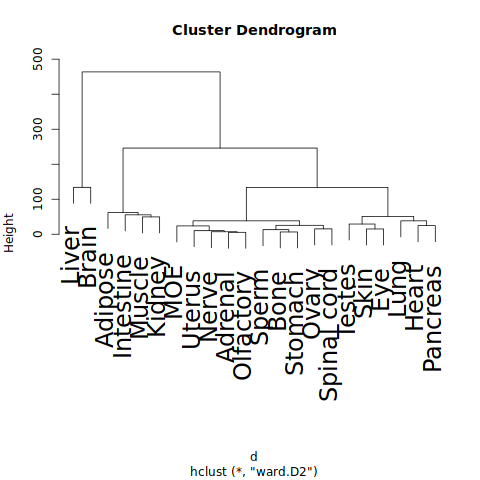

In [15]:
%%R
misclass_only.df <- rxn_tissue_mean_misclass.df[1:22]

numeric_data <- misclass_only.df %>% 
                select_if(~is.numeric(.))

# generate dendrogram
df <- scale(t(numeric_data))
d <- parallelDist::parallelDist(df, method = "euclidean")
saveRDS(d,file=paste(OUT_DIR,"misclass_dist_obj.Rds",sep=""))
hc1 <- hclust(d, method = "ward.D2" )
saveRDS(hc1,file=paste(OUT_DIR,"misclass_hc_obj.Rds",sep=""))
hc1 <- readRDS(paste(OUT_DIR,"misclass_hc_obj.Rds",sep=""))
dend1 <- as.dendrogram(hc1)
plot(hc1, cex = 2)

In [16]:
%%R
# generate figures using summary data frame
for(tis_idx in seq(1:51)){
  tis_name <- colnames(rxn_tissue_mean_misclass.df) %>% .[tis_idx]
    
  if(!is.numeric(rxn_tissue_mean_misclass.df[[tis_name]])) next
    
  sorted.df <- rxn_tissue_mean_misclass.df %>% dplyr::arrange(ECOUNT)

  plot.obj <- ggplot2::ggplot(sorted.df) + 
    ggiraph::geom_point_interactive(aes(x=ARI,
                                      y=1 - !!as.name(tis_name),
                                      colour=ECOUNT,
                                      tooltip=RXN_ID,
                                      data_id=RXN_ID)) +
    theme_bw() + 
    ggtitle(paste("ARI vs ",tis_name," 1 - misclassification rate",sep=""))

  #girafe(ggobj = plot.obj)
  print(paste("ARI_v_",tis_name))
  ggsave(paste(OUT_DIR2,"ARI_v_",tis_name,"_misclassification.png"),device = png())  
  dev.off()
}

[1] "ARI_v_ Liver"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Brain"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Intestine"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Lung"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Muscle"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Testes"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Heart"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Skin"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Kidney"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Uterus"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Sperm"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Eye"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Adipose"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Adrenal"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Ovary"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Olfactory"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Pancreas"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Bone"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Nerve"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ Stomach"
Saving 6.67 x 6.67 in image
[1] "ARI_v_ MOE"
Saving 6.67 x 6.67 in image

In [17]:
%%R
liver_columns <- grep("Liver", colnames(rxn_tissue_mean_misclass.df), value = TRUE)

for(liver_col in liver_columns) {
    sorted_df <- rxn_tissue_mean_misclass.df %>%
        dplyr::arrange(desc(!!as.name(liver_col))) %>%
        dplyr::slice(1:10)
    
    pca_scores <- lapply(sorted_df$RXN_ID, function(rxn_id) {
        rxn_pca.nls[[rxn_id]]
    })
    
    pca_scores_df <- do.call(rbind, pca_scores)
    
    print(pca_scores_df)
    write.csv(pca_scores_df, file=paste(OUT_DIR2, "Desc_PCA_scores_for_", liver_col, ".csv", sep=""))
}


      SRR7072952  SRR6676157 SRR3490416  SRR8474321 SRR8995994 ERR1121538
 [1,]  0.6828741 -0.15339775 -0.1558364 -0.50465802  2.2913339 -0.2291301
 [2,] -0.3854918 -0.00213765  0.3507115 -0.20137219 -0.3911278  0.6495227
 [3,] -0.6234717 -0.03503653  0.3384215 -0.54272607  1.3740820  0.1394871
 [4,] -0.6234717 -0.03503653  0.3384215 -0.54272607  1.3740820  0.1394871
 [5,]  1.0538024  0.06661160  0.4685172  0.15999166  0.9105616 -0.1751222
 [6,] -0.2141627  0.05967842  0.7828081  0.26338425  0.5677806  0.2459242
 [7,]  0.6301517 -0.37958179 -0.1025003 -0.01429662 -1.7061266  0.3734186
 [8,]  0.6301517 -0.37958179 -0.1025003 -0.01429662 -1.7061266  0.3734186
 [9,]  0.6301517 -0.37958179 -0.1025003 -0.01429662 -1.7061266  0.3734186
[10,]  0.4494544  0.08952825 -0.3912373 -0.40705337  0.2405831 -0.6143207
       SRR8327990  SRR9610521 SRR10400103  SRR5273659 SRR1810241 ERR2682244
 [1,] -0.13390905 -0.28642184   0.7793327 -0.81611140  0.8220157  0.6897137
 [2,] -0.03136732  0.26014894   2.

 [4,] -0.8604300 -0.17437110  0.247975001 -0.3441129 -0.06032799  -0.7224795
 [5,]  1.1129339 -0.65698588 -0.048599216  0.6961132 -0.81503607  -3.4827761
 [6,]  0.9003968 -0.08959747 -0.007964195 -2.0460694 -0.02990093  -2.3647689
 [7,] -0.8245946 -0.24614268 -0.492566600  0.4154440 -0.14910307  -2.3535191
 [8,] -0.8245946 -0.24614268 -0.492566600  0.4154440 -0.14910307  -2.3535191
 [9,] -0.8245946 -0.24614268 -0.492566600  0.4154440 -0.14910307  -2.3535191
[10,]  1.3389356  0.01848452 -0.732311983 -0.5912174  0.55667525  -1.7798710
       SRR8514709 SRR10031053  ERR038241  SRR6680542 SRR10399859  SRR5933676
 [1,] -0.94709991 -0.03448070  1.6730577 -0.02511635   0.6638820 -0.09760396
 [2,] -0.80015979 -0.40067545  1.1685160 -0.02057144  -1.7287566 -0.35463008
 [3,] -0.73568731 -0.03062714  0.3451744  0.48799752   0.1477824 -1.00057698
 [4,] -0.73568731 -0.03062714  0.3451744  0.48799752   0.1477824 -1.00057698
 [5,]  0.69174240  0.03216297 -1.0265889 -0.37606233   1.1767864  0.94512141

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 [8,]  0.19312395 -0.02593714 -0.41944327  0.25628657 -0.32494002 -0.03315307
 [9,]  0.19312395 -0.02593714 -0.41944327  0.25628657 -0.32494002 -0.03315307
[10,]  0.58776691 -0.40755590 -0.22944039  0.35981330  0.12620714  0.27236953
        SRR3156213  SRR7161358 SRR9029912  SRR8858549  SRR2485886 SRR1158538
 [1,] -0.117082739 -0.01852189 -0.1130960 -0.82105578 -0.41465916 -0.7179177
 [2,] -0.004257081 -0.33728369  0.7093742  1.02427290  0.52565859  0.1991867
 [3,]  0.088820863 -0.44605187  0.5124175  0.23131066  0.23050406 -0.5304057
 [4,]  0.088820863 -0.44605187  0.5124175  0.23131066  0.23050406 -0.5304057
 [5,] -0.099502465  0.21758129 -0.5918228  0.03230927 -0.72847670 -0.4520761
 [6,]  0.156521631  0.20716251  0.5482211 -0.19175980 -0.06315902  0.3940091
 [7,]  0.349434418 -0.64042514  0.3331924 -0.11125241  0.15911021 -0.3938580
 [8,]  0.349434418 -0.64042514  0.3331924 -0.11125241  0.15911021 -0.3938580
 [9,]  0.349434418 -0.64042514  0.3331924 -0.11125241  0.15911021 -0.393

 [3,]  0.203697310 -0.6402102  0.01908263    5.313176 -0.3551039  0.46922565
 [4,]  0.203697310 -0.6402102  0.01908263    5.313176 -0.3551039  0.46922565
 [5,] -0.611537986 -1.7595264  0.01649943   -4.193534  0.1600568 -0.50484433
 [6,] -0.256351300  0.3817850 -0.03915657   -3.031991  0.2255138 -0.04819738
 [7,]  0.140427439  0.3337550 -0.18308378   -2.955551 -0.4416580 -0.50260498
 [8,]  0.140427439  0.3337550 -0.18308378   -2.955551 -0.4416580 -0.50260498
 [9,]  0.140427439  0.3337550 -0.18308378   -2.955551 -0.4416580 -0.50260498
[10,] -0.139369840  0.3009671 -0.40466564   -2.488319 -0.4139017 -0.45899960
      SRR9182312  SRR9937434  SRR7984691 SRR10523597  SRR8514687  SRR2119713
 [1,] -0.1418138  0.06089873  0.66378474 -0.77518587 -0.56815245 -0.58063481
 [2,]  0.1667413  0.29023145  0.41045105 -0.08477341 -0.37091600  0.73405980
 [3,] -0.6410795  1.47951521 -0.29285535 -0.62116820 -1.02166180  0.34141332
 [4,] -0.6410795  1.47951521 -0.29285535 -0.62116820 -1.02166180  0.34141332

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0.5154544 -0.02405546  1.00319362
 [5,]  0.10144064   4.9929996  -0.3606265 -0.7591423  0.05007250  0.03687880
 [6,] -4.41868051  -1.3056248  -0.1165008  0.1953144 -0.63133556 -0.47200774
 [7,] -0.37394077  -1.3978569   0.4201557  0.2395213 -0.25116343 -0.15881933
 [8,] -0.37394077  -1.3978569   0.4201557  0.2395213 -0.25116343 -0.15881933
 [9,] -0.37394077  -1.3978569   0.4201557  0.2395213 -0.25116343 -0.15881933
[10,] -1.22716738  -0.6552845   0.1693629  0.2634498 -0.02094120 -0.05975072
       SRR4298937  SRR8285565  SRR8474342  SRR9201177   SRR3586197  SRR9201180
 [1,] -0.99356123  1.46765153  0.04617601 -0.26684937  0.231010631 -0.47792199
 [2,] -0.08770200 -1.82778039  0.57561605  1.07175150  0.218144876  1.09323205
 [3,]  0.47217120 -1.66749712  1.88800212  0.17773047  0.211805559  0.24822405
 [4,]  0.47217120 -1.66749712  1.88800212  0.17773047  0.211805559  0.24822405
 [5,]  0.38653776  1.39041926 -0.23790335 -0.02269706 -0.241964817  0.05582438
 [6,]  0.06787364  1.6631417

 [8,] -0.2288707 -0.03135702 -1.201057062 -0.22774270 -1.9438045 -0.71837133
 [9,] -0.2288707 -0.03135702 -1.201057062 -0.22774270 -1.9438045 -0.71837133
[10,]  0.1189363  0.18797971 -0.386258310  0.44422041 -1.7874818 -0.38658027
      SRR8181936 SRR7162081 SRR10400014 SRR6667564 SRR10399898  SRR7290151
 [1,] -0.2669230 -0.4250294  -0.2424231 -1.3079918   9.2934166  0.43897055
 [2,]  0.4625420 -0.1447633  -2.2247056 -0.6228857   3.4301203  0.42325522
 [3,] -0.2952469 -0.4112663  -0.4106108 -1.0381615  -0.3569394  0.28750342
 [4,] -0.2952469 -0.4112663  -0.4106108 -1.0381615  -0.3569394  0.28750342
 [5,]  0.1140310 -0.1752329   4.2848198 -0.3678296  -2.9704933 -0.69602577
 [6,]  0.3846146 -0.0592070   1.5950255 -0.3803746   1.2362896 -0.06261647
 [7,]  1.3924271 -0.4120304   7.4325653 -1.1666024  -1.9196006 -0.18330458
 [8,]  1.3924271 -0.4120304   7.4325653 -1.1666024  -1.9196006 -0.18330458
 [9,]  1.3924271 -0.4120304   7.4325653 -1.1666024  -1.9196006 -0.18330458
[10,]  2.2108708 -0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.09703075  0.1720868
      ERR2130637 SRR5850844   SRR3104217    SRR099231 SRR3183042   SRR7182435
 [1,] -1.1401144  0.5523284  0.275676056  0.187433401  0.1431058  0.338068068
 [2,]  0.6881820 -0.2018243  0.593293109  0.690827534  1.5871751 -0.496225495
 [3,] -0.5433427 -0.2771825 -0.030928625  0.009569756  0.7501683 -0.449839662
 [4,] -0.5433427 -0.2771825 -0.030928625  0.009569756  0.7501683 -0.449839662
 [5,] -0.5361136 -0.8519477 -0.008011743 -0.058317173  0.4368399  0.394341085
 [6,]  0.7854413  0.9374483 -0.041939137  0.080236358  1.7067729  0.307668990
 [7,]  2.0477865 -0.3034701 -0.104829674 -0.065799643  2.8810703  0.068748382
 [8,]  2.0477865 -0.3034701 -0.104829674 -0.065799643  2.8810703  0.068748382
 [9,]  2.0477865 -0.3034701 -0.104829674 -0.065799643  2.8810703  0.068748382
[10,]  2.9444807 -1.1578411  0.206077727  0.124244875  1.0318114 -0.006229565
       SRR2984094  SRR1821763  ERR1912600   SRR2033413  SRR7161294 SRR5464183
 [1,]  0.30047094  0.45470799 -0.2231482

 [3,] -0.31576439 -1.49648638   0.7638054   0.4667883 -0.43771003  0.03513934
 [4,] -0.31576439 -1.49648638   0.7638054   0.4667883 -0.43771003  0.03513934
 [5,] -0.77757871 -0.18563486  -1.3998360   1.7663638 -0.78963622  0.24485586
 [6,] -0.05949245 -0.01604035  -0.4094134  -0.8001689 -0.01835357 -0.04289198
 [7,] -0.38974800 -0.15795171  -0.5892082  -0.9417857 -0.13383919  0.05164006
 [8,] -0.38974800 -0.15795171  -0.5892082  -0.9417857 -0.13383919  0.05164006
 [9,] -0.38974800 -0.15795171  -0.5892082  -0.9417857 -0.13383919  0.05164006
[10,] -0.64984636  0.28460733   0.2963020  -0.1185975  0.09601717  0.28048624
       SRR6652617    SRR1462364  SRR6683840  SRR9026468  SRR1910720  SRR2422982
 [1,]  0.70650114 -0.1819825187  0.09101994 -0.49893806 -0.73361730 -0.78052554
 [2,] -0.47318929  0.1914948405  0.01446370 -0.54670381 -0.67328123 -0.40866764
 [3,]  0.12522218 -1.0085420978 -0.57039665  1.84824933  0.06414515 -0.74517214
 [4,]  0.12522218 -1.0085420978 -0.57039665  1.84824933 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.05176945  0.3638398  0.2849021
 [3,] -0.15338967  3.2141511 -0.62739892 -1.48521209 -1.4734946 -0.6118955
 [4,] -0.15338967  3.2141511 -0.62739892 -1.48521209 -1.4734946 -0.6118955
 [5,] -0.63818493 -0.2921257 -0.44360795  0.98885418  0.4908188  0.4184919
 [6,] -0.09831229 -0.2407609  0.33269614  0.19274218 -0.1258742  0.5754220
 [7,] -0.40628603 -0.2117809  0.28482666  0.04952007  0.5007017 -1.3673535
 [8,] -0.40628603 -0.2117809  0.28482666  0.04952007  0.5007017 -1.3673535
 [9,] -0.40628603 -0.2117809  0.28482666  0.04952007  0.5007017 -1.3673535
[10,] -0.65395885  0.3481331 -0.08296739  1.15843914  0.3793241  0.7563900
      ERR2631479  SRR3196974  SRR8474315 SRR10321912  SRR8857562  ERR2704929
 [1,]  0.8459624  0.28629940  0.26211111   0.9635306  0.17648976  0.14511810
 [2,]  0.9023138 -0.59442735  0.68023154   0.7437639  0.06045382 -1.02173896
 [3,] -0.1634447  0.40246933  2.75939433   0.4039770  0.39371293  1.30641431
 [4,] -0.1634447  0.40246933  2.75939433   0.4039770  0.3

 [7,] -0.54294916  0.05964618 -0.15281009 -0.54214588 -0.28478670 -0.36553907
 [8,] -0.54294916  0.05964618 -0.15281009 -0.54214588 -0.28478670 -0.36553907
 [9,] -0.54294916  0.05964618 -0.15281009 -0.54214588 -0.28478670 -0.36553907
[10,]  0.04065028 -0.34340638 -0.13506255  0.71545327 -0.28613745 -0.44223649
        ERR569304   SRR3104244  SRR8760538 SRR8114472 SRR5127014   SRR3117328
 [1,] -0.27015311  0.283668502 -1.23449114 -0.7116996 -0.9342023 -0.349166927
 [2,]  0.09931281  0.653184201  0.07706464 -0.9046225  0.1365876 -0.065387198
 [3,] -0.67630911  0.046525080  1.10186321 -1.6886525 -0.2643175  0.005561936
 [4,] -0.67630911  0.046525080  1.10186321 -1.6886525 -0.2643175  0.005561936
 [5,] -0.16410436 -0.187785273 -0.68567072  1.6582097  0.1623299 -0.512030354
 [6,]  0.24114284  0.005188485  0.24492252  1.6618928  0.2011219 -0.147744897
 [7,] -0.06493044  0.062124104  0.69583262  2.3017028  0.4330847  0.177077252
 [8,] -0.06493044  0.062124104  0.69583262  2.3017028  0.4330847

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.15741669
 [2,] -0.84430443  0.5923560   0.3469513  0.1396295  0.33439873  0.42002691
 [3,]  1.99461195  1.1493571   1.8700980 -0.7578164  0.23526816 -0.02729779
 [4,]  1.99461195  1.1493571   1.8700980 -0.7578164  0.23526816 -0.02729779
 [5,]  0.23618908 -0.4964646  -0.5763773 -0.1443396 -0.22080587 -0.40989202
 [6,]  0.45665644  0.3119839  -0.1896440  0.1387188 -0.08920884  0.36751930
 [7,]  1.43327865  0.3661489   0.3400578  0.1105267 -0.30900473  0.07718622
 [8,]  1.43327865  0.3661489   0.3400578  0.1105267 -0.30900473  0.07718622
 [9,]  1.43327865  0.3661489   0.3400578  0.1105267 -0.30900473  0.07718622
[10,]  0.02999479 -0.3215926   0.3284046 -0.3512285  0.07455260 -0.06237449
      SRR2080168  SRR6488909 SRR5877195  SRR1292217   SRR5266611   ERR860942
 [1,]  0.3254686  0.32232523 -0.5228636  0.45482760  0.621306105  3.72878376
 [2,]  0.4765937 -0.51913499  0.2659947  0.50173529  0.998283429  0.36333044
 [3,]  1.0809605 -0.81546431 -0.1305155 -0.03341575  0.027587597 -0.8394

 [8,]  0.23258499  1.1431261 -0.01160006  0.18229356  0.08280457 -0.14485096
 [9,]  0.23258499  1.1431261 -0.01160006  0.18229356  0.08280457 -0.14485096
[10,] -0.39257816  0.5988196 -0.33540104  0.38066532 -0.20898719  0.30636265
        SRR3161696 SRR10400040  SRR6680563 SRR1871671 SRR5021335 SRR5576353
 [1,]  0.009726459  -0.3414059 -0.01306508  0.5497421 -0.7165799  1.1858693
 [2,] -0.107248308  -2.2788711  0.41843140 -1.2977659 -0.1952498 -0.9100968
 [3,] -0.960006280  -0.4715961 -0.23308732  0.3254965 -0.2617072  2.6295628
 [4,] -0.960006280  -0.4715961 -0.23308732  0.3254965 -0.2617072  2.6295628
 [5,] -0.728647067  -3.1311779 -0.19736586 -0.2589834 -0.7415243  1.7431750
 [6,] -0.135517411   2.0323061  0.21631740 -0.6426575 -0.3375174 -0.6531572
 [7,] -0.333825434   2.7057526  0.15753454 -0.2428073 -1.1540832  0.4211219
 [8,] -0.333825434   2.7057526  0.15753454 -0.2428073 -1.1540832  0.4211219
 [9,] -0.333825434   2.7057526  0.15753454 -0.2428073 -1.1540832  0.4211219
[10,] -0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0.008644844
 [7,] -1.2620621 -0.50334205  0.39932165  0.09773234 -1.5929164 -0.161778041
 [8,] -1.2620621 -0.50334205  0.39932165  0.09773234 -1.5929164 -0.161778041
 [9,] -1.2620621 -0.50334205  0.39932165  0.09773234 -1.5929164 -0.161778041
[10,] -2.2270823 -0.48053387  0.37183780  0.39299122 -0.8675829 -0.365673114
       SRR4309642 SRR6649832 SRR5328919   SRR5998450  SRR5928863 SRR10399933
 [1,]  0.98938913 0.28665179 -0.3708917 -0.639430717 -1.13504479   1.6877565
 [2,]  0.42457176 1.12042679  0.3911664  0.835054220 -0.09146040  -1.1684710
 [3,] -0.04783860 0.92717102 -0.7478501 -0.003551366 -0.13124124   0.7786125
 [4,] -0.04783860 0.92717102 -0.7478501 -0.003551366 -0.13124124   0.7786125
 [5,] -0.02439459 0.32727989  0.2416688 -0.198786420 -0.43256930  -1.3790847
 [6,]  2.51237777 0.09454198  0.1907153 -0.179091536 -0.07593427  -0.3899331
 [7,]  1.65963461 1.75230734 -0.6238438  0.143425182 -0.12637803  -0.5716313
 [8,]  1.65963461 1.75230734 -0.6238438  0.143425182 -0.126378

[10,]  0.1109803  0.20612721  0.10763324 -0.58425956 -0.31975997 -0.09715595
        DRR013085 SRR9179029  SRR8145357  SRR7467397   DRR014215  SRR449382
 [1,] -0.44396069  1.1322577  0.17450762 -0.63378252 -0.71366294 -0.7446746
 [2,] -0.47682362 -1.6690344 -0.20244431 -0.08585162 -0.05632902  0.1308461
 [3,] -2.22113283  1.0053893  3.05566485 -1.02832962  1.73616085  0.1601290
 [4,] -2.22113283  1.0053893  3.05566485 -1.02832962  1.73616085  0.1601290
 [5,]  0.36320456  2.8307597 -0.03689122  0.51919506 -0.91116329 -0.7360733
 [6,] -0.51516315 -0.1327227 -1.97955460  0.16305587 -0.06224693 -0.2640284
 [7,] -0.07046009 -2.1962269 -0.22339640 -0.14827027 -0.07677401  0.0434910
 [8,] -0.07046009 -2.1962269 -0.22339640 -0.14827027 -0.07677401  0.0434910
 [9,] -0.07046009 -2.1962269 -0.22339640 -0.14827027 -0.07677401  0.0434910
[10,]  3.60511129  2.0072656 -1.46646418 -0.45489858  0.02448284 -0.1525983
      SRR1166899 SRR10031043   SRR5758664  SRR5944373 SRR7161443  ERR1121524
 [1,] -1.0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.6428832 -0.52466529  2.1893396 -0.06694752 -0.4196261
 [9,] -0.1720338 -0.6428832 -0.52466529  2.1893396 -0.06694752 -0.4196261
[10,]  1.0316057 -0.1900948  0.22886749 -1.5663163  0.14957380 -0.1814161
       SRR7072948  SRR5127015 SRR10697202  SRR7161284  SRR6122004 SRR7545321
 [1,]  0.62390063 -0.86433508   1.0262461 -0.01184296 -0.54636242  0.1145389
 [2,] -0.52526804  0.09810670   0.4726715 -0.71317359 -0.02270516  0.7864853
 [3,]  0.05463462  0.70302264  -0.6745877 -0.78664808 -0.79879793  0.5399709
 [4,]  0.05463462  0.70302264  -0.6745877 -0.78664808 -0.79879793  0.5399709
 [5,]  0.20716425 -0.71501974   0.9423859  0.18172651  0.04144820 -0.7277220
 [6,] -0.01737898 -0.06647221   0.9972253  0.20671031  0.12344332 -0.2963763
 [7,]  0.35405907  0.12491341  -1.0360973  0.24935753  0.17002870  0.9365405
 [8,]  0.35405907  0.12491341  -1.0360973  0.24935753  0.17002870  0.9365405
 [9,]  0.35405907  0.12491341  -1.0360973  0.24935753  0.17002870  0.9365405
[10,]  0.23237064  0.243

 [2,] -0.2863179  1.8526672 -0.09362929  0.1945386 -0.9145923  0.378149450
 [3,] -0.2000991 -0.3919653 -0.09298584 -2.2957894 -2.0492344 -0.009598866
 [4,] -0.2000991 -0.3919653 -0.09298584 -2.2957894 -2.0492344 -0.009598866
 [5,] -0.1263491 -1.8139176  0.08027818  0.4037591  4.2836407 -1.036377731
 [6,] -0.2149023  0.1684877  0.07700915  0.4357401 -0.6414014 -0.216620793
 [7,] -0.7136424  2.1762171 -0.26347734 -1.1385890  0.3712448 -0.268278417
 [8,] -0.7136424  2.1762171 -0.26347734 -1.1385890  0.3712448 -0.268278417
 [9,] -0.7136424  2.1762171 -0.26347734 -1.1385890  0.3712448 -0.268278417
[10,] -0.3228439  2.1275193  0.19150269 -0.2252317 -3.6331985  0.513904167
       SRR9057201 SRR9649776 SRR10400097  SRR945387  SRR2984080 SRR10697201
 [1,]  0.25539700  1.1782195   1.6683895  0.3492802  0.13976133   1.2979753
 [2,]  0.27061693  0.5009810  -1.1790691  0.4439057 -1.98796225   0.4798760
 [3,]  1.03203364  0.6251514   0.7666801 -0.5912289  0.14192474  -0.7158237
 [4,]  1.03203364  0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.0417147 -0.39106842  0.52389291  0.4928001 -2.2976372
 [4,] -0.87474502 -0.0417147 -0.39106842  0.52389291  0.4928001 -2.2976372
 [5,]  0.38686914 -1.1237343  0.66636374 -0.46715973 -0.6281170  3.4899821
 [6,]  0.07373178  0.2393857 -4.70352722  0.02306649 -0.1647167 -2.0439481
 [7,] -0.27255386 -0.1732295  0.02343993  0.10445587 -0.1225557 -0.3598395
 [8,] -0.27255386 -0.1732295  0.02343993  0.10445587 -0.1225557 -0.3598395
 [9,] -0.27255386 -0.1732295  0.02343993  0.10445587 -0.1225557 -0.3598395
[10,] -0.48371212 -0.4525145 -0.15522125 -0.23438625  0.1930329 -1.5653255
        SRR6221707  SRR6221688  SRR3117288 SRR10399847  SRR4842206  SRR4280956
 [1,] -0.896426931 -0.96514468 -0.38166827  -0.2884151  0.28575042 -0.99558270
 [2,] -1.314065173 -1.21993253 -0.01917112   1.8626675 -0.03914192 -0.09057696
 [3,] -0.300821008 -0.22035307 -0.48521051  -0.4389474 -0.10643073  0.47043960
 [4,] -0.300821008 -0.22035307 -0.48521051  -0.4389474 -0.10643073  0.47043960
 [5,] -0.223308621 -0.

       SRR2182250 SRR6255408    SRR6680545  SRR2984063 SRR6973775    SRR4174044
 [1,] -0.04661659  0.5771688 -0.0003610037 -0.11786016 -0.5010175 -0.0555597597
 [2,]  0.65609386  0.2292702  0.3163628857 -3.89223231 -1.2379665  0.3429170899
 [3,]  0.21824679  1.1901472  1.9365727793 -2.28809299 -0.4975481 -0.0004689602
 [4,]  0.21824679  1.1901472  1.9365727793 -2.28809299 -0.4975481 -0.0004689602
 [5,] -0.09526814 -0.1836278 -0.0264841852 -0.15649553  0.6408268  0.4854747277
 [6,]  0.16317329 -0.2059370  0.2974524008 -4.42448899 -0.5452122  0.2630047664
 [7,]  0.17448534  0.0413549 -0.0491057686 -0.05091446  0.8348264  0.0696467026
 [8,]  0.17448534  0.0413549 -0.0491057686 -0.05091446  0.8348264  0.0696467026
 [9,]  0.17448534  0.0413549 -0.0491057686 -0.05091446  0.8348264  0.0696467026
[10,]  0.19750664 -0.1297385 -0.0931673685  0.31539503  0.4923546  0.4845915690
        SRR7622949 SRR5119897 SRR1462367  SRR5928852 SRR7162100  SRR6250997
 [1,] -1.282033773 -0.7487148  0.9810163 -0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.6362499  0.007655763 -0.1155608
 [8,] -0.613243748  0.6442631  0.06293801 -0.6362499  0.007655763 -0.1155608
 [9,] -0.613243748  0.6442631  0.06293801 -0.6362499  0.007655763 -0.1155608
[10,] -0.584631426 -0.4575200  0.46533999 -0.4216428 -0.175740646  0.4737605
      SRR1772153  SRR3161681  SRR5291500 SRR10467094  ERR860939  SRR8640662
 [1,]  0.2762521 -1.51584918  0.77728042 -0.57552561 -0.1676862 -0.95432967
 [2,] -0.2036510  0.70754459 -0.81278286  0.89772068  0.8288051 -0.01930569
 [3,] -0.4417751  0.27412009 -0.05805170  0.20007346 -1.1788820 -0.35664712
 [4,] -0.4417751  0.27412009 -0.05805170  0.20007346 -1.1788820 -0.35664712
 [5,]  0.8804087  0.07682093  0.66850497 -0.03668369  0.6667944 -0.13622103
 [6,]  0.8501623 -0.09332991  0.11985814  0.06125317  0.2225102  0.22862953
 [7,]  0.1617438 -0.28560294  0.46382907  0.14180835 -0.3283487  0.41261860
 [8,]  0.1617438 -0.28560294  0.46382907  0.14180835 -0.3283487  0.41261860
 [9,]  0.1617438 -0.28560294  0.46382907  0.14180

 [3,]  1.5293878  1.2571077 -0.03142575  0.2763613   0.1508435  0.646045793
 [4,]  1.5293878  1.2571077 -0.03142575  0.2763613   0.1508435  0.646045793
 [5,] -0.6831697 -0.3231503 -0.56586387 -0.8020428   0.3862376 -0.324336034
 [6,] -2.2016393  0.3554951  0.63663599 -0.2006991   0.3673450  0.468269360
 [7,]  1.2783039  0.4300882 -0.75051658 -0.4580376  -0.2109661  0.025634089
 [8,]  1.2783039  0.4300882 -0.75051658 -0.4580376  -0.2109661  0.025634089
 [9,]  1.2783039  0.4300882 -0.75051658 -0.4580376  -0.2109661  0.025634089
[10,]  0.1888768 -0.4149425 -0.81454655 -0.2082985   0.4827289  0.006280935
      SRR3746521 SRR4000858  SRR6269591 SRR7992504  SRR7299446  SRR7165869
 [1,]  0.3080078  0.2469879 -0.18022416 -0.1033744 -0.02669365 -1.17576984
 [2,] -0.3891938  0.6367788 -0.82941004  0.3465576  0.51233099  1.03677377
 [3,] -0.5830210  0.2469126  0.17145613  0.2016381  0.82696937  0.04428719
 [4,] -0.5830210  0.2469126  0.17145613  0.2016381  0.82696937  0.04428719
 [5,]  0.9563581 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.80239527 -0.13913376 -0.786752165
 [6,] -0.09167507  0.18852832  0.08150308 -0.40899866  0.09838944 -0.080083638
 [7,] -0.20590221  0.15330108  0.26279792 -0.99065225  0.28404323 -0.005147706
 [8,] -0.20590221  0.15330108  0.26279792 -0.99065225  0.28404323 -0.005147706
 [9,] -0.20590221  0.15330108  0.26279792 -0.99065225  0.28404323 -0.005147706
[10,]  0.24860959  2.59560848 -0.51806957 -0.03790539 -0.17376906 -0.017969626
      SRR5928837  SRR1958830 SRR10241174 SRR6907192 SRR6676158 SRR3181055
 [1,] -0.7325197 -1.01974396  -0.1299329  0.3112927 -0.3841816  0.3415013
 [2,] -0.6247187  0.47077369   0.7893264  0.7575868  0.1045921  1.2058778
 [3,] -0.4276095 -0.20830701  -2.3432266  2.4619565  0.0785802  1.3273290
 [4,] -0.4276095 -0.20830701  -2.3432266  2.4619565  0.0785802  1.3273290
 [5,] -0.6268771 -0.67407860  -0.7697787 -0.8286371  0.1654644 -0.5032602
 [6,] -0.1076776  0.03992037   0.8880852 -0.2114297  0.2253621 -0.2271938
 [7,] -0.1469818  0.08684293   1.2202422 -0.30678

[10,] -0.43502654 -0.2615575 -0.6902697 -0.10631892  0.3839534 -0.225108267
       SRR7161413  SRR5275558  SRR9888167 SRR6194318  SRR7161397  DRR091697
 [1,]  0.12774544 -0.76497377  0.58025746 -1.2528348 -0.03405376  1.5745800
 [2,] -0.91221900  0.14891225  0.20391570  0.2229954 -0.45252257  0.3574317
 [3,] -1.34086235  0.07274621 -0.02758192 -1.0632306 -0.69189999 -0.3628391
 [4,] -1.34086235  0.07274621 -0.02758192 -1.0632306 -0.69189999 -0.3628391
 [5,] -0.05853295  0.80688014  0.54851090  0.3885230  0.42866051  0.7358385
 [6,] -0.26876647  0.24642576  0.47145059  0.3000635  0.05862681  1.0478848
 [7,]  0.03388874  0.66535882  0.56535789 -1.3210459 -0.68288523 -1.1177824
 [8,]  0.03388874  0.66535882  0.56535789 -1.3210459 -0.68288523 -1.1177824
 [9,]  0.03388874  0.66535882  0.56535789 -1.3210459 -0.68288523 -1.1177824
[10,] -0.17667375  0.81958056  0.49864082 -0.1180678 -0.57731865  1.1051107
      ERR2588651  DRR060925 SRR8145353  SRR6652620  SRR6488917   SRR5273634
 [1,]  1.924

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -1.017096302
 [4,]  -2.148449 -0.2855914 -2.29862043 -0.88230159 -2.4171075 -1.017096302
 [5,]   1.499280  0.1262037 -0.12012027 -0.64964127  0.3303042 -0.475664682
 [6,]  -3.085502  0.1134024 -1.73770773  0.01497153 -1.6172690  0.004759551
 [7,]  -4.046231 -0.1860774 -0.32332345  0.39136322 -1.1062710  0.259275489
 [8,]  -4.046231 -0.1860774 -0.32332345  0.39136322 -1.1062710  0.259275489
 [9,]  -4.046231 -0.1860774 -0.32332345  0.39136322 -1.1062710  0.259275489
[10,]   1.233622 -0.2048733 -0.28613641 -0.26422601  1.7130442 -0.206832852
        DRR061328  SRR3156214  SRR8315017 SRR10523535  SRR3117337  SRR850586
 [1,] -0.26232425 -0.62641682  0.38778163 -0.55579873 -0.51468500 -0.2965765
 [2,]  0.71402046  0.05386042 -1.00687565 -0.25912834 -0.04424063  0.4805888
 [3,] -0.32125543  0.38974451  0.08508816 -1.27775000 -0.06332519  0.5061820
 [4,] -0.32125543  0.38974451  0.08508816 -1.27775000 -0.06332519  0.5061820
 [5,] -0.73695700 -0.07780536  0.41768268 -0.67306713 -0.22208257 -0.

 [6,] -0.07763219  0.50334108  0.1189838 -0.03361388  0.1149698  0.1337046
 [7,]  0.00748117  0.12360586  0.4361345 -0.33295652  0.4232171  0.3206409
 [8,]  0.00748117  0.12360586  0.4361345 -0.33295652  0.4232171  0.3206409
 [9,]  0.00748117  0.12360586  0.4361345 -0.33295652  0.4232171  0.3206409
[10,]  0.36275556 -0.23087239  0.1729736  0.04697753 -0.1653798 -0.3567272
      SRR9264338  SRR6680518  DRR099936   ERR2588631   ERR569306  SRR5641744
 [1,]  0.7393613  0.16148010 -0.3120208  0.922213389 -0.23601382 -1.08340415
 [2,]  0.9396875  0.34173881  0.8073396 -0.606297734 -0.02109235 -0.33120472
 [3,] -0.9227985  0.74564668  0.2687116 -0.652049937 -0.24874774 -0.02738337
 [4,] -0.9227985  0.74564668  0.2687116 -0.652049937 -0.24874774 -0.02738337
 [5,] -0.3834857  0.08020171 -0.2385048  1.054866664 -0.13570078 -0.68738766
 [6,]  0.2418517  0.32742268  0.1483995 -0.450214633  0.15955060 -0.15787269
 [7,]  0.7812630  0.14117256  0.2291501 -0.003420693 -0.04364411 -0.06750379
 [8,]  0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0.6880047
 [8,]  0.89157000 -0.37789711  0.54308038 -0.10443121  0.207839172  0.6880047
 [9,]  0.89157000 -0.37789711  0.54308038 -0.10443121  0.207839172  0.6880047
[10,]  0.19939361  0.19762663 -1.22327616 -0.01166659 -0.338323672  0.5043243
       ERR1709720    SRR4281056 SRR10399971 SRR8844299  DRR111567  SRR5487025
 [1,] -0.06090356 -1.2324793708   1.4380218  1.6222447 -0.2475193 -0.04650416
 [2,] -0.18897579 -0.1161055426  -1.3051311 -0.2209106  0.6771671  0.56392601
 [3,]  0.27674527 -0.0007775616   0.6247458 -0.3392451  2.3191536  0.27957170
 [4,]  0.27674527 -0.0007775616   0.6247458 -0.3392451  2.3191536  0.27957170
 [5,]  0.18279113  0.3168831627  -1.5947197 -0.1131066  0.7288271 -0.09322366
 [6,] -0.16182972  0.3613689774  -0.5923601 -0.1360851  0.4560250  0.02774495
 [7,] -0.16274683 -0.4126394616  -0.7542804  0.9616343  0.7487655  0.08982996
 [8,] -0.16274683 -0.4126394616  -0.7542804  0.9616343  0.7487655  0.08982996
 [9,] -0.16274683 -0.4126394616  -0.7542804  0.96163

 [1,] -0.53889230  0.4996084 -0.15887778 -0.28832119  0.36086980 -0.8117745
 [2,] -0.04214303 -0.4665793  0.04077528  0.33759202 -0.54772534 -0.8450786
 [3,] -0.38199017  0.3467635  0.07165448 -1.19669451 -1.04984838 -0.7183081
 [4,] -0.38199017  0.3467635  0.07165448 -1.19669451 -1.04984838 -0.7183081
 [5,] -0.58810286 -1.3240821 -0.12643784  0.02522607 -0.22178924  0.9081607
 [6,] -0.20198073  0.5735407  0.03683477 -0.20725340  0.43957379 -0.2656884
 [7,] -0.09275380 -0.3850362  0.24410111 -0.27284095  0.17214395 -0.2740004
 [8,] -0.09275380 -0.3850362  0.24410111 -0.27284095  0.17214395 -0.2740004
 [9,] -0.09275380 -0.3850362  0.24410111 -0.27284095  0.17214395 -0.2740004
[10,]  0.03154669 -0.9800166  0.54832016  0.44207455  0.08667566 -0.2673780
      SRR10063821  SRR6488926 SRR10400009 SRR10399928 SRR5277058  SRR7161910
 [1,] -0.26175391  0.18942769   0.6025374   1.7144755  0.2102859  0.08945508
 [2,]  0.08682691 -0.61243987  -1.7623256  -1.1538499  0.3636209 -0.59510560
 [3,]  0.

In [18]:
%%R
# top n reactions for each tissue
n <- 10
for(tis_idx in seq(1:51)){
  tis_name <- colnames(rxn_tissue_mean_misclass.df) %>% .[tis_idx]
    
  if(!is.numeric(rxn_tissue_mean_misclass.df[[tis_name]])) next
    
  sorted.df <- rxn_tissue_mean_misclass.df %>% dplyr::arrange(!!as.name(tis_name)) %>%
    dplyr::slice(1:n)
  d <- data.frame(RXN_ID = sorted.df$RXN_ID,
                  TIS = sorted.df[tis_idx],
                  ARI = sorted.df$ARI)
  write.csv(d,file=paste(OUT_DIR2,"top_",n,"_",tis_name,"_rxns.csv",sep=""))
}

In [22]:
%%R
#plots of classification accuracy - ARI
library(scales)
ari_sorted_rxn_tissue_mean_misclass.df <- rxn_tissue_mean_misclass.df %>% dplyr::arrange(ARI)
print(ncol(ari_sorted_rxn_tissue_mean_misclass.df))

[1] 29


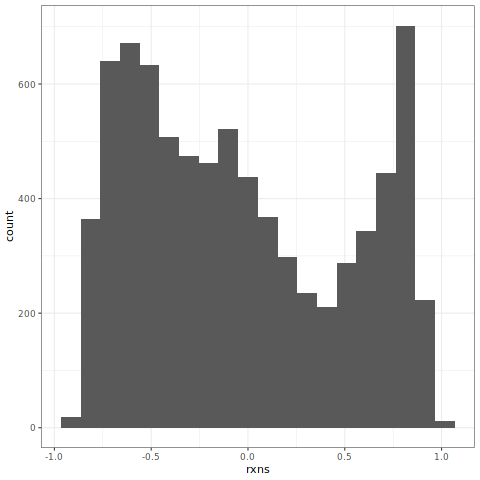

In [20]:
%%R
ari_sorted_rxn_tissue_mean_misclass.df[,22] %>% scales::rescale() -> x1
plot(x1)
1 - ari_sorted_rxn_tissue_mean_misclass.df %>% .[,22] %>% scales::rescale() -> y1 #36 is breast - mammary tissue
plot(y1)
y1 - x1 -> z1
plot(z1)
hist(z1)

breast_df <- data.frame(rxns = z1)

ggplot(breast_df,aes(x=rxns)) +
  geom_histogram(bins=20) +
  theme_bw()

1 - ari_sorted_rxn_tissue_mean_misclass.df %>% .[,1] %>% scales::rescale() -> y1 #1 is lung
plot(y1)
y1 - x1 -> z1
plot(z1)
hist(z1)

lung_df <- data.frame(rxns = z1)

ggplot(lung_df,aes(x=rxns)) +
  geom_histogram(bins=20) +
  theme_bw()

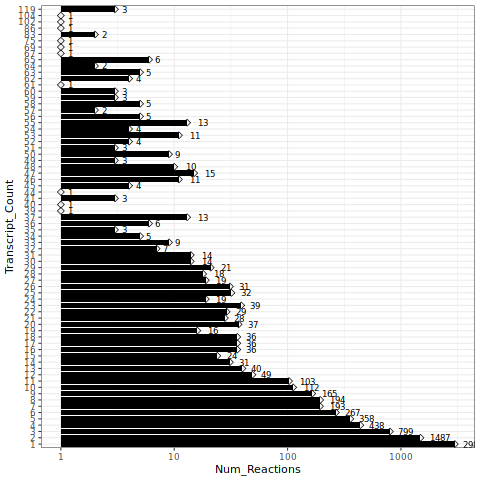

In [23]:
%%R
#ARI histogram
hist(ari_sorted_rxn_tissue_mean_misclass.df$ARI)

rxn_ari_df <- data.frame(ARI = ari_sorted_rxn_tissue_mean_misclass.df$ARI)

ggplot(rxn_ari_df,aes(x=ARI)) +
  geom_smooth(stat = "count") +
  geom_histogram(bins=20) +
  theme_bw()

#rxn log10 ecount histogram
hist(log10(ari_sorted_rxn_tissue_mean_misclass.df$ECOUNT))

rxn_ecount_df <- data.frame(ECOUNT = (ari_sorted_rxn_tissue_mean_misclass.df$ECOUNT))

# plot Transcript Count x Reaction Count
ggplot(rxn_ecount_df,aes(x=ECOUNT)) +
  geom_smooth(stat = "count") +
  geom_bar(stat="count") +
  scale_y_continuous(trans = "log10") +
  scale_x_continuous(trans = "log10") +
  theme_bw()

# plot Reaction Count x Transcript Count
tabl <- rxn_ecount_df %>% table() %>% as.data.frame()
colnames(tabl) <- c("Transcript_Count","Num_Reactions")

ggplot(tabl,aes(x=Num_Reactions,y=Transcript_Count,label=Num_Reactions)) +
  #geom_smooth(stat = "identity") +
  geom_bar(stat="identity",fill = "black") +
  #scale_y_continuous(trans = "log2") +
  geom_point(shape = 23, size = 2.25) +
  geom_text(hjust = -1.5/log10(tabl$Num_Reactions + 10), vjust = 0.5, size = 3) +
  scale_x_continuous(trans = "log10") +
  theme_bw()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 



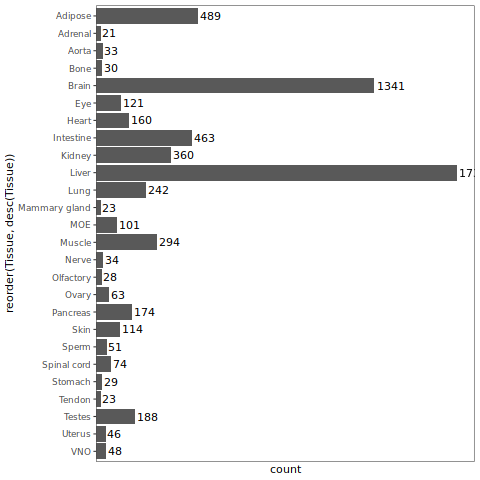

In [24]:
%%R
#histogram of sample counts across tissue
hist(as.numeric(as.factor(gtex_tissue_detail.vec.train)))

tis_df <- data.frame(Tissue = as.factor(gtex_tissue_detail.vec.train))

ggplot(tis_df,aes(x=reorder(Tissue,desc(Tissue)))) +
  geom_bar(stat = "count") +
  scale_y_discrete(expand = expansion(mult=c(0,.05))) +
  coord_flip() +
  geom_text(stat = "count",
            aes(label=..count..),
            hjust = -0.1) +
  theme_bw() +
  theme(legend.position="none",
        panel.grid.major = element_blank())